# Artificial Neural Network

### Importing the libraries

In [55]:
# import the libraries 
import tensorflow as tf
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA


In [56]:
print(tf.__version__)

2.8.0


In [57]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y.astype(float),x.astype(float)).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)




## Part 1 - Data Preprocessing

### Importing the dataset

In [58]:
dataset = pd.read_csv('KeyboardData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [59]:
print(X)
print(y)

[[3.80584214e-01 1.36823497e-03 5.08000000e-02 2.80000000e+01
  8.47000000e+02 7.00000000e+00 0.00000000e+00 1.00000000e+00
  6.79960321e-01]
 [3.78428780e-01 2.18476127e-02 3.62000000e-02 5.00000000e+01
  1.56700000e+03 2.50000000e+01 0.00000000e+00 1.00000000e+00
  4.90988655e-01]
 [3.49012031e-01 7.12569236e-04 2.10000000e-02 8.60000000e+01
  1.56500000e+03 4.10000000e+01 0.00000000e+00 1.00000000e+00
  1.68939195e-01]
 [3.54816649e-01 0.00000000e+00 4.57750000e-02 8.00000000e+00
  5.81000000e+02 5.15000000e+02 1.70000000e+01 1.00000000e+00
  9.52971762e-02]
 [2.36303990e-01 1.07759165e-03 2.02000000e-02 4.30000000e+01
  5.50000000e+01 9.55000000e+02 2.12000000e+02 1.50000000e+01
  2.53797259e-01]
 [4.30975746e-01 6.77585959e-03 3.48000000e-02 4.20000000e+01
  8.37000000e+02 4.59000000e+02 6.60000000e+01 1.20000000e+01
  2.65955135e-01]
 [5.85703902e-01 1.25543177e-02 7.22000000e-02 1.30000000e+01
  1.26000000e+03 6.03000000e+02 2.98000000e+02 3.10000000e+01
  6.48868553e-01]
 [3.66

### Encoding categorical data

### Splitting the dataset into the Training set and Test set

In [60]:
from sklearn.model_selection import train_test_split
#random state = 1 is setting the seed of randomly picking the test and train sets so we can get consistent results 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

### Feature Scaling

In [61]:
# #feature scaling everything is crucial to deep learning and ANNs
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)



# X_test = sc.transform(X_test)



## Part 2 - Building the ANN

### Initializing the ANN

In [62]:

def build_clf(unit,hiddenlayers,learning_rate=0.01):
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  for i in range(hiddenlayers):
    ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))

    
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,)
  ann.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['accuracy','loss','val_loss'])
  return ann

In [63]:
model=KerasClassifier(build_fn=build_clf)
pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA(0.99)),('model', model)])

C:\Users\micoa\AppData\Local\Temp\ipykernel_29044\1863934462.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)


In [64]:

params={
    'model__batch_size':[20,32], 
        'model__epochs':[200],
        'model__unit':[8,9,10],
        'model__hiddenlayers' :[1,2,3],
        'model__learning_rate': [0.01]
           
        }
gs=GridSearchCV(estimator=pipe, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object. 
grid_result = gs.fit(X_train, y_train)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7482 - accuracy: 0.4262
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7416 - accuracy: 0.4426
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7372 - accuracy: 0.4426
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7331 - accuracy: 0.4426
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7297 - accuracy: 0.4426
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7262 - accuracy: 0.4426
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7231 - accuracy: 0.4426
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.4426
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.4426
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7134 - accuracy: 0.4590
Epoch 11/100
4/4 [===========

Epoch 84/100
4/4 [==============================] - 0s 665us/step - loss: 0.5710 - accuracy: 0.7869
Epoch 85/100
4/4 [==============================] - 0s 998us/step - loss: 0.5698 - accuracy: 0.7869
Epoch 86/100
4/4 [==============================] - 0s 996us/step - loss: 0.5688 - accuracy: 0.7705
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.5675 - accuracy: 0.7869
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.5662 - accuracy: 0.7869
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.5652 - accuracy: 0.7869
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7869
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.5631 - accuracy: 0.7869
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.5619 - accuracy: 0.7869
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.5609 - accuracy: 0.7869
Ep

4/4 [==============================] - 0s 997us/step - loss: 0.6498 - accuracy: 0.6230
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.6488 - accuracy: 0.6230
Epoch 67/100
4/4 [==============================] - 0s 665us/step - loss: 0.6474 - accuracy: 0.6230
Epoch 68/100
4/4 [==============================] - 0s 993us/step - loss: 0.6461 - accuracy: 0.6393
Epoch 69/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6448 - accuracy: 0.6393
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.6437 - accuracy: 0.6393
Epoch 71/100
4/4 [==============================] - 0s 998us/step - loss: 0.6427 - accuracy: 0.6393
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.6417 - accuracy: 0.6393
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.6406 - accuracy: 0.6393
Epoch 74/100
4/4 [==============================] - 0s 665us/step - loss: 0.6394 - accuracy: 0.6393
Epoch 75/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.6652 - accuracy: 0.5902
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.6627 - accuracy: 0.5902
Epoch 48/100
4/4 [==============================] - 0s 665us/step - loss: 0.6595 - accuracy: 0.5902
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.6568 - accuracy: 0.5902
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.6541 - accuracy: 0.5902
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6512 - accuracy: 0.5902
Epoch 52/100
4/4 [==============================] - 0s 999us/step - loss: 0.6487 - accuracy: 0.5902
Epoch 53/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.5902
Epoch 54/100
4/4 [==============================] - 0s 998us/step - loss: 0.6441 - accuracy: 0.5902
Epoch 55/100
4/4 [==============================] - 0s 665us/step - loss: 0.6420 - accuracy: 0.5902
Epoch 56/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6211 - accuracy: 0.6393
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.6190 - accuracy: 0.6393
Epoch 29/100
4/4 [==============================] - 0s 665us/step - loss: 0.6168 - accuracy: 0.6393
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.6144 - accuracy: 0.6393
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.6120 - accuracy: 0.6393
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6099 - accuracy: 0.6557
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.6076 - accuracy: 0.6721
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.6057 - accuracy: 0.6721
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.6040 - accuracy: 0.6885
Epoch 36/100
4/4 [==============================] - 0s 665us/step - loss: 0.6018 - accuracy: 0.6885
Epoch 37/100


4/4 [==============================] - 0s 665us/step - loss: 0.8214 - accuracy: 0.5246
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.8175 - accuracy: 0.5246
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.8121 - accuracy: 0.5246
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.8078 - accuracy: 0.5246
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.8037 - accuracy: 0.5082
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.7999 - accuracy: 0.5082
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.7955 - accuracy: 0.5082
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.7912 - accuracy: 0.5082
Epoch 16/100
4/4 [==============================] - 0s 664us/step - loss: 0.7874 - accuracy: 0.5082
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.7834 - accuracy: 0.5082
Epoch 18/100
4

4/4 [==============================] - 0s 997us/step - loss: 0.5826 - accuracy: 0.6721
Epoch 91/100
4/4 [==============================] - 0s 665us/step - loss: 0.5808 - accuracy: 0.6885
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.5791 - accuracy: 0.6885
Epoch 93/100
4/4 [==============================] - 0s 665us/step - loss: 0.5770 - accuracy: 0.6885
Epoch 94/100
4/4 [==============================] - 0s 665us/step - loss: 0.5756 - accuracy: 0.7049
Epoch 95/100
4/4 [==============================] - 0s 665us/step - loss: 0.5741 - accuracy: 0.7213
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.5726 - accuracy: 0.7213
Epoch 97/100
4/4 [==============================] - 0s 665us/step - loss: 0.5713 - accuracy: 0.7213
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.5700 - accuracy: 0.7213
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.5684 - accuracy: 0.7213
Epoch 100/100

4/4 [==============================] - 0s 665us/step - loss: 0.6116 - accuracy: 0.6885
Epoch 72/100
4/4 [==============================] - 0s 998us/step - loss: 0.6098 - accuracy: 0.7049
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.6082 - accuracy: 0.7049
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.6068 - accuracy: 0.7049
Epoch 75/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7049
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.6027 - accuracy: 0.7049
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.6005 - accuracy: 0.7049
Epoch 78/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7049
Epoch 79/100
4/4 [==============================] - 0s 665us/step - loss: 0.5969 - accuracy: 0.7213
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.5954 - accuracy: 0.7213
Epoch 81/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.4866 - accuracy: 0.7869
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.4856 - accuracy: 0.7869
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.4845 - accuracy: 0.7869
Epoch 55/100
4/4 [==============================] - 0s 993us/step - loss: 0.4836 - accuracy: 0.7869
Epoch 56/100
4/4 [==============================] - 0s 663us/step - loss: 0.4826 - accuracy: 0.7869
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.4815 - accuracy: 0.8033
Epoch 58/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4803 - accuracy: 0.8033
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.4793 - accuracy: 0.8033
Epoch 60/100
4/4 [==============================] - 0s 657us/step - loss: 0.4784 - accuracy: 0.8033
Epoch 61/100
4/4 [==============================] - 0s 665us/step - loss: 0.4772 - accuracy: 0.8033
Epoch 62/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.5965 - accuracy: 0.7541
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.5954 - accuracy: 0.7705
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.5945 - accuracy: 0.7705
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.5934 - accuracy: 0.7705
Epoch 37/100
4/4 [==============================] - 0s 665us/step - loss: 0.5925 - accuracy: 0.7705
Epoch 38/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.7541
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.5902 - accuracy: 0.7705
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.5888 - accuracy: 0.7705
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.5875 - accuracy: 0.7705
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.5863 - accuracy: 0.7705
Epoch 43/100
4/

4/4 [==============================] - 0s 994us/step - loss: 0.7058 - accuracy: 0.6129
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.7024 - accuracy: 0.6129
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.6990 - accuracy: 0.6290
Epoch 17/100
4/4 [==============================] - 0s 665us/step - loss: 0.6958 - accuracy: 0.6290
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6923 - accuracy: 0.6290
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6894 - accuracy: 0.6290
Epoch 20/100
4/4 [==============================] - 0s 660us/step - loss: 0.6866 - accuracy: 0.6290
Epoch 21/100
4/4 [==============================] - 0s 998us/step - loss: 0.6841 - accuracy: 0.6290
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.6817 - accuracy: 0.6452
Epoch 23/100
4/4 [==============================] - 0s 664us/step - loss: 0.6789 - accuracy: 0.6613
Epoch 24/100


4/4 [==============================] - 0s 997us/step - loss: 0.5603 - accuracy: 0.7419
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.5593 - accuracy: 0.7419
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.7419
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.5574 - accuracy: 0.7419
Epoch 100/100
1/1 [==============================] - 0s 68ms/step - loss: 0.6122 - accuracy: 0.5000
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0698 - accuracy: 0.4516
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0558 - accuracy: 0.4677
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 1.0440 - accuracy: 0.4677
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 1.0332 - accuracy: 0.4677
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0212 - accuracy: 0.4677
Epoch 6/100
4/4 [=========

4/4 [==============================] - 0s 665us/step - loss: 0.6583 - accuracy: 0.6613
Epoch 78/100
4/4 [==============================] - 0s 665us/step - loss: 0.6552 - accuracy: 0.6613
Epoch 79/100
4/4 [==============================] - 0s 998us/step - loss: 0.6522 - accuracy: 0.6613
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.6496 - accuracy: 0.6613
Epoch 81/100
4/4 [==============================] - 0s 665us/step - loss: 0.6469 - accuracy: 0.6774
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.6442 - accuracy: 0.6774
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.6416 - accuracy: 0.6774
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.6391 - accuracy: 0.6774
Epoch 85/100
4/4 [==============================] - 0s 998us/step - loss: 0.6370 - accuracy: 0.6774
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.6346 - accuracy: 0.6774
Epoch 87/100


4/4 [==============================] - 0s 997us/step - loss: 0.7351 - accuracy: 0.4918
Epoch 59/100
4/4 [==============================] - 0s 665us/step - loss: 0.7321 - accuracy: 0.4918
Epoch 60/100
4/4 [==============================] - 0s 660us/step - loss: 0.7297 - accuracy: 0.4918
Epoch 61/100
4/4 [==============================] - 0s 665us/step - loss: 0.7274 - accuracy: 0.4918
Epoch 62/100
4/4 [==============================] - 0s 665us/step - loss: 0.7249 - accuracy: 0.4918
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.7227 - accuracy: 0.4918
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.7203 - accuracy: 0.4918
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.7179 - accuracy: 0.4918
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.7160 - accuracy: 0.4918
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.7138 - accuracy: 0.4918
Epoch 68/100


4/4 [==============================] - 0s 665us/step - loss: 0.5936 - accuracy: 0.6885
Epoch 40/100
4/4 [==============================] - 0s 998us/step - loss: 0.5927 - accuracy: 0.6885
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.5914 - accuracy: 0.6885
Epoch 42/100
4/4 [==============================] - 0s 665us/step - loss: 0.5903 - accuracy: 0.7049
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.5891 - accuracy: 0.7049
Epoch 44/100
4/4 [==============================] - 0s 999us/step - loss: 0.5880 - accuracy: 0.7213
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.5869 - accuracy: 0.7213
Epoch 46/100
4/4 [==============================] - 0s 998us/step - loss: 0.5859 - accuracy: 0.7213
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.5849 - accuracy: 0.7213
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.5841 - accuracy: 0.7377
Epoch 49/100


4/4 [==============================] - 0s 998us/step - loss: 0.5888 - accuracy: 0.6557
Epoch 21/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6557
Epoch 22/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.6557
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.5856 - accuracy: 0.6721
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.5844 - accuracy: 0.6721
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.5832 - accuracy: 0.6721
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.5820 - accuracy: 0.6721
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.5805 - accuracy: 0.6721
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.5792 - accuracy: 0.6885
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.5781 - accuracy: 0.6885
Epoch 30/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 1.0216 - accuracy: 0.3443
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0098 - accuracy: 0.3443
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.9995 - accuracy: 0.3443
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.9906 - accuracy: 0.3607
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9809 - accuracy: 0.3607
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.9730 - accuracy: 0.3607
Epoch 7/100
4/4 [==============================] - 0s 665us/step - loss: 0.9660 - accuracy: 0.3607
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.9575 - accuracy: 0.3770
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9502 - accuracy: 0.3934
Epoch 10/100
4/4 [==============================] - 0s 998us/step - loss: 0.9422 - accuracy: 0.4098
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 997us/step - loss: 0.6726 - accuracy: 0.5082
Epoch 84/100
4/4 [==============================] - 0s 665us/step - loss: 0.6708 - accuracy: 0.4918
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.6683 - accuracy: 0.4918
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.6661 - accuracy: 0.4918
Epoch 87/100
4/4 [==============================] - 0s 996us/step - loss: 0.6646 - accuracy: 0.4918
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.6622 - accuracy: 0.4918
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.6602 - accuracy: 0.5082
Epoch 90/100
4/4 [==============================] - 0s 992us/step - loss: 0.6585 - accuracy: 0.5082
Epoch 91/100
4/4 [==============================] - 0s 998us/step - loss: 0.6565 - accuracy: 0.5410
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.6550 - accuracy: 0.5410
Epoch 93/100


4/4 [==============================] - 0s 997us/step - loss: 0.5887 - accuracy: 0.6721
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.5865 - accuracy: 0.6721
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.5845 - accuracy: 0.6721
Epoch 67/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.6721
Epoch 68/100
4/4 [==============================] - 0s 998us/step - loss: 0.5806 - accuracy: 0.6721
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5787 - accuracy: 0.6721
Epoch 70/100
4/4 [==============================] - 0s 993us/step - loss: 0.5770 - accuracy: 0.6721
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.5755 - accuracy: 0.6721
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.5739 - accuracy: 0.6721
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.5727 - accuracy: 0.6721
Epoch 74/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6485 - accuracy: 0.6066
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.6473 - accuracy: 0.6066
Epoch 47/100
4/4 [==============================] - 0s 665us/step - loss: 0.6460 - accuracy: 0.6066
Epoch 48/100
4/4 [==============================] - 0s 665us/step - loss: 0.6446 - accuracy: 0.6230
Epoch 49/100
4/4 [==============================] - 0s 665us/step - loss: 0.6432 - accuracy: 0.6393
Epoch 50/100
4/4 [==============================] - 0s 998us/step - loss: 0.6420 - accuracy: 0.6230
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6407 - accuracy: 0.6230
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.6398 - accuracy: 0.6393
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.6387 - accuracy: 0.6393
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.6377 - accuracy: 0.6393
Epoch 55/100


4/4 [==============================] - 0s 997us/step - loss: 0.7609 - accuracy: 0.4918
Epoch 27/100
4/4 [==============================] - 0s 665us/step - loss: 0.7571 - accuracy: 0.5082
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.7536 - accuracy: 0.5082
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.7503 - accuracy: 0.5082
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.7473 - accuracy: 0.5082
Epoch 31/100
4/4 [==============================] - 0s 665us/step - loss: 0.7440 - accuracy: 0.5082
Epoch 32/100
4/4 [==============================] - 0s 665us/step - loss: 0.7407 - accuracy: 0.5082
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.7370 - accuracy: 0.5082
Epoch 34/100
4/4 [==============================] - 0s 998us/step - loss: 0.7335 - accuracy: 0.5246
Epoch 35/100
4/4 [==============================] - 0s 665us/step - loss: 0.7301 - accuracy: 0.5410
Epoch 36/100


4/4 [==============================] - 0s 665us/step - loss: 0.9587 - accuracy: 0.5082
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.9531 - accuracy: 0.5082
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.9467 - accuracy: 0.5082
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.9413 - accuracy: 0.5082
Epoch 11/100
4/4 [==============================] - 0s 665us/step - loss: 0.9369 - accuracy: 0.5082
Epoch 12/100
4/4 [==============================] - 0s 665us/step - loss: 0.9332 - accuracy: 0.5082
Epoch 13/100
4/4 [==============================] - 0s 665us/step - loss: 0.9294 - accuracy: 0.5082
Epoch 14/100
4/4 [==============================] - 0s 665us/step - loss: 0.9263 - accuracy: 0.5082
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.9235 - accuracy: 0.5246
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.9202 - accuracy: 0.5246
Epoch 17/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6763 - accuracy: 0.6557
Epoch 90/100
4/4 [==============================] - 0s 995us/step - loss: 0.6743 - accuracy: 0.6557
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.6715 - accuracy: 0.6721
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.6699 - accuracy: 0.6721
Epoch 93/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.6721
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.6654 - accuracy: 0.6885
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.6634 - accuracy: 0.6885
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.6610 - accuracy: 0.6885
Epoch 97/100
4/4 [==============================] - 0s 665us/step - loss: 0.6587 - accuracy: 0.6885
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.6567 - accuracy: 0.7049
Epoch 99/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.5019 - accuracy: 0.7581
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.5004 - accuracy: 0.7742
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.4993 - accuracy: 0.7742
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.4979 - accuracy: 0.7581
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.4967 - accuracy: 0.7581
Epoch 75/100
4/4 [==============================] - 0s 993us/step - loss: 0.4955 - accuracy: 0.7581
Epoch 76/100
4/4 [==============================] - 0s 998us/step - loss: 0.4943 - accuracy: 0.7742
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.4931 - accuracy: 0.7742
Epoch 78/100
4/4 [==============================] - 0s 660us/step - loss: 0.4919 - accuracy: 0.7742
Epoch 79/100
4/4 [==============================] - 0s 996us/step - loss: 0.4906 - accuracy: 0.7742
Epoch 80/100


4/4 [==============================] - 0s 997us/step - loss: 0.5850 - accuracy: 0.7258
Epoch 52/100
4/4 [==============================] - 0s 992us/step - loss: 0.5841 - accuracy: 0.7258
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.5832 - accuracy: 0.7258
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.5820 - accuracy: 0.7258
Epoch 55/100
4/4 [==============================] - 0s 993us/step - loss: 0.5812 - accuracy: 0.7097
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.5802 - accuracy: 0.7258
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.5792 - accuracy: 0.7097
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.5782 - accuracy: 0.7097
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.5771 - accuracy: 0.7097
Epoch 60/100
4/4 [==============================] - 0s 665us/step - loss: 0.5760 - accuracy: 0.7097
Epoch 61/100


4/4 [==============================] - 0s 997us/step - loss: 0.6888 - accuracy: 0.4918
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.6867 - accuracy: 0.4918
Epoch 34/100
4/4 [==============================] - 0s 998us/step - loss: 0.6843 - accuracy: 0.4918
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.6819 - accuracy: 0.5082
Epoch 36/100
4/4 [==============================] - 0s 669us/step - loss: 0.6797 - accuracy: 0.5082
Epoch 37/100
4/4 [==============================] - 0s 663us/step - loss: 0.6774 - accuracy: 0.5246
Epoch 38/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.5246
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6726 - accuracy: 0.5246
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.6705 - accuracy: 0.5246
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.6680 - accuracy: 0.5410
Epoch 42/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.7698 - accuracy: 0.4098
Epoch 14/100
4/4 [==============================] - 0s 665us/step - loss: 0.7654 - accuracy: 0.4098
Epoch 15/100
4/4 [==============================] - 0s 998us/step - loss: 0.7618 - accuracy: 0.4098
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.7578 - accuracy: 0.4098
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.7540 - accuracy: 0.4098
Epoch 18/100
4/4 [==============================] - 0s 665us/step - loss: 0.7504 - accuracy: 0.4098
Epoch 19/100
4/4 [==============================] - 0s 665us/step - loss: 0.7468 - accuracy: 0.4098
Epoch 20/100
4/4 [==============================] - 0s 999us/step - loss: 0.7432 - accuracy: 0.4098
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.7400 - accuracy: 0.4098
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.7366 - accuracy: 0.4262
Epoch 23/100


4/4 [==============================] - 0s 997us/step - loss: 0.5678 - accuracy: 0.7213
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.5662 - accuracy: 0.7213
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.5649 - accuracy: 0.7213
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.5637 - accuracy: 0.7213
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.5626 - accuracy: 0.7541
Epoch 100/100
1/1 [==============================] - 0s 65ms/step - loss: 0.6498 - accuracy: 0.4286
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.5246
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.7091 - accuracy: 0.5410
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.7054 - accuracy: 0.5410
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5574
Epoch 5/100
4/4 [====

4/4 [==============================] - 0s 997us/step - loss: 0.5648 - accuracy: 0.7869
Epoch 77/100
4/4 [==============================] - 0s 998us/step - loss: 0.5637 - accuracy: 0.7541
Epoch 78/100
4/4 [==============================] - 0s 665us/step - loss: 0.5621 - accuracy: 0.7541
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.5608 - accuracy: 0.7541
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.5594 - accuracy: 0.7541
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.5581 - accuracy: 0.7541
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.5568 - accuracy: 0.7541
Epoch 83/100
4/4 [==============================] - 0s 998us/step - loss: 0.5554 - accuracy: 0.7541
Epoch 84/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7541
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7541
Epoch 86/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.6832 - accuracy: 0.5410
Epoch 58/100
4/4 [==============================] - 0s 998us/step - loss: 0.6813 - accuracy: 0.5410
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.6793 - accuracy: 0.5574
Epoch 60/100
4/4 [==============================] - 0s 990us/step - loss: 0.6773 - accuracy: 0.5738
Epoch 61/100
4/4 [==============================] - 0s 994us/step - loss: 0.6752 - accuracy: 0.5738
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.6732 - accuracy: 0.5738
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.6704 - accuracy: 0.5738
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.6674 - accuracy: 0.5738
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.5738
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.6622 - accuracy: 0.5902
Epoch 67/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.6075 - accuracy: 0.6393
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6052 - accuracy: 0.6393
Epoch 40/100
4/4 [==============================] - 0s 665us/step - loss: 0.6026 - accuracy: 0.6557
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.6001 - accuracy: 0.6557
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.5974 - accuracy: 0.6557
Epoch 43/100
4/4 [==============================] - 0s 998us/step - loss: 0.5951 - accuracy: 0.6557
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.5931 - accuracy: 0.6557
Epoch 45/100
4/4 [==============================] - 0s 994us/step - loss: 0.5909 - accuracy: 0.6557
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.5888 - accuracy: 0.6557
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.5866 - accuracy: 0.6557
Epoch 48/100


4/4 [==============================] - 0s 665us/step - loss: 0.7351 - accuracy: 0.5246
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.7325 - accuracy: 0.5246
Epoch 21/100
4/4 [==============================] - 0s 665us/step - loss: 0.7297 - accuracy: 0.5246
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.7266 - accuracy: 0.5246
Epoch 23/100
4/4 [==============================] - 0s 665us/step - loss: 0.7241 - accuracy: 0.5246
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.7217 - accuracy: 0.5246
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.7188 - accuracy: 0.5410
Epoch 26/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.5410
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.7135 - accuracy: 0.5410
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.7111 - accuracy: 0.5574
Epoch 29/100
4/

1/1 [==============================] - 0s 64ms/step - loss: 0.4608 - accuracy: 0.8571
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5410
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.5738
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.6066
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6695 - accuracy: 0.6066
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6066
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.6066
Epoch 7/100
4/4 [==============================] - 0s 998us/step - loss: 0.6623 - accuracy: 0.5902
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6066
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.6066
Epoch 10/100
4/4 [===================

4/4 [==============================] - 0s 997us/step - loss: 0.5425 - accuracy: 0.7869
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.5414 - accuracy: 0.7869
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.5403 - accuracy: 0.7869
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.5392 - accuracy: 0.7869
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.5381 - accuracy: 0.7869
Epoch 87/100
4/4 [==============================] - 0s 998us/step - loss: 0.5370 - accuracy: 0.7869
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.5357 - accuracy: 0.7869
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.5345 - accuracy: 0.7869
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.7869
Epoch 91/100
4/4 [==============================] - 0s 998us/step - loss: 0.5322 - accuracy: 0.7869
Epoch 92/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5922 - accuracy: 0.6393
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.5905 - accuracy: 0.6393
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.5888 - accuracy: 0.6393
Epoch 66/100
4/4 [==============================] - 0s 665us/step - loss: 0.5870 - accuracy: 0.6393
Epoch 67/100
4/4 [==============================] - 0s 996us/step - loss: 0.5853 - accuracy: 0.6393
Epoch 68/100
4/4 [==============================] - 0s 993us/step - loss: 0.5837 - accuracy: 0.6393
Epoch 69/100
4/4 [==============================] - 0s 665us/step - loss: 0.5818 - accuracy: 0.6393
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.5804 - accuracy: 0.6393
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.5789 - accuracy: 0.6393
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.5773 - accuracy: 0.6393
Epoch 73/100


4/4 [==============================] - 0s 997us/step - loss: 0.6700 - accuracy: 0.5323
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.6674 - accuracy: 0.5484
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.6649 - accuracy: 0.5484
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.6621 - accuracy: 0.5968
Epoch 48/100
4/4 [==============================] - 0s 998us/step - loss: 0.6597 - accuracy: 0.5968
Epoch 49/100
4/4 [==============================] - 0s 1000us/step - loss: 0.6573 - accuracy: 0.5968
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.6551 - accuracy: 0.5968
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.6528 - accuracy: 0.6129
Epoch 52/100
4/4 [==============================] - 0s 998us/step - loss: 0.6506 - accuracy: 0.6129
Epoch 53/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6129
Epoch 54/100
4

4/4 [==============================] - 0s 997us/step - loss: 0.7490 - accuracy: 0.4839
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.7452 - accuracy: 0.4839
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.7409 - accuracy: 0.4839
Epoch 28/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7371 - accuracy: 0.5000
Epoch 29/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7329 - accuracy: 0.5000
Epoch 30/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7285 - accuracy: 0.4839
Epoch 31/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7249 - accuracy: 0.4839
Epoch 32/100
4/4 [==============================] - 0s 998us/step - loss: 0.7207 - accuracy: 0.5000
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.7166 - accuracy: 0.5161
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.7127 - accuracy: 0.5161
Epoch 35/100
4/4 [===

4/4 [==============================] - 0s 997us/step - loss: 0.8713 - accuracy: 0.4918
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.8644 - accuracy: 0.4918
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.8567 - accuracy: 0.4918
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.8504 - accuracy: 0.4918
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.8447 - accuracy: 0.5246
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.8397 - accuracy: 0.5082
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.8327 - accuracy: 0.5082
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.8265 - accuracy: 0.5082
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.8210 - accuracy: 0.5082
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.8148 - accuracy: 0.5082
Epoch 16/100
4/4

4/4 [==============================] - 0s 997us/step - loss: 0.5569 - accuracy: 0.7541
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.5551 - accuracy: 0.7541
Epoch 90/100
4/4 [==============================] - 0s 998us/step - loss: 0.5532 - accuracy: 0.7541
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.5515 - accuracy: 0.7541
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.5500 - accuracy: 0.7541
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.5488 - accuracy: 0.7541
Epoch 94/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7541
Epoch 95/100
4/4 [==============================] - 0s 993us/step - loss: 0.5460 - accuracy: 0.7541
Epoch 96/100
4/4 [==============================] - 0s 998us/step - loss: 0.5447 - accuracy: 0.7541
Epoch 97/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7541
Epoch 98/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.5510 - accuracy: 0.6721
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.5491 - accuracy: 0.6721
Epoch 71/100
4/4 [==============================] - 0s 998us/step - loss: 0.5478 - accuracy: 0.6721
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.5463 - accuracy: 0.6721
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.5449 - accuracy: 0.6721
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.5435 - accuracy: 0.6721
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.5423 - accuracy: 0.6721
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.5410 - accuracy: 0.6721
Epoch 77/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.6721
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.5384 - accuracy: 0.6721
Epoch 79/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6481 - accuracy: 0.6230
Epoch 51/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6230
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.6442 - accuracy: 0.6230
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.6424 - accuracy: 0.6393
Epoch 54/100
4/4 [==============================] - 0s 998us/step - loss: 0.6404 - accuracy: 0.6393
Epoch 55/100
4/4 [==============================] - 0s 998us/step - loss: 0.6383 - accuracy: 0.6393
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.6363 - accuracy: 0.6557
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.6341 - accuracy: 0.6557
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.6322 - accuracy: 0.6557
Epoch 59/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.6721
Epoch 60/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.5338 - accuracy: 0.7705
Epoch 32/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7705
Epoch 33/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.7705
Epoch 34/100
4/4 [==============================] - 0s 998us/step - loss: 0.5300 - accuracy: 0.7705
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.5285 - accuracy: 0.7705
Epoch 36/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7705
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.5259 - accuracy: 0.7705
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.5248 - accuracy: 0.7705
Epoch 39/100
4/4 [==============================] - 0s 665us/step - loss: 0.5236 - accuracy: 0.7705
Epoch 40/100
4/4 [==============================] - 0s 992us/step - loss: 0.5221 - accuracy: 0.7869
Epoch 41/100
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.5848 - accuracy: 0.7541
Epoch 13/100
4/4 [==============================] - 0s 995us/step - loss: 0.5829 - accuracy: 0.7541
Epoch 14/100
4/4 [==============================] - 0s 665us/step - loss: 0.5803 - accuracy: 0.7541
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.5780 - accuracy: 0.7541
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.5760 - accuracy: 0.7541
Epoch 17/100
4/4 [==============================] - 0s 998us/step - loss: 0.5732 - accuracy: 0.7541
Epoch 18/100
4/4 [==============================] - 0s 998us/step - loss: 0.5708 - accuracy: 0.7541
Epoch 19/100
4/4 [==============================] - 0s 998us/step - loss: 0.5687 - accuracy: 0.7541
Epoch 20/100
4/4 [==============================] - 0s 998us/step - loss: 0.5670 - accuracy: 0.7541
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.5650 - accuracy: 0.7541
Epoch 22/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.4572 - accuracy: 0.7705
Epoch 95/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.7705
Epoch 96/100
4/4 [==============================] - 0s 998us/step - loss: 0.4555 - accuracy: 0.7869
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.4547 - accuracy: 0.7869
Epoch 98/100
4/4 [==============================] - 0s 998us/step - loss: 0.4538 - accuracy: 0.7869
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.4529 - accuracy: 0.7869
Epoch 100/100
1/1 [==============================] - 0s 67ms/step - loss: 0.5684 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.4262
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.8423 - accuracy: 0.4426
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8372 - accuracy: 0.4590
Epoch 4/100
4/4 [=====

4/4 [==============================] - 0s 997us/step - loss: 0.6449 - accuracy: 0.6230
Epoch 76/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6430 - accuracy: 0.6066
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.6410 - accuracy: 0.6066
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.6394 - accuracy: 0.6230
Epoch 79/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6393
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.6361 - accuracy: 0.6393
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.6346 - accuracy: 0.6393
Epoch 82/100
4/4 [==============================] - 0s 998us/step - loss: 0.6330 - accuracy: 0.6393
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.6316 - accuracy: 0.6393
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.6298 - accuracy: 0.6393
Epoch 85/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.6721
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.5932 - accuracy: 0.6721
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.5905 - accuracy: 0.6721
Epoch 59/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.6721
Epoch 60/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.6721
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5834 - accuracy: 0.7213
Epoch 62/100
4/4 [==============================] - 0s 994us/step - loss: 0.5808 - accuracy: 0.7213
Epoch 63/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7213
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.5766 - accuracy: 0.7213
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.7213
Epoch 66/100
4/4 [=======

4/4 [==============================] - 0s 998us/step - loss: 0.5838 - accuracy: 0.7049
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.5820 - accuracy: 0.7049
Epoch 39/100
4/4 [==============================] - 0s 998us/step - loss: 0.5805 - accuracy: 0.7049
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.5793 - accuracy: 0.7049
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.5780 - accuracy: 0.7049
Epoch 42/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.7049
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.5756 - accuracy: 0.7049
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.5743 - accuracy: 0.7049
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.5729 - accuracy: 0.7049
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.5712 - accuracy: 0.7049
Epoch 47/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6024 - accuracy: 0.6774
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6005 - accuracy: 0.6774
Epoch 20/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5984 - accuracy: 0.6774
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.5962 - accuracy: 0.6774
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.5938 - accuracy: 0.6774
Epoch 23/100
4/4 [==============================] - 0s 998us/step - loss: 0.5914 - accuracy: 0.6935
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.5890 - accuracy: 0.6935
Epoch 25/100
4/4 [==============================] - 0s 998us/step - loss: 0.5866 - accuracy: 0.6935
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.5843 - accuracy: 0.6935
Epoch 27/100
4/4 [==============================] - 0s 665us/step - loss: 0.5823 - accuracy: 0.6935
Epoch 28/100
4/

1/1 [==============================] - 0s 67ms/step - loss: 0.3838 - accuracy: 0.8333
Epoch 1/100
4/4 [==============================] - 0s 997us/step - loss: 0.6102 - accuracy: 0.6774
Epoch 2/100
4/4 [==============================] - 0s 998us/step - loss: 0.6064 - accuracy: 0.6774
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.6027 - accuracy: 0.6774
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.6774
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.5963 - accuracy: 0.6774
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.6774
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.5901 - accuracy: 0.6774
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.5874 - accuracy: 0.6774
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5846 - accuracy: 0.6774
Epoch 10/100
4/4 [===========

4/4 [==============================] - 0s 998us/step - loss: 0.4756 - accuracy: 0.7903
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.4747 - accuracy: 0.7903
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.4735 - accuracy: 0.7903
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.4724 - accuracy: 0.7903
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.4710 - accuracy: 0.7903
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.4698 - accuracy: 0.7903
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.4685 - accuracy: 0.7903
Epoch 88/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.8065
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.4663 - accuracy: 0.8065
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.4654 - accuracy: 0.8065
Epoch 91/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.2968 - accuracy: 0.9016
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.2933 - accuracy: 0.9016
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.2895 - accuracy: 0.9016
Epoch 65/100
4/4 [==============================] - 0s 993us/step - loss: 0.2863 - accuracy: 0.9016
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.2816 - accuracy: 0.9016
Epoch 67/100
4/4 [==============================] - 0s 998us/step - loss: 0.2783 - accuracy: 0.9016
Epoch 68/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.9016
Epoch 69/100
4/4 [==============================] - 0s 995us/step - loss: 0.2718 - accuracy: 0.9016
Epoch 70/100
4/4 [==============================] - 0s 998us/step - loss: 0.2661 - accuracy: 0.9016
Epoch 71/100
4/4 [==============================] - 0s 998us/step - loss: 0.2685 - accuracy: 0.9180
Epoch 72/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.3226 - accuracy: 0.8197
Epoch 44/100
4/4 [==============================] - 0s 665us/step - loss: 0.3226 - accuracy: 0.8361
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.3207 - accuracy: 0.8361
Epoch 46/100
4/4 [==============================] - 0s 665us/step - loss: 0.3189 - accuracy: 0.8361
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.3157 - accuracy: 0.8361
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.3120 - accuracy: 0.8361
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.3078 - accuracy: 0.8361
Epoch 50/100
4/4 [==============================] - 0s 998us/step - loss: 0.3048 - accuracy: 0.8361
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.3015 - accuracy: 0.8361
Epoch 52/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8525
Epoch 53/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5917 - accuracy: 0.6885
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.5878 - accuracy: 0.6885
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.5841 - accuracy: 0.6885
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.5801 - accuracy: 0.6885
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.5764 - accuracy: 0.7049
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.5722 - accuracy: 0.7049
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.5688 - accuracy: 0.7049
Epoch 31/100
4/4 [==============================] - 0s 996us/step - loss: 0.5643 - accuracy: 0.7049
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.5600 - accuracy: 0.7377
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.5562 - accuracy: 0.7377
Epoch 34/100


4/4 [==============================] - 0s 662us/step - loss: 0.5923 - accuracy: 0.6393
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.5601 - accuracy: 0.7049
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.5324 - accuracy: 0.7705
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.5123 - accuracy: 0.8033
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.4954 - accuracy: 0.7869
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.4790 - accuracy: 0.8033
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.4669 - accuracy: 0.7705
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.4617 - accuracy: 0.7541
Epoch 13/100
4/4 [==============================] - 0s 998us/step - loss: 0.4548 - accuracy: 0.7869
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.4531 - accuracy: 0.7869
Epoch 15/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.2381 - accuracy: 0.9016
Epoch 88/100
4/4 [==============================] - 0s 998us/step - loss: 0.2365 - accuracy: 0.9016
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.2354 - accuracy: 0.9016
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.2335 - accuracy: 0.9016
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.2304 - accuracy: 0.8852
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.9016
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.2351 - accuracy: 0.9016
Epoch 94/100
4/4 [==============================] - 0s 665us/step - loss: 0.2354 - accuracy: 0.9016
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.2314 - accuracy: 0.9016
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.2276 - accuracy: 0.9016
Epoch 97/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.2754 - accuracy: 0.9180
Epoch 70/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.9180
Epoch 71/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.9180
Epoch 72/100
4/4 [==============================] - 0s 998us/step - loss: 0.2700 - accuracy: 0.9180
Epoch 73/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9180
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.2690 - accuracy: 0.9016
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.2694 - accuracy: 0.9180
Epoch 76/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.9016
Epoch 77/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.9016
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9016
Epoch 79/100
4/4 [=======

4/4 [==============================] - 0s 998us/step - loss: 0.3253 - accuracy: 0.8852
Epoch 51/100
4/4 [==============================] - 0s 998us/step - loss: 0.3226 - accuracy: 0.9016
Epoch 52/100
4/4 [==============================] - 0s 991us/step - loss: 0.3193 - accuracy: 0.8689
Epoch 53/100
4/4 [==============================] - 0s 999us/step - loss: 0.3158 - accuracy: 0.8852
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.3139 - accuracy: 0.8852
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.3106 - accuracy: 0.8852
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.3080 - accuracy: 0.8852
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.3060 - accuracy: 0.8852
Epoch 58/100
4/4 [==============================] - 0s 665us/step - loss: 0.3040 - accuracy: 0.8852
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.3031 - accuracy: 0.8852
Epoch 60/100


4/4 [==============================] - 0s 997us/step - loss: 0.3658 - accuracy: 0.8361
Epoch 32/100
4/4 [==============================] - 0s 998us/step - loss: 0.3636 - accuracy: 0.8361
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.3603 - accuracy: 0.8361
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.3575 - accuracy: 0.8361
Epoch 35/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8361
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.3485 - accuracy: 0.8361
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.3427 - accuracy: 0.8361
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.3377 - accuracy: 0.8197
Epoch 39/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8525
Epoch 40/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8525
Epoch 41/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.5384 - accuracy: 0.7377
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.5312 - accuracy: 0.7377
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.7377
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.5167 - accuracy: 0.7377
Epoch 17/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7541
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.5025 - accuracy: 0.7705
Epoch 19/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7869
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.4932 - accuracy: 0.7869
Epoch 21/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7869
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.4801 - accuracy: 0.7869
Epoch 23/100
4/4 [===

4/4 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9180
Epoch 96/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9180
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.2150 - accuracy: 0.9180
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9180
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.2087 - accuracy: 0.9180
Epoch 100/100
1/1 [==============================] - 0s 91ms/step - loss: 0.9394 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0456 - accuracy: 0.4839
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9311 - accuracy: 0.4839
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8686 - accuracy: 0.4516
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8060 - accuracy: 0.4516
Epoch 5/100
4/4 [==============

Epoch 77/100
4/4 [==============================] - 0s 995us/step - loss: 0.2747 - accuracy: 0.8710
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.2704 - accuracy: 0.8710
Epoch 79/100
4/4 [==============================] - 0s 996us/step - loss: 0.2671 - accuracy: 0.8710
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.2644 - accuracy: 0.8710
Epoch 81/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8710
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.2590 - accuracy: 0.8710
Epoch 83/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2586 - accuracy: 0.8548
Epoch 84/100
4/4 [==============================] - 0s 998us/step - loss: 0.2515 - accuracy: 0.8871
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.2532 - accuracy: 0.9032
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.2540 - accuracy: 0.9032
Epoc

4/4 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8548
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.3166 - accuracy: 0.8387
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.3136 - accuracy: 0.8387
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.3108 - accuracy: 0.8548
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.3090 - accuracy: 0.8710
Epoch 63/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8710
Epoch 64/100
4/4 [==============================] - 0s 665us/step - loss: 0.3025 - accuracy: 0.8871
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.3001 - accuracy: 0.8871
Epoch 66/100
4/4 [==============================] - 0s 998us/step - loss: 0.2978 - accuracy: 0.8871
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.2950 - accuracy: 0.8710
Epoch 68/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8852
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.2866 - accuracy: 0.9016
Epoch 41/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.9016
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2720 - accuracy: 0.9180
Epoch 43/100
4/4 [==============================] - 0s 665us/step - loss: 0.2662 - accuracy: 0.9180
Epoch 44/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.9016
Epoch 45/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2587 - accuracy: 0.9016
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.2545 - accuracy: 0.9016
Epoch 47/100
4/4 [==============================] - 0s 998us/step - loss: 0.2513 - accuracy: 0.9016
Epoch 48/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.9180
Epoch 49/100
4/4 [=====

4/4 [==============================] - 0s 997us/step - loss: 0.4403 - accuracy: 0.7705
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.4356 - accuracy: 0.7705
Epoch 23/100
4/4 [==============================] - 0s 998us/step - loss: 0.4312 - accuracy: 0.7705
Epoch 24/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.7869
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.4201 - accuracy: 0.8033
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.4160 - accuracy: 0.7869
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.4125 - accuracy: 0.7869
Epoch 28/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.7869
Epoch 29/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.7705
Epoch 30/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.7705
Epoch 31/100
4/4 [===

4/4 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4262
Epoch 3/100
4/4 [==============================] - 0s 996us/step - loss: 0.6688 - accuracy: 0.5246
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6522 - accuracy: 0.5410
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6408 - accuracy: 0.5738
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6303 - accuracy: 0.5902
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6193 - accuracy: 0.6066
Epoch 8/100
4/4 [==============================] - 0s 998us/step - loss: 0.6092 - accuracy: 0.6066
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.6012 - accuracy: 0.6393
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.6721
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.5882 - accuracy: 0.6721
Epoch 12/100
4/4 [======

4/4 [==============================] - 0s 665us/step - loss: 0.3438 - accuracy: 0.8525
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.3399 - accuracy: 0.8525
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.3374 - accuracy: 0.8525
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.3336 - accuracy: 0.8525
Epoch 88/100
4/4 [==============================] - 0s 665us/step - loss: 0.3308 - accuracy: 0.8689
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.3301 - accuracy: 0.8689
Epoch 90/100
4/4 [==============================] - 0s 998us/step - loss: 0.3276 - accuracy: 0.8689
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.3257 - accuracy: 0.8689
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.3231 - accuracy: 0.8689
Epoch 93/100
4/4 [==============================] - 0s 666us/step - loss: 0.3222 - accuracy: 0.8689
Epoch 94/100


4/4 [==============================] - 0s 997us/step - loss: 0.2903 - accuracy: 0.8689
Epoch 66/100
4/4 [==============================] - 0s 665us/step - loss: 0.2880 - accuracy: 0.8689
Epoch 67/100
4/4 [==============================] - 0s 665us/step - loss: 0.2874 - accuracy: 0.8689
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.2870 - accuracy: 0.8689
Epoch 69/100
4/4 [==============================] - 0s 665us/step - loss: 0.2854 - accuracy: 0.8689
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.2835 - accuracy: 0.8689
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.2805 - accuracy: 0.8689
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.2795 - accuracy: 0.8689
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.2781 - accuracy: 0.8689
Epoch 74/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.8689
Epoch 75/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.2396 - accuracy: 0.9180
Epoch 47/100
4/4 [==============================] - 0s 998us/step - loss: 0.2354 - accuracy: 0.9180
Epoch 48/100
4/4 [==============================] - 0s 998us/step - loss: 0.2312 - accuracy: 0.9180
Epoch 49/100
4/4 [==============================] - 0s 665us/step - loss: 0.2257 - accuracy: 0.9344
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.2213 - accuracy: 0.9508
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.2188 - accuracy: 0.9344
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.2221 - accuracy: 0.9180
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.2244 - accuracy: 0.9016
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.2240 - accuracy: 0.9180
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.2227 - accuracy: 0.9180
Epoch 56/100


4/4 [==============================] - 0s 665us/step - loss: 0.4489 - accuracy: 0.7869
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.4440 - accuracy: 0.7705
Epoch 29/100
4/4 [==============================] - 0s 665us/step - loss: 0.4419 - accuracy: 0.7705
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.4362 - accuracy: 0.8033
Epoch 31/100
4/4 [==============================] - 0s 668us/step - loss: 0.4336 - accuracy: 0.8033
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.4291 - accuracy: 0.8033
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.4273 - accuracy: 0.8197
Epoch 34/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8197
Epoch 35/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8197
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.4221 - accuracy: 0.8197
Epoch 37/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.6097 - accuracy: 0.6557
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.5939 - accuracy: 0.6721
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.5831 - accuracy: 0.7049
Epoch 11/100
4/4 [==============================] - 0s 665us/step - loss: 0.5709 - accuracy: 0.7705
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.5627 - accuracy: 0.7705
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.5558 - accuracy: 0.7541
Epoch 14/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7705
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7541
Epoch 16/100
4/4 [==============================] - 0s 993us/step - loss: 0.5338 - accuracy: 0.7541
Epoch 17/100
4/4 [==============================] - 0s 665us/step - loss: 0.5243 - accuracy: 0.7541
Epoch 18/100
4/4 [

4/4 [==============================] - 0s 997us/step - loss: 0.2961 - accuracy: 0.8525
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.2959 - accuracy: 0.8525
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.2934 - accuracy: 0.8525
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.2908 - accuracy: 0.8525
Epoch 94/100
4/4 [==============================] - 0s 665us/step - loss: 0.2864 - accuracy: 0.8689
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.2829 - accuracy: 0.8689
Epoch 96/100
4/4 [==============================] - 0s 665us/step - loss: 0.2785 - accuracy: 0.8689
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.2751 - accuracy: 0.8852
Epoch 98/100
4/4 [==============================] - 0s 665us/step - loss: 0.2714 - accuracy: 0.8852
Epoch 99/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.8689
Epoch 100/100
1

4/4 [==============================] - 0s 998us/step - loss: 0.2903 - accuracy: 0.9180
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.2858 - accuracy: 0.9180
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.2815 - accuracy: 0.9180
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.2815 - accuracy: 0.8852
Epoch 75/100
4/4 [==============================] - 0s 994us/step - loss: 0.2788 - accuracy: 0.8852
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.2760 - accuracy: 0.8852
Epoch 77/100
4/4 [==============================] - 0s 998us/step - loss: 0.2731 - accuracy: 0.9180
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.2739 - accuracy: 0.9180
Epoch 79/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.9180
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.2774 - accuracy: 0.9016
Epoch 81/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.3034 - accuracy: 0.8548
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.2988 - accuracy: 0.8548
Epoch 54/100
4/4 [==============================] - 0s 991us/step - loss: 0.2942 - accuracy: 0.9032
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.2922 - accuracy: 0.8871
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.2901 - accuracy: 0.9032
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.2844 - accuracy: 0.9032
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.2815 - accuracy: 0.9032
Epoch 59/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9032
Epoch 60/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.9032
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.2755 - accuracy: 0.9032
Epoch 62/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8710
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.3430 - accuracy: 0.8387
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.3415 - accuracy: 0.8387
Epoch 36/100
4/4 [==============================] - 0s 998us/step - loss: 0.3388 - accuracy: 0.8387
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.3362 - accuracy: 0.8387
Epoch 38/100
4/4 [==============================] - 0s 665us/step - loss: 0.3335 - accuracy: 0.8548
Epoch 39/100
4/4 [==============================] - 0s 668us/step - loss: 0.3301 - accuracy: 0.8548
Epoch 40/100
4/4 [==============================] - 0s 665us/step - loss: 0.3269 - accuracy: 0.8548
Epoch 41/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8387
Epoch 42/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8387
Epoch 43/100
4/4 [=

4/4 [==============================] - 0s 994us/step - loss: 0.3940 - accuracy: 0.8197
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.3862 - accuracy: 0.8197
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.3792 - accuracy: 0.8197
Epoch 17/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8197
Epoch 18/100
4/4 [==============================] - 0s 665us/step - loss: 0.3629 - accuracy: 0.8525
Epoch 19/100
4/4 [==============================] - 0s 665us/step - loss: 0.3568 - accuracy: 0.8525
Epoch 20/100
4/4 [==============================] - 0s 998us/step - loss: 0.3559 - accuracy: 0.8689
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.3531 - accuracy: 0.8689
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.3499 - accuracy: 0.8689
Epoch 23/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8689
Epoch 24/100
4/4 

4/4 [==============================] - 0s 992us/step - loss: 0.1640 - accuracy: 0.9508
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.1648 - accuracy: 0.9508
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.1647 - accuracy: 0.9508
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.1627 - accuracy: 0.9508
Epoch 100/100
1/1 [==============================] - 0s 67ms/step - loss: 1.2713 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6393
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5948 - accuracy: 0.6557
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.5759 - accuracy: 0.7049
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.5626 - accuracy: 0.7377
Epoch 5/100
4/4 [==============================] - 0s 998us/step - loss: 0.5510 - accuracy: 0.7541
Epoch 6/100
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.9344
Epoch 78/100
4/4 [==============================] - 0s 998us/step - loss: 0.2360 - accuracy: 0.9180
Epoch 79/100
4/4 [==============================] - 0s 665us/step - loss: 0.2344 - accuracy: 0.9180
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.2284 - accuracy: 0.9180
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.2251 - accuracy: 0.9180
Epoch 82/100
4/4 [==============================] - 0s 998us/step - loss: 0.2241 - accuracy: 0.9180
Epoch 83/100
4/4 [==============================] - 0s 998us/step - loss: 0.2232 - accuracy: 0.9180
Epoch 84/100
4/4 [==============================] - 0s 664us/step - loss: 0.2233 - accuracy: 0.9180
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.2245 - accuracy: 0.9180
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.2246 - accuracy: 0.9180
Epoch 87/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.2684 - accuracy: 0.8852
Epoch 59/100
4/4 [==============================] - 0s 665us/step - loss: 0.2684 - accuracy: 0.8852
Epoch 60/100
4/4 [==============================] - 0s 665us/step - loss: 0.2655 - accuracy: 0.8852
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.2629 - accuracy: 0.8852
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.2602 - accuracy: 0.8852
Epoch 63/100
4/4 [==============================] - 0s 665us/step - loss: 0.2565 - accuracy: 0.8852
Epoch 64/100
4/4 [==============================] - 0s 665us/step - loss: 0.2527 - accuracy: 0.8852
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.2495 - accuracy: 0.8852
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.2483 - accuracy: 0.8852
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.2491 - accuracy: 0.8852
Epoch 68/100


4/4 [==============================] - 0s 663us/step - loss: 0.3234 - accuracy: 0.8689
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.3211 - accuracy: 0.8361
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.3249 - accuracy: 0.8361
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.3292 - accuracy: 0.8361
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.3310 - accuracy: 0.8361
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.3296 - accuracy: 0.8361
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.3252 - accuracy: 0.8361
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.3205 - accuracy: 0.8361
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.3134 - accuracy: 0.8361
Epoch 48/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8361
Epoch 49/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.3819 - accuracy: 0.8197
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.3719 - accuracy: 0.8197
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.3637 - accuracy: 0.8197
Epoch 23/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8197
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.3485 - accuracy: 0.8197
Epoch 25/100
4/4 [==============================] - 0s 992us/step - loss: 0.3432 - accuracy: 0.8197
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.3365 - accuracy: 0.8361
Epoch 27/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8361
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.3262 - accuracy: 0.8525
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.3194 - accuracy: 0.8525
Epoch 30/100
4/4 

4/4 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.4918
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7288 - accuracy: 0.4918
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5410
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6066
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.6557
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6083 - accuracy: 0.7213
Epoch 7/100
4/4 [==============================] - 0s 992us/step - loss: 0.5899 - accuracy: 0.7377
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.5781 - accuracy: 0.7869
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.5660 - accuracy: 0.8033
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.5578 - accuracy: 0.7869
Epoch 11/100
4/4 [=============

4/4 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.8852
Epoch 84/100
4/4 [==============================] - 0s 664us/step - loss: 0.2413 - accuracy: 0.9016
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.2366 - accuracy: 0.9016
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.2334 - accuracy: 0.9016
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.2299 - accuracy: 0.9016
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.2257 - accuracy: 0.9016
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.2239 - accuracy: 0.9016
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.9180
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.2179 - accuracy: 0.9180
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.2156 - accuracy: 0.9180
Epoch 93/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.2891 - accuracy: 0.8689
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.2889 - accuracy: 0.8689
Epoch 66/100
4/4 [==============================] - 0s 998us/step - loss: 0.2861 - accuracy: 0.8689
Epoch 67/100
4/4 [==============================] - 0s 998us/step - loss: 0.2847 - accuracy: 0.8689
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.2815 - accuracy: 0.8689
Epoch 69/100
4/4 [==============================] - 0s 998us/step - loss: 0.2792 - accuracy: 0.8689
Epoch 70/100
4/4 [==============================] - 0s 998us/step - loss: 0.2747 - accuracy: 0.8689
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.2707 - accuracy: 0.8852
Epoch 72/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.8689
Epoch 73/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8525
Epoch 74/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8852
Epoch 46/100
4/4 [==============================] - 0s 993us/step - loss: 0.3096 - accuracy: 0.8852
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.3053 - accuracy: 0.8689
Epoch 48/100
4/4 [==============================] - 0s 998us/step - loss: 0.3014 - accuracy: 0.8689
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.2991 - accuracy: 0.8689
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.2968 - accuracy: 0.8852
Epoch 51/100
4/4 [==============================] - 0s 659us/step - loss: 0.2972 - accuracy: 0.8852
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.2991 - accuracy: 0.8525
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.2982 - accuracy: 0.8361
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.2943 - accuracy: 0.8361
Epoch 55/100
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8387
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.4385 - accuracy: 0.8387
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.4299 - accuracy: 0.8548
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.4249 - accuracy: 0.8548
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.4188 - accuracy: 0.8226
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.4137 - accuracy: 0.8226
Epoch 32/100
4/4 [==============================] - 0s 664us/step - loss: 0.4077 - accuracy: 0.8710
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.4007 - accuracy: 0.8871
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.3975 - accuracy: 0.8871
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.3932 - accuracy: 0.8871
Epoch 36/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5336 - accuracy: 0.8226
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.5186 - accuracy: 0.8548
Epoch 9/100
4/4 [==============================] - 0s 998us/step - loss: 0.5031 - accuracy: 0.8548
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.4918 - accuracy: 0.8548
Epoch 11/100
4/4 [==============================] - 0s 665us/step - loss: 0.4805 - accuracy: 0.8548
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.4710 - accuracy: 0.8710
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.4600 - accuracy: 0.8710
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.4526 - accuracy: 0.8548
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.4436 - accuracy: 0.8710
Epoch 16/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8710
Epoch 17/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.1560 - accuracy: 0.9194
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.1523 - accuracy: 0.9516
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.1483 - accuracy: 0.9516
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.1463 - accuracy: 0.9516
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.1445 - accuracy: 0.9516
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.1418 - accuracy: 0.9516
Epoch 95/100
4/4 [==============================] - 0s 665us/step - loss: 0.1437 - accuracy: 0.9516
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.1392 - accuracy: 0.9677
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.1391 - accuracy: 0.9677
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.9516
Epoch 99/100
4/

4/4 [==============================] - 0s 991us/step - loss: 0.2562 - accuracy: 0.9180
Epoch 71/100
4/4 [==============================] - 0s 664us/step - loss: 0.2548 - accuracy: 0.9180
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.2521 - accuracy: 0.9180
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.2502 - accuracy: 0.9180
Epoch 74/100
4/4 [==============================] - 0s 665us/step - loss: 0.2483 - accuracy: 0.9180
Epoch 75/100
4/4 [==============================] - 0s 665us/step - loss: 0.2485 - accuracy: 0.9016
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.2475 - accuracy: 0.9016
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.2517 - accuracy: 0.8852
Epoch 78/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2519 - accuracy: 0.9016
Epoch 79/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.9016
Epoch 80/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.2911 - accuracy: 0.8852
Epoch 52/100
4/4 [==============================] - 0s 995us/step - loss: 0.2886 - accuracy: 0.8852
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.2820 - accuracy: 0.9016
Epoch 54/100
4/4 [==============================] - 0s 998us/step - loss: 0.2770 - accuracy: 0.9016
Epoch 55/100
4/4 [==============================] - 0s 665us/step - loss: 0.2725 - accuracy: 0.9016
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.2701 - accuracy: 0.9180
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.2653 - accuracy: 0.9180
Epoch 58/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.9180
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.2626 - accuracy: 0.9180
Epoch 60/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.9016
Epoch 61/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.3854 - accuracy: 0.8197
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.3815 - accuracy: 0.8197
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.3777 - accuracy: 0.8197
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.3741 - accuracy: 0.8197
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.3701 - accuracy: 0.8197
Epoch 37/100
4/4 [==============================] - 0s 665us/step - loss: 0.3658 - accuracy: 0.8197
Epoch 38/100
4/4 [==============================] - 0s 998us/step - loss: 0.3635 - accuracy: 0.8361
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.3620 - accuracy: 0.8525
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.3593 - accuracy: 0.8525
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.3559 - accuracy: 0.8689
Epoch 42/100


4/4 [==============================] - 0s 997us/step - loss: 0.5621 - accuracy: 0.7377
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.5553 - accuracy: 0.7377
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.5481 - accuracy: 0.7541
Epoch 16/100
4/4 [==============================] - 0s 998us/step - loss: 0.5403 - accuracy: 0.7541
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.5334 - accuracy: 0.7705
Epoch 18/100
4/4 [==============================] - 0s 999us/step - loss: 0.5259 - accuracy: 0.7541
Epoch 19/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.7541
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.5122 - accuracy: 0.7541
Epoch 21/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7541
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.4978 - accuracy: 0.7541
Epoch 23/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.3183 - accuracy: 0.8689
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.3151 - accuracy: 0.8689
Epoch 97/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8852
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.3100 - accuracy: 0.8852
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.3077 - accuracy: 0.8852
Epoch 100/100
1/1 [==============================] - 0s 69ms/step - loss: 0.4040 - accuracy: 0.8571
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.5902
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.6066
Epoch 3/100
4/4 [==============================] - 0s 996us/step - loss: 0.5856 - accuracy: 0.6230
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.6557
Epoch 5/100
4/4 [========

4/4 [==============================] - 0s 997us/step - loss: 0.2282 - accuracy: 0.9016
Epoch 77/100
4/4 [==============================] - 0s 998us/step - loss: 0.2305 - accuracy: 0.9016
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.2240 - accuracy: 0.9016
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.2176 - accuracy: 0.9016
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.2127 - accuracy: 0.9016
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.2079 - accuracy: 0.9344
Epoch 82/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9344
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.1989 - accuracy: 0.9344
Epoch 84/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9508
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9508
Epoch 86/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.3029 - accuracy: 0.9016
Epoch 58/100
4/4 [==============================] - 0s 998us/step - loss: 0.3064 - accuracy: 0.8689
Epoch 59/100
4/4 [==============================] - 0s 667us/step - loss: 0.3052 - accuracy: 0.8852
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.2993 - accuracy: 0.9016
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2922 - accuracy: 0.9016
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.2857 - accuracy: 0.8852
Epoch 63/100
4/4 [==============================] - 0s 667us/step - loss: 0.2803 - accuracy: 0.8689
Epoch 64/100
4/4 [==============================] - 0s 665us/step - loss: 0.2752 - accuracy: 0.8689
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.2683 - accuracy: 0.8689
Epoch 66/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.8525
Epoch 67/100
4/4 

4/4 [==============================] - 0s 665us/step - loss: 0.3499 - accuracy: 0.8525
Epoch 39/100
4/4 [==============================] - 0s 998us/step - loss: 0.3463 - accuracy: 0.8525
Epoch 40/100
4/4 [==============================] - 0s 665us/step - loss: 0.3437 - accuracy: 0.8525
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.3402 - accuracy: 0.8689
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.3390 - accuracy: 0.8689
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.3327 - accuracy: 0.8689
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.3323 - accuracy: 0.8689
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.3312 - accuracy: 0.8852
Epoch 46/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8852
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.3283 - accuracy: 0.8852
Epoch 48/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.4186 - accuracy: 0.8197
Epoch 20/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8361
Epoch 21/100
4/4 [==============================] - 0s 665us/step - loss: 0.4015 - accuracy: 0.8525
Epoch 22/100
4/4 [==============================] - 0s 1000us/step - loss: 0.3930 - accuracy: 0.8689
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.3856 - accuracy: 0.8689
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.3733 - accuracy: 0.8689
Epoch 25/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3735 - accuracy: 0.8361
Epoch 26/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8033
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.3753 - accuracy: 0.8197
Epoch 28/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8197
Epoch 29/100
4/4 [==

1/1 [==============================] - 0s 68ms/step - loss: 1.1262 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7956 - accuracy: 0.4839
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.5323
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.6971 - accuracy: 0.5323
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.5806
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6424 - accuracy: 0.6290
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6162 - accuracy: 0.6935
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.7581
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.8226
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8065
Epoch 10/100
4/4 [=================

4/4 [==============================] - 0s 665us/step - loss: 0.1869 - accuracy: 0.9194
Epoch 83/100
4/4 [==============================] - 0s 998us/step - loss: 0.1849 - accuracy: 0.9194
Epoch 84/100
4/4 [==============================] - 0s 999us/step - loss: 0.1823 - accuracy: 0.9194
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.1800 - accuracy: 0.9194
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.1779 - accuracy: 0.9194
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.1765 - accuracy: 0.9194
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.1736 - accuracy: 0.9194
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.1719 - accuracy: 0.9194
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.1706 - accuracy: 0.9194
Epoch 91/100
4/4 [==============================] - 0s 994us/step - loss: 0.1678 - accuracy: 0.9355
Epoch 92/100


4/4 [==============================] - 0s 997us/step - loss: 0.2623 - accuracy: 0.8871
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.2588 - accuracy: 0.8710
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.8710
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.2520 - accuracy: 0.9032
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.2493 - accuracy: 0.9032
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.2463 - accuracy: 0.9194
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.2449 - accuracy: 0.9355
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.2419 - accuracy: 0.9355
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.2393 - accuracy: 0.9355
Epoch 72/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.9355
Epoch 73/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.6002 - accuracy: 0.6885
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.5987 - accuracy: 0.6885
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.5969 - accuracy: 0.6885
Epoch 47/100
4/4 [==============================] - 0s 998us/step - loss: 0.5955 - accuracy: 0.6885
Epoch 48/100
4/4 [==============================] - 0s 665us/step - loss: 0.5939 - accuracy: 0.6885
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.5926 - accuracy: 0.6885
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.5911 - accuracy: 0.6885
Epoch 51/100
4/4 [==============================] - 0s 998us/step - loss: 0.5895 - accuracy: 0.6885
Epoch 52/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.6885
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.5859 - accuracy: 0.6885
Epoch 54/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6732 - accuracy: 0.5410
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6723 - accuracy: 0.5410
Epoch 27/100
4/4 [==============================] - 0s 998us/step - loss: 0.6716 - accuracy: 0.5410
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.6709 - accuracy: 0.5738
Epoch 29/100
4/4 [==============================] - 0s 665us/step - loss: 0.6702 - accuracy: 0.5738
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.6695 - accuracy: 0.5738
Epoch 31/100
4/4 [==============================] - 0s 998us/step - loss: 0.6688 - accuracy: 0.5738
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6682 - accuracy: 0.5738
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.6673 - accuracy: 0.5738
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.6665 - accuracy: 0.5738
Epoch 35/100


4/4 [==============================] - 0s 1ms/step - loss: 0.7290 - accuracy: 0.3770
Epoch 7/100
4/4 [==============================] - 0s 665us/step - loss: 0.7273 - accuracy: 0.3770
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.7260 - accuracy: 0.3770
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7249 - accuracy: 0.3607
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7236 - accuracy: 0.3770
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.7228 - accuracy: 0.3770
Epoch 12/100
4/4 [==============================] - 0s 665us/step - loss: 0.7218 - accuracy: 0.3770
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.7209 - accuracy: 0.3770
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.7199 - accuracy: 0.3934
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7187 - accuracy: 0.4098
Epoch 16/100
4/4 [======

4/4 [==============================] - 0s 665us/step - loss: 0.6749 - accuracy: 0.6393
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.6740 - accuracy: 0.6557
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.6733 - accuracy: 0.6557
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.6727 - accuracy: 0.6557
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.6721 - accuracy: 0.6557
Epoch 93/100
4/4 [==============================] - 0s 665us/step - loss: 0.6714 - accuracy: 0.6557
Epoch 94/100
4/4 [==============================] - 0s 998us/step - loss: 0.6707 - accuracy: 0.6557
Epoch 95/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6557
Epoch 96/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.6557
Epoch 97/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6557
Epoch 98/100
4/4 [=

4/4 [==============================] - 0s 665us/step - loss: 0.5821 - accuracy: 0.7213
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.5812 - accuracy: 0.7377
Epoch 71/100
4/4 [==============================] - 0s 665us/step - loss: 0.5802 - accuracy: 0.7377
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.5793 - accuracy: 0.7377
Epoch 73/100
4/4 [==============================] - 0s 998us/step - loss: 0.5781 - accuracy: 0.7541
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.5770 - accuracy: 0.7541
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.5764 - accuracy: 0.7541
Epoch 76/100
4/4 [==============================] - 0s 665us/step - loss: 0.5755 - accuracy: 0.7541
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.5743 - accuracy: 0.7541
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.5733 - accuracy: 0.7541
Epoch 79/100


4/4 [==============================] - 0s 665us/step - loss: 0.5800 - accuracy: 0.8361
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.5790 - accuracy: 0.8361
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.5774 - accuracy: 0.8361
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.5759 - accuracy: 0.8361
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.5745 - accuracy: 0.8525
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.5734 - accuracy: 0.8525
Epoch 56/100
4/4 [==============================] - 0s 664us/step - loss: 0.5724 - accuracy: 0.8525
Epoch 57/100
4/4 [==============================] - 0s 665us/step - loss: 0.5714 - accuracy: 0.8525
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.5706 - accuracy: 0.8525
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.5691 - accuracy: 0.8197
Epoch 60/100


4/4 [==============================] - 0s 997us/step - loss: 0.6502 - accuracy: 0.6066
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6492 - accuracy: 0.6066
Epoch 33/100
4/4 [==============================] - 0s 665us/step - loss: 0.6482 - accuracy: 0.6066
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.6470 - accuracy: 0.5902
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.6459 - accuracy: 0.5902
Epoch 36/100
4/4 [==============================] - 0s 665us/step - loss: 0.6449 - accuracy: 0.5902
Epoch 37/100
4/4 [==============================] - 0s 998us/step - loss: 0.6437 - accuracy: 0.5902
Epoch 38/100
4/4 [==============================] - 0s 665us/step - loss: 0.6426 - accuracy: 0.5902
Epoch 39/100
4/4 [==============================] - 0s 665us/step - loss: 0.6415 - accuracy: 0.5902
Epoch 40/100
4/4 [==============================] - 0s 998us/step - loss: 0.6404 - accuracy: 0.5902
Epoch 41/100


4/4 [==============================] - 0s 997us/step - loss: 0.6235 - accuracy: 0.7049
Epoch 13/100
4/4 [==============================] - 0s 665us/step - loss: 0.6214 - accuracy: 0.7049
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.6190 - accuracy: 0.6885
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.6721
Epoch 16/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.6885
Epoch 17/100
4/4 [==============================] - 0s 667us/step - loss: 0.6114 - accuracy: 0.6885
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6088 - accuracy: 0.6721
Epoch 19/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.6721
Epoch 20/100
4/4 [==============================] - 0s 998us/step - loss: 0.6038 - accuracy: 0.6721
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.6006 - accuracy: 0.6721
Epoch 22/100
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7377
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.4955 - accuracy: 0.7377
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.4947 - accuracy: 0.7377
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.4937 - accuracy: 0.7377
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7541
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.4915 - accuracy: 0.7705
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6978 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 990us/step - loss: 0.7241 - accuracy: 0.4590
Epoch 2/100
4/4 [==============================] - 0s 998us/step - loss: 0.7185 - accuracy: 0.4426
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.7148 - accuracy: 0.4426
Epoch 4/100
4/4 [===

4/4 [==============================] - 0s 997us/step - loss: 0.5753 - accuracy: 0.7541
Epoch 76/100
4/4 [==============================] - 0s 998us/step - loss: 0.5733 - accuracy: 0.7541
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.5714 - accuracy: 0.7541
Epoch 78/100
4/4 [==============================] - 0s 665us/step - loss: 0.5697 - accuracy: 0.7541
Epoch 79/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7541
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.5663 - accuracy: 0.7705
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.5652 - accuracy: 0.7705
Epoch 82/100
4/4 [==============================] - 0s 666us/step - loss: 0.5636 - accuracy: 0.7705
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.5620 - accuracy: 0.7541
Epoch 84/100
4/4 [==============================] - 0s 995us/step - loss: 0.5603 - accuracy: 0.7541
Epoch 85/100
4/

4/4 [==============================] - 0s 994us/step - loss: 0.6494 - accuracy: 0.5806
Epoch 57/100
4/4 [==============================] - 0s 665us/step - loss: 0.6485 - accuracy: 0.5806
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.6477 - accuracy: 0.5806
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.6466 - accuracy: 0.5806
Epoch 60/100
4/4 [==============================] - 0s 988us/step - loss: 0.6456 - accuracy: 0.5806
Epoch 61/100
4/4 [==============================] - 0s 665us/step - loss: 0.6444 - accuracy: 0.5806
Epoch 62/100
4/4 [==============================] - 0s 998us/step - loss: 0.6435 - accuracy: 0.5806
Epoch 63/100
4/4 [==============================] - 0s 998us/step - loss: 0.6425 - accuracy: 0.5806
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.6414 - accuracy: 0.5806
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.6403 - accuracy: 0.5806
Epoch 66/100


4/4 [==============================] - 0s 997us/step - loss: 0.6113 - accuracy: 0.6935
Epoch 38/100
4/4 [==============================] - 0s 998us/step - loss: 0.6092 - accuracy: 0.6774
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6075 - accuracy: 0.6774
Epoch 40/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.7097
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.6039 - accuracy: 0.7097
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.6021 - accuracy: 0.6774
Epoch 43/100
4/4 [==============================] - 0s 998us/step - loss: 0.6003 - accuracy: 0.6774
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.5982 - accuracy: 0.7097
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.5966 - accuracy: 0.7097
Epoch 46/100
4/4 [==============================] - 0s 992us/step - loss: 0.5947 - accuracy: 0.7419
Epoch 47/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6765 - accuracy: 0.5574
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6740 - accuracy: 0.5574
Epoch 20/100
4/4 [==============================] - 0s 658us/step - loss: 0.6712 - accuracy: 0.6066
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.6689 - accuracy: 0.6066
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.6666 - accuracy: 0.6066
Epoch 23/100
4/4 [==============================] - 0s 667us/step - loss: 0.6645 - accuracy: 0.6230
Epoch 24/100
4/4 [==============================] - 0s 665us/step - loss: 0.6624 - accuracy: 0.6230
Epoch 25/100
4/4 [==============================] - 0s 998us/step - loss: 0.6604 - accuracy: 0.6393
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6587 - accuracy: 0.6557
Epoch 27/100
4/4 [==============================] - 0s 996us/step - loss: 0.6570 - accuracy: 0.6557
Epoch 28/100


1/1 [==============================] - 0s 71ms/step - loss: 0.6556 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7314 - accuracy: 0.3934
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7223 - accuracy: 0.4098
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7155 - accuracy: 0.4262
Epoch 4/100
4/4 [==============================] - 0s 994us/step - loss: 0.7092 - accuracy: 0.4098
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.7036 - accuracy: 0.4262
Epoch 6/100
4/4 [==============================] - 0s 665us/step - loss: 0.6984 - accuracy: 0.4262
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6934 - accuracy: 0.4426
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6885 - accuracy: 0.4590
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.6847 - accuracy: 0.4754
Epoch 10/100
4/4 [===========

4/4 [==============================] - 0s 997us/step - loss: 0.5542 - accuracy: 0.6721
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.5529 - accuracy: 0.6721
Epoch 83/100
4/4 [==============================] - 0s 665us/step - loss: 0.5516 - accuracy: 0.6721
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.5504 - accuracy: 0.6721
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.5490 - accuracy: 0.6885
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.5476 - accuracy: 0.6885
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.5465 - accuracy: 0.6885
Epoch 88/100
4/4 [==============================] - 0s 665us/step - loss: 0.5449 - accuracy: 0.6885
Epoch 89/100
4/4 [==============================] - 0s 992us/step - loss: 0.5435 - accuracy: 0.6885
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.5426 - accuracy: 0.6885
Epoch 91/100


4/4 [==============================] - 0s 997us/step - loss: 0.6033 - accuracy: 0.6557
Epoch 63/100
4/4 [==============================] - 0s 989us/step - loss: 0.6012 - accuracy: 0.6557
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.5991 - accuracy: 0.6557
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.5973 - accuracy: 0.6393
Epoch 66/100
4/4 [==============================] - 0s 998us/step - loss: 0.5951 - accuracy: 0.6557
Epoch 67/100
4/4 [==============================] - 0s 669us/step - loss: 0.5922 - accuracy: 0.6557
Epoch 68/100
4/4 [==============================] - 0s 994us/step - loss: 0.5906 - accuracy: 0.6557
Epoch 69/100
4/4 [==============================] - 0s 998us/step - loss: 0.5882 - accuracy: 0.6721
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.5866 - accuracy: 0.6721
Epoch 71/100
4/4 [==============================] - 0s 998us/step - loss: 0.5841 - accuracy: 0.6721
Epoch 72/100


4/4 [==============================] - 0s 997us/step - loss: 0.6255 - accuracy: 0.6066
Epoch 44/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.6066
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.6235 - accuracy: 0.6066
Epoch 46/100
4/4 [==============================] - 0s 993us/step - loss: 0.6218 - accuracy: 0.6066
Epoch 47/100
4/4 [==============================] - 0s 657us/step - loss: 0.6204 - accuracy: 0.6066
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.6191 - accuracy: 0.6066
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.6175 - accuracy: 0.5902
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.6166 - accuracy: 0.5902
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.6153 - accuracy: 0.5902
Epoch 52/100
4/4 [==============================] - 0s 998us/step - loss: 0.6140 - accuracy: 0.5738
Epoch 53/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6474 - accuracy: 0.5410
Epoch 25/100
4/4 [==============================] - 0s 998us/step - loss: 0.6451 - accuracy: 0.5574
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6424 - accuracy: 0.5738
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.6404 - accuracy: 0.5902
Epoch 28/100
4/4 [==============================] - 0s 993us/step - loss: 0.6384 - accuracy: 0.5902
Epoch 29/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6066
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.6352 - accuracy: 0.6066
Epoch 31/100
4/4 [==============================] - 0s 665us/step - loss: 0.6335 - accuracy: 0.6393
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6320 - accuracy: 0.6393
Epoch 33/100
4/4 [==============================] - 0s 665us/step - loss: 0.6305 - accuracy: 0.6393
Epoch 34/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.7079 - accuracy: 0.5410
Epoch 6/100
4/4 [==============================] - 0s 992us/step - loss: 0.7043 - accuracy: 0.5410
Epoch 7/100
4/4 [==============================] - 0s 994us/step - loss: 0.7017 - accuracy: 0.5410
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6986 - accuracy: 0.5574
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.6955 - accuracy: 0.5574
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.6931 - accuracy: 0.5574
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.6906 - accuracy: 0.5574
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.6880 - accuracy: 0.5738
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.6856 - accuracy: 0.5738
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.6832 - accuracy: 0.5902
Epoch 15/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.7213
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.5706 - accuracy: 0.7213
Epoch 89/100
4/4 [==============================] - 0s 665us/step - loss: 0.5696 - accuracy: 0.7213
Epoch 90/100
4/4 [==============================] - 0s 662us/step - loss: 0.5684 - accuracy: 0.7213
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.5673 - accuracy: 0.7213
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.5661 - accuracy: 0.7213
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.5651 - accuracy: 0.7213
Epoch 94/100
4/4 [==============================] - 0s 665us/step - loss: 0.5638 - accuracy: 0.7213
Epoch 95/100
4/4 [==============================] - 0s 998us/step - loss: 0.5626 - accuracy: 0.7213
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.5615 - accuracy: 0.7213
Epoch 97/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5084 - accuracy: 0.7541
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5069 - accuracy: 0.7541
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.5054 - accuracy: 0.7541
Epoch 71/100
4/4 [==============================] - 0s 998us/step - loss: 0.5040 - accuracy: 0.7541
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.5028 - accuracy: 0.7541
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.5015 - accuracy: 0.7541
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.5004 - accuracy: 0.7541
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.4990 - accuracy: 0.7541
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.4979 - accuracy: 0.7377
Epoch 77/100
4/4 [==============================] - 0s 998us/step - loss: 0.4968 - accuracy: 0.7377
Epoch 78/100


4/4 [==============================] - 0s 997us/step - loss: 0.6339 - accuracy: 0.7541
Epoch 50/100
4/4 [==============================] - 0s 992us/step - loss: 0.6323 - accuracy: 0.7541
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6308 - accuracy: 0.7541
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.6293 - accuracy: 0.7541
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.6278 - accuracy: 0.7541
Epoch 54/100
4/4 [==============================] - 0s 664us/step - loss: 0.6262 - accuracy: 0.7705
Epoch 55/100
4/4 [==============================] - 0s 665us/step - loss: 0.6248 - accuracy: 0.7541
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.6234 - accuracy: 0.7377
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.6223 - accuracy: 0.7377
Epoch 58/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.7541
Epoch 59/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.6530 - accuracy: 0.5968
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.6485 - accuracy: 0.5968
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6454 - accuracy: 0.6129
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.6421 - accuracy: 0.6129
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.6394 - accuracy: 0.6129
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.6363 - accuracy: 0.6129
Epoch 36/100
4/4 [==============================] - 0s 665us/step - loss: 0.6330 - accuracy: 0.6129
Epoch 37/100
4/4 [==============================] - 0s 998us/step - loss: 0.6298 - accuracy: 0.5806
Epoch 38/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.5968
Epoch 39/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.5968
Epoch 40/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.7194 - accuracy: 0.4516
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.7138 - accuracy: 0.4516
Epoch 13/100
4/4 [==============================] - 0s 664us/step - loss: 0.7095 - accuracy: 0.4677
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.7055 - accuracy: 0.4677
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.7016 - accuracy: 0.4677
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.6974 - accuracy: 0.4677
Epoch 17/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4839
Epoch 18/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.4839
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6847 - accuracy: 0.4839
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.6803 - accuracy: 0.4839
Epoch 21/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.5666 - accuracy: 0.7258
Epoch 94/100
4/4 [==============================] - 0s 665us/step - loss: 0.5652 - accuracy: 0.7258
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.5642 - accuracy: 0.7419
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.5631 - accuracy: 0.7581
Epoch 97/100
4/4 [==============================] - 0s 998us/step - loss: 0.5623 - accuracy: 0.7419
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.5604 - accuracy: 0.7097
Epoch 99/100
4/4 [==============================] - 0s 659us/step - loss: 0.5587 - accuracy: 0.7097
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 0.7369 - accuracy: 0.6667
Epoch 1/100
4/4 [==============================] - 0s 997us/step - loss: 0.6618 - accuracy: 0.5574
Epoch 2/100
4/4 [==============================] - 0s 996us/step - loss: 0.6567 - accuracy: 0.5574
Epoch 3/100
4/4

4/4 [==============================] - 0s 997us/step - loss: 0.5035 - accuracy: 0.6885
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.5017 - accuracy: 0.7049
Epoch 76/100
4/4 [==============================] - 0s 998us/step - loss: 0.5002 - accuracy: 0.7049
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.4986 - accuracy: 0.7049
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.4969 - accuracy: 0.7049
Epoch 79/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7049
Epoch 80/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.7049
Epoch 81/100
4/4 [==============================] - 0s 665us/step - loss: 0.4911 - accuracy: 0.7049
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.4893 - accuracy: 0.7049
Epoch 83/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.7049
Epoch 84/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.5412 - accuracy: 0.7705
Epoch 56/100
4/4 [==============================] - 0s 996us/step - loss: 0.5381 - accuracy: 0.7705
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.5357 - accuracy: 0.7541
Epoch 58/100
4/4 [==============================] - 0s 995us/step - loss: 0.5332 - accuracy: 0.7541
Epoch 59/100
4/4 [==============================] - 0s 665us/step - loss: 0.5311 - accuracy: 0.7541
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.5294 - accuracy: 0.7541
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.5273 - accuracy: 0.7541
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.5254 - accuracy: 0.7541
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.5235 - accuracy: 0.7705
Epoch 64/100
4/4 [==============================] - 0s 660us/step - loss: 0.5211 - accuracy: 0.7705
Epoch 65/100


4/4 [==============================] - 0s 998us/step - loss: 0.6645 - accuracy: 0.5738
Epoch 37/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.5738
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.6604 - accuracy: 0.5902
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6586 - accuracy: 0.5902
Epoch 40/100
4/4 [==============================] - 0s 665us/step - loss: 0.6571 - accuracy: 0.5902
Epoch 41/100
4/4 [==============================] - 0s 665us/step - loss: 0.6551 - accuracy: 0.6066
Epoch 42/100
4/4 [==============================] - 0s 998us/step - loss: 0.6534 - accuracy: 0.6230
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.6516 - accuracy: 0.6230
Epoch 44/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.6066
Epoch 45/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6066
Epoch 46/100
4/4 [=

4/4 [==============================] - 0s 665us/step - loss: 0.6717 - accuracy: 0.6557
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6680 - accuracy: 0.6557
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6649 - accuracy: 0.6721
Epoch 20/100
4/4 [==============================] - 0s 665us/step - loss: 0.6613 - accuracy: 0.6721
Epoch 21/100
4/4 [==============================] - 0s 665us/step - loss: 0.6575 - accuracy: 0.6721
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.6526 - accuracy: 0.6885
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.6464 - accuracy: 0.7213
Epoch 24/100
4/4 [==============================] - 0s 994us/step - loss: 0.6422 - accuracy: 0.7213
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.6380 - accuracy: 0.7213
Epoch 26/100
4/4 [==============================] - 0s 998us/step - loss: 0.6342 - accuracy: 0.7213
Epoch 27/100


4/4 [==============================] - 0s 998us/step - loss: 0.4952 - accuracy: 0.8033
Epoch 100/100
1/1 [==============================] - 0s 73ms/step - loss: 0.5696 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.5246
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.5246
Epoch 3/100
4/4 [==============================] - 0s 995us/step - loss: 0.6154 - accuracy: 0.5246
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.5246
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6087 - accuracy: 0.5410
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6064 - accuracy: 0.5574
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6034 - accuracy: 0.5738
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6010 - accuracy: 0.5738
Epoch 9/100
4/4 [============

4/4 [==============================] - 0s 993us/step - loss: 0.4849 - accuracy: 0.8033
Epoch 81/100
4/4 [==============================] - 0s 995us/step - loss: 0.4838 - accuracy: 0.8033
Epoch 82/100
4/4 [==============================] - 0s 661us/step - loss: 0.4825 - accuracy: 0.8033
Epoch 83/100
4/4 [==============================] - 0s 665us/step - loss: 0.4807 - accuracy: 0.8197
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.4792 - accuracy: 0.8197
Epoch 85/100
4/4 [==============================] - 0s 993us/step - loss: 0.4776 - accuracy: 0.8197
Epoch 86/100
4/4 [==============================] - 0s 998us/step - loss: 0.4765 - accuracy: 0.8197
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.4742 - accuracy: 0.8197
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.4728 - accuracy: 0.8197
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.4710 - accuracy: 0.8197
Epoch 90/100


4/4 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7377
Epoch 62/100
4/4 [==============================] - 0s 664us/step - loss: 0.5770 - accuracy: 0.7377
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.5760 - accuracy: 0.7377
Epoch 64/100
4/4 [==============================] - 0s 665us/step - loss: 0.5745 - accuracy: 0.7377
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.5731 - accuracy: 0.7377
Epoch 66/100
4/4 [==============================] - 0s 664us/step - loss: 0.5715 - accuracy: 0.7377
Epoch 67/100
4/4 [==============================] - 0s 995us/step - loss: 0.5701 - accuracy: 0.7377
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.5685 - accuracy: 0.7377
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5672 - accuracy: 0.7377
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.5656 - accuracy: 0.7377
Epoch 71/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.6244 - accuracy: 0.6721
Epoch 43/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6885
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.6214 - accuracy: 0.6885
Epoch 45/100
4/4 [==============================] - 0s 998us/step - loss: 0.6198 - accuracy: 0.7049
Epoch 46/100
4/4 [==============================] - 0s 998us/step - loss: 0.6185 - accuracy: 0.7049
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.6169 - accuracy: 0.7049
Epoch 48/100
4/4 [==============================] - 0s 998us/step - loss: 0.6158 - accuracy: 0.7049
Epoch 49/100
4/4 [==============================] - 0s 998us/step - loss: 0.6144 - accuracy: 0.7213
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.6131 - accuracy: 0.7213
Epoch 51/100
4/4 [==============================] - 0s 993us/step - loss: 0.6116 - accuracy: 0.7049
Epoch 52/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.7224 - accuracy: 0.5082
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.7185 - accuracy: 0.5082
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.7127 - accuracy: 0.5082
Epoch 26/100
4/4 [==============================] - 0s 665us/step - loss: 0.7093 - accuracy: 0.5082
Epoch 27/100
4/4 [==============================] - 0s 665us/step - loss: 0.7055 - accuracy: 0.5082
Epoch 28/100
4/4 [==============================] - 0s 996us/step - loss: 0.7022 - accuracy: 0.4918
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.6987 - accuracy: 0.4918
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.6959 - accuracy: 0.4918
Epoch 31/100
4/4 [==============================] - 0s 998us/step - loss: 0.6929 - accuracy: 0.4918
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6904 - accuracy: 0.5082
Epoch 33/100


4/4 [==============================] - 0s 997us/step - loss: 0.6401 - accuracy: 0.6452
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6377 - accuracy: 0.6452
Epoch 6/100
4/4 [==============================] - 0s 665us/step - loss: 0.6350 - accuracy: 0.6452
Epoch 7/100
4/4 [==============================] - 0s 665us/step - loss: 0.6321 - accuracy: 0.6452
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6297 - accuracy: 0.6452
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.6267 - accuracy: 0.6452
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6245 - accuracy: 0.6452
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6452
Epoch 12/100
4/4 [==============================] - 0s 991us/step - loss: 0.6194 - accuracy: 0.6774
Epoch 13/100
4/4 [==============================] - 0s 998us/step - loss: 0.6170 - accuracy: 0.6935
Epoch 14/100
4/4 [====

4/4 [==============================] - 0s 998us/step - loss: 0.4741 - accuracy: 0.7581
Epoch 87/100
4/4 [==============================] - 0s 995us/step - loss: 0.4727 - accuracy: 0.7581
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.4711 - accuracy: 0.7581
Epoch 89/100
4/4 [==============================] - 0s 998us/step - loss: 0.4697 - accuracy: 0.7581
Epoch 90/100
4/4 [==============================] - 0s 994us/step - loss: 0.4683 - accuracy: 0.7742
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.4667 - accuracy: 0.7581
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7581
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.4639 - accuracy: 0.7581
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.4624 - accuracy: 0.7581
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.4616 - accuracy: 0.7581
Epoch 96/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5277 - accuracy: 0.8065
Epoch 68/100
4/4 [==============================] - 0s 665us/step - loss: 0.5262 - accuracy: 0.8065
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5243 - accuracy: 0.8065
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.5223 - accuracy: 0.8226
Epoch 71/100
4/4 [==============================] - 0s 991us/step - loss: 0.5202 - accuracy: 0.8226
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.5182 - accuracy: 0.8065
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.5160 - accuracy: 0.8065
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.5137 - accuracy: 0.8065
Epoch 75/100
4/4 [==============================] - 0s 998us/step - loss: 0.5117 - accuracy: 0.8065
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.5097 - accuracy: 0.8065
Epoch 77/100


4/4 [==============================] - 0s 994us/step - loss: 0.5123 - accuracy: 0.7869
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.5096 - accuracy: 0.7869
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.5080 - accuracy: 0.7869
Epoch 51/100
4/4 [==============================] - 0s 998us/step - loss: 0.5055 - accuracy: 0.7869
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.5037 - accuracy: 0.7869
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.5019 - accuracy: 0.7869
Epoch 54/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7869
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.4988 - accuracy: 0.7869
Epoch 56/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7869
Epoch 57/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7869
Epoch 58/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.6910 - accuracy: 0.6066
Epoch 30/100
4/4 [==============================] - 0s 998us/step - loss: 0.6884 - accuracy: 0.6230
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.6859 - accuracy: 0.6066
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6834 - accuracy: 0.6066
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.6814 - accuracy: 0.6066
Epoch 34/100
4/4 [==============================] - 0s 991us/step - loss: 0.6800 - accuracy: 0.6393
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.6787 - accuracy: 0.6557
Epoch 36/100
4/4 [==============================] - 0s 996us/step - loss: 0.6776 - accuracy: 0.6557
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.6764 - accuracy: 0.6721
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.6752 - accuracy: 0.6721
Epoch 39/100


4/4 [==============================] - 0s 998us/step - loss: 0.7622 - accuracy: 0.4262
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.7569 - accuracy: 0.4426
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.7525 - accuracy: 0.4426
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.7479 - accuracy: 0.4426
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.7432 - accuracy: 0.4590
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7387 - accuracy: 0.4590
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.7343 - accuracy: 0.4590
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.7305 - accuracy: 0.4590
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.7264 - accuracy: 0.4754
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.7231 - accuracy: 0.4754
Epoch 20/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5840 - accuracy: 0.7049
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.5822 - accuracy: 0.7049
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.5805 - accuracy: 0.7049
Epoch 95/100
4/4 [==============================] - 0s 998us/step - loss: 0.5788 - accuracy: 0.7049
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.5768 - accuracy: 0.7049
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.5753 - accuracy: 0.7049
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.5731 - accuracy: 0.7049
Epoch 99/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.7049
Epoch 100/100
1/1 [==============================] - 0s 69ms/step - loss: 0.6766 - accuracy: 0.4286
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7723 - accuracy: 0.4262
Epoch 2/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.5710 - accuracy: 0.7869
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.5691 - accuracy: 0.7705
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.5673 - accuracy: 0.7869
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.5652 - accuracy: 0.7705
Epoch 77/100
4/4 [==============================] - 0s 998us/step - loss: 0.5627 - accuracy: 0.7705
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.5600 - accuracy: 0.7705
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.5570 - accuracy: 0.7705
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.5537 - accuracy: 0.7705
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.5506 - accuracy: 0.7705
Epoch 82/100
4/4 [==============================] - 0s 998us/step - loss: 0.5471 - accuracy: 0.7705
Epoch 83/100


4/4 [==============================] - 0s 998us/step - loss: 0.5419 - accuracy: 0.7377
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.5390 - accuracy: 0.7377
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.5367 - accuracy: 0.7541
Epoch 57/100
4/4 [==============================] - 0s 665us/step - loss: 0.5346 - accuracy: 0.7541
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.5319 - accuracy: 0.7541
Epoch 59/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5297 - accuracy: 0.7541
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.5277 - accuracy: 0.7541
Epoch 61/100
4/4 [==============================] - 0s 665us/step - loss: 0.5251 - accuracy: 0.7705
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.5233 - accuracy: 0.7705
Epoch 63/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7705
Epoch 64/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.6214 - accuracy: 0.6721
Epoch 36/100
4/4 [==============================] - 0s 998us/step - loss: 0.6197 - accuracy: 0.6721
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.6180 - accuracy: 0.6557
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.6158 - accuracy: 0.6557
Epoch 39/100
4/4 [==============================] - 0s 998us/step - loss: 0.6140 - accuracy: 0.6557
Epoch 40/100
4/4 [==============================] - 0s 998us/step - loss: 0.6120 - accuracy: 0.6721
Epoch 41/100
4/4 [==============================] - 0s 998us/step - loss: 0.6105 - accuracy: 0.6721
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.6087 - accuracy: 0.6885
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.6070 - accuracy: 0.6885
Epoch 44/100
4/4 [==============================] - 0s 998us/step - loss: 0.6051 - accuracy: 0.7049
Epoch 45/100


4/4 [==============================] - 0s 997us/step - loss: 0.6025 - accuracy: 0.6721
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.5983 - accuracy: 0.6721
Epoch 18/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.6721
Epoch 19/100
4/4 [==============================] - 0s 998us/step - loss: 0.5902 - accuracy: 0.7049
Epoch 20/100
4/4 [==============================] - 0s 998us/step - loss: 0.5864 - accuracy: 0.7377
Epoch 21/100
4/4 [==============================] - 0s 991us/step - loss: 0.5831 - accuracy: 0.7377
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.5795 - accuracy: 0.7377
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.5762 - accuracy: 0.7541
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.5731 - accuracy: 0.7541
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.5700 - accuracy: 0.7541
Epoch 26/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.3987 - accuracy: 0.8689
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.3972 - accuracy: 0.8689
Epoch 100/100
1/1 [==============================] - 0s 70ms/step - loss: 0.6390 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.5410
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5410
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.7126 - accuracy: 0.5410
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.7061 - accuracy: 0.5410
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.7004 - accuracy: 0.5410
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5410
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5574
Epoch 8/100
4/4 [===========

4/4 [==============================] - 0s 997us/step - loss: 0.4921 - accuracy: 0.8197
Epoch 80/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.8197
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.4887 - accuracy: 0.8197
Epoch 82/100
4/4 [==============================] - 0s 665us/step - loss: 0.4867 - accuracy: 0.8197
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.4844 - accuracy: 0.8033
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.4822 - accuracy: 0.8033
Epoch 85/100
4/4 [==============================] - 0s 998us/step - loss: 0.4799 - accuracy: 0.8197
Epoch 86/100
4/4 [==============================] - 0s 998us/step - loss: 0.4779 - accuracy: 0.8197
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.4755 - accuracy: 0.8197
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.4733 - accuracy: 0.8197
Epoch 89/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5491 - accuracy: 0.6935
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.5472 - accuracy: 0.6935
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.5451 - accuracy: 0.6935
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.5435 - accuracy: 0.6935
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.5420 - accuracy: 0.7097
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.5403 - accuracy: 0.7097
Epoch 66/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7097
Epoch 67/100
4/4 [==============================] - 0s 665us/step - loss: 0.5373 - accuracy: 0.7097
Epoch 68/100
4/4 [==============================] - 0s 665us/step - loss: 0.5357 - accuracy: 0.7097
Epoch 69/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7097
Epoch 70/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.5495 - accuracy: 0.7258
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.5473 - accuracy: 0.7419
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.5457 - accuracy: 0.7419
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.5436 - accuracy: 0.7419
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.5416 - accuracy: 0.7419
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.5395 - accuracy: 0.7419
Epoch 47/100
4/4 [==============================] - 0s 665us/step - loss: 0.5374 - accuracy: 0.7419
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.5352 - accuracy: 0.7419
Epoch 49/100
4/4 [==============================] - 0s 994us/step - loss: 0.5330 - accuracy: 0.7419
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.5309 - accuracy: 0.7419
Epoch 51/100


4/4 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8197
Epoch 23/100
4/4 [==============================] - 0s 665us/step - loss: 0.4102 - accuracy: 0.8197
Epoch 24/100
4/4 [==============================] - 0s 665us/step - loss: 0.3966 - accuracy: 0.8197
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.3831 - accuracy: 0.8197
Epoch 26/100
4/4 [==============================] - 0s 998us/step - loss: 0.3684 - accuracy: 0.8197
Epoch 27/100
4/4 [==============================] - 0s 998us/step - loss: 0.3552 - accuracy: 0.8197
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.3406 - accuracy: 0.8197
Epoch 29/100
4/4 [==============================] - 0s 665us/step - loss: 0.3276 - accuracy: 0.8361
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.3189 - accuracy: 0.8525
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.3130 - accuracy: 0.8525
Epoch 32/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.6695 - accuracy: 0.6230
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6594 - accuracy: 0.6393
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6466 - accuracy: 0.6885
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6351 - accuracy: 0.6721
Epoch 7/100
4/4 [==============================] - 0s 658us/step - loss: 0.6204 - accuracy: 0.7049
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6066 - accuracy: 0.7213
Epoch 9/100
4/4 [==============================] - 0s 998us/step - loss: 0.5892 - accuracy: 0.7377
Epoch 10/100
4/4 [==============================] - 0s 998us/step - loss: 0.5740 - accuracy: 0.7049
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.5601 - accuracy: 0.7213
Epoch 12/100
4/4 [==============================] - 0s 998us/step - loss: 0.5391 - accuracy: 0.7377
Epoch 13/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.1618 - accuracy: 0.9344
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.1576 - accuracy: 0.9508
Epoch 87/100
4/4 [==============================] - 0s 660us/step - loss: 0.1526 - accuracy: 0.9508
Epoch 88/100
4/4 [==============================] - 0s 665us/step - loss: 0.1519 - accuracy: 0.9508
Epoch 89/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1517 - accuracy: 0.9508
Epoch 90/100
4/4 [==============================] - 0s 998us/step - loss: 0.1503 - accuracy: 0.9508
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1568 - accuracy: 0.9508
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.1676 - accuracy: 0.9508
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.1751 - accuracy: 0.9508
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.1683 - accuracy: 0.9508
Epoch 95/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.2115 - accuracy: 0.9344
Epoch 67/100
4/4 [==============================] - 0s 998us/step - loss: 0.2073 - accuracy: 0.9508
Epoch 68/100
4/4 [==============================] - 0s 998us/step - loss: 0.2113 - accuracy: 0.9508
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.2159 - accuracy: 0.9508
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.2149 - accuracy: 0.9508
Epoch 71/100
4/4 [==============================] - 0s 999us/step - loss: 0.2122 - accuracy: 0.9508
Epoch 72/100
4/4 [==============================] - 0s 998us/step - loss: 0.2141 - accuracy: 0.9508
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.2255 - accuracy: 0.9180
Epoch 74/100
4/4 [==============================] - 0s 665us/step - loss: 0.2368 - accuracy: 0.9016
Epoch 75/100
4/4 [==============================] - 0s 998us/step - loss: 0.2384 - accuracy: 0.9016
Epoch 76/100


4/4 [==============================] - 0s 997us/step - loss: 0.3261 - accuracy: 0.8852
Epoch 48/100
4/4 [==============================] - 0s 998us/step - loss: 0.3209 - accuracy: 0.8852
Epoch 49/100
4/4 [==============================] - 0s 994us/step - loss: 0.3163 - accuracy: 0.8852
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.3125 - accuracy: 0.8852
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.3109 - accuracy: 0.8852
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.3115 - accuracy: 0.8852
Epoch 53/100
4/4 [==============================] - 0s 664us/step - loss: 0.3115 - accuracy: 0.8852
Epoch 54/100
4/4 [==============================] - 0s 665us/step - loss: 0.3069 - accuracy: 0.8852
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.3011 - accuracy: 0.9016
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.2910 - accuracy: 0.9180
Epoch 57/100


4/4 [==============================] - 0s 998us/step - loss: 0.3469 - accuracy: 0.8689
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.3367 - accuracy: 0.8689
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.3265 - accuracy: 0.8852
Epoch 31/100
4/4 [==============================] - 0s 998us/step - loss: 0.3179 - accuracy: 0.8852
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.3104 - accuracy: 0.8852
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.3071 - accuracy: 0.8852
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.3033 - accuracy: 0.8852
Epoch 35/100
4/4 [==============================] - 0s 665us/step - loss: 0.2909 - accuracy: 0.9016
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.2900 - accuracy: 0.9016
Epoch 37/100
4/4 [==============================] - 0s 998us/step - loss: 0.2852 - accuracy: 0.9016
Epoch 38/100


4/4 [==============================] - 0s 665us/step - loss: 0.5744 - accuracy: 0.6721
Epoch 10/100
4/4 [==============================] - 0s 998us/step - loss: 0.5622 - accuracy: 0.7049
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.5552 - accuracy: 0.6885
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.5487 - accuracy: 0.6885
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.5407 - accuracy: 0.7213
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.5350 - accuracy: 0.7869
Epoch 15/100
4/4 [==============================] - 0s 998us/step - loss: 0.5267 - accuracy: 0.7869
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.5191 - accuracy: 0.7705
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.5117 - accuracy: 0.7541
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.5040 - accuracy: 0.7869
Epoch 19/100


4/4 [==============================] - 0s 664us/step - loss: 0.2712 - accuracy: 0.9016
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.2708 - accuracy: 0.9180
Epoch 93/100
4/4 [==============================] - 0s 666us/step - loss: 0.2663 - accuracy: 0.9180
Epoch 94/100
4/4 [==============================] - 0s 665us/step - loss: 0.2647 - accuracy: 0.9180
Epoch 95/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.9180
Epoch 96/100
4/4 [==============================] - 0s 665us/step - loss: 0.2555 - accuracy: 0.9180
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.2525 - accuracy: 0.9180
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.2493 - accuracy: 0.9180
Epoch 99/100
4/4 [==============================] - 0s 998us/step - loss: 0.2451 - accuracy: 0.9016
Epoch 100/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2565 - accuracy: 0.8571
Epoch 1/100
4/4

4/4 [==============================] - 0s 997us/step - loss: 0.1895 - accuracy: 0.9344
Epoch 73/100
4/4 [==============================] - 0s 669us/step - loss: 0.1851 - accuracy: 0.9344
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.1823 - accuracy: 0.9180
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.1877 - accuracy: 0.9016
Epoch 76/100
4/4 [==============================] - 0s 665us/step - loss: 0.1926 - accuracy: 0.9016
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.1848 - accuracy: 0.9016
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.1784 - accuracy: 0.9180
Epoch 79/100
4/4 [==============================] - 0s 998us/step - loss: 0.1773 - accuracy: 0.9180
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.1735 - accuracy: 0.9180
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.1688 - accuracy: 0.9180
Epoch 82/100


4/4 [==============================] - 0s 665us/step - loss: 0.2060 - accuracy: 0.9180
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.2029 - accuracy: 0.9180
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.1974 - accuracy: 0.9180
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.1979 - accuracy: 0.9016
Epoch 57/100
4/4 [==============================] - 0s 665us/step - loss: 0.1939 - accuracy: 0.8852
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.1894 - accuracy: 0.9180
Epoch 59/100
4/4 [==============================] - 0s 665us/step - loss: 0.1834 - accuracy: 0.9180
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.1772 - accuracy: 0.9344
Epoch 61/100
4/4 [==============================] - 0s 998us/step - loss: 0.1698 - accuracy: 0.9344
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.1660 - accuracy: 0.9344
Epoch 63/100


4/4 [==============================] - 0s 998us/step - loss: 0.3008 - accuracy: 0.9032
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.2990 - accuracy: 0.8871
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.2998 - accuracy: 0.8710
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.3030 - accuracy: 0.8710
Epoch 38/100
4/4 [==============================] - 0s 999us/step - loss: 0.3182 - accuracy: 0.8871
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.3057 - accuracy: 0.9032
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.2789 - accuracy: 0.8871
Epoch 41/100
4/4 [==============================] - 0s 658us/step - loss: 0.2770 - accuracy: 0.9032
Epoch 42/100
4/4 [==============================] - 0s 992us/step - loss: 0.2793 - accuracy: 0.9194
Epoch 43/100
4/4 [==============================] - 0s 665us/step - loss: 0.2869 - accuracy: 0.9194
Epoch 44/100


4/4 [==============================] - 0s 998us/step - loss: 0.4093 - accuracy: 0.8065
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.4021 - accuracy: 0.7903
Epoch 17/100
4/4 [==============================] - 0s 665us/step - loss: 0.3975 - accuracy: 0.8226
Epoch 18/100
4/4 [==============================] - 0s 998us/step - loss: 0.3921 - accuracy: 0.8387
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.3838 - accuracy: 0.8387
Epoch 20/100
4/4 [==============================] - 0s 998us/step - loss: 0.3735 - accuracy: 0.8548
Epoch 21/100
4/4 [==============================] - 0s 991us/step - loss: 0.3681 - accuracy: 0.8387
Epoch 22/100
4/4 [==============================] - 0s 665us/step - loss: 0.3637 - accuracy: 0.8226
Epoch 23/100
4/4 [==============================] - 0s 998us/step - loss: 0.3689 - accuracy: 0.8226
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.3686 - accuracy: 0.8226
Epoch 25/100


4/4 [==============================] - 0s 660us/step - loss: 0.0860 - accuracy: 0.9839
Epoch 98/100
4/4 [==============================] - 0s 999us/step - loss: 0.0899 - accuracy: 0.9839
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.0836 - accuracy: 0.9839
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 3.0985 - accuracy: 0.5000
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6230
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.6089 - accuracy: 0.7541
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.7213
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.5934 - accuracy: 0.7213
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.7377
Epoch 6/100
4/4 [==============================] - 0s 998us/step - loss: 0.5797 - accuracy: 0.7377
Epoch 7/100
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9180
Epoch 79/100
4/4 [==============================] - 0s 665us/step - loss: 0.1675 - accuracy: 0.9344
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.1764 - accuracy: 0.9180
Epoch 81/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2122 - accuracy: 0.9016
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.2139 - accuracy: 0.9016
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.1874 - accuracy: 0.9180
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.1659 - accuracy: 0.9180
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.1560 - accuracy: 0.9344
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.1574 - accuracy: 0.9180
Epoch 87/100
4/4 [==============================] - 0s 998us/step - loss: 0.1529 - accuracy: 0.9344
Epoch 88/100
4/4 

4/4 [==============================] - 0s 996us/step - loss: 0.2061 - accuracy: 0.9016
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.1991 - accuracy: 0.9180
Epoch 61/100
4/4 [==============================] - 0s 996us/step - loss: 0.1924 - accuracy: 0.9016
Epoch 62/100
4/4 [==============================] - 0s 995us/step - loss: 0.1883 - accuracy: 0.9016
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.1864 - accuracy: 0.9180
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.1867 - accuracy: 0.9344
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.1820 - accuracy: 0.9344
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.1906 - accuracy: 0.9344
Epoch 67/100
4/4 [==============================] - 0s 998us/step - loss: 0.2146 - accuracy: 0.9016
Epoch 68/100
4/4 [==============================] - 0s 665us/step - loss: 0.2421 - accuracy: 0.9016
Epoch 69/100


4/4 [==============================] - 0s 997us/step - loss: 0.1934 - accuracy: 0.9836
Epoch 41/100
4/4 [==============================] - 0s 665us/step - loss: 0.1779 - accuracy: 0.9672
Epoch 42/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.9508
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.1644 - accuracy: 0.9344
Epoch 44/100
4/4 [==============================] - 0s 991us/step - loss: 0.1526 - accuracy: 0.9508
Epoch 45/100
4/4 [==============================] - 0s 992us/step - loss: 0.1442 - accuracy: 0.9508
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.1354 - accuracy: 0.9672
Epoch 47/100
4/4 [==============================] - 0s 996us/step - loss: 0.1298 - accuracy: 0.9672
Epoch 48/100
4/4 [==============================] - 0s 996us/step - loss: 0.1245 - accuracy: 0.9836
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.1193 - accuracy: 0.9836
Epoch 50/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.3703 - accuracy: 0.8689
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.3613 - accuracy: 0.8361
Epoch 23/100
4/4 [==============================] - 0s 664us/step - loss: 0.3532 - accuracy: 0.8361
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8361
Epoch 25/100
4/4 [==============================] - 0s 998us/step - loss: 0.3397 - accuracy: 0.8525
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.3329 - accuracy: 0.8689
Epoch 27/100
4/4 [==============================] - 0s 665us/step - loss: 0.3294 - accuracy: 0.8689
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.3273 - accuracy: 0.8689
Epoch 29/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8689
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.3178 - accuracy: 0.8689
Epoch 31/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.6963 - accuracy: 0.5574
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.6626 - accuracy: 0.6066
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.6430 - accuracy: 0.6557
Epoch 5/100
4/4 [==============================] - 0s 665us/step - loss: 0.6261 - accuracy: 0.6557
Epoch 6/100
4/4 [==============================] - 0s 665us/step - loss: 0.6117 - accuracy: 0.6557
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.5969 - accuracy: 0.6885
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.5817 - accuracy: 0.7049
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.5660 - accuracy: 0.7213
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.5501 - accuracy: 0.7377
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.5357 - accuracy: 0.7541
Epoch 12/100
4/4 [==

4/4 [==============================] - 0s 997us/step - loss: 0.0988 - accuracy: 0.9672
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.0987 - accuracy: 0.9672
Epoch 86/100
4/4 [==============================] - 0s 664us/step - loss: 0.0965 - accuracy: 0.9672
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.0940 - accuracy: 0.9672
Epoch 88/100
4/4 [==============================] - 0s 660us/step - loss: 0.0915 - accuracy: 0.9672
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.0882 - accuracy: 0.9672
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.0871 - accuracy: 0.9672
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.0841 - accuracy: 0.9672
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9672
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.0905 - accuracy: 0.9672
Epoch 94/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.2607 - accuracy: 0.8852
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.2588 - accuracy: 0.8852
Epoch 67/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 0.8852
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.2518 - accuracy: 0.8852
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.2488 - accuracy: 0.9016
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.2427 - accuracy: 0.9016
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.2385 - accuracy: 0.9016
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.2353 - accuracy: 0.8852
Epoch 73/100
4/4 [==============================] - 0s 998us/step - loss: 0.2331 - accuracy: 0.8852
Epoch 74/100
4/4 [==============================] - 0s 998us/step - loss: 0.2305 - accuracy: 0.8852
Epoch 75/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.3259 - accuracy: 0.9180
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.3255 - accuracy: 0.9180
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.3241 - accuracy: 0.9180
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.3223 - accuracy: 0.9180
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.3169 - accuracy: 0.9180
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.3139 - accuracy: 0.9180
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.3099 - accuracy: 0.9180
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.3072 - accuracy: 0.9180
Epoch 54/100
4/4 [==============================] - 0s 665us/step - loss: 0.3032 - accuracy: 0.9180
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.3011 - accuracy: 0.9180
Epoch 56/100


4/4 [==============================] - 0s 665us/step - loss: 0.3562 - accuracy: 0.8525
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.3458 - accuracy: 0.8689
Epoch 29/100
4/4 [==============================] - 0s 998us/step - loss: 0.3327 - accuracy: 0.8852
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.3216 - accuracy: 0.9016
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.3135 - accuracy: 0.9016
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.3038 - accuracy: 0.9016
Epoch 33/100
4/4 [==============================] - 0s 664us/step - loss: 0.3026 - accuracy: 0.9016
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.2958 - accuracy: 0.8852
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.2869 - accuracy: 0.9016
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.2802 - accuracy: 0.9180
Epoch 37/100


4/4 [==============================] - 0s 664us/step - loss: 0.6273 - accuracy: 0.7581
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.6181 - accuracy: 0.7581
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.6072 - accuracy: 0.7419
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5979 - accuracy: 0.7742
Epoch 12/100
4/4 [==============================] - 0s 998us/step - loss: 0.5851 - accuracy: 0.7903
Epoch 13/100
4/4 [==============================] - 0s 998us/step - loss: 0.5771 - accuracy: 0.7903
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.5629 - accuracy: 0.7903
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.8065
Epoch 16/100
4/4 [==============================] - 0s 998us/step - loss: 0.5285 - accuracy: 0.8387
Epoch 17/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5088 - accuracy: 0.8226
Epoch 18/100
4/4 [==

4/4 [==============================] - 0s 998us/step - loss: 0.0930 - accuracy: 0.9516
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.0901 - accuracy: 0.9677
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.0884 - accuracy: 0.9839
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.0863 - accuracy: 0.9839
Epoch 94/100
4/4 [==============================] - 0s 998us/step - loss: 0.0854 - accuracy: 0.9677
Epoch 95/100
4/4 [==============================] - 0s 665us/step - loss: 0.0780 - accuracy: 0.9839
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.0933 - accuracy: 0.9677
Epoch 97/100
4/4 [==============================] - 0s 996us/step - loss: 0.0970 - accuracy: 0.9677
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9677
Epoch 99/100
4/4 [==============================] - 0s 994us/step - loss: 0.0751 - accuracy: 0.9677
Epoch 100/100
1

4/4 [==============================] - 0s 995us/step - loss: 0.1728 - accuracy: 0.9355
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.1713 - accuracy: 0.9355
Epoch 73/100
4/4 [==============================] - 0s 998us/step - loss: 0.1661 - accuracy: 0.9355
Epoch 74/100
4/4 [==============================] - 0s 665us/step - loss: 0.1552 - accuracy: 0.9516
Epoch 75/100
4/4 [==============================] - 0s 667us/step - loss: 0.1474 - accuracy: 0.9516
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.1442 - accuracy: 0.9516
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.1436 - accuracy: 0.9516
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.1389 - accuracy: 0.9516
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.1364 - accuracy: 0.9516
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.1345 - accuracy: 0.9516
Epoch 81/100


4/4 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.9180
Epoch 53/100
4/4 [==============================] - 0s 998us/step - loss: 0.2274 - accuracy: 0.9180
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.2213 - accuracy: 0.9180
Epoch 55/100
4/4 [==============================] - 0s 664us/step - loss: 0.2165 - accuracy: 0.9180
Epoch 56/100
4/4 [==============================] - 0s 665us/step - loss: 0.2164 - accuracy: 0.9180
Epoch 57/100
4/4 [==============================] - 0s 992us/step - loss: 0.2150 - accuracy: 0.9180
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.2113 - accuracy: 0.9180
Epoch 59/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9180
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.1998 - accuracy: 0.9180
Epoch 61/100
4/4 [==============================] - 0s 998us/step - loss: 0.1951 - accuracy: 0.9180
Epoch 62/100
4/4 

4/4 [==============================] - 0s 665us/step - loss: 0.2810 - accuracy: 0.8525
Epoch 34/100
4/4 [==============================] - 0s 996us/step - loss: 0.2807 - accuracy: 0.8525
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.2745 - accuracy: 0.8525
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.2678 - accuracy: 0.8525
Epoch 37/100
4/4 [==============================] - 0s 665us/step - loss: 0.2601 - accuracy: 0.8525
Epoch 38/100
4/4 [==============================] - 0s 998us/step - loss: 0.2532 - accuracy: 0.8689
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.2475 - accuracy: 0.8689
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.2404 - accuracy: 0.8689
Epoch 41/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.8689
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2343 - accuracy: 0.8852
Epoch 43/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.4745 - accuracy: 0.7377
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.4618 - accuracy: 0.7705
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.4504 - accuracy: 0.7869
Epoch 17/100
4/4 [==============================] - 0s 664us/step - loss: 0.4360 - accuracy: 0.7869
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.4256 - accuracy: 0.7869
Epoch 19/100
4/4 [==============================] - 0s 665us/step - loss: 0.4153 - accuracy: 0.7869
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.4096 - accuracy: 0.7705
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.4050 - accuracy: 0.7705
Epoch 22/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.7705
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.3799 - accuracy: 0.8033
Epoch 24/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.0838 - accuracy: 0.9836
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.0828 - accuracy: 0.9836
Epoch 98/100
4/4 [==============================] - 0s 665us/step - loss: 0.0815 - accuracy: 0.9836
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.0780 - accuracy: 0.9836
Epoch 100/100
1/1 [==============================] - 0s 73ms/step - loss: 0.8215 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7645 - accuracy: 0.4918
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.7140 - accuracy: 0.5246
Epoch 3/100
4/4 [==============================] - 0s 998us/step - loss: 0.6905 - accuracy: 0.5738
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6706 - accuracy: 0.6230
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6620 - accuracy: 0.5902
Epoch 6/100
4/4 [===

4/4 [==============================] - 0s 665us/step - loss: 0.1975 - accuracy: 0.9016
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.1977 - accuracy: 0.9016
Epoch 79/100
4/4 [==============================] - 0s 995us/step - loss: 0.1985 - accuracy: 0.9016
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.1944 - accuracy: 0.9016
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.1912 - accuracy: 0.9016
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.1972 - accuracy: 0.9180
Epoch 83/100
4/4 [==============================] - 0s 998us/step - loss: 0.1970 - accuracy: 0.9016
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.1934 - accuracy: 0.9180
Epoch 85/100
4/4 [==============================] - 0s 998us/step - loss: 0.1899 - accuracy: 0.9016
Epoch 86/100
4/4 [==============================] - 0s 665us/step - loss: 0.1968 - accuracy: 0.9016
Epoch 87/100


4/4 [==============================] - 0s 665us/step - loss: 0.1408 - accuracy: 0.9836
Epoch 59/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.9836
Epoch 60/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.9672
Epoch 61/100
4/4 [==============================] - 0s 998us/step - loss: 0.1418 - accuracy: 0.9672
Epoch 62/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9672
Epoch 63/100
4/4 [==============================] - 0s 998us/step - loss: 0.1332 - accuracy: 0.9672
Epoch 64/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9672
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9672
Epoch 66/100
4/4 [==============================] - 0s 996us/step - loss: 0.1163 - accuracy: 0.9672
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9836
Epoch 68/100
4/4 [=======

4/4 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.9180
Epoch 40/100
4/4 [==============================] - 0s 665us/step - loss: 0.2398 - accuracy: 0.9180
Epoch 41/100
4/4 [==============================] - 0s 665us/step - loss: 0.2378 - accuracy: 0.9180
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2293 - accuracy: 0.9180
Epoch 43/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9180
Epoch 44/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2061 - accuracy: 0.9180
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.2015 - accuracy: 0.9180
Epoch 46/100
4/4 [==============================] - 0s 665us/step - loss: 0.2065 - accuracy: 0.9016
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.1983 - accuracy: 0.9180
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.1819 - accuracy: 0.9344
Epoch 49/100
4/4 [=

4/4 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8689
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.4139 - accuracy: 0.8689
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.4154 - accuracy: 0.8361
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.4273 - accuracy: 0.8033
Epoch 24/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8197
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.3944 - accuracy: 0.8525
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.3754 - accuracy: 0.8852
Epoch 27/100
4/4 [==============================] - 0s 665us/step - loss: 0.3672 - accuracy: 0.8852
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.3651 - accuracy: 0.8689
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.3840 - accuracy: 0.8361
Epoch 30/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.5410
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.6092 - accuracy: 0.6393
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7213
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7213
Epoch 5/100
4/4 [==============================] - 0s 665us/step - loss: 0.5461 - accuracy: 0.7049
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.5310 - accuracy: 0.6885
Epoch 7/100
4/4 [==============================] - 0s 998us/step - loss: 0.5161 - accuracy: 0.7213
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.5031 - accuracy: 0.7213
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7377
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7541
Epoch 11/100
4/4 [=============

4/4 [==============================] - 0s 997us/step - loss: 0.1434 - accuracy: 0.9344
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.1611 - accuracy: 0.9344
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1571 - accuracy: 0.9344
Epoch 86/100
4/4 [==============================] - 0s 665us/step - loss: 0.1362 - accuracy: 0.9508
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9508
Epoch 88/100
4/4 [==============================] - 0s 939us/step - loss: 0.1097 - accuracy: 0.9672
Epoch 89/100
4/4 [==============================] - 0s 665us/step - loss: 0.1059 - accuracy: 0.9672
Epoch 90/100
4/4 [==============================] - 0s 993us/step - loss: 0.1053 - accuracy: 0.9672
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9672
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.1055 - accuracy: 0.9508
Epoch 93/100
4/4 [=

4/4 [==============================] - 0s 666us/step - loss: 0.1513 - accuracy: 0.9677
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.1477 - accuracy: 0.9677
Epoch 66/100
4/4 [==============================] - 0s 998us/step - loss: 0.1454 - accuracy: 0.9677
Epoch 67/100
4/4 [==============================] - 0s 998us/step - loss: 0.1403 - accuracy: 0.9677
Epoch 68/100
4/4 [==============================] - 0s 998us/step - loss: 0.1377 - accuracy: 0.9677
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.1337 - accuracy: 0.9677
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.1314 - accuracy: 0.9677
Epoch 71/100
4/4 [==============================] - 0s 998us/step - loss: 0.1281 - accuracy: 0.9677
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.1263 - accuracy: 0.9516
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.1387 - accuracy: 0.9516
Epoch 74/100


4/4 [==============================] - 0s 665us/step - loss: 0.1677 - accuracy: 0.9194
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.1595 - accuracy: 0.9194
Epoch 47/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9516
Epoch 48/100
4/4 [==============================] - 0s 665us/step - loss: 0.1442 - accuracy: 0.9516
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.1388 - accuracy: 0.9516
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.1339 - accuracy: 0.9516
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.1296 - accuracy: 0.9516
Epoch 52/100
4/4 [==============================] - 0s 665us/step - loss: 0.1264 - accuracy: 0.9516
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.1227 - accuracy: 0.9516
Epoch 54/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9677
Epoch 55/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.3168 - accuracy: 0.8525
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.3086 - accuracy: 0.8689
Epoch 28/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8689
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.2911 - accuracy: 0.8852
Epoch 30/100
4/4 [==============================] - 0s 990us/step - loss: 0.2828 - accuracy: 0.8689
Epoch 31/100
4/4 [==============================] - 0s 992us/step - loss: 0.2729 - accuracy: 0.8689
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.2645 - accuracy: 0.8689
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.2619 - accuracy: 0.8689
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.2543 - accuracy: 0.9344
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.2399 - accuracy: 0.9180
Epoch 36/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.5487 - accuracy: 0.7541
Epoch 8/100
4/4 [==============================] - 0s 998us/step - loss: 0.5342 - accuracy: 0.7213
Epoch 9/100
4/4 [==============================] - 0s 995us/step - loss: 0.5189 - accuracy: 0.7049
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.5073 - accuracy: 0.7213
Epoch 11/100
4/4 [==============================] - 0s 665us/step - loss: 0.4971 - accuracy: 0.7213
Epoch 12/100
4/4 [==============================] - 0s 998us/step - loss: 0.4881 - accuracy: 0.7377
Epoch 13/100
4/4 [==============================] - 0s 991us/step - loss: 0.4765 - accuracy: 0.7705
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.4650 - accuracy: 0.7869
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.4571 - accuracy: 0.7869
Epoch 16/100
4/4 [==============================] - 0s 991us/step - loss: 0.4563 - accuracy: 0.7869
Epoch 17/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.0809 - accuracy: 0.9836
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9836
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9836
Epoch 92/100
4/4 [==============================] - 0s 998us/step - loss: 0.0783 - accuracy: 0.9836
Epoch 93/100
4/4 [==============================] - 0s 996us/step - loss: 0.0770 - accuracy: 0.9836
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.0757 - accuracy: 0.9836
Epoch 95/100
4/4 [==============================] - 0s 665us/step - loss: 0.0769 - accuracy: 0.9836
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.0777 - accuracy: 0.9836
Epoch 97/100
4/4 [==============================] - 0s 665us/step - loss: 0.0769 - accuracy: 0.9836
Epoch 98/100
4/4 [==============================] - 0s 665us/step - loss: 0.0754 - accuracy: 0.9836
Epoch 99/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.0899 - accuracy: 0.9672
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.0868 - accuracy: 0.9672
Epoch 72/100
4/4 [==============================] - 0s 663us/step - loss: 0.0922 - accuracy: 0.9672
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.1027 - accuracy: 0.9508
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.1128 - accuracy: 0.9508
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.1348 - accuracy: 0.9344
Epoch 76/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1273 - accuracy: 0.9344
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.1034 - accuracy: 0.9508
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.0834 - accuracy: 0.9672
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.0811 - accuracy: 0.9672
Epoch 80/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.1429 - accuracy: 0.9508
Epoch 52/100
4/4 [==============================] - 0s 665us/step - loss: 0.1299 - accuracy: 0.9508
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.1236 - accuracy: 0.9508
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.1284 - accuracy: 0.9344
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.1202 - accuracy: 0.9508
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.1222 - accuracy: 0.9508
Epoch 57/100
4/4 [==============================] - 0s 993us/step - loss: 0.1370 - accuracy: 0.9672
Epoch 58/100
4/4 [==============================] - 0s 670us/step - loss: 0.1480 - accuracy: 0.9672
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.1406 - accuracy: 0.9672
Epoch 60/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9672
Epoch 61/100
4/

4/4 [==============================] - 0s 994us/step - loss: 0.1972 - accuracy: 0.9180
Epoch 33/100
4/4 [==============================] - 0s 991us/step - loss: 0.2112 - accuracy: 0.9344
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.2111 - accuracy: 0.9344
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.1969 - accuracy: 0.9180
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.1816 - accuracy: 0.9016
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.1642 - accuracy: 0.9344
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.1569 - accuracy: 0.9344
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.1489 - accuracy: 0.9344
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.1421 - accuracy: 0.9508
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.1377 - accuracy: 0.9508
Epoch 42/100


4/4 [==============================] - 0s 997us/step - loss: 0.4783 - accuracy: 0.8197
Epoch 14/100
4/4 [==============================] - 0s 671us/step - loss: 0.4617 - accuracy: 0.8361
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.4482 - accuracy: 0.8689
Epoch 16/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8033
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.4289 - accuracy: 0.8197
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.4116 - accuracy: 0.8689
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.3911 - accuracy: 0.9016
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.3796 - accuracy: 0.8525
Epoch 21/100
4/4 [==============================] - 0s 998us/step - loss: 0.3668 - accuracy: 0.8689
Epoch 22/100
4/4 [==============================] - 0s 664us/step - loss: 0.3516 - accuracy: 0.8689
Epoch 23/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.0461 - accuracy: 0.9836
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.0446 - accuracy: 1.0000
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.0449 - accuracy: 1.0000
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0427 - accuracy: 1.0000
Epoch 99/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 68ms/step - loss: 0.1900 - accuracy: 0.8571
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5738
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.7049
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.6885
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.5672 - accuracy: 0.7049
Epoch 5/100
4/4 [==========

4/4 [==============================] - 0s 997us/step - loss: 0.1132 - accuracy: 0.9672
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.1231 - accuracy: 0.9508
Epoch 78/100
4/4 [==============================] - 0s 992us/step - loss: 0.1238 - accuracy: 0.9508
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.1168 - accuracy: 0.9508
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.0947 - accuracy: 0.9672
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.1003 - accuracy: 0.9672
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.1090 - accuracy: 0.9836
Epoch 83/100
4/4 [==============================] - 0s 996us/step - loss: 0.1068 - accuracy: 0.9836
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.0968 - accuracy: 0.9836
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.0897 - accuracy: 0.9836
Epoch 86/100


4/4 [==============================] - 0s 997us/step - loss: 0.1171 - accuracy: 0.9508
Epoch 58/100
4/4 [==============================] - 0s 998us/step - loss: 0.1119 - accuracy: 0.9508
Epoch 59/100
4/4 [==============================] - 0s 668us/step - loss: 0.1133 - accuracy: 0.9344
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.1139 - accuracy: 0.9508
Epoch 61/100
4/4 [==============================] - 0s 996us/step - loss: 0.1136 - accuracy: 0.9508
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.1095 - accuracy: 0.9508
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.1042 - accuracy: 0.9508
Epoch 64/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9508
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.0991 - accuracy: 0.9508
Epoch 66/100
4/4 [==============================] - 0s 665us/step - loss: 0.0960 - accuracy: 0.9508
Epoch 67/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.2091 - accuracy: 0.9032
Epoch 39/100
4/4 [==============================] - 0s 998us/step - loss: 0.1985 - accuracy: 0.8871
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.1880 - accuracy: 0.9032
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.1740 - accuracy: 0.9194
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2096 - accuracy: 0.9194
Epoch 43/100
4/4 [==============================] - 0s 998us/step - loss: 0.2158 - accuracy: 0.9194
Epoch 44/100
4/4 [==============================] - 0s 665us/step - loss: 0.2136 - accuracy: 0.9194
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.2001 - accuracy: 0.8871
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.1907 - accuracy: 0.9032
Epoch 47/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.9194
Epoch 48/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.2807 - accuracy: 0.9032
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.2701 - accuracy: 0.9194
Epoch 21/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9032
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.2537 - accuracy: 0.9032
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.2403 - accuracy: 0.9194
Epoch 24/100
4/4 [==============================] - 0s 998us/step - loss: 0.2328 - accuracy: 0.8871
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.2177 - accuracy: 0.9032
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.2323 - accuracy: 0.8871
Epoch 27/100
4/4 [==============================] - 0s 670us/step - loss: 0.2302 - accuracy: 0.9194
Epoch 28/100
4/4 [==============================] - 0s 995us/step - loss: 0.2099 - accuracy: 0.9194
Epoch 29/100
4/

1/1 [==============================] - 0s 71ms/step - loss: 1.9453 - accuracy: 0.6667
Epoch 1/100
4/4 [==============================] - 0s 994us/step - loss: 0.7058 - accuracy: 0.4262
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.7013 - accuracy: 0.4426
Epoch 3/100
4/4 [==============================] - 0s 994us/step - loss: 0.6984 - accuracy: 0.4262
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4426
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.4426
Epoch 6/100
4/4 [==============================] - 0s 998us/step - loss: 0.6891 - accuracy: 0.4426
Epoch 7/100
4/4 [==============================] - 0s 998us/step - loss: 0.6866 - accuracy: 0.4590
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5738
Epoch 9/100
4/4 [==============================] - 0s 998us/step - loss: 0.6808 - accuracy: 0.5574
Epoch 10/100
4/4 [===========

4/4 [==============================] - 0s 997us/step - loss: 0.5050 - accuracy: 0.7705
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.5030 - accuracy: 0.7705
Epoch 84/100
4/4 [==============================] - 0s 998us/step - loss: 0.5009 - accuracy: 0.7705
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.4987 - accuracy: 0.7705
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.4962 - accuracy: 0.7705
Epoch 87/100
4/4 [==============================] - 0s 998us/step - loss: 0.4940 - accuracy: 0.7705
Epoch 88/100
4/4 [==============================] - 0s 665us/step - loss: 0.4920 - accuracy: 0.7705
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.4899 - accuracy: 0.7705
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7705
Epoch 91/100
4/4 [==============================] - 0s 998us/step - loss: 0.4860 - accuracy: 0.7705
Epoch 92/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.6603 - accuracy: 0.5902
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.6596 - accuracy: 0.5902
Epoch 65/100
4/4 [==============================] - 0s 998us/step - loss: 0.6586 - accuracy: 0.5902
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.6574 - accuracy: 0.5902
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.6565 - accuracy: 0.6066
Epoch 68/100
4/4 [==============================] - 0s 665us/step - loss: 0.6556 - accuracy: 0.6066
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.6548 - accuracy: 0.6066
Epoch 70/100
4/4 [==============================] - 0s 995us/step - loss: 0.6540 - accuracy: 0.6066
Epoch 71/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6066
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.6525 - accuracy: 0.6066
Epoch 73/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.6543 - accuracy: 0.6066
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.6522 - accuracy: 0.6066
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.6500 - accuracy: 0.6230
Epoch 47/100
4/4 [==============================] - 0s 998us/step - loss: 0.6476 - accuracy: 0.6393
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.6452 - accuracy: 0.6393
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.6429 - accuracy: 0.6393
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.6408 - accuracy: 0.6557
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6383 - accuracy: 0.6557
Epoch 52/100
4/4 [==============================] - 0s 665us/step - loss: 0.6361 - accuracy: 0.6557
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.6337 - accuracy: 0.6721
Epoch 54/100


4/4 [==============================] - 0s 665us/step - loss: 0.6315 - accuracy: 0.6230
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6299 - accuracy: 0.6393
Epoch 27/100
4/4 [==============================] - 0s 998us/step - loss: 0.6289 - accuracy: 0.6393
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.6266 - accuracy: 0.6557
Epoch 29/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6557
Epoch 30/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.6721
Epoch 31/100
4/4 [==============================] - 0s 665us/step - loss: 0.6208 - accuracy: 0.6885
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6191 - accuracy: 0.6885
Epoch 33/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.7049
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.6157 - accuracy: 0.7049
Epoch 35/100
4/4 [=

4/4 [==============================] - 0s 665us/step - loss: 0.6926 - accuracy: 0.5738
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6913 - accuracy: 0.5738
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.6900 - accuracy: 0.5902
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.6889 - accuracy: 0.6066
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.6881 - accuracy: 0.6066
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.6869 - accuracy: 0.6230
Epoch 12/100
4/4 [==============================] - 0s 665us/step - loss: 0.6860 - accuracy: 0.6393
Epoch 13/100
4/4 [==============================] - 0s 665us/step - loss: 0.6849 - accuracy: 0.6230
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.6837 - accuracy: 0.6230
Epoch 15/100
4/4 [==============================] - 0s 998us/step - loss: 0.6827 - accuracy: 0.6393
Epoch 16/100
4/4

4/4 [==============================] - 0s 997us/step - loss: 0.5509 - accuracy: 0.7377
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.5483 - accuracy: 0.7377
Epoch 90/100
4/4 [==============================] - 0s 665us/step - loss: 0.5455 - accuracy: 0.7377
Epoch 91/100
4/4 [==============================] - 0s 665us/step - loss: 0.5430 - accuracy: 0.7377
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.5407 - accuracy: 0.7377
Epoch 93/100
4/4 [==============================] - 0s 996us/step - loss: 0.5379 - accuracy: 0.7377
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.5358 - accuracy: 0.7541
Epoch 95/100
4/4 [==============================] - 0s 665us/step - loss: 0.5330 - accuracy: 0.7541
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.5309 - accuracy: 0.7541
Epoch 97/100
4/4 [==============================] - 0s 998us/step - loss: 0.5280 - accuracy: 0.7541
Epoch 98/100


4/4 [==============================] - 0s 997us/step - loss: 0.6410 - accuracy: 0.6885
Epoch 70/100
4/4 [==============================] - 0s 998us/step - loss: 0.6400 - accuracy: 0.6885
Epoch 71/100
4/4 [==============================] - 0s 996us/step - loss: 0.6391 - accuracy: 0.6885
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.6380 - accuracy: 0.6885
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.6370 - accuracy: 0.6885
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.6360 - accuracy: 0.6885
Epoch 75/100
4/4 [==============================] - 0s 991us/step - loss: 0.6351 - accuracy: 0.7049
Epoch 76/100
4/4 [==============================] - 0s 990us/step - loss: 0.6341 - accuracy: 0.7213
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.6330 - accuracy: 0.7213
Epoch 78/100
4/4 [==============================] - 0s 665us/step - loss: 0.6318 - accuracy: 0.7213
Epoch 79/100


4/4 [==============================] - 0s 998us/step - loss: 0.6243 - accuracy: 0.6885
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6228 - accuracy: 0.6885
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.6207 - accuracy: 0.6885
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.6189 - accuracy: 0.6885
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.6170 - accuracy: 0.7049
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.6152 - accuracy: 0.7049
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.6135 - accuracy: 0.7049
Epoch 57/100
4/4 [==============================] - 0s 665us/step - loss: 0.6115 - accuracy: 0.7213
Epoch 58/100
4/4 [==============================] - 0s 665us/step - loss: 0.6091 - accuracy: 0.7213
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.6069 - accuracy: 0.7213
Epoch 60/100


4/4 [==============================] - 0s 998us/step - loss: 0.6836 - accuracy: 0.6230
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6832 - accuracy: 0.6066
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.6829 - accuracy: 0.5738
Epoch 34/100
4/4 [==============================] - 0s 998us/step - loss: 0.6825 - accuracy: 0.5738
Epoch 35/100
4/4 [==============================] - 0s 665us/step - loss: 0.6819 - accuracy: 0.5738
Epoch 36/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5738
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.6811 - accuracy: 0.5738
Epoch 38/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5902
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6804 - accuracy: 0.5902
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.6800 - accuracy: 0.5902
Epoch 41/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.6757 - accuracy: 0.6129
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.6731 - accuracy: 0.6452
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.6704 - accuracy: 0.6774
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.6677 - accuracy: 0.6774
Epoch 16/100
4/4 [==============================] - 0s 998us/step - loss: 0.6652 - accuracy: 0.6774
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.6623 - accuracy: 0.6774
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6603 - accuracy: 0.6613
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6576 - accuracy: 0.6613
Epoch 20/100
4/4 [==============================] - 0s 665us/step - loss: 0.6550 - accuracy: 0.6613
Epoch 21/100
4/4 [==============================] - 0s 998us/step - loss: 0.6522 - accuracy: 0.6613
Epoch 22/100


4/4 [==============================] - 0s 665us/step - loss: 0.4879 - accuracy: 0.8065
Epoch 95/100
4/4 [==============================] - 0s 998us/step - loss: 0.4858 - accuracy: 0.8065
Epoch 96/100
4/4 [==============================] - 0s 998us/step - loss: 0.4839 - accuracy: 0.8065
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.4817 - accuracy: 0.7903
Epoch 98/100
4/4 [==============================] - 0s 998us/step - loss: 0.4800 - accuracy: 0.8065
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.4780 - accuracy: 0.8065
Epoch 100/100
1/1 [==============================] - 0s 73ms/step - loss: 0.4895 - accuracy: 0.8333
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.5806
Epoch 2/100
4/4 [==============================] - 0s 995us/step - loss: 0.6973 - accuracy: 0.5161
Epoch 3/100
4/4 [==============================] - 0s 998us/step - loss: 0.6965 - accuracy: 0.5161
Epoch 4/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.6246 - accuracy: 0.7581
Epoch 76/100
4/4 [==============================] - 0s 665us/step - loss: 0.6215 - accuracy: 0.7581
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.6188 - accuracy: 0.7581
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.6156 - accuracy: 0.7581
Epoch 79/100
4/4 [==============================] - 0s 990us/step - loss: 0.6122 - accuracy: 0.7581
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.6098 - accuracy: 0.7581
Epoch 81/100
4/4 [==============================] - 0s 665us/step - loss: 0.6071 - accuracy: 0.7581
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.6041 - accuracy: 0.7581
Epoch 83/100
4/4 [==============================] - 0s 996us/step - loss: 0.6012 - accuracy: 0.7742
Epoch 84/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.7581
Epoch 85/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.5630 - accuracy: 0.7377
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.5619 - accuracy: 0.7213
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.5607 - accuracy: 0.7049
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.5600 - accuracy: 0.6885
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.5585 - accuracy: 0.6885
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.5569 - accuracy: 0.6885
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.5553 - accuracy: 0.6885
Epoch 63/100
4/4 [==============================] - 0s 998us/step - loss: 0.5533 - accuracy: 0.7049
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.5511 - accuracy: 0.7377
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.7541
Epoch 66/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5877 - accuracy: 0.6885
Epoch 38/100
4/4 [==============================] - 0s 998us/step - loss: 0.5854 - accuracy: 0.7049
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.5829 - accuracy: 0.7049
Epoch 40/100
4/4 [==============================] - 0s 999us/step - loss: 0.5813 - accuracy: 0.7049
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.5792 - accuracy: 0.7049
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.5769 - accuracy: 0.7213
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.5743 - accuracy: 0.7377
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.5726 - accuracy: 0.7377
Epoch 45/100
4/4 [==============================] - 0s 998us/step - loss: 0.5705 - accuracy: 0.7377
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.5678 - accuracy: 0.7377
Epoch 47/100


4/4 [==============================] - 0s 665us/step - loss: 0.6692 - accuracy: 0.5902
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6662 - accuracy: 0.5902
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.6632 - accuracy: 0.5902
Epoch 21/100
4/4 [==============================] - 0s 991us/step - loss: 0.6607 - accuracy: 0.5902
Epoch 22/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.5902
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.6559 - accuracy: 0.5574
Epoch 24/100
4/4 [==============================] - 0s 671us/step - loss: 0.6537 - accuracy: 0.5246
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.6515 - accuracy: 0.5246
Epoch 26/100
4/4 [==============================] - 0s 998us/step - loss: 0.6488 - accuracy: 0.5246
Epoch 27/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6461 - accuracy: 0.5246
Epoch 28/100
4/4 

1/1 [==============================] - 0s 251ms/step - loss: 0.5466 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7045 - accuracy: 0.5574
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.6991 - accuracy: 0.5738
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.5738
Epoch 4/100
4/4 [==============================] - 0s 996us/step - loss: 0.6914 - accuracy: 0.5574
Epoch 5/100
4/4 [==============================] - 0s 667us/step - loss: 0.6883 - accuracy: 0.5410
Epoch 6/100
4/4 [==============================] - 0s 998us/step - loss: 0.6845 - accuracy: 0.5410
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6817 - accuracy: 0.5410
Epoch 8/100
4/4 [==============================] - 0s 991us/step - loss: 0.6794 - accuracy: 0.5410
Epoch 9/100
4/4 [==============================] - 0s 998us/step - loss: 0.6775 - accuracy: 0.5410
Epoch 10/100
4/4 [========

4/4 [==============================] - 0s 665us/step - loss: 0.5584 - accuracy: 0.7541
Epoch 82/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7705
Epoch 83/100
4/4 [==============================] - 0s 992us/step - loss: 0.5547 - accuracy: 0.7705
Epoch 84/100
4/4 [==============================] - 0s 998us/step - loss: 0.5533 - accuracy: 0.7541
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.5511 - accuracy: 0.7541
Epoch 86/100
4/4 [==============================] - 0s 665us/step - loss: 0.5498 - accuracy: 0.7541
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.5477 - accuracy: 0.7541
Epoch 88/100
4/4 [==============================] - 0s 998us/step - loss: 0.5465 - accuracy: 0.7541
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.5448 - accuracy: 0.7705
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.5430 - accuracy: 0.7869
Epoch 91/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.5098 - accuracy: 0.7869
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.5079 - accuracy: 0.8033
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.5058 - accuracy: 0.8033
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.5033 - accuracy: 0.8033
Epoch 66/100
4/4 [==============================] - 0s 662us/step - loss: 0.5013 - accuracy: 0.8033
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.4991 - accuracy: 0.8033
Epoch 68/100
4/4 [==============================] - 0s 665us/step - loss: 0.4967 - accuracy: 0.8197
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.4942 - accuracy: 0.8197
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.4916 - accuracy: 0.8197
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.4894 - accuracy: 0.8197
Epoch 72/100


4/4 [==============================] - 0s 997us/step - loss: 0.6618 - accuracy: 0.6721
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.6610 - accuracy: 0.6885
Epoch 45/100
4/4 [==============================] - 0s 998us/step - loss: 0.6601 - accuracy: 0.6885
Epoch 46/100
4/4 [==============================] - 0s 994us/step - loss: 0.6593 - accuracy: 0.6721
Epoch 47/100
4/4 [==============================] - 0s 665us/step - loss: 0.6579 - accuracy: 0.6721
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.6571 - accuracy: 0.7213
Epoch 49/100
4/4 [==============================] - 0s 998us/step - loss: 0.6561 - accuracy: 0.7213
Epoch 50/100
4/4 [==============================] - 0s 998us/step - loss: 0.6550 - accuracy: 0.7377
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6541 - accuracy: 0.7377
Epoch 52/100
4/4 [==============================] - 0s 999us/step - loss: 0.6533 - accuracy: 0.7541
Epoch 53/100


4/4 [==============================] - 0s 665us/step - loss: 0.6006 - accuracy: 0.7705
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.5996 - accuracy: 0.7869
Epoch 26/100
4/4 [==============================] - 0s 994us/step - loss: 0.5980 - accuracy: 0.8033
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.5965 - accuracy: 0.8033
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.5947 - accuracy: 0.8033
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.5931 - accuracy: 0.8033
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.5915 - accuracy: 0.8033
Epoch 31/100
4/4 [==============================] - 0s 998us/step - loss: 0.5896 - accuracy: 0.8033
Epoch 32/100
4/4 [==============================] - 0s 998us/step - loss: 0.5872 - accuracy: 0.8033
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.5853 - accuracy: 0.8033
Epoch 34/100


4/4 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.5738
Epoch 6/100
4/4 [==============================] - 0s 665us/step - loss: 0.6810 - accuracy: 0.5902
Epoch 7/100
4/4 [==============================] - 0s 665us/step - loss: 0.6799 - accuracy: 0.5902
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6790 - accuracy: 0.5902
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.6776 - accuracy: 0.5738
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.6768 - accuracy: 0.5738
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.6755 - accuracy: 0.5902
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6066
Epoch 13/100
4/4 [==============================] - 0s 992us/step - loss: 0.6731 - accuracy: 0.6066
Epoch 14/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6066
Epoch 15/100
4/4 [=====

4/4 [==============================] - 0s 993us/step - loss: 0.5540 - accuracy: 0.7541
Epoch 88/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7705
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.5485 - accuracy: 0.7869
Epoch 90/100
4/4 [==============================] - 0s 665us/step - loss: 0.5462 - accuracy: 0.8033
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.5435 - accuracy: 0.7869
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.5414 - accuracy: 0.8033
Epoch 93/100
4/4 [==============================] - 0s 992us/step - loss: 0.5386 - accuracy: 0.8033
Epoch 94/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7869
Epoch 95/100
4/4 [==============================] - 0s 998us/step - loss: 0.5339 - accuracy: 0.7705
Epoch 96/100
4/4 [==============================] - 0s 664us/step - loss: 0.5321 - accuracy: 0.7705
Epoch 97/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.4985 - accuracy: 0.8387
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.4964 - accuracy: 0.8226
Epoch 70/100
4/4 [==============================] - 0s 998us/step - loss: 0.4948 - accuracy: 0.8226
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.4935 - accuracy: 0.8226
Epoch 72/100
4/4 [==============================] - 0s 998us/step - loss: 0.4892 - accuracy: 0.8226
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.4836 - accuracy: 0.8226
Epoch 74/100
4/4 [==============================] - 0s 998us/step - loss: 0.4794 - accuracy: 0.8226
Epoch 75/100
4/4 [==============================] - 0s 665us/step - loss: 0.4753 - accuracy: 0.8387
Epoch 76/100
4/4 [==============================] - 0s 998us/step - loss: 0.4714 - accuracy: 0.8226
Epoch 77/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.8226
Epoch 78/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6716 - accuracy: 0.5484
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.6705 - accuracy: 0.5968
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.6694 - accuracy: 0.5806
Epoch 52/100
4/4 [==============================] - 0s 663us/step - loss: 0.6679 - accuracy: 0.5645
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.6669 - accuracy: 0.5968
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.6657 - accuracy: 0.6129
Epoch 55/100
4/4 [==============================] - 0s 998us/step - loss: 0.6647 - accuracy: 0.6290
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.6634 - accuracy: 0.6129
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.6622 - accuracy: 0.6613
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.6611 - accuracy: 0.6613
Epoch 59/100


4/4 [==============================] - 0s 994us/step - loss: 0.6454 - accuracy: 0.6721
Epoch 31/100
4/4 [==============================] - 0s 992us/step - loss: 0.6443 - accuracy: 0.6885
Epoch 32/100
4/4 [==============================] - 0s 998us/step - loss: 0.6428 - accuracy: 0.6557
Epoch 33/100
4/4 [==============================] - 0s 665us/step - loss: 0.6417 - accuracy: 0.6393
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.6404 - accuracy: 0.6557
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.6392 - accuracy: 0.6557
Epoch 36/100
4/4 [==============================] - 0s 665us/step - loss: 0.6381 - accuracy: 0.6557
Epoch 37/100
4/4 [==============================] - 0s 998us/step - loss: 0.6368 - accuracy: 0.6557
Epoch 38/100
4/4 [==============================] - 0s 665us/step - loss: 0.6351 - accuracy: 0.6393
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6339 - accuracy: 0.6393
Epoch 40/100


4/4 [==============================] - 0s 665us/step - loss: 0.7164 - accuracy: 0.5082
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.7138 - accuracy: 0.5082
Epoch 13/100
4/4 [==============================] - 0s 665us/step - loss: 0.7115 - accuracy: 0.5410
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.7097 - accuracy: 0.5410
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.7077 - accuracy: 0.5410
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.7056 - accuracy: 0.5410
Epoch 17/100
4/4 [==============================] - 0s 998us/step - loss: 0.7031 - accuracy: 0.5738
Epoch 18/100
4/4 [==============================] - 0s 665us/step - loss: 0.7013 - accuracy: 0.5738
Epoch 19/100
4/4 [==============================] - 0s 665us/step - loss: 0.6998 - accuracy: 0.5574
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.6984 - accuracy: 0.5410
Epoch 21/100


4/4 [==============================] - 0s 997us/step - loss: 0.5665 - accuracy: 0.7213
Epoch 94/100
4/4 [==============================] - 0s 998us/step - loss: 0.5643 - accuracy: 0.7213
Epoch 95/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7213
Epoch 96/100
4/4 [==============================] - 0s 998us/step - loss: 0.5585 - accuracy: 0.7377
Epoch 97/100
4/4 [==============================] - 0s 998us/step - loss: 0.5554 - accuracy: 0.7213
Epoch 98/100
4/4 [==============================] - 0s 665us/step - loss: 0.5524 - accuracy: 0.7377
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.5490 - accuracy: 0.7377
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6602 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5246
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5246
Epoch 3/100
4/4 [====

4/4 [==============================] - 0s 997us/step - loss: 0.5293 - accuracy: 0.7541
Epoch 75/100
4/4 [==============================] - 0s 665us/step - loss: 0.5263 - accuracy: 0.7541
Epoch 76/100
4/4 [==============================] - 0s 665us/step - loss: 0.5243 - accuracy: 0.7541
Epoch 77/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.7705
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.5208 - accuracy: 0.7705
Epoch 79/100
4/4 [==============================] - 0s 994us/step - loss: 0.5196 - accuracy: 0.7705
Epoch 80/100
4/4 [==============================] - 0s 665us/step - loss: 0.5172 - accuracy: 0.7705
Epoch 81/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7705
Epoch 82/100
4/4 [==============================] - 0s 659us/step - loss: 0.5123 - accuracy: 0.7705
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.5103 - accuracy: 0.7705
Epoch 84/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.6110 - accuracy: 0.6721
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.6093 - accuracy: 0.6557
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.6078 - accuracy: 0.6721
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.6059 - accuracy: 0.6721
Epoch 59/100
4/4 [==============================] - 0s 665us/step - loss: 0.6042 - accuracy: 0.6721
Epoch 60/100
4/4 [==============================] - 0s 668us/step - loss: 0.6027 - accuracy: 0.6721
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.6010 - accuracy: 0.6721
Epoch 62/100
4/4 [==============================] - 0s 998us/step - loss: 0.5995 - accuracy: 0.6721
Epoch 63/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.6721
Epoch 64/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.6721
Epoch 65/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.5695 - accuracy: 0.6885
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.5669 - accuracy: 0.6885
Epoch 38/100
4/4 [==============================] - 0s 996us/step - loss: 0.5645 - accuracy: 0.6885
Epoch 39/100
4/4 [==============================] - 0s 998us/step - loss: 0.5623 - accuracy: 0.6885
Epoch 40/100
4/4 [==============================] - 0s 665us/step - loss: 0.5599 - accuracy: 0.6885
Epoch 41/100
4/4 [==============================] - 0s 665us/step - loss: 0.5579 - accuracy: 0.6885
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.5559 - accuracy: 0.7049
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.5535 - accuracy: 0.7049
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.5515 - accuracy: 0.7049
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.5492 - accuracy: 0.7049
Epoch 46/100


4/4 [==============================] - 0s 996us/step - loss: 0.6547 - accuracy: 0.6230
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6527 - accuracy: 0.6230
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6506 - accuracy: 0.6230
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.6486 - accuracy: 0.6066
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.6463 - accuracy: 0.6066
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.6449 - accuracy: 0.5902
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.6432 - accuracy: 0.6066
Epoch 24/100
4/4 [==============================] - 0s 664us/step - loss: 0.6412 - accuracy: 0.6230
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.6398 - accuracy: 0.6230
Epoch 26/100
4/4 [==============================] - 0s 996us/step - loss: 0.6388 - accuracy: 0.6393
Epoch 27/100


4/4 [==============================] - 0s 665us/step - loss: 0.4958 - accuracy: 0.7869
Epoch 100/100
1/1 [==============================] - 0s 76ms/step - loss: 0.4079 - accuracy: 0.8571
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7551 - accuracy: 0.5082
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.7473 - accuracy: 0.5246
Epoch 3/100
4/4 [==============================] - 0s 998us/step - loss: 0.7422 - accuracy: 0.5082
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7371 - accuracy: 0.5082
Epoch 5/100
4/4 [==============================] - 0s 665us/step - loss: 0.7318 - accuracy: 0.5410
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.7276 - accuracy: 0.5410
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.7228 - accuracy: 0.5410
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.7192 - accuracy: 0.5410
Epoch 9/100
4/4 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.7705
Epoch 81/100
4/4 [==============================] - 0s 996us/step - loss: 0.5589 - accuracy: 0.7377
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.5570 - accuracy: 0.7377
Epoch 83/100
4/4 [==============================] - 0s 999us/step - loss: 0.5553 - accuracy: 0.7377
Epoch 84/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7541
Epoch 85/100
4/4 [==============================] - 0s 664us/step - loss: 0.5533 - accuracy: 0.7377
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.5515 - accuracy: 0.7377
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.5494 - accuracy: 0.7377
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.5470 - accuracy: 0.7541
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.5445 - accuracy: 0.8033
Epoch 90/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.5678 - accuracy: 0.7869
Epoch 62/100
4/4 [==============================] - 0s 665us/step - loss: 0.5645 - accuracy: 0.8033
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.5621 - accuracy: 0.8033
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.5587 - accuracy: 0.8033
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.5558 - accuracy: 0.8197
Epoch 66/100
4/4 [==============================] - 0s 664us/step - loss: 0.5526 - accuracy: 0.8197
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.5505 - accuracy: 0.8361
Epoch 68/100
4/4 [==============================] - 0s 661us/step - loss: 0.5477 - accuracy: 0.8361
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5457 - accuracy: 0.8361
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.5437 - accuracy: 0.8197
Epoch 71/100


4/4 [==============================] - 0s 996us/step - loss: 0.6261 - accuracy: 0.6935
Epoch 43/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6935
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.6220 - accuracy: 0.6935
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.6200 - accuracy: 0.6935
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.6174 - accuracy: 0.6935
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.6151 - accuracy: 0.6774
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.6124 - accuracy: 0.6935
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.6100 - accuracy: 0.6774
Epoch 50/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.6774
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6042 - accuracy: 0.6935
Epoch 52/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.6510 - accuracy: 0.6774
Epoch 24/100
4/4 [==============================] - 0s 665us/step - loss: 0.6496 - accuracy: 0.6935
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.6477 - accuracy: 0.6935
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6455 - accuracy: 0.6935
Epoch 27/100
4/4 [==============================] - 0s 998us/step - loss: 0.6438 - accuracy: 0.7097
Epoch 28/100
4/4 [==============================] - 0s 666us/step - loss: 0.6427 - accuracy: 0.7258
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.6416 - accuracy: 0.7258
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.6400 - accuracy: 0.7258
Epoch 31/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6385 - accuracy: 0.7419
Epoch 32/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.7258
Epoch 33/100
4/4 

4/4 [==============================] - 0s 665us/step - loss: 1.0155 - accuracy: 0.4918
Epoch 5/100
4/4 [==============================] - 0s 665us/step - loss: 0.9934 - accuracy: 0.4918
Epoch 6/100
4/4 [==============================] - 0s 998us/step - loss: 0.9754 - accuracy: 0.4918
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.9555 - accuracy: 0.4918
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.9359 - accuracy: 0.4918
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.9177 - accuracy: 0.4918
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.9017 - accuracy: 0.4918
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.8878 - accuracy: 0.4754
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.8745 - accuracy: 0.4754
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.8611 - accuracy: 0.4754
Epoch 14/100
4/4 [

4/4 [==============================] - 0s 998us/step - loss: 0.6426 - accuracy: 0.6557
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.6557
Epoch 88/100
4/4 [==============================] - 0s 991us/step - loss: 0.6384 - accuracy: 0.6557
Epoch 89/100
4/4 [==============================] - 0s 998us/step - loss: 0.6366 - accuracy: 0.6557
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.6355 - accuracy: 0.6557
Epoch 91/100
4/4 [==============================] - 0s 665us/step - loss: 0.6344 - accuracy: 0.6557
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.6331 - accuracy: 0.6557
Epoch 93/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.6721
Epoch 94/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6557
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.6284 - accuracy: 0.6721
Epoch 96/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.5031 - accuracy: 0.7705
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.5001 - accuracy: 0.7705
Epoch 69/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7705
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.4942 - accuracy: 0.7705
Epoch 71/100
4/4 [==============================] - 0s 995us/step - loss: 0.4912 - accuracy: 0.7705
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.4881 - accuracy: 0.7705
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.4849 - accuracy: 0.7705
Epoch 74/100
4/4 [==============================] - 0s 998us/step - loss: 0.4819 - accuracy: 0.7705
Epoch 75/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7705
Epoch 76/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7705
Epoch 77/100
4/4 [=

4/4 [==============================] - 0s 665us/step - loss: 0.5122 - accuracy: 0.7869
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.5092 - accuracy: 0.7869
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.5061 - accuracy: 0.7869
Epoch 51/100
4/4 [==============================] - 0s 992us/step - loss: 0.5037 - accuracy: 0.8033
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.5014 - accuracy: 0.8033
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.4975 - accuracy: 0.8033
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.4945 - accuracy: 0.8197
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.4917 - accuracy: 0.8197
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.4892 - accuracy: 0.8033
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.4866 - accuracy: 0.8033
Epoch 58/100


4/4 [==============================] - 0s 998us/step - loss: 0.6266 - accuracy: 0.5574
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.6242 - accuracy: 0.5574
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.6219 - accuracy: 0.5574
Epoch 32/100
4/4 [==============================] - 0s 665us/step - loss: 0.6197 - accuracy: 0.5574
Epoch 33/100
4/4 [==============================] - 0s 996us/step - loss: 0.6175 - accuracy: 0.5574
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.6152 - accuracy: 0.5574
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.6134 - accuracy: 0.5574
Epoch 36/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.5574
Epoch 37/100
4/4 [==============================] - 0s 993us/step - loss: 0.6085 - accuracy: 0.5574
Epoch 38/100
4/4 [==============================] - 0s 663us/step - loss: 0.6067 - accuracy: 0.5574
Epoch 39/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6744 - accuracy: 0.6230
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5902
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.5902
Epoch 13/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6393
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.6646 - accuracy: 0.6557
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.6621 - accuracy: 0.6721
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.6593 - accuracy: 0.6557
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.6566 - accuracy: 0.6557
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6536 - accuracy: 0.6557
Epoch 19/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6393
Epoch 20/100
4/4 [===

4/4 [==============================] - 0s 995us/step - loss: 0.3972 - accuracy: 0.8525
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.3933 - accuracy: 0.8525
Epoch 94/100
4/4 [==============================] - 0s 665us/step - loss: 0.3907 - accuracy: 0.8525
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.3878 - accuracy: 0.8525
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.3844 - accuracy: 0.8689
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.3816 - accuracy: 0.8689
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.3777 - accuracy: 0.8689
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.3767 - accuracy: 0.8689
Epoch 100/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6929 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5738
Epoch 2/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.4201 - accuracy: 0.7869
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.4180 - accuracy: 0.7869
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.4161 - accuracy: 0.7869
Epoch 76/100
4/4 [==============================] - 0s 998us/step - loss: 0.4142 - accuracy: 0.7869
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.4125 - accuracy: 0.7705
Epoch 78/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.7705
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.4079 - accuracy: 0.7869
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.4068 - accuracy: 0.7869
Epoch 81/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.7869
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.4043 - accuracy: 0.7869
Epoch 83/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.5009 - accuracy: 0.7541
Epoch 55/100
4/4 [==============================] - 0s 998us/step - loss: 0.4999 - accuracy: 0.7541
Epoch 56/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7541
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.4955 - accuracy: 0.7541
Epoch 58/100
4/4 [==============================] - 0s 994us/step - loss: 0.4933 - accuracy: 0.7705
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.4918 - accuracy: 0.7705
Epoch 60/100
4/4 [==============================] - 0s 995us/step - loss: 0.4895 - accuracy: 0.7705
Epoch 61/100
4/4 [==============================] - 0s 995us/step - loss: 0.4865 - accuracy: 0.7705
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.4836 - accuracy: 0.7705
Epoch 63/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7705
Epoch 64/100
4/4 

4/4 [==============================] - 0s 665us/step - loss: 0.5938 - accuracy: 0.7049
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.5921 - accuracy: 0.7213
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.5900 - accuracy: 0.7213
Epoch 38/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.7049
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.5866 - accuracy: 0.7213
Epoch 40/100
4/4 [==============================] - 0s 998us/step - loss: 0.5843 - accuracy: 0.7213
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.5818 - accuracy: 0.7213
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.5793 - accuracy: 0.7213
Epoch 43/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.7213
Epoch 44/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.7213
Epoch 45/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.6824 - accuracy: 0.6452
Epoch 17/100
4/4 [==============================] - 0s 668us/step - loss: 0.6791 - accuracy: 0.6290
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6758 - accuracy: 0.6290
Epoch 19/100
4/4 [==============================] - 0s 993us/step - loss: 0.6729 - accuracy: 0.6613
Epoch 20/100
4/4 [==============================] - 0s 665us/step - loss: 0.6696 - accuracy: 0.6613
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.6663 - accuracy: 0.6613
Epoch 22/100
4/4 [==============================] - 0s 992us/step - loss: 0.6637 - accuracy: 0.6774
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.6608 - accuracy: 0.6613
Epoch 24/100
4/4 [==============================] - 0s 998us/step - loss: 0.6586 - accuracy: 0.6613
Epoch 25/100
4/4 [==============================] - 0s 998us/step - loss: 0.6562 - accuracy: 0.6774
Epoch 26/100


4/4 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8871
Epoch 99/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8871
Epoch 100/100
1/1 [==============================] - 0s 76ms/step - loss: 0.4155 - accuracy: 0.6667
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6613
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6935
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6774
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6466 - accuracy: 0.7097
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6438 - accuracy: 0.6774
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6406 - accuracy: 0.6935
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6774
Epoch 8/100
4/4 [===============

4/4 [==============================] - 0s 997us/step - loss: 0.4661 - accuracy: 0.7581
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.4624 - accuracy: 0.7581
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.4598 - accuracy: 0.7581
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.4570 - accuracy: 0.7742
Epoch 83/100
4/4 [==============================] - 0s 998us/step - loss: 0.4544 - accuracy: 0.7742
Epoch 84/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7742
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.4469 - accuracy: 0.7742
Epoch 86/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7742
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7742
Epoch 88/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7742
Epoch 89/100
4/4 [===

4/4 [==============================] - 0s 997us/step - loss: 0.2546 - accuracy: 0.9180
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.2516 - accuracy: 0.9180
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.2493 - accuracy: 0.9180
Epoch 63/100
4/4 [==============================] - 0s 668us/step - loss: 0.2491 - accuracy: 0.9180
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.2513 - accuracy: 0.9180
Epoch 65/100
4/4 [==============================] - 0s 998us/step - loss: 0.2497 - accuracy: 0.9180
Epoch 66/100
4/4 [==============================] - 0s 998us/step - loss: 0.2468 - accuracy: 0.9180
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.2459 - accuracy: 0.9180
Epoch 68/100
4/4 [==============================] - 0s 665us/step - loss: 0.2443 - accuracy: 0.9180
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.2451 - accuracy: 0.9180
Epoch 70/100


4/4 [==============================] - 0s 998us/step - loss: 0.2150 - accuracy: 0.9180
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2115 - accuracy: 0.9180
Epoch 43/100
4/4 [==============================] - 0s 665us/step - loss: 0.2047 - accuracy: 0.9180
Epoch 44/100
4/4 [==============================] - 0s 665us/step - loss: 0.2147 - accuracy: 0.9180
Epoch 45/100
4/4 [==============================] - 0s 998us/step - loss: 0.3264 - accuracy: 0.8689
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.2925 - accuracy: 0.8689
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.2044 - accuracy: 0.9180
Epoch 48/100
4/4 [==============================] - 0s 665us/step - loss: 0.2007 - accuracy: 0.9180
Epoch 49/100
4/4 [==============================] - 0s 999us/step - loss: 0.1857 - accuracy: 0.9180
Epoch 50/100
4/4 [==============================] - 0s 998us/step - loss: 0.2057 - accuracy: 0.9344
Epoch 51/100


4/4 [==============================] - 0s 998us/step - loss: 0.3618 - accuracy: 0.8525
Epoch 23/100
4/4 [==============================] - 0s 992us/step - loss: 0.3515 - accuracy: 0.8525
Epoch 24/100
4/4 [==============================] - 0s 665us/step - loss: 0.3406 - accuracy: 0.8525
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.3268 - accuracy: 0.8525
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.3123 - accuracy: 0.8852
Epoch 27/100
4/4 [==============================] - 0s 998us/step - loss: 0.3001 - accuracy: 0.8689
Epoch 28/100
4/4 [==============================] - 0s 998us/step - loss: 0.2858 - accuracy: 0.8689
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.2728 - accuracy: 0.8689
Epoch 30/100
4/4 [==============================] - 0s 661us/step - loss: 0.2591 - accuracy: 0.9016
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.2509 - accuracy: 0.8852
Epoch 32/100


4/4 [==============================] - 0s 997us/step - loss: 0.6790 - accuracy: 0.6066
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.7213
Epoch 5/100
4/4 [==============================] - 0s 998us/step - loss: 0.6668 - accuracy: 0.6557
Epoch 6/100
4/4 [==============================] - 0s 998us/step - loss: 0.6640 - accuracy: 0.6557
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6582 - accuracy: 0.6557
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6721
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.6448 - accuracy: 0.6557
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.6885
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6885
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.6885
Epoch 13/100
4/4 [===========

4/4 [==============================] - 0s 665us/step - loss: 0.2259 - accuracy: 0.9016
Epoch 86/100
4/4 [==============================] - 0s 660us/step - loss: 0.2083 - accuracy: 0.9180
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.2132 - accuracy: 0.9016
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.2172 - accuracy: 0.8852
Epoch 89/100
4/4 [==============================] - 0s 990us/step - loss: 0.2088 - accuracy: 0.8689
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.2099 - accuracy: 0.9016
Epoch 91/100
4/4 [==============================] - 0s 665us/step - loss: 0.2055 - accuracy: 0.9016
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.1991 - accuracy: 0.9016
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.1926 - accuracy: 0.9180
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.1842 - accuracy: 0.9180
Epoch 95/100


4/4 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9508
Epoch 67/100
4/4 [==============================] - 0s 993us/step - loss: 0.1017 - accuracy: 0.9508
Epoch 68/100
4/4 [==============================] - 0s 998us/step - loss: 0.1158 - accuracy: 0.9672
Epoch 69/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9672
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.1267 - accuracy: 0.9672
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.1137 - accuracy: 0.9672
Epoch 72/100
4/4 [==============================] - 0s 998us/step - loss: 0.0983 - accuracy: 0.9672
Epoch 73/100
4/4 [==============================] - 0s 990us/step - loss: 0.1252 - accuracy: 0.9344
Epoch 74/100
4/4 [==============================] - 0s 665us/step - loss: 0.2056 - accuracy: 0.9508
Epoch 75/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9344
Epoch 76/100
4/4 [=

4/4 [==============================] - 0s 665us/step - loss: 0.2142 - accuracy: 0.9016
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.2222 - accuracy: 0.9180
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.2371 - accuracy: 0.9344
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.2617 - accuracy: 0.9016
Epoch 51/100
4/4 [==============================] - 0s 998us/step - loss: 0.2808 - accuracy: 0.8852
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.2938 - accuracy: 0.8852
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.2844 - accuracy: 0.8852
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.2618 - accuracy: 0.9016
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.2302 - accuracy: 0.9016
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.2113 - accuracy: 0.9016
Epoch 57/100


4/4 [==============================] - 0s 665us/step - loss: 0.4546 - accuracy: 0.8033
Epoch 29/100
4/4 [==============================] - 0s 665us/step - loss: 0.4565 - accuracy: 0.7541
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.4349 - accuracy: 0.8033
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.4172 - accuracy: 0.7869
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.4018 - accuracy: 0.7869
Epoch 33/100
4/4 [==============================] - 0s 665us/step - loss: 0.3902 - accuracy: 0.7869
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.3818 - accuracy: 0.7705
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.3708 - accuracy: 0.8033
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.3636 - accuracy: 0.8197
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.3540 - accuracy: 0.8197
Epoch 38/100


4/4 [==============================] - 0s 997us/step - loss: 0.5906 - accuracy: 0.5902
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.5722 - accuracy: 0.7049
Epoch 11/100
4/4 [==============================] - 0s 665us/step - loss: 0.5515 - accuracy: 0.7541
Epoch 12/100
4/4 [==============================] - 0s 665us/step - loss: 0.5310 - accuracy: 0.8197
Epoch 13/100
4/4 [==============================] - 0s 998us/step - loss: 0.5091 - accuracy: 0.8197
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.4975 - accuracy: 0.8197
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.4828 - accuracy: 0.7869
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.4659 - accuracy: 0.8197
Epoch 17/100
4/4 [==============================] - 0s 665us/step - loss: 0.4524 - accuracy: 0.8197
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.4394 - accuracy: 0.8197
Epoch 19/100


4/4 [==============================] - 0s 665us/step - loss: 0.0778 - accuracy: 0.9672
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9672
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.0756 - accuracy: 0.9672
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.0741 - accuracy: 0.9672
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.0718 - accuracy: 0.9672
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.0680 - accuracy: 0.9672
Epoch 97/100
4/4 [==============================] - 0s 665us/step - loss: 0.0653 - accuracy: 0.9836
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.0609 - accuracy: 0.9836
Epoch 99/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9836
Epoch 100/100
1/1 [==============================] - 0s 73ms/step - loss: 5.4176 - accuracy: 0.4286
Epoch 1/100
4/4 [

4/4 [==============================] - 0s 997us/step - loss: 0.0970 - accuracy: 0.9677
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.0978 - accuracy: 0.9516
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.0920 - accuracy: 0.9516
Epoch 75/100
4/4 [==============================] - 0s 989us/step - loss: 0.0893 - accuracy: 0.9677
Epoch 76/100
4/4 [==============================] - 0s 665us/step - loss: 0.1145 - accuracy: 0.9516
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.1110 - accuracy: 0.9516
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.0923 - accuracy: 0.9677
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.0787 - accuracy: 0.9677
Epoch 80/100
4/4 [==============================] - 0s 665us/step - loss: 0.0906 - accuracy: 0.9516
Epoch 81/100
4/4 [==============================] - 0s 664us/step - loss: 0.0845 - accuracy: 0.9677
Epoch 82/100


4/4 [==============================] - 0s 998us/step - loss: 0.1737 - accuracy: 0.9677
Epoch 54/100
4/4 [==============================] - 0s 998us/step - loss: 0.1697 - accuracy: 0.9516
Epoch 55/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.9032
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.1982 - accuracy: 0.9355
Epoch 57/100
4/4 [==============================] - 0s 998us/step - loss: 0.1733 - accuracy: 0.9677
Epoch 58/100
4/4 [==============================] - 0s 998us/step - loss: 0.1537 - accuracy: 0.9677
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.1978 - accuracy: 0.9355
Epoch 60/100
4/4 [==============================] - 0s 665us/step - loss: 0.1732 - accuracy: 0.9516
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.9677
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.1359 - accuracy: 0.9677
Epoch 63/100
4/4 

4/4 [==============================] - 0s 665us/step - loss: 0.1339 - accuracy: 0.9672
Epoch 35/100
4/4 [==============================] - 0s 666us/step - loss: 0.1247 - accuracy: 0.9672
Epoch 36/100
4/4 [==============================] - 0s 994us/step - loss: 0.1119 - accuracy: 0.9672
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.1022 - accuracy: 0.9508
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.1027 - accuracy: 0.9508
Epoch 39/100
4/4 [==============================] - 0s 994us/step - loss: 0.0999 - accuracy: 0.9508
Epoch 40/100
4/4 [==============================] - 0s 998us/step - loss: 0.0946 - accuracy: 0.9508
Epoch 41/100
4/4 [==============================] - 0s 998us/step - loss: 0.0890 - accuracy: 0.9344
Epoch 42/100
4/4 [==============================] - 0s 998us/step - loss: 0.0852 - accuracy: 0.9508
Epoch 43/100
4/4 [==============================] - 0s 998us/step - loss: 0.0832 - accuracy: 0.9508
Epoch 44/100


4/4 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8361
Epoch 16/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8361
Epoch 17/100
4/4 [==============================] - 0s 998us/step - loss: 0.3825 - accuracy: 0.8525
Epoch 18/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8525
Epoch 19/100
4/4 [==============================] - 0s 998us/step - loss: 0.3521 - accuracy: 0.8525
Epoch 20/100
4/4 [==============================] - 0s 664us/step - loss: 0.3249 - accuracy: 0.8689
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.3197 - accuracy: 0.9016
Epoch 22/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.9180
Epoch 23/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.9180
Epoch 24/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8689
Epoch 25/100
4/4 [=======

4/4 [==============================] - 0s 997us/step - loss: 0.1413 - accuracy: 0.9508
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.1415 - accuracy: 0.9344
Epoch 99/100
4/4 [==============================] - 0s 998us/step - loss: 0.1376 - accuracy: 0.9344
Epoch 100/100
1/1 [==============================] - 0s 75ms/step - loss: 0.7517 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5082
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.6393
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6393
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.6241 - accuracy: 0.6721
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6027 - accuracy: 0.6721
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7213
Epoch 7/100
4/4 [==========

4/4 [==============================] - 0s 995us/step - loss: 0.0871 - accuracy: 0.9836
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.0842 - accuracy: 0.9836
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.0824 - accuracy: 0.9836
Epoch 81/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9836
Epoch 82/100
4/4 [==============================] - 0s 665us/step - loss: 0.0785 - accuracy: 0.9836
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.0768 - accuracy: 0.9836
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.0757 - accuracy: 0.9836
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.0735 - accuracy: 0.9836
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.0682 - accuracy: 0.9836
Epoch 87/100
4/4 [==============================] - 0s 998us/step - loss: 0.0798 - accuracy: 0.9836
Epoch 88/100
4/

4/4 [==============================] - 0s 993us/step - loss: 0.2433 - accuracy: 0.9180
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.2327 - accuracy: 0.9180
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9180
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.2067 - accuracy: 0.9344
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.1987 - accuracy: 0.9180
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.1902 - accuracy: 0.9180
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1879 - accuracy: 0.9180
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.1946 - accuracy: 0.9180
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.1988 - accuracy: 0.9180
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.2045 - accuracy: 0.9180
Epoch 69/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.1836 - accuracy: 0.9344
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.1931 - accuracy: 0.9344
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2026 - accuracy: 0.9180
Epoch 43/100
4/4 [==============================] - 0s 994us/step - loss: 0.1910 - accuracy: 0.9180
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.1735 - accuracy: 0.9344
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.1631 - accuracy: 0.9344
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.1601 - accuracy: 0.9344
Epoch 47/100
4/4 [==============================] - 0s 657us/step - loss: 0.1494 - accuracy: 0.9344
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.1379 - accuracy: 0.9344
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.1287 - accuracy: 0.9344
Epoch 50/100


4/4 [==============================] - 0s 997us/step - loss: 0.3668 - accuracy: 0.8689
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.3691 - accuracy: 0.8689
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.3576 - accuracy: 0.8689
Epoch 24/100
4/4 [==============================] - 0s 665us/step - loss: 0.3526 - accuracy: 0.8852
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.3462 - accuracy: 0.9016
Epoch 26/100
4/4 [==============================] - 0s 998us/step - loss: 0.3374 - accuracy: 0.8852
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.3276 - accuracy: 0.8852
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.3190 - accuracy: 0.8852
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.3100 - accuracy: 0.8852
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.3025 - accuracy: 0.8852
Epoch 31/100


4/4 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6230
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6721
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6246 - accuracy: 0.7377
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6062 - accuracy: 0.7377
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.5864 - accuracy: 0.7705
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.5689 - accuracy: 0.8197
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.5429 - accuracy: 0.7869
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.5198 - accuracy: 0.8361
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.4985 - accuracy: 0.8033
Epoch 11/100
4/4 [==============================] - 0s 665us/step - loss: 0.4717 - accuracy: 0.8033
Epoch 12/100
4/4 [======

4/4 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9508
Epoch 85/100
4/4 [==============================] - 0s 998us/step - loss: 0.0875 - accuracy: 0.9508
Epoch 86/100
4/4 [==============================] - 0s 665us/step - loss: 0.0774 - accuracy: 0.9672
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.0725 - accuracy: 0.9672
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.0642 - accuracy: 0.9836
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.0685 - accuracy: 0.9836
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.0716 - accuracy: 0.9836
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9836
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.0649 - accuracy: 0.9836
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.0627 - accuracy: 0.9836
Epoch 94/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.1755 - accuracy: 0.9508
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.1642 - accuracy: 0.9508
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.1560 - accuracy: 0.9344
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.1489 - accuracy: 0.9508
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.1417 - accuracy: 0.9508
Epoch 70/100
4/4 [==============================] - 0s 663us/step - loss: 0.1637 - accuracy: 0.9016
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.1824 - accuracy: 0.9180
Epoch 72/100
4/4 [==============================] - 0s 998us/step - loss: 0.1785 - accuracy: 0.9180
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.1665 - accuracy: 0.9344
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.1615 - accuracy: 0.9344
Epoch 75/100


4/4 [==============================] - 0s 665us/step - loss: 0.3097 - accuracy: 0.8871
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.2915 - accuracy: 0.8871
Epoch 48/100
4/4 [==============================] - 0s 664us/step - loss: 0.2772 - accuracy: 0.8871
Epoch 49/100
4/4 [==============================] - 0s 665us/step - loss: 0.2720 - accuracy: 0.9032
Epoch 50/100
4/4 [==============================] - 0s 998us/step - loss: 0.2627 - accuracy: 0.9032
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.2579 - accuracy: 0.8871
Epoch 52/100
4/4 [==============================] - 0s 665us/step - loss: 0.2505 - accuracy: 0.8871
Epoch 53/100
4/4 [==============================] - 0s 998us/step - loss: 0.2405 - accuracy: 0.9032
Epoch 54/100
4/4 [==============================] - 0s 993us/step - loss: 0.2322 - accuracy: 0.9032
Epoch 55/100
4/4 [==============================] - 0s 665us/step - loss: 0.2216 - accuracy: 0.9032
Epoch 56/100


4/4 [==============================] - 0s 665us/step - loss: 0.2751 - accuracy: 0.8710
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.2665 - accuracy: 0.8710
Epoch 29/100
4/4 [==============================] - 0s 665us/step - loss: 0.2569 - accuracy: 0.8548
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.2456 - accuracy: 0.8710
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.2363 - accuracy: 0.8710
Epoch 32/100
4/4 [==============================] - 0s 998us/step - loss: 0.2296 - accuracy: 0.9194
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.2152 - accuracy: 0.9194
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.2159 - accuracy: 0.8871
Epoch 35/100
4/4 [==============================] - 0s 658us/step - loss: 0.2249 - accuracy: 0.8871
Epoch 36/100
4/4 [==============================] - 0s 663us/step - loss: 0.2177 - accuracy: 0.8710
Epoch 37/100


4/4 [==============================] - 0s 997us/step - loss: 0.5895 - accuracy: 0.7541
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.5661 - accuracy: 0.7213
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.5767 - accuracy: 0.7213
Epoch 11/100
4/4 [==============================] - 0s 665us/step - loss: 0.5710 - accuracy: 0.7049
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.5604 - accuracy: 0.7213
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.5168 - accuracy: 0.7705
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.4615 - accuracy: 0.8689
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.4258 - accuracy: 0.8361
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.3868 - accuracy: 0.8361
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.3773 - accuracy: 0.8197
Epoch 18/100
4

4/4 [==============================] - 0s 665us/step - loss: 0.0391 - accuracy: 0.9836
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.0391 - accuracy: 0.9836
Epoch 92/100
4/4 [==============================] - 0s 665us/step - loss: 0.0398 - accuracy: 0.9836
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.0418 - accuracy: 0.9836
Epoch 94/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9836
Epoch 95/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9836
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.0395 - accuracy: 0.9836
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.0385 - accuracy: 0.9836
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.0368 - accuracy: 0.9836
Epoch 99/100
4/4 [==============================] - 0s 998us/step - loss: 0.0354 - accuracy: 0.9836
Epoch 100/100
1/1

4/4 [==============================] - 0s 997us/step - loss: 0.0913 - accuracy: 0.9672
Epoch 72/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9672
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.0855 - accuracy: 0.9508
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.0806 - accuracy: 0.9508
Epoch 75/100
4/4 [==============================] - 0s 665us/step - loss: 0.0738 - accuracy: 0.9508
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.0674 - accuracy: 0.9836
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.0620 - accuracy: 0.9836
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.0595 - accuracy: 0.9836
Epoch 79/100
4/4 [==============================] - 0s 998us/step - loss: 0.0579 - accuracy: 0.9836
Epoch 80/100
4/4 [==============================] - 0s 1000us/step - loss: 0.0556 - accuracy: 0.9836
Epoch 81/100
4

4/4 [==============================] - 0s 997us/step - loss: 0.1015 - accuracy: 0.9672
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.0918 - accuracy: 0.9672
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.0851 - accuracy: 0.9836
Epoch 55/100
4/4 [==============================] - 0s 665us/step - loss: 0.0794 - accuracy: 0.9836
Epoch 56/100
4/4 [==============================] - 0s 994us/step - loss: 0.0730 - accuracy: 0.9836
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.0680 - accuracy: 0.9836
Epoch 58/100
4/4 [==============================] - 0s 993us/step - loss: 0.0674 - accuracy: 0.9836
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.0647 - accuracy: 0.9836
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.0602 - accuracy: 0.9836
Epoch 61/100
4/4 [==============================] - 0s 665us/step - loss: 0.0548 - accuracy: 1.0000
Epoch 62/100


4/4 [==============================] - 0s 665us/step - loss: 0.2909 - accuracy: 0.8689
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.2769 - accuracy: 0.8689
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.2664 - accuracy: 0.8852
Epoch 36/100
4/4 [==============================] - 0s 993us/step - loss: 0.2588 - accuracy: 0.8689
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.2560 - accuracy: 0.9016
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.2532 - accuracy: 0.8852
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.2454 - accuracy: 0.8852
Epoch 40/100
4/4 [==============================] - 0s 663us/step - loss: 0.2474 - accuracy: 0.8852
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.2538 - accuracy: 0.8689
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2584 - accuracy: 0.8689
Epoch 43/100


4/4 [==============================] - 0s 997us/step - loss: 0.4229 - accuracy: 0.8525
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.4039 - accuracy: 0.8197
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.3810 - accuracy: 0.8197
Epoch 17/100
4/4 [==============================] - 0s 998us/step - loss: 0.3534 - accuracy: 0.8689
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.3304 - accuracy: 0.8852
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.3494 - accuracy: 0.8525
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.3501 - accuracy: 0.8361
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.3152 - accuracy: 0.8525
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.3092 - accuracy: 0.8689
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.3058 - accuracy: 0.8689
Epoch 24/100


4/4 [==============================] - 0s 997us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 97/100
4/4 [==============================] - 0s 996us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.0128 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 74ms/step - loss: 5.0833 - accuracy: 0.4286
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5902
Epoch 2/100
4/4 [==============================] - 0s 995us/step - loss: 0.6395 - accuracy: 0.6557
Epoch 3/100
4/4 [==============================] - 0s 998us/step - loss: 0.6181 - accuracy: 0.6393
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.5875 - accuracy: 0.7049
Epoch 5/100
4/4 [==============================] - 0s 672us/step - loss: 0.5516 - accuracy: 0.7377
Epoch 6/100
4/4 [=====

4/4 [==============================] - 0s 998us/step - loss: 0.0999 - accuracy: 0.9672
Epoch 78/100
4/4 [==============================] - 0s 993us/step - loss: 0.0914 - accuracy: 0.9672
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.1389 - accuracy: 0.9508
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.1259 - accuracy: 0.9508
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.0944 - accuracy: 0.9508
Epoch 82/100
4/4 [==============================] - 0s 998us/step - loss: 0.0692 - accuracy: 0.9672
Epoch 83/100
4/4 [==============================] - 0s 665us/step - loss: 0.0660 - accuracy: 0.9836
Epoch 84/100
4/4 [==============================] - 0s 998us/step - loss: 0.0648 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 665us/step - loss: 0.0578 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 998us/step - loss: 0.0575 - accuracy: 0.9672
Epoch 87/100


4/4 [==============================] - 0s 665us/step - loss: 0.1889 - accuracy: 0.9016
Epoch 59/100
4/4 [==============================] - 0s 665us/step - loss: 0.2167 - accuracy: 0.9016
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.2084 - accuracy: 0.9344
Epoch 61/100
4/4 [==============================] - 0s 665us/step - loss: 0.1925 - accuracy: 0.9180
Epoch 62/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9344
Epoch 63/100
4/4 [==============================] - 0s 998us/step - loss: 0.1993 - accuracy: 0.9344
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.1862 - accuracy: 0.9344
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.1731 - accuracy: 0.9344
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.1679 - accuracy: 0.9344
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.1630 - accuracy: 0.9344
Epoch 68/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.2195 - accuracy: 0.9344
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.2235 - accuracy: 0.9180
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.2024 - accuracy: 0.9344
Epoch 42/100
4/4 [==============================] - 0s 664us/step - loss: 0.1917 - accuracy: 0.9508
Epoch 43/100
4/4 [==============================] - 0s 665us/step - loss: 0.1818 - accuracy: 0.9672
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.1740 - accuracy: 0.9672
Epoch 45/100
4/4 [==============================] - 0s 998us/step - loss: 0.1703 - accuracy: 0.9508
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.1656 - accuracy: 0.9508
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.1627 - accuracy: 0.9672
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.1570 - accuracy: 0.9672
Epoch 49/100


4/4 [==============================] - 0s 997us/step - loss: 0.2959 - accuracy: 0.9194
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.2834 - accuracy: 0.8871
Epoch 22/100
4/4 [==============================] - 0s 665us/step - loss: 0.3043 - accuracy: 0.8871
Epoch 23/100
4/4 [==============================] - 0s 998us/step - loss: 0.3346 - accuracy: 0.8871
Epoch 24/100
4/4 [==============================] - 0s 998us/step - loss: 0.3088 - accuracy: 0.9032
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.2693 - accuracy: 0.9032
Epoch 26/100
4/4 [==============================] - 0s 665us/step - loss: 0.2391 - accuracy: 0.9032
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.2285 - accuracy: 0.9355
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.2352 - accuracy: 0.9032
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.2311 - accuracy: 0.9032
Epoch 30/100


4/4 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4839
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.5806
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.6290
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.7097
Epoch 5/100
4/4 [==============================] - 0s 664us/step - loss: 0.5457 - accuracy: 0.7581
Epoch 6/100
4/4 [==============================] - 0s 665us/step - loss: 0.5272 - accuracy: 0.7419
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.5121 - accuracy: 0.7581
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.4892 - accuracy: 0.7742
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.4692 - accuracy: 0.7742
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.4504 - accuracy: 0.7903
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 997us/step - loss: 0.0994 - accuracy: 0.9516
Epoch 84/100
4/4 [==============================] - 0s 665us/step - loss: 0.0985 - accuracy: 0.9516
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.0978 - accuracy: 0.9516
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.0967 - accuracy: 0.9516
Epoch 87/100
4/4 [==============================] - 0s 664us/step - loss: 0.0966 - accuracy: 0.9516
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.0968 - accuracy: 0.9516
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.0967 - accuracy: 0.9516
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.0978 - accuracy: 0.9516
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.0952 - accuracy: 0.9516
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.0902 - accuracy: 0.9516
Epoch 93/100


4/4 [==============================] - 0s 997us/step - loss: 0.0574 - accuracy: 0.9836
Epoch 65/100
4/4 [==============================] - 0s 665us/step - loss: 0.0518 - accuracy: 0.9836
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.0504 - accuracy: 0.9836
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.0478 - accuracy: 0.9836
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.0475 - accuracy: 0.9836
Epoch 69/100
4/4 [==============================] - 0s 992us/step - loss: 0.0459 - accuracy: 0.9836
Epoch 70/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9836
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.0445 - accuracy: 0.9836
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.0412 - accuracy: 0.9836
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.0415 - accuracy: 0.9836
Epoch 74/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.2964 - accuracy: 0.9344
Epoch 46/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9344
Epoch 47/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2885 - accuracy: 0.9344
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.2836 - accuracy: 0.9344
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.2690 - accuracy: 0.9344
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.2580 - accuracy: 0.9344
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.2481 - accuracy: 0.9344
Epoch 52/100
4/4 [==============================] - 0s 993us/step - loss: 0.2413 - accuracy: 0.9508
Epoch 53/100
4/4 [==============================] - 0s 993us/step - loss: 0.2317 - accuracy: 0.9508
Epoch 54/100
4/4 [==============================] - 0s 992us/step - loss: 0.2236 - accuracy: 0.9508
Epoch 55/100
4/4 

4/4 [==============================] - 0s 665us/step - loss: 0.2116 - accuracy: 0.9344
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.1905 - accuracy: 0.9344
Epoch 28/100
4/4 [==============================] - 0s 1000us/step - loss: 0.1704 - accuracy: 0.9344
Epoch 29/100
4/4 [==============================] - 0s 998us/step - loss: 0.1539 - accuracy: 0.9508
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.1363 - accuracy: 0.9508
Epoch 31/100
4/4 [==============================] - 0s 665us/step - loss: 0.1250 - accuracy: 0.9508
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.1218 - accuracy: 0.9344
Epoch 33/100
4/4 [==============================] - 0s 665us/step - loss: 0.1339 - accuracy: 0.9180
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.1256 - accuracy: 0.9180
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.1131 - accuracy: 0.9508
Epoch 36/100

4/4 [==============================] - 0s 997us/step - loss: 0.4941 - accuracy: 0.8033
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.4642 - accuracy: 0.8033
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8033
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.4533 - accuracy: 0.8033
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.4340 - accuracy: 0.7869
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.4022 - accuracy: 0.8525
Epoch 13/100
4/4 [==============================] - 0s 665us/step - loss: 0.4025 - accuracy: 0.8361
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.4144 - accuracy: 0.8525
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.4011 - accuracy: 0.8361
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.3839 - accuracy: 0.8525
Epoch 17/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.1337 - accuracy: 0.9508
Epoch 90/100
4/4 [==============================] - 0s 665us/step - loss: 0.1272 - accuracy: 0.9508
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.1237 - accuracy: 0.9508
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.1218 - accuracy: 0.9508
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.1165 - accuracy: 0.9508
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.1189 - accuracy: 0.9508
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.1183 - accuracy: 0.9508
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.1138 - accuracy: 0.9508
Epoch 97/100
4/4 [==============================] - 0s 665us/step - loss: 0.1048 - accuracy: 0.9508
Epoch 98/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9508
Epoch 99/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.0807 - accuracy: 0.9836
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.0796 - accuracy: 0.9836
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.0786 - accuracy: 0.9836
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.0773 - accuracy: 0.9836
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.0763 - accuracy: 0.9836
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.0754 - accuracy: 0.9836
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.0749 - accuracy: 0.9836
Epoch 77/100
4/4 [==============================] - 0s 998us/step - loss: 0.0739 - accuracy: 0.9836
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.0732 - accuracy: 0.9836
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.0725 - accuracy: 0.9836
Epoch 80/100


4/4 [==============================] - 0s 997us/step - loss: 0.1878 - accuracy: 0.9344
Epoch 52/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1690 - accuracy: 0.9508
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.1660 - accuracy: 0.9508
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.1497 - accuracy: 0.9508
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.1588 - accuracy: 0.9508
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.1553 - accuracy: 0.9508
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.1483 - accuracy: 0.9508
Epoch 58/100
4/4 [==============================] - 0s 996us/step - loss: 0.1431 - accuracy: 0.9508
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.1319 - accuracy: 0.9508
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.1297 - accuracy: 0.9508
Epoch 61/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.1245 - accuracy: 0.9672
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.1133 - accuracy: 0.9508
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.1766 - accuracy: 0.9180
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.1824 - accuracy: 0.9344
Epoch 36/100
4/4 [==============================] - 0s 993us/step - loss: 0.1484 - accuracy: 0.9508
Epoch 37/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.9836
Epoch 38/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9836
Epoch 39/100
4/4 [==============================] - 0s 998us/step - loss: 0.0886 - accuracy: 0.9836
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.0897 - accuracy: 0.9836
Epoch 41/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9836
Epoch 42/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.4794 - accuracy: 0.8361
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.4575 - accuracy: 0.8197
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.4434 - accuracy: 0.8033
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.4299 - accuracy: 0.8197
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.4255 - accuracy: 0.8033
Epoch 18/100
4/4 [==============================] - 0s 998us/step - loss: 0.4097 - accuracy: 0.8033
Epoch 19/100
4/4 [==============================] - 0s 998us/step - loss: 0.3972 - accuracy: 0.8689
Epoch 20/100
4/4 [==============================] - 0s 665us/step - loss: 0.3897 - accuracy: 0.8525
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.3777 - accuracy: 0.8525
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.3644 - accuracy: 0.8525
Epoch 23/100


4/4 [==============================] - 0s 997us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 96/100
4/4 [==============================] - 0s 998us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 97/100
4/4 [==============================] - 0s 663us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 75ms/step - loss: 5.2457 - accuracy: 0.4286
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.5323
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.7097
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.7581
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6041 - accuracy: 0.7903
Epoch 5/100
4/4 [======

4/4 [==============================] - 0s 996us/step - loss: 0.1940 - accuracy: 0.9194
Epoch 77/100
4/4 [==============================] - 0s 998us/step - loss: 0.1840 - accuracy: 0.9355
Epoch 78/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9194
Epoch 79/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9516
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.2793 - accuracy: 0.9194
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.3898 - accuracy: 0.9194
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.2658 - accuracy: 0.9355
Epoch 83/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.9677
Epoch 84/100
4/4 [==============================] - 0s 990us/step - loss: 0.1195 - accuracy: 0.9194
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9355
Epoch 86/100
4/4 [===

4/4 [==============================] - 0s 998us/step - loss: 0.1056 - accuracy: 0.9516
Epoch 58/100
4/4 [==============================] - 0s 665us/step - loss: 0.0662 - accuracy: 0.9677
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.0878 - accuracy: 0.9677
Epoch 60/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9355
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9839
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.0552 - accuracy: 0.9839
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.0495 - accuracy: 0.9839
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.0762 - accuracy: 0.9516
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.1023 - accuracy: 0.9677
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.0865 - accuracy: 0.9677
Epoch 67/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.6841 - accuracy: 0.5410
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6839 - accuracy: 0.5410
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.6837 - accuracy: 0.5410
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.6834 - accuracy: 0.5410
Epoch 42/100
4/4 [==============================] - 0s 992us/step - loss: 0.6831 - accuracy: 0.5574
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.6829 - accuracy: 0.5410
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.6824 - accuracy: 0.5410
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.6822 - accuracy: 0.5410
Epoch 46/100
4/4 [==============================] - 0s 995us/step - loss: 0.6819 - accuracy: 0.5410
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.6817 - accuracy: 0.5410
Epoch 48/100


4/4 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.5246
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.6639 - accuracy: 0.5246
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.6617 - accuracy: 0.5246
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.6597 - accuracy: 0.5410
Epoch 23/100
4/4 [==============================] - 0s 665us/step - loss: 0.6579 - accuracy: 0.5574
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.6562 - accuracy: 0.5738
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.6546 - accuracy: 0.5738
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6529 - accuracy: 0.5738
Epoch 27/100
4/4 [==============================] - 0s 665us/step - loss: 0.6508 - accuracy: 0.5738
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.6486 - accuracy: 0.5738
Epoch 29/100
4/

1/1 [==============================] - 0s 78ms/step - loss: 0.8272 - accuracy: 0.2857
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5246
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5246
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5738
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5410
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6865 - accuracy: 0.5246
Epoch 6/100
4/4 [==============================] - 0s 998us/step - loss: 0.6852 - accuracy: 0.5410
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6843 - accuracy: 0.5246
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.6835 - accuracy: 0.5410
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.6825 - accuracy: 0.5246
Epoch 10/100
4/4 [=============

4/4 [==============================] - 0s 998us/step - loss: 0.6235 - accuracy: 0.6885
Epoch 83/100
4/4 [==============================] - 0s 992us/step - loss: 0.6215 - accuracy: 0.7049
Epoch 84/100
4/4 [==============================] - 0s 998us/step - loss: 0.6196 - accuracy: 0.7049
Epoch 85/100
4/4 [==============================] - 0s 998us/step - loss: 0.6172 - accuracy: 0.7049
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.6156 - accuracy: 0.7049
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.6137 - accuracy: 0.6885
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.6121 - accuracy: 0.7049
Epoch 89/100
4/4 [==============================] - 0s 665us/step - loss: 0.6109 - accuracy: 0.7213
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7213
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.6080 - accuracy: 0.7377
Epoch 92/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6558 - accuracy: 0.6230
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.6552 - accuracy: 0.6557
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.6546 - accuracy: 0.6557
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.6536 - accuracy: 0.6721
Epoch 67/100
4/4 [==============================] - 0s 663us/step - loss: 0.6533 - accuracy: 0.6393
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.6525 - accuracy: 0.6230
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.6520 - accuracy: 0.6230
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.6515 - accuracy: 0.6230
Epoch 71/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6066
Epoch 72/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.6066
Epoch 73/100
4/4 

4/4 [==============================] - 0s 662us/step - loss: 0.6422 - accuracy: 0.5246
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.6409 - accuracy: 0.5246
Epoch 46/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.6557
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.6391 - accuracy: 0.6885
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.6379 - accuracy: 0.6885
Epoch 49/100
4/4 [==============================] - 0s 998us/step - loss: 0.6366 - accuracy: 0.6885
Epoch 50/100
4/4 [==============================] - 0s 995us/step - loss: 0.6351 - accuracy: 0.7049
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.6335 - accuracy: 0.7049
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.6323 - accuracy: 0.7213
Epoch 53/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.7213
Epoch 54/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.6834 - accuracy: 0.6230
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6830 - accuracy: 0.6230
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.6826 - accuracy: 0.6230
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.6822 - accuracy: 0.6230
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.6816 - accuracy: 0.6230
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.6809 - accuracy: 0.6230
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.6804 - accuracy: 0.6230
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6799 - accuracy: 0.6230
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.6793 - accuracy: 0.6230
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.6789 - accuracy: 0.6230
Epoch 35/100


4/4 [==============================] - 0s 665us/step - loss: 0.7737 - accuracy: 0.4754
Epoch 7/100
4/4 [==============================] - 0s 665us/step - loss: 0.7694 - accuracy: 0.4754
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.7654 - accuracy: 0.4754
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.7622 - accuracy: 0.4754
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.7591 - accuracy: 0.4754
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.7557 - accuracy: 0.4754
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.7523 - accuracy: 0.4754
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.7483 - accuracy: 0.4754
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.7450 - accuracy: 0.4590
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.7408 - accuracy: 0.4754
Epoch 16/100
4/4

4/4 [==============================] - 0s 997us/step - loss: 0.6224 - accuracy: 0.6721
Epoch 89/100
4/4 [==============================] - 0s 998us/step - loss: 0.6205 - accuracy: 0.6721
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.6186 - accuracy: 0.6721
Epoch 91/100
4/4 [==============================] - 0s 994us/step - loss: 0.6169 - accuracy: 0.6721
Epoch 92/100
4/4 [==============================] - 0s 995us/step - loss: 0.6150 - accuracy: 0.6721
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.6130 - accuracy: 0.6721
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.6112 - accuracy: 0.6721
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.6087 - accuracy: 0.6721
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.6064 - accuracy: 0.6721
Epoch 97/100
4/4 [==============================] - 0s 665us/step - loss: 0.6044 - accuracy: 0.6721
Epoch 98/100


4/4 [==============================] - 0s 997us/step - loss: 0.4956 - accuracy: 0.8525
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.4936 - accuracy: 0.8689
Epoch 71/100
4/4 [==============================] - 0s 999us/step - loss: 0.4923 - accuracy: 0.8525
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.4902 - accuracy: 0.8361
Epoch 73/100
4/4 [==============================] - 0s 998us/step - loss: 0.4880 - accuracy: 0.8361
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.4859 - accuracy: 0.8197
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.4833 - accuracy: 0.8361
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.4804 - accuracy: 0.8525
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.4773 - accuracy: 0.8525
Epoch 78/100
4/4 [==============================] - 0s 999us/step - loss: 0.4738 - accuracy: 0.8525
Epoch 79/100


4/4 [==============================] - 0s 998us/step - loss: 0.6731 - accuracy: 0.6452
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.6724 - accuracy: 0.6452
Epoch 52/100
4/4 [==============================] - 0s 998us/step - loss: 0.6716 - accuracy: 0.6452
Epoch 53/100
4/4 [==============================] - 0s 990us/step - loss: 0.6708 - accuracy: 0.6452
Epoch 54/100
4/4 [==============================] - 0s 998us/step - loss: 0.6703 - accuracy: 0.6452
Epoch 55/100
4/4 [==============================] - 0s 992us/step - loss: 0.6694 - accuracy: 0.6452
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.6689 - accuracy: 0.6613
Epoch 57/100
4/4 [==============================] - 0s 663us/step - loss: 0.6683 - accuracy: 0.6290
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.6673 - accuracy: 0.6290
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.6666 - accuracy: 0.6290
Epoch 60/100


4/4 [==============================] - 0s 665us/step - loss: 0.6638 - accuracy: 0.5806
Epoch 32/100
4/4 [==============================] - 0s 998us/step - loss: 0.6623 - accuracy: 0.5806
Epoch 33/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.5806
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.6589 - accuracy: 0.5806
Epoch 35/100
4/4 [==============================] - 0s 665us/step - loss: 0.6574 - accuracy: 0.5806
Epoch 36/100
4/4 [==============================] - 0s 665us/step - loss: 0.6554 - accuracy: 0.5806
Epoch 37/100
4/4 [==============================] - 0s 665us/step - loss: 0.6538 - accuracy: 0.5645
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.6519 - accuracy: 0.5645
Epoch 39/100
4/4 [==============================] - 0s 665us/step - loss: 0.6506 - accuracy: 0.5806
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.6487 - accuracy: 0.5968
Epoch 41/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.6721 - accuracy: 0.6721
Epoch 13/100
4/4 [==============================] - 0s 664us/step - loss: 0.6701 - accuracy: 0.6557
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.6686 - accuracy: 0.6557
Epoch 15/100
4/4 [==============================] - 0s 665us/step - loss: 0.6667 - accuracy: 0.6721
Epoch 16/100
4/4 [==============================] - 0s 998us/step - loss: 0.6650 - accuracy: 0.6557
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.6627 - accuracy: 0.6557
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.6604 - accuracy: 0.6721
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6582 - accuracy: 0.6885
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.6552 - accuracy: 0.7049
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.6526 - accuracy: 0.7049
Epoch 22/100


4/4 [==============================] - 0s 998us/step - loss: 0.4406 - accuracy: 0.8197
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.4385 - accuracy: 0.8197
Epoch 96/100
4/4 [==============================] - 0s 999us/step - loss: 0.4362 - accuracy: 0.8197
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.4333 - accuracy: 0.8197
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.4308 - accuracy: 0.8197
Epoch 99/100
4/4 [==============================] - 0s 998us/step - loss: 0.4290 - accuracy: 0.8361
Epoch 100/100
1/1 [==============================] - 0s 82ms/step - loss: 0.3520 - accuracy: 0.8571
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.6393
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.6885
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.6878 - accuracy: 0.6885
Epoch 4/100
4/4 [===

4/4 [==============================] - 0s 997us/step - loss: 0.6027 - accuracy: 0.7377
Epoch 76/100
4/4 [==============================] - 0s 998us/step - loss: 0.6012 - accuracy: 0.7377
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.5994 - accuracy: 0.7377
Epoch 78/100
4/4 [==============================] - 0s 998us/step - loss: 0.5977 - accuracy: 0.7377
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.5955 - accuracy: 0.7213
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.5938 - accuracy: 0.7213
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.5919 - accuracy: 0.7213
Epoch 82/100
4/4 [==============================] - 0s 998us/step - loss: 0.5902 - accuracy: 0.7541
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.5884 - accuracy: 0.7541
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.5866 - accuracy: 0.7541
Epoch 85/100


4/4 [==============================] - 0s 997us/step - loss: 0.6639 - accuracy: 0.5246
Epoch 57/100
4/4 [==============================] - 0s 665us/step - loss: 0.6627 - accuracy: 0.5246
Epoch 58/100
4/4 [==============================] - 0s 660us/step - loss: 0.6616 - accuracy: 0.5246
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.6602 - accuracy: 0.5246
Epoch 60/100
4/4 [==============================] - 0s 660us/step - loss: 0.6593 - accuracy: 0.5246
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.5246
Epoch 62/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.5246
Epoch 63/100
4/4 [==============================] - 0s 993us/step - loss: 0.6557 - accuracy: 0.5246
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.6545 - accuracy: 0.5246
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.5246
Epoch 66/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.6509 - accuracy: 0.6721
Epoch 38/100
4/4 [==============================] - 0s 664us/step - loss: 0.6490 - accuracy: 0.6885
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.6474 - accuracy: 0.6885
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.6459 - accuracy: 0.6885
Epoch 41/100
4/4 [==============================] - 0s 665us/step - loss: 0.6446 - accuracy: 0.6885
Epoch 42/100
4/4 [==============================] - 0s 998us/step - loss: 0.6432 - accuracy: 0.6557
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.6419 - accuracy: 0.6557
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.6404 - accuracy: 0.6557
Epoch 45/100
4/4 [==============================] - 0s 665us/step - loss: 0.6389 - accuracy: 0.6721
Epoch 46/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6721
Epoch 47/100
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5738
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6738 - accuracy: 0.5246
Epoch 20/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.5082
Epoch 21/100
4/4 [==============================] - 0s 991us/step - loss: 0.6717 - accuracy: 0.5410
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.6702 - accuracy: 0.5246
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.6693 - accuracy: 0.5246
Epoch 24/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5738
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.6671 - accuracy: 0.5902
Epoch 26/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6662 - accuracy: 0.6230
Epoch 27/100
4/4 [==============================] - 0s 998us/step - loss: 0.6658 - accuracy: 0.6230
Epoch 28/100
4/4 [===

1/1 [==============================] - 0s 79ms/step - loss: 0.8079 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4754
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6948 - accuracy: 0.4754
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4590
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4918
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.4754
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.4918
Epoch 7/100
4/4 [==============================] - 0s 665us/step - loss: 0.6911 - accuracy: 0.5246
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6907 - accuracy: 0.5410
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.6902 - accuracy: 0.5574
Epoch 10/100
4/4 [=================

4/4 [==============================] - 0s 997us/step - loss: 0.6288 - accuracy: 0.6393
Epoch 82/100
4/4 [==============================] - 0s 665us/step - loss: 0.6260 - accuracy: 0.6393
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.6233 - accuracy: 0.6393
Epoch 84/100
4/4 [==============================] - 0s 1000us/step - loss: 0.6206 - accuracy: 0.6393
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.6190 - accuracy: 0.6393
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.6161 - accuracy: 0.6393
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.6132 - accuracy: 0.6393
Epoch 88/100
4/4 [==============================] - 0s 998us/step - loss: 0.6104 - accuracy: 0.6393
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.6071 - accuracy: 0.6557
Epoch 90/100
4/4 [==============================] - 0s 990us/step - loss: 0.6035 - accuracy: 0.6721
Epoch 91/100

4/4 [==============================] - 0s 997us/step - loss: 0.6271 - accuracy: 0.7377
Epoch 63/100
4/4 [==============================] - 0s 996us/step - loss: 0.6256 - accuracy: 0.7705
Epoch 64/100
4/4 [==============================] - 0s 665us/step - loss: 0.6243 - accuracy: 0.7705
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.6233 - accuracy: 0.7869
Epoch 66/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.8033
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.6212 - accuracy: 0.8033
Epoch 68/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.7869
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.6172 - accuracy: 0.7869
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.6159 - accuracy: 0.7541
Epoch 71/100
4/4 [==============================] - 0s 998us/step - loss: 0.6150 - accuracy: 0.7541
Epoch 72/100
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.6885
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.6090 - accuracy: 0.7049
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.6068 - accuracy: 0.7049
Epoch 46/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.7213
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.6037 - accuracy: 0.7213
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.6022 - accuracy: 0.7213
Epoch 49/100
4/4 [==============================] - 0s 999us/step - loss: 0.6003 - accuracy: 0.7377
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.5983 - accuracy: 0.7377
Epoch 51/100
4/4 [==============================] - 0s 991us/step - loss: 0.5959 - accuracy: 0.7213
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.5936 - accuracy: 0.7049
Epoch 53/100
4/4 

4/4 [==============================] - 0s 665us/step - loss: 0.6930 - accuracy: 0.5484
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.6904 - accuracy: 0.5484
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6888 - accuracy: 0.5645
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.6862 - accuracy: 0.5645
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.6846 - accuracy: 0.5806
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.6827 - accuracy: 0.5968
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.6814 - accuracy: 0.5806
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.6800 - accuracy: 0.5806
Epoch 32/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5806
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.6775 - accuracy: 0.5806
Epoch 34/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.6646 - accuracy: 0.5323
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6615 - accuracy: 0.5323
Epoch 7/100
4/4 [==============================] - 0s 664us/step - loss: 0.6588 - accuracy: 0.5323
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.6563 - accuracy: 0.5323
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.6535 - accuracy: 0.5323
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.6506 - accuracy: 0.5323
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.6475 - accuracy: 0.5323
Epoch 12/100
4/4 [==============================] - 0s 998us/step - loss: 0.6446 - accuracy: 0.5323
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.6415 - accuracy: 0.5323
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.6388 - accuracy: 0.5484
Epoch 15/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.4896 - accuracy: 0.7903
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.4881 - accuracy: 0.7903
Epoch 89/100
4/4 [==============================] - 0s 998us/step - loss: 0.4861 - accuracy: 0.7903
Epoch 90/100
4/4 [==============================] - 0s 998us/step - loss: 0.4847 - accuracy: 0.7903
Epoch 91/100
4/4 [==============================] - 0s 998us/step - loss: 0.4830 - accuracy: 0.7903
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.4813 - accuracy: 0.8065
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.4791 - accuracy: 0.8065
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.4774 - accuracy: 0.8226
Epoch 95/100
4/4 [==============================] - 0s 997us/step - loss: 0.4757 - accuracy: 0.8226
Epoch 96/100
4/4 [==============================] - 0s 998us/step - loss: 0.4738 - accuracy: 0.8226
Epoch 97/100


4/4 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7377
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5578 - accuracy: 0.7377
Epoch 70/100
4/4 [==============================] - 0s 993us/step - loss: 0.5558 - accuracy: 0.7377
Epoch 71/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5539 - accuracy: 0.7377
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.5520 - accuracy: 0.7541
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.5498 - accuracy: 0.7541
Epoch 74/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7541
Epoch 75/100
4/4 [==============================] - 0s 995us/step - loss: 0.5459 - accuracy: 0.7541
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.5441 - accuracy: 0.7541
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.5426 - accuracy: 0.7541
Epoch 78/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.4963 - accuracy: 0.8197
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.4918 - accuracy: 0.8197
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.4873 - accuracy: 0.8197
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.4835 - accuracy: 0.8197
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.4796 - accuracy: 0.8197
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.4754 - accuracy: 0.8197
Epoch 55/100
4/4 [==============================] - 0s 990us/step - loss: 0.4711 - accuracy: 0.8197
Epoch 56/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8361
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.4622 - accuracy: 0.8525
Epoch 58/100
4/4 [==============================] - 0s 992us/step - loss: 0.4589 - accuracy: 0.8689
Epoch 59/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.6537 - accuracy: 0.6557
Epoch 31/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6557
Epoch 32/100
4/4 [==============================] - 0s 991us/step - loss: 0.6507 - accuracy: 0.6557
Epoch 33/100
4/4 [==============================] - 0s 665us/step - loss: 0.6496 - accuracy: 0.6721
Epoch 34/100
4/4 [==============================] - 0s 992us/step - loss: 0.6480 - accuracy: 0.6557
Epoch 35/100
4/4 [==============================] - 0s 665us/step - loss: 0.6459 - accuracy: 0.6557
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.6446 - accuracy: 0.6393
Epoch 37/100
4/4 [==============================] - 0s 665us/step - loss: 0.6431 - accuracy: 0.6557
Epoch 38/100
4/4 [==============================] - 0s 998us/step - loss: 0.6418 - accuracy: 0.6557
Epoch 39/100
4/4 [==============================] - 0s 665us/step - loss: 0.6409 - accuracy: 0.6721
Epoch 40/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.7344 - accuracy: 0.5246
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7295 - accuracy: 0.5082
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.7253 - accuracy: 0.5082
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.7216 - accuracy: 0.5082
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.7173 - accuracy: 0.5410
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.7125 - accuracy: 0.5246
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.7088 - accuracy: 0.5246
Epoch 18/100
4/4 [==============================] - 0s 665us/step - loss: 0.7052 - accuracy: 0.5246
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.7021 - accuracy: 0.5410
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.6989 - accuracy: 0.5246
Epoch 21/100
4/

4/4 [==============================] - 0s 660us/step - loss: 0.5432 - accuracy: 0.8033
Epoch 94/100
4/4 [==============================] - 0s 990us/step - loss: 0.5398 - accuracy: 0.8033
Epoch 95/100
4/4 [==============================] - 0s 665us/step - loss: 0.5366 - accuracy: 0.8033
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.5329 - accuracy: 0.8033
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.5301 - accuracy: 0.7869
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.5263 - accuracy: 0.7869
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.5234 - accuracy: 0.8033
Epoch 100/100
1/1 [==============================] - 0s 76ms/step - loss: 0.6835 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.5246
Epoch 2/100
4/4 [==============================] - 0s 998us/step - loss: 0.6956 - accuracy: 0.5246
Epoch 3/100
4/4 [

4/4 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.7377
Epoch 75/100
4/4 [==============================] - 0s 991us/step - loss: 0.5768 - accuracy: 0.7377
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.5734 - accuracy: 0.7377
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.5719 - accuracy: 0.7541
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.5695 - accuracy: 0.7705
Epoch 79/100
4/4 [==============================] - 0s 999us/step - loss: 0.5673 - accuracy: 0.7705
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.5656 - accuracy: 0.7705
Epoch 81/100
4/4 [==============================] - 0s 996us/step - loss: 0.5633 - accuracy: 0.7705
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.5616 - accuracy: 0.7541
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.5609 - accuracy: 0.7541
Epoch 84/100
4/

4/4 [==============================] - 0s 996us/step - loss: 0.5946 - accuracy: 0.7049
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.5929 - accuracy: 0.7049
Epoch 57/100
4/4 [==============================] - 0s 998us/step - loss: 0.5907 - accuracy: 0.7049
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.5888 - accuracy: 0.7049
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.5866 - accuracy: 0.7213
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.5846 - accuracy: 0.7213
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.5827 - accuracy: 0.7213
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.5809 - accuracy: 0.7213
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.5793 - accuracy: 0.7377
Epoch 64/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7377
Epoch 65/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5751 - accuracy: 0.7869
Epoch 37/100
4/4 [==============================] - 0s 998us/step - loss: 0.5708 - accuracy: 0.7869
Epoch 38/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.7869
Epoch 39/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7869
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.5599 - accuracy: 0.7869
Epoch 41/100
4/4 [==============================] - 0s 998us/step - loss: 0.5571 - accuracy: 0.7869
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.5545 - accuracy: 0.7541
Epoch 43/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.7541
Epoch 44/100
4/4 [==============================] - 0s 1000us/step - loss: 0.5495 - accuracy: 0.7541
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.5467 - accuracy: 0.7705
Epoch 46/100
4/4 [

4/4 [==============================] - 0s 997us/step - loss: 0.5438 - accuracy: 0.7869
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.5373 - accuracy: 0.7869
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.5311 - accuracy: 0.7869
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.5256 - accuracy: 0.7541
Epoch 21/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7705
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.5147 - accuracy: 0.7869
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.5095 - accuracy: 0.7869
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.5055 - accuracy: 0.7869
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.5017 - accuracy: 0.8033
Epoch 26/100
4/4 [==============================] - 0s 1000us/step - loss: 0.4985 - accuracy: 0.8033
Epoch 27/100
4

4/4 [==============================] - 0s 997us/step - loss: 0.3272 - accuracy: 0.8361
Epoch 100/100
1/1 [==============================] - 0s 77ms/step - loss: 1.2301 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7620 - accuracy: 0.4355
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.7532 - accuracy: 0.4516
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7459 - accuracy: 0.4355
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.7399 - accuracy: 0.4194
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7355 - accuracy: 0.4355
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.7305 - accuracy: 0.4516
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.7257 - accuracy: 0.4516
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.7227 - accuracy: 0.4677
Epoch 9/100
4/4 [==========

4/4 [==============================] - 0s 998us/step - loss: 0.5659 - accuracy: 0.7903
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.5637 - accuracy: 0.7903
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.5598 - accuracy: 0.7903
Epoch 83/100
4/4 [==============================] - 0s 665us/step - loss: 0.5565 - accuracy: 0.7903
Epoch 84/100
4/4 [==============================] - 0s 663us/step - loss: 0.5528 - accuracy: 0.7903
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5498 - accuracy: 0.8065
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.5458 - accuracy: 0.8065
Epoch 87/100
4/4 [==============================] - 0s 993us/step - loss: 0.5424 - accuracy: 0.8226
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.5401 - accuracy: 0.8226
Epoch 89/100
4/4 [==============================] - 0s 993us/step - loss: 0.5371 - accuracy: 0.8226
Epoch 90/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.5592 - accuracy: 0.7903
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.5560 - accuracy: 0.7903
Epoch 63/100
4/4 [==============================] - 0s 666us/step - loss: 0.5525 - accuracy: 0.7903
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.5493 - accuracy: 0.7742
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.5456 - accuracy: 0.7903
Epoch 66/100
4/4 [==============================] - 0s 665us/step - loss: 0.5423 - accuracy: 0.7903
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.5388 - accuracy: 0.7903
Epoch 68/100
4/4 [==============================] - 0s 998us/step - loss: 0.5347 - accuracy: 0.7903
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5300 - accuracy: 0.7903
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.5256 - accuracy: 0.7903
Epoch 71/100


4/4 [==============================] - 0s 997us/step - loss: 0.5702 - accuracy: 0.7377
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.5671 - accuracy: 0.7541
Epoch 44/100
4/4 [==============================] - 0s 998us/step - loss: 0.5630 - accuracy: 0.7541
Epoch 45/100
4/4 [==============================] - 0s 665us/step - loss: 0.5599 - accuracy: 0.7541
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.5565 - accuracy: 0.7541
Epoch 47/100
4/4 [==============================] - 0s 998us/step - loss: 0.5521 - accuracy: 0.7705
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.5479 - accuracy: 0.7705
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.5436 - accuracy: 0.7705
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.5392 - accuracy: 0.7705
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.5349 - accuracy: 0.7705
Epoch 52/100


4/4 [==============================] - 0s 997us/step - loss: 0.6301 - accuracy: 0.6721
Epoch 24/100
4/4 [==============================] - 0s 664us/step - loss: 0.6273 - accuracy: 0.6721
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.6240 - accuracy: 0.6721
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.6210 - accuracy: 0.6885
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.6178 - accuracy: 0.6885
Epoch 28/100
4/4 [==============================] - 0s 998us/step - loss: 0.6147 - accuracy: 0.7049
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.6121 - accuracy: 0.7213
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.6088 - accuracy: 0.7213
Epoch 31/100
4/4 [==============================] - 0s 665us/step - loss: 0.6059 - accuracy: 0.7213
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.6025 - accuracy: 0.7377
Epoch 33/100


4/4 [==============================] - 0s 665us/step - loss: 0.6927 - accuracy: 0.5738
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6906 - accuracy: 0.5902
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6880 - accuracy: 0.5410
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6855 - accuracy: 0.5738
Epoch 8/100
4/4 [==============================] - 0s 664us/step - loss: 0.6839 - accuracy: 0.5738
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5902
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.6797 - accuracy: 0.5738
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.6782 - accuracy: 0.6230
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.6760 - accuracy: 0.5902
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.6743 - accuracy: 0.6066
Epoch 14/100
4/4 [==

4/4 [==============================] - 0s 997us/step - loss: 0.4643 - accuracy: 0.8525
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8525
Epoch 88/100
4/4 [==============================] - 0s 998us/step - loss: 0.4586 - accuracy: 0.8525
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.4557 - accuracy: 0.8525
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.4532 - accuracy: 0.8525
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.4501 - accuracy: 0.8525
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.4476 - accuracy: 0.8525
Epoch 93/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8525
Epoch 94/100
4/4 [==============================] - 0s 999us/step - loss: 0.4428 - accuracy: 0.8525
Epoch 95/100
4/4 [==============================] - 0s 998us/step - loss: 0.4402 - accuracy: 0.8525
Epoch 96/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.5152 - accuracy: 0.8689
Epoch 68/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.8689
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.5028 - accuracy: 0.8689
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.4954 - accuracy: 0.8689
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.4900 - accuracy: 0.8361
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.4833 - accuracy: 0.8525
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.4760 - accuracy: 0.8525
Epoch 74/100
4/4 [==============================] - 0s 991us/step - loss: 0.4683 - accuracy: 0.8525
Epoch 75/100
4/4 [==============================] - 0s 999us/step - loss: 0.4613 - accuracy: 0.8525
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.4564 - accuracy: 0.8689
Epoch 77/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.5761 - accuracy: 0.7049
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.5721 - accuracy: 0.7049
Epoch 50/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7213
Epoch 51/100
4/4 [==============================] - 0s 990us/step - loss: 0.5651 - accuracy: 0.7049
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.5612 - accuracy: 0.7049
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.5570 - accuracy: 0.7049
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.5534 - accuracy: 0.7049
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.5494 - accuracy: 0.7049
Epoch 56/100
4/4 [==============================] - 0s 996us/step - loss: 0.5457 - accuracy: 0.7049
Epoch 57/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.7213
Epoch 58/100
4/4 

4/4 [==============================] - 0s 997us/step - loss: 0.6202 - accuracy: 0.7377
Epoch 30/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.7377
Epoch 31/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.7377
Epoch 32/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7541
Epoch 33/100
4/4 [==============================] - 0s 998us/step - loss: 0.6066 - accuracy: 0.7541
Epoch 34/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7377
Epoch 35/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.7377
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.5954 - accuracy: 0.7541
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.5915 - accuracy: 0.7541
Epoch 38/100
4/4 [==============================] - 0s 665us/step - loss: 0.5877 - accuracy: 0.7705
Epoch 39/100
4/4 [=====

4/4 [==============================] - 0s 997us/step - loss: 0.6814 - accuracy: 0.5246
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.6793 - accuracy: 0.5574
Epoch 12/100
4/4 [==============================] - 0s 998us/step - loss: 0.6777 - accuracy: 0.5574
Epoch 13/100
4/4 [==============================] - 0s 998us/step - loss: 0.6763 - accuracy: 0.5738
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.6750 - accuracy: 0.6066
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.6736 - accuracy: 0.6557
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.6721 - accuracy: 0.6557
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.6706 - accuracy: 0.6557
Epoch 18/100
4/4 [==============================] - 0s 990us/step - loss: 0.6689 - accuracy: 0.6393
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.6672 - accuracy: 0.6393
Epoch 20/100


4/4 [==============================] - 0s 997us/step - loss: 0.4945 - accuracy: 0.8033
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.4927 - accuracy: 0.8033
Epoch 94/100
4/4 [==============================] - 0s 998us/step - loss: 0.4894 - accuracy: 0.8033
Epoch 95/100
4/4 [==============================] - 0s 995us/step - loss: 0.4861 - accuracy: 0.8033
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.4846 - accuracy: 0.8197
Epoch 97/100
4/4 [==============================] - 0s 998us/step - loss: 0.4822 - accuracy: 0.8197
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.4811 - accuracy: 0.8197
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.4792 - accuracy: 0.8197
Epoch 100/100
1/1 [==============================] - 0s 76ms/step - loss: 0.8311 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5410
Epoch 2/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.4184 - accuracy: 0.8361
Epoch 74/100
4/4 [==============================] - 0s 998us/step - loss: 0.4167 - accuracy: 0.8197
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.4141 - accuracy: 0.8197
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.4119 - accuracy: 0.8197
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.4089 - accuracy: 0.8361
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.4059 - accuracy: 0.8525
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.4031 - accuracy: 0.8525
Epoch 80/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8525
Epoch 81/100
4/4 [==============================] - 0s 998us/step - loss: 0.3977 - accuracy: 0.8525
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.3993 - accuracy: 0.8525
Epoch 83/100
4/

4/4 [==============================] - 0s 994us/step - loss: 0.5158 - accuracy: 0.8226
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.5115 - accuracy: 0.8387
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.5064 - accuracy: 0.8226
Epoch 57/100
4/4 [==============================] - 0s 998us/step - loss: 0.5022 - accuracy: 0.8226
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.4980 - accuracy: 0.8226
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.4949 - accuracy: 0.7903
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.4921 - accuracy: 0.7903
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7903
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.4820 - accuracy: 0.8226
Epoch 63/100
4/4 [==============================] - 0s 998us/step - loss: 0.4778 - accuracy: 0.8387
Epoch 64/100
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7742
Epoch 36/100
4/4 [==============================] - 0s 996us/step - loss: 0.5224 - accuracy: 0.7742
Epoch 37/100
4/4 [==============================] - 0s 998us/step - loss: 0.5181 - accuracy: 0.7742
Epoch 38/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7903
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.5103 - accuracy: 0.7903
Epoch 40/100
4/4 [==============================] - 0s 998us/step - loss: 0.5063 - accuracy: 0.8226
Epoch 41/100
4/4 [==============================] - 0s 998us/step - loss: 0.5031 - accuracy: 0.8065
Epoch 42/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.8387
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.4964 - accuracy: 0.8548
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.4933 - accuracy: 0.8710
Epoch 45/100
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.5898 - accuracy: 0.8033
Epoch 17/100
4/4 [==============================] - 0s 665us/step - loss: 0.5819 - accuracy: 0.7869
Epoch 18/100
4/4 [==============================] - 0s 998us/step - loss: 0.5651 - accuracy: 0.7869
Epoch 19/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.8033
Epoch 20/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.8361
Epoch 21/100
4/4 [==============================] - 0s 995us/step - loss: 0.5251 - accuracy: 0.8525
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.5190 - accuracy: 0.8525
Epoch 23/100
4/4 [==============================] - 0s 665us/step - loss: 0.5146 - accuracy: 0.8525
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.5150 - accuracy: 0.8525
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.5025 - accuracy: 0.8525
Epoch 26/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.1500 - accuracy: 0.9508
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.1467 - accuracy: 0.9508
Epoch 100/100
1/1 [==============================] - 0s 78ms/step - loss: 2.1659 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7007 - accuracy: 0.3770
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.4754
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5082
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5902
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6567 - accuracy: 0.6885
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.6466 - accuracy: 0.7213
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6356 - accuracy: 0.6885
Epoch 8/100
4/4 [===========

4/4 [==============================] - 0s 997us/step - loss: 0.2174 - accuracy: 0.9344
Epoch 80/100
4/4 [==============================] - 0s 997us/step - loss: 0.2081 - accuracy: 0.9180
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.2128 - accuracy: 0.8852
Epoch 82/100
4/4 [==============================] - 0s 997us/step - loss: 0.1980 - accuracy: 0.9016
Epoch 83/100
4/4 [==============================] - 0s 665us/step - loss: 0.1932 - accuracy: 0.8852
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.2063 - accuracy: 0.9016
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.1823 - accuracy: 0.9180
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.1737 - accuracy: 0.9344
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.1712 - accuracy: 0.9016
Epoch 88/100
4/4 [==============================] - 0s 665us/step - loss: 0.1636 - accuracy: 0.9180
Epoch 89/100


4/4 [==============================] - 0s 998us/step - loss: 0.1779 - accuracy: 0.9508
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.1681 - accuracy: 0.9672
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.1605 - accuracy: 0.9672
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.1579 - accuracy: 0.9672
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.1624 - accuracy: 0.9672
Epoch 65/100
4/4 [==============================] - 0s 658us/step - loss: 0.1496 - accuracy: 0.9672
Epoch 66/100
4/4 [==============================] - 0s 998us/step - loss: 0.1406 - accuracy: 0.9836
Epoch 67/100
4/4 [==============================] - 0s 994us/step - loss: 0.1814 - accuracy: 0.9508
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.2304 - accuracy: 0.9344
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.2309 - accuracy: 0.9344
Epoch 70/100


4/4 [==============================] - 0s 997us/step - loss: 0.1902 - accuracy: 0.9508
Epoch 42/100
4/4 [==============================] - 0s 998us/step - loss: 0.1697 - accuracy: 0.9836
Epoch 43/100
4/4 [==============================] - 0s 993us/step - loss: 0.1613 - accuracy: 0.9836
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.1499 - accuracy: 0.9836
Epoch 45/100
4/4 [==============================] - 0s 992us/step - loss: 0.1483 - accuracy: 0.9836
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.1446 - accuracy: 0.9836
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.1726 - accuracy: 0.9508
Epoch 48/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9016
Epoch 49/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2086 - accuracy: 0.9344
Epoch 50/100
4/4 [==============================] - 0s 992us/step - loss: 0.1675 - accuracy: 0.9344
Epoch 51/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.4227 - accuracy: 0.8525
Epoch 23/100
4/4 [==============================] - 0s 999us/step - loss: 0.4159 - accuracy: 0.8525
Epoch 24/100
4/4 [==============================] - 0s 998us/step - loss: 0.4001 - accuracy: 0.8689
Epoch 25/100
4/4 [==============================] - 0s 665us/step - loss: 0.3961 - accuracy: 0.8361
Epoch 26/100
4/4 [==============================] - 0s 665us/step - loss: 0.3924 - accuracy: 0.8361
Epoch 27/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8361
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.3777 - accuracy: 0.8689
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.3681 - accuracy: 0.8689
Epoch 30/100
4/4 [==============================] - 0s 998us/step - loss: 0.3607 - accuracy: 0.8689
Epoch 31/100
4/4 [==============================] - 0s 998us/step - loss: 0.3519 - accuracy: 0.8689
Epoch 32/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.6675 - accuracy: 0.5902
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.6523 - accuracy: 0.6066
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6476 - accuracy: 0.6393
Epoch 6/100
4/4 [==============================] - 0s 993us/step - loss: 0.6331 - accuracy: 0.6721
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.6148 - accuracy: 0.6721
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.6109 - accuracy: 0.6885
Epoch 9/100
4/4 [==============================] - 0s 998us/step - loss: 0.6044 - accuracy: 0.6721
Epoch 10/100
4/4 [==============================] - 0s 658us/step - loss: 0.5914 - accuracy: 0.7049
Epoch 11/100
4/4 [==============================] - 0s 998us/step - loss: 0.5772 - accuracy: 0.7213
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7049
Epoch 13/100
4/4 [===

4/4 [==============================] - 0s 997us/step - loss: 0.0774 - accuracy: 0.9672
Epoch 86/100
4/4 [==============================] - 0s 665us/step - loss: 0.1479 - accuracy: 0.9508
Epoch 87/100
4/4 [==============================] - 0s 665us/step - loss: 0.0717 - accuracy: 0.9672
Epoch 88/100
4/4 [==============================] - 0s 665us/step - loss: 0.0747 - accuracy: 0.9836
Epoch 89/100
4/4 [==============================] - 0s 665us/step - loss: 0.0664 - accuracy: 0.9836
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.0721 - accuracy: 0.9672
Epoch 91/100
4/4 [==============================] - 0s 999us/step - loss: 0.0982 - accuracy: 0.9672
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9672
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.0867 - accuracy: 0.9508
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.0619 - accuracy: 0.9836
Epoch 95/100
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8852
Epoch 67/100
4/4 [==============================] - 0s 998us/step - loss: 0.3077 - accuracy: 0.8852
Epoch 68/100
4/4 [==============================] - 0s 665us/step - loss: 0.3075 - accuracy: 0.8852
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.3069 - accuracy: 0.8852
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.3067 - accuracy: 0.8852
Epoch 71/100
4/4 [==============================] - 0s 992us/step - loss: 0.3062 - accuracy: 0.8852
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.3057 - accuracy: 0.8852
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.3052 - accuracy: 0.8852
Epoch 74/100
4/4 [==============================] - 0s 667us/step - loss: 0.3047 - accuracy: 0.8852
Epoch 75/100
4/4 [==============================] - 0s 665us/step - loss: 0.3044 - accuracy: 0.8852
Epoch 76/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.3037 - accuracy: 0.8525
Epoch 48/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9016
Epoch 49/100
4/4 [==============================] - 0s 995us/step - loss: 0.1172 - accuracy: 0.9508
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.1038 - accuracy: 0.9672
Epoch 51/100
4/4 [==============================] - 0s 665us/step - loss: 0.0882 - accuracy: 0.9836
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.0815 - accuracy: 0.9672
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.0750 - accuracy: 0.9672
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.0775 - accuracy: 0.9672
Epoch 55/100
4/4 [==============================] - 0s 665us/step - loss: 0.0737 - accuracy: 0.9672
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.0697 - accuracy: 0.9672
Epoch 57/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.2923 - accuracy: 0.9032
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.3132 - accuracy: 0.8871
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.2998 - accuracy: 0.8710
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.2670 - accuracy: 0.9355
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.2863 - accuracy: 0.9032
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.2870 - accuracy: 0.9032
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.2628 - accuracy: 0.9194
Epoch 35/100
4/4 [==============================] - 0s 665us/step - loss: 0.2598 - accuracy: 0.9194
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.2577 - accuracy: 0.9194
Epoch 37/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2578 - accuracy: 0.9194
Epoch 38/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.5158 - accuracy: 0.7097
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.4934 - accuracy: 0.7258
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.4748 - accuracy: 0.7581
Epoch 12/100
4/4 [==============================] - 0s 997us/step - loss: 0.4585 - accuracy: 0.7903
Epoch 13/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7581
Epoch 14/100
4/4 [==============================] - 0s 997us/step - loss: 0.4327 - accuracy: 0.7903
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8387
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.3930 - accuracy: 0.8548
Epoch 17/100
4/4 [==============================] - 0s 665us/step - loss: 0.3766 - accuracy: 0.8387
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.3571 - accuracy: 0.8710
Epoch 19/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.1852 - accuracy: 0.9032
Epoch 92/100
4/4 [==============================] - 0s 662us/step - loss: 0.1790 - accuracy: 0.9032
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.1654 - accuracy: 0.9032
Epoch 94/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9032
Epoch 95/100
4/4 [==============================] - 0s 993us/step - loss: 0.1537 - accuracy: 0.9032
Epoch 96/100
4/4 [==============================] - 0s 992us/step - loss: 0.1460 - accuracy: 0.9032
Epoch 97/100
4/4 [==============================] - 0s 998us/step - loss: 0.1426 - accuracy: 0.9032
Epoch 98/100
4/4 [==============================] - 0s 998us/step - loss: 0.1390 - accuracy: 0.8871
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.1710 - accuracy: 0.9194
Epoch 100/100
1/1 [==============================] - 0s 77ms/step - loss: 7.6953 - accuracy: 0.5000
Epoch 1/100
4/4

4/4 [==============================] - 0s 998us/step - loss: 0.1854 - accuracy: 0.9180
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.1834 - accuracy: 0.9180
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9180
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.1792 - accuracy: 0.9180
Epoch 76/100
4/4 [==============================] - 0s 998us/step - loss: 0.1767 - accuracy: 0.9180
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.1760 - accuracy: 0.9180
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.1746 - accuracy: 0.9180
Epoch 79/100
4/4 [==============================] - 0s 998us/step - loss: 0.1734 - accuracy: 0.9180
Epoch 80/100
4/4 [==============================] - 0s 996us/step - loss: 0.1725 - accuracy: 0.9180
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.1714 - accuracy: 0.9180
Epoch 82/100
4/

4/4 [==============================] - 0s 665us/step - loss: 0.0648 - accuracy: 0.9836
Epoch 54/100
4/4 [==============================] - 0s 665us/step - loss: 0.0604 - accuracy: 0.9836
Epoch 55/100
4/4 [==============================] - 0s 997us/step - loss: 0.0562 - accuracy: 0.9836
Epoch 56/100
4/4 [==============================] - 0s 997us/step - loss: 0.0547 - accuracy: 0.9836
Epoch 57/100
4/4 [==============================] - 0s 665us/step - loss: 0.0526 - accuracy: 0.9836
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.0514 - accuracy: 0.9836
Epoch 59/100
4/4 [==============================] - 0s 665us/step - loss: 0.0490 - accuracy: 0.9836
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.0475 - accuracy: 0.9836
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.0464 - accuracy: 0.9836
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.0452 - accuracy: 0.9836
Epoch 63/100


4/4 [==============================] - 0s 997us/step - loss: 0.2727 - accuracy: 0.9016
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.2666 - accuracy: 0.9016
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.2558 - accuracy: 0.8852
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.2492 - accuracy: 0.8689
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.2341 - accuracy: 0.8852
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.2399 - accuracy: 0.9016
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.2431 - accuracy: 0.9180
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.2246 - accuracy: 0.9180
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.2127 - accuracy: 0.9180
Epoch 43/100
4/4 [==============================] - 0s 997us/step - loss: 0.2051 - accuracy: 0.9344
Epoch 44/100


4/4 [==============================] - 0s 665us/step - loss: 0.5314 - accuracy: 0.8525
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.5183 - accuracy: 0.8525
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.5035 - accuracy: 0.8689
Epoch 18/100
4/4 [==============================] - 0s 997us/step - loss: 0.4904 - accuracy: 0.8852
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.4756 - accuracy: 0.8689
Epoch 20/100
4/4 [==============================] - 0s 665us/step - loss: 0.4607 - accuracy: 0.8689
Epoch 21/100
4/4 [==============================] - 0s 994us/step - loss: 0.4808 - accuracy: 0.9016
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.5066 - accuracy: 0.9016
Epoch 23/100
4/4 [==============================] - 0s 665us/step - loss: 0.4927 - accuracy: 0.8689
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.4570 - accuracy: 0.8361
Epoch 25/100


4/4 [==============================] - 0s 997us/step - loss: 0.0991 - accuracy: 0.9672
Epoch 98/100
4/4 [==============================] - 0s 665us/step - loss: 0.0950 - accuracy: 0.9672
Epoch 99/100
4/4 [==============================] - 0s 665us/step - loss: 0.0920 - accuracy: 0.9672
Epoch 100/100
1/1 [==============================] - 0s 263ms/step - loss: 2.3573 - accuracy: 0.5714
Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5738
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.7541
Epoch 3/100
4/4 [==============================] - 0s 997us/step - loss: 0.6179 - accuracy: 0.7377
Epoch 4/100
4/4 [==============================] - 0s 998us/step - loss: 0.6089 - accuracy: 0.6885
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.5932 - accuracy: 0.6557
Epoch 6/100
4/4 [==============================] - 0s 665us/step - loss: 0.5861 - accuracy: 0.7213
Epoch 7/100
4/4 [=====

4/4 [==============================] - 0s 665us/step - loss: 0.0207 - accuracy: 1.0000
Epoch 79/100
4/4 [==============================] - 0s 665us/step - loss: 0.0188 - accuracy: 1.0000
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.0207 - accuracy: 1.0000
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.0202 - accuracy: 1.0000
Epoch 82/100
4/4 [==============================] - 0s 998us/step - loss: 0.0167 - accuracy: 1.0000
Epoch 83/100
4/4 [==============================] - 0s 998us/step - loss: 0.0148 - accuracy: 1.0000
Epoch 84/100
4/4 [==============================] - 0s 998us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.0134 - accuracy: 1.0000
Epoch 87/100
4/4 [==============================] - 0s 665us/step - loss: 0.0125 - accuracy: 1.0000
Epoch 88/100


4/4 [==============================] - 0s 998us/step - loss: 0.2586 - accuracy: 0.8852
Epoch 60/100
4/4 [==============================] - 0s 662us/step - loss: 0.3687 - accuracy: 0.8852
Epoch 61/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.9016
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.1686 - accuracy: 0.9180
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.1714 - accuracy: 0.9344
Epoch 64/100
4/4 [==============================] - 0s 997us/step - loss: 0.3095 - accuracy: 0.8689
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.2692 - accuracy: 0.8689
Epoch 66/100
4/4 [==============================] - 0s 998us/step - loss: 0.2301 - accuracy: 0.9016
Epoch 67/100
4/4 [==============================] - 0s 665us/step - loss: 0.2109 - accuracy: 0.9344
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.1864 - accuracy: 0.9344
Epoch 69/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.2620 - accuracy: 0.8852
Epoch 41/100
4/4 [==============================] - 0s 665us/step - loss: 0.2548 - accuracy: 0.9016
Epoch 42/100
4/4 [==============================] - 0s 665us/step - loss: 0.2536 - accuracy: 0.9016
Epoch 43/100
4/4 [==============================] - 0s 667us/step - loss: 0.2533 - accuracy: 0.9016
Epoch 44/100
4/4 [==============================] - 0s 998us/step - loss: 0.2517 - accuracy: 0.9016
Epoch 45/100
4/4 [==============================] - 0s 998us/step - loss: 0.2475 - accuracy: 0.9016
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.2441 - accuracy: 0.9016
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.2382 - accuracy: 0.9016
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.2276 - accuracy: 0.9180
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.2189 - accuracy: 0.9180
Epoch 50/100


4/4 [==============================] - 0s 997us/step - loss: 0.4645 - accuracy: 0.8197
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.4567 - accuracy: 0.8033
Epoch 23/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8197
Epoch 24/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8361
Epoch 25/100
4/4 [==============================] - 0s 997us/step - loss: 0.4282 - accuracy: 0.8033
Epoch 26/100
4/4 [==============================] - 0s 665us/step - loss: 0.4153 - accuracy: 0.8361
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.4084 - accuracy: 0.8525
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.4017 - accuracy: 0.8525
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.3940 - accuracy: 0.8525
Epoch 30/100
4/4 [==============================] - 0s 997us/step - loss: 0.3868 - accuracy: 0.8689
Epoch 31/100
4/4 

4/4 [==============================] - 0s 995us/step - loss: 0.6614 - accuracy: 0.5484
Epoch 3/100
4/4 [==============================] - 0s 998us/step - loss: 0.6438 - accuracy: 0.5968
Epoch 4/100
4/4 [==============================] - 0s 665us/step - loss: 0.6324 - accuracy: 0.5968
Epoch 5/100
4/4 [==============================] - 0s 997us/step - loss: 0.6175 - accuracy: 0.6613
Epoch 6/100
4/4 [==============================] - 0s 665us/step - loss: 0.6042 - accuracy: 0.6935
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.5893 - accuracy: 0.7258
Epoch 8/100
4/4 [==============================] - 0s 997us/step - loss: 0.5699 - accuracy: 0.7581
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.5470 - accuracy: 0.7742
Epoch 10/100
4/4 [==============================] - 0s 998us/step - loss: 0.5236 - accuracy: 0.7581
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.4934 - accuracy: 0.7581
Epoch 12/100
4/4 [==

4/4 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9839
Epoch 86/100
4/4 [==============================] - 0s 995us/step - loss: 0.0928 - accuracy: 0.9516
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.0314 - accuracy: 0.9677
Epoch 88/100
4/4 [==============================] - 0s 997us/step - loss: 0.0196 - accuracy: 1.0000
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.0465 - accuracy: 0.9677
Epoch 90/100
4/4 [==============================] - 0s 997us/step - loss: 0.0168 - accuracy: 1.0000
Epoch 91/100
4/4 [==============================] - 0s 665us/step - loss: 0.0181 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.0215 - accuracy: 0.9839
Epoch 93/100
4/4 [==============================] - 0s 997us/step - loss: 0.0166 - accuracy: 1.0000
Epoch 94/100
4/4 

4/4 [==============================] - 0s 993us/step - loss: 0.0493 - accuracy: 0.9839
Epoch 66/100
4/4 [==============================] - 0s 664us/step - loss: 0.0478 - accuracy: 0.9839
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.0442 - accuracy: 0.9839
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.0425 - accuracy: 0.9839
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.0378 - accuracy: 0.9839
Epoch 70/100
4/4 [==============================] - 0s 997us/step - loss: 0.0362 - accuracy: 0.9839
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.0316 - accuracy: 0.9839
Epoch 72/100
4/4 [==============================] - 0s 994us/step - loss: 0.0315 - accuracy: 0.9839
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.0327 - accuracy: 1.0000
Epoch 74/100
4/4 [==============================] - 0s 660us/step - loss: 0.0252 - accuracy: 1.0000
Epoch 75/100


4/4 [==============================] - 0s 997us/step - loss: 0.1893 - accuracy: 0.9344
Epoch 47/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9344
Epoch 48/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9344
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.1702 - accuracy: 0.9508
Epoch 50/100
4/4 [==============================] - 0s 997us/step - loss: 0.1641 - accuracy: 0.9508
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.1572 - accuracy: 0.9508
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.1513 - accuracy: 0.9508
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.1419 - accuracy: 0.9508
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.1348 - accuracy: 0.9508
Epoch 55/100
4/4 [==============================] - 0s 996us/step - loss: 0.1249 - accuracy: 0.9508
Epoch 56/100
4/4 

4/4 [==============================] - 0s 995us/step - loss: 0.2192 - accuracy: 0.9180
Epoch 28/100
4/4 [==============================] - 0s 995us/step - loss: 0.2105 - accuracy: 0.9180
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.2043 - accuracy: 0.9180
Epoch 30/100
4/4 [==============================] - 0s 998us/step - loss: 0.1910 - accuracy: 0.9344
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.1918 - accuracy: 0.9344
Epoch 32/100
4/4 [==============================] - 0s 997us/step - loss: 0.1789 - accuracy: 0.9344
Epoch 33/100
4/4 [==============================] - 0s 665us/step - loss: 0.1830 - accuracy: 0.9344
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.1909 - accuracy: 0.9344
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.1932 - accuracy: 0.9344
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.1853 - accuracy: 0.9344
Epoch 37/100


4/4 [==============================] - 0s 997us/step - loss: 0.5927 - accuracy: 0.7541
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.5818 - accuracy: 0.7869
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.5610 - accuracy: 0.8033
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.5363 - accuracy: 0.8033
Epoch 12/100
4/4 [==============================] - 0s 665us/step - loss: 0.5111 - accuracy: 0.8197
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.4861 - accuracy: 0.8361
Epoch 14/100
4/4 [==============================] - 0s 665us/step - loss: 0.4692 - accuracy: 0.8361
Epoch 15/100
4/4 [==============================] - 0s 998us/step - loss: 0.4586 - accuracy: 0.8525
Epoch 16/100
4/4 [==============================] - 0s 997us/step - loss: 0.4282 - accuracy: 0.8689
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.4083 - accuracy: 0.8689
Epoch 18/100
4

4/4 [==============================] - 0s 997us/step - loss: 0.0745 - accuracy: 0.9836
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.0669 - accuracy: 0.9836
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.0592 - accuracy: 0.9836
Epoch 93/100
4/4 [==============================] - 0s 998us/step - loss: 0.0543 - accuracy: 0.9836
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.0500 - accuracy: 0.9836
Epoch 95/100
4/4 [==============================] - 0s 998us/step - loss: 0.0458 - accuracy: 0.9836
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.0418 - accuracy: 0.9836
Epoch 97/100
4/4 [==============================] - 0s 998us/step - loss: 0.0461 - accuracy: 0.9836
Epoch 98/100
4/4 [==============================] - 0s 665us/step - loss: 0.0477 - accuracy: 0.9836
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.0418 - accuracy: 0.9836
Epoch 100/100

4/4 [==============================] - 0s 997us/step - loss: 0.0164 - accuracy: 1.0000
Epoch 72/100
4/4 [==============================] - 0s 997us/step - loss: 0.0108 - accuracy: 1.0000
Epoch 73/100
4/4 [==============================] - 0s 997us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 74/100
4/4 [==============================] - 0s 998us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 76/100
4/4 [==============================] - 0s 1000us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 77/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 80/100
4/4 [==============================] - 0s 665us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 81/100
4

4/4 [==============================] - 0s 665us/step - loss: 0.0915 - accuracy: 0.9672
Epoch 53/100
4/4 [==============================] - 0s 665us/step - loss: 0.0852 - accuracy: 0.9836
Epoch 54/100
4/4 [==============================] - 0s 997us/step - loss: 0.0839 - accuracy: 0.9836
Epoch 55/100
4/4 [==============================] - 0s 996us/step - loss: 0.0798 - accuracy: 0.9836
Epoch 56/100
4/4 [==============================] - 0s 665us/step - loss: 0.0764 - accuracy: 0.9836
Epoch 57/100
4/4 [==============================] - 0s 661us/step - loss: 0.0724 - accuracy: 0.9836
Epoch 58/100
4/4 [==============================] - 0s 666us/step - loss: 0.0708 - accuracy: 0.9836
Epoch 59/100
4/4 [==============================] - 0s 997us/step - loss: 0.0715 - accuracy: 0.9836
Epoch 60/100
4/4 [==============================] - 0s 997us/step - loss: 0.0680 - accuracy: 0.9836
Epoch 61/100
4/4 [==============================] - 0s 665us/step - loss: 0.0673 - accuracy: 0.9836
Epoch 62/100


4/4 [==============================] - 0s 996us/step - loss: 0.2441 - accuracy: 0.8852
Epoch 34/100
4/4 [==============================] - 0s 665us/step - loss: 0.2320 - accuracy: 0.8852
Epoch 35/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.8852
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.2062 - accuracy: 0.9016
Epoch 37/100
4/4 [==============================] - 0s 665us/step - loss: 0.1955 - accuracy: 0.9016
Epoch 38/100
4/4 [==============================] - 0s 997us/step - loss: 0.1875 - accuracy: 0.9016
Epoch 39/100
4/4 [==============================] - 0s 996us/step - loss: 0.1791 - accuracy: 0.9016
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.1733 - accuracy: 0.9016
Epoch 41/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1692 - accuracy: 0.9016
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.1546 - accuracy: 0.9016
Epoch 43/100
4/4 

4/4 [==============================] - 0s 998us/step - loss: 0.4127 - accuracy: 0.8361
Epoch 15/100
4/4 [==============================] - 0s 998us/step - loss: 0.3642 - accuracy: 0.8361
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.3430 - accuracy: 0.8689
Epoch 17/100
4/4 [==============================] - 0s 665us/step - loss: 0.3412 - accuracy: 0.8525
Epoch 18/100
4/4 [==============================] - 0s 665us/step - loss: 0.3410 - accuracy: 0.8689
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.3384 - accuracy: 0.8525
Epoch 20/100
4/4 [==============================] - 0s 997us/step - loss: 0.3426 - accuracy: 0.8361
Epoch 21/100
4/4 [==============================] - 0s 997us/step - loss: 0.3285 - accuracy: 0.8361
Epoch 22/100
4/4 [==============================] - 0s 665us/step - loss: 0.2913 - accuracy: 0.8525
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.3092 - accuracy: 0.8361
Epoch 24/100


4/4 [==============================] - 0s 665us/step - loss: 0.0526 - accuracy: 0.9836
Epoch 97/100
4/4 [==============================] - 0s 997us/step - loss: 0.0510 - accuracy: 0.9836
Epoch 98/100
4/4 [==============================] - 0s 998us/step - loss: 0.0474 - accuracy: 0.9836
Epoch 99/100
4/4 [==============================] - 0s 998us/step - loss: 0.0539 - accuracy: 0.9836
Epoch 100/100
1/1 [==============================] - 0s 79ms/step - loss: 2.0899 - accuracy: 0.7143
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.4590
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.6495 - accuracy: 0.5410
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.6721
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6210 - accuracy: 0.7049
Epoch 5/100
4/4 [==============================] - 0s 993us/step - loss: 0.6085 - accuracy: 0.7049
Epoch 6/100
4/4 [=====

4/4 [==============================] - 0s 998us/step - loss: 0.0807 - accuracy: 1.0000
Epoch 78/100
4/4 [==============================] - 0s 998us/step - loss: 0.0790 - accuracy: 1.0000
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.0775 - accuracy: 1.0000
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.0760 - accuracy: 1.0000
Epoch 81/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 1.0000
Epoch 82/100
4/4 [==============================] - 0s 998us/step - loss: 0.0734 - accuracy: 1.0000
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.0720 - accuracy: 1.0000
Epoch 84/100
4/4 [==============================] - 0s 998us/step - loss: 0.0706 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.0693 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.0680 - accuracy: 1.0000
Epoch 87/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.0886 - accuracy: 0.9839
Epoch 59/100
4/4 [==============================] - 0s 998us/step - loss: 0.0860 - accuracy: 0.9677
Epoch 60/100
4/4 [==============================] - 0s 998us/step - loss: 0.0832 - accuracy: 0.9677
Epoch 61/100
4/4 [==============================] - 0s 997us/step - loss: 0.0770 - accuracy: 0.9839
Epoch 62/100
4/4 [==============================] - 0s 997us/step - loss: 0.0753 - accuracy: 0.9839
Epoch 63/100
4/4 [==============================] - 0s 997us/step - loss: 0.0697 - accuracy: 0.9839
Epoch 64/100
4/4 [==============================] - 0s 998us/step - loss: 0.0674 - accuracy: 0.9839
Epoch 65/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9839
Epoch 66/100
4/4 [==============================] - 0s 997us/step - loss: 0.0602 - accuracy: 0.9839
Epoch 67/100
4/4 [==============================] - 0s 997us/step - loss: 0.0578 - accuracy: 0.9839
Epoch 68/100
4/

4/4 [==============================] - 0s 989us/step - loss: 0.1310 - accuracy: 0.9516
Epoch 40/100
4/4 [==============================] - 0s 994us/step - loss: 0.1298 - accuracy: 0.9516
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.1295 - accuracy: 0.9516
Epoch 42/100
4/4 [==============================] - 0s 997us/step - loss: 0.1275 - accuracy: 0.9516
Epoch 43/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9516
Epoch 44/100
4/4 [==============================] - 0s 997us/step - loss: 0.1263 - accuracy: 0.9516
Epoch 45/100
4/4 [==============================] - 0s 997us/step - loss: 0.1255 - accuracy: 0.9516
Epoch 46/100
4/4 [==============================] - 0s 665us/step - loss: 0.1252 - accuracy: 0.9516
Epoch 47/100
4/4 [==============================] - 0s 997us/step - loss: 0.1233 - accuracy: 0.9516
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.1913 - accuracy: 0.9032
Epoch 49/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.2406 - accuracy: 0.9016
Epoch 21/100
4/4 [==============================] - 0s 665us/step - loss: 0.1914 - accuracy: 0.9016
Epoch 22/100
4/4 [==============================] - 0s 998us/step - loss: 0.1913 - accuracy: 0.9016
Epoch 23/100
4/4 [==============================] - 0s 997us/step - loss: 0.1764 - accuracy: 0.9016
Epoch 24/100
4/4 [==============================] - 0s 997us/step - loss: 0.1580 - accuracy: 0.9180
Epoch 25/100
4/4 [==============================] - 0s 664us/step - loss: 0.1699 - accuracy: 0.9508
Epoch 26/100
4/4 [==============================] - 0s 997us/step - loss: 0.1595 - accuracy: 0.9508
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.1287 - accuracy: 0.9508
Epoch 28/100
4/4 [==============================] - 0s 665us/step - loss: 0.1242 - accuracy: 0.9672
Epoch 29/100
4/4 [==============================] - 0s 997us/step - loss: 0.1099 - accuracy: 0.9508
Epoch 30/100


4/4 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.4754
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.7049
Epoch 3/100
4/4 [==============================] - 0s 1000us/step - loss: 0.6258 - accuracy: 0.6885
Epoch 4/100
4/4 [==============================] - 0s 997us/step - loss: 0.6005 - accuracy: 0.6885
Epoch 5/100
4/4 [==============================] - 0s 665us/step - loss: 0.5669 - accuracy: 0.7377
Epoch 6/100
4/4 [==============================] - 0s 997us/step - loss: 0.5406 - accuracy: 0.7377
Epoch 7/100
4/4 [==============================] - 0s 997us/step - loss: 0.5193 - accuracy: 0.7377
Epoch 8/100
4/4 [==============================] - 0s 665us/step - loss: 0.4957 - accuracy: 0.7377
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.4875 - accuracy: 0.7213
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss: 0.4661 - accuracy: 0.7213
Epoch 11/100
4/4 [======

4/4 [==============================] - 0s 665us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 84/100
4/4 [==============================] - 0s 997us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 997us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 997us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 87/100
4/4 [==============================] - 0s 997us/step - loss: 0.0229 - accuracy: 0.9836
Epoch 88/100
4/4 [==============================] - 0s 995us/step - loss: 0.0301 - accuracy: 0.9836
Epoch 89/100
4/4 [==============================] - 0s 997us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 90/100
4/4 [==============================] - 0s 992us/step - loss: 0.0177 - accuracy: 0.9836
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 991us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 93/100
4/

4/4 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9180
Epoch 65/100
4/4 [==============================] - 0s 997us/step - loss: 0.1353 - accuracy: 0.9344
Epoch 66/100
4/4 [==============================] - 0s 990us/step - loss: 0.1267 - accuracy: 0.9344
Epoch 67/100
4/4 [==============================] - 0s 998us/step - loss: 0.1085 - accuracy: 0.9672
Epoch 68/100
4/4 [==============================] - 0s 997us/step - loss: 0.1027 - accuracy: 0.9508
Epoch 69/100
4/4 [==============================] - 0s 997us/step - loss: 0.1003 - accuracy: 0.9508
Epoch 70/100
4/4 [==============================] - 0s 665us/step - loss: 0.1489 - accuracy: 0.9344
Epoch 71/100
4/4 [==============================] - 0s 997us/step - loss: 0.1576 - accuracy: 0.9344
Epoch 72/100
4/4 [==============================] - 0s 998us/step - loss: 0.1354 - accuracy: 0.9508
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.1194 - accuracy: 0.9508
Epoch 74/100
4/

4/4 [==============================] - 0s 997us/step - loss: 0.0312 - accuracy: 1.0000
Epoch 46/100
4/4 [==============================] - 0s 997us/step - loss: 0.0246 - accuracy: 1.0000
Epoch 47/100
4/4 [==============================] - 0s 665us/step - loss: 0.0223 - accuracy: 1.0000
Epoch 48/100
4/4 [==============================] - 0s 997us/step - loss: 0.0307 - accuracy: 1.0000
Epoch 49/100
4/4 [==============================] - 0s 997us/step - loss: 0.0557 - accuracy: 0.9672
Epoch 50/100
4/4 [==============================] - 0s 665us/step - loss: 0.0722 - accuracy: 0.9672
Epoch 51/100
4/4 [==============================] - 0s 997us/step - loss: 0.4048 - accuracy: 0.9016
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.2935 - accuracy: 0.9180
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.2031 - accuracy: 0.9016
Epoch 54/100
4/4 [==============================] - 0s 665us/step - loss: 0.1206 - accuracy: 0.9672
Epoch 55/100


4/4 [==============================] - 0s 998us/step - loss: 0.2957 - accuracy: 0.8852
Epoch 27/100
4/4 [==============================] - 0s 997us/step - loss: 0.3488 - accuracy: 0.8689
Epoch 28/100
4/4 [==============================] - 0s 997us/step - loss: 0.3419 - accuracy: 0.8852
Epoch 29/100
4/4 [==============================] - 0s 665us/step - loss: 0.3010 - accuracy: 0.8852
Epoch 30/100
4/4 [==============================] - 0s 665us/step - loss: 0.3026 - accuracy: 0.8525
Epoch 31/100
4/4 [==============================] - 0s 997us/step - loss: 0.2834 - accuracy: 0.8689
Epoch 32/100
4/4 [==============================] - 0s 666us/step - loss: 0.2661 - accuracy: 0.8689
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.2434 - accuracy: 0.9016
Epoch 34/100
4/4 [==============================] - 0s 998us/step - loss: 0.2278 - accuracy: 0.9180
Epoch 35/100
4/4 [==============================] - 0s 997us/step - loss: 0.2142 - accuracy: 0.9180
Epoch 36/100


4/4 [==============================] - 0s 997us/step - loss: 0.6419 - accuracy: 0.7869
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.7869
Epoch 9/100
4/4 [==============================] - 0s 665us/step - loss: 0.6332 - accuracy: 0.7541
Epoch 10/100
4/4 [==============================] - 0s 997us/step - loss: 0.6198 - accuracy: 0.7541
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.6050 - accuracy: 0.7705
Epoch 12/100
4/4 [==============================] - 0s 665us/step - loss: 0.5806 - accuracy: 0.7869
Epoch 13/100
4/4 [==============================] - 0s 997us/step - loss: 0.5576 - accuracy: 0.7869
Epoch 14/100
4/4 [==============================] - 0s 992us/step - loss: 0.5443 - accuracy: 0.7869
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.5147 - accuracy: 0.8033
Epoch 16/100
4/4 [==============================] - 0s 998us/step - loss: 0.4988 - accuracy: 0.7541
Epoch 17/100
4/4 

4/4 [==============================] - 0s 663us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 90/100
4/4 [==============================] - 0s 998us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 91/100
4/4 [==============================] - 0s 997us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 997us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 93/100
4/4 [==============================] - 0s 665us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 94/100
4/4 [==============================] - 0s 997us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 95/100
4/4 [==============================] - 0s 665us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 96/100
4/4 [==============================] - 0s 997us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 97/100
4/4 [==============================] - 0s 998us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 98/100
4/4 [==============================] - 0s 665us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 99/100


4/4 [==============================] - 0s 665us/step - loss: 0.0829 - accuracy: 0.9836
Epoch 71/100
4/4 [==============================] - 0s 677us/step - loss: 0.1327 - accuracy: 0.9180
Epoch 72/100
4/4 [==============================] - 0s 665us/step - loss: 0.1135 - accuracy: 0.9508
Epoch 73/100
4/4 [==============================] - 0s 665us/step - loss: 0.0902 - accuracy: 0.9836
Epoch 74/100
4/4 [==============================] - 0s 997us/step - loss: 0.0882 - accuracy: 0.9836
Epoch 75/100
4/4 [==============================] - 0s 997us/step - loss: 0.0778 - accuracy: 0.9836
Epoch 76/100
4/4 [==============================] - 0s 997us/step - loss: 0.0677 - accuracy: 0.9836
Epoch 77/100
4/4 [==============================] - 0s 665us/step - loss: 0.0660 - accuracy: 0.9836
Epoch 78/100
4/4 [==============================] - 0s 997us/step - loss: 0.0644 - accuracy: 0.9836
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.0639 - accuracy: 0.9836
Epoch 80/100


4/4 [==============================] - 0s 993us/step - loss: 0.0509 - accuracy: 1.0000
Epoch 52/100
4/4 [==============================] - 0s 997us/step - loss: 0.0479 - accuracy: 0.9836
Epoch 53/100
4/4 [==============================] - 0s 997us/step - loss: 0.0519 - accuracy: 1.0000
Epoch 54/100
4/4 [==============================] - 0s 990us/step - loss: 0.0532 - accuracy: 1.0000
Epoch 55/100
4/4 [==============================] - 0s 998us/step - loss: 0.0406 - accuracy: 1.0000
Epoch 56/100
4/4 [==============================] - 0s 998us/step - loss: 0.0649 - accuracy: 0.9672
Epoch 57/100
4/4 [==============================] - 0s 997us/step - loss: 0.0419 - accuracy: 1.0000
Epoch 58/100
4/4 [==============================] - 0s 997us/step - loss: 0.0384 - accuracy: 1.0000
Epoch 59/100
4/4 [==============================] - 0s 994us/step - loss: 0.0376 - accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 0s 998us/step - loss: 0.0327 - accuracy: 1.0000
Epoch 61/100


4/4 [==============================] - 0s 997us/step - loss: 0.1228 - accuracy: 0.9516
Epoch 33/100
4/4 [==============================] - 0s 997us/step - loss: 0.1582 - accuracy: 0.9032
Epoch 34/100
4/4 [==============================] - 0s 997us/step - loss: 0.1399 - accuracy: 0.9677
Epoch 35/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.9032
Epoch 36/100
4/4 [==============================] - 0s 997us/step - loss: 0.1850 - accuracy: 0.9355
Epoch 37/100
4/4 [==============================] - 0s 997us/step - loss: 0.1250 - accuracy: 0.9677
Epoch 38/100
4/4 [==============================] - 0s 995us/step - loss: 0.1573 - accuracy: 0.9355
Epoch 39/100
4/4 [==============================] - 0s 997us/step - loss: 0.1208 - accuracy: 0.9516
Epoch 40/100
4/4 [==============================] - 0s 997us/step - loss: 0.1004 - accuracy: 0.9677
Epoch 41/100
4/4 [==============================] - 0s 997us/step - loss: 0.0984 - accuracy: 0.9677
Epoch 42/100
4/

4/4 [==============================] - 0s 998us/step - loss: 0.2990 - accuracy: 0.8710
Epoch 14/100
4/4 [==============================] - 0s 998us/step - loss: 0.2788 - accuracy: 0.8710
Epoch 15/100
4/4 [==============================] - 0s 997us/step - loss: 0.2808 - accuracy: 0.8710
Epoch 16/100
4/4 [==============================] - 0s 665us/step - loss: 0.2579 - accuracy: 0.8548
Epoch 17/100
4/4 [==============================] - 0s 997us/step - loss: 0.2502 - accuracy: 0.8548
Epoch 18/100
4/4 [==============================] - 0s 665us/step - loss: 0.2392 - accuracy: 0.9032
Epoch 19/100
4/4 [==============================] - 0s 997us/step - loss: 0.2258 - accuracy: 0.9032
Epoch 20/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2237 - accuracy: 0.8871
Epoch 21/100
4/4 [==============================] - 0s 665us/step - loss: 0.2232 - accuracy: 0.8871
Epoch 22/100
4/4 [==============================] - 0s 997us/step - loss: 0.2012 - accuracy: 0.9032
Epoch 23/100
4/

4/4 [==============================] - 0s 993us/step - loss: 0.0531 - accuracy: 0.9839
Epoch 96/100
4/4 [==============================] - 0s 993us/step - loss: 0.0485 - accuracy: 0.9839
Epoch 97/100
4/4 [==============================] - 0s 663us/step - loss: 0.0446 - accuracy: 0.9839
Epoch 98/100
4/4 [==============================] - 0s 997us/step - loss: 0.0469 - accuracy: 0.9839
Epoch 99/100
4/4 [==============================] - 0s 997us/step - loss: 0.0484 - accuracy: 0.9839
Epoch 100/100
1/1 [==============================] - 0s 76ms/step - loss: 2.8550 - accuracy: 0.6667
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6230
Epoch 2/100
2/2 [==============================] - 0s 998us/step - loss: 0.6729 - accuracy: 0.6230
Epoch 3/100
2/2 [==============================] - 0s 996us/step - loss: 0.6703 - accuracy: 0.6230
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6230
Epoch 5/100
2/2 [====

2/2 [==============================] - 0s 997us/step - loss: 0.5430 - accuracy: 0.7049
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7049
Epoch 78/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7049
Epoch 79/100
2/2 [==============================] - 0s 994us/step - loss: 0.5385 - accuracy: 0.7049
Epoch 80/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7213
Epoch 81/100
2/2 [==============================] - 0s 997us/step - loss: 0.5356 - accuracy: 0.7213
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7213
Epoch 83/100
2/2 [==============================] - 0s 989us/step - loss: 0.5328 - accuracy: 0.7213
Epoch 84/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.7213
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.5299 - accuracy: 0.7213
Epoch 86/100
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.6597 - accuracy: 0.5410
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.5410
Epoch 59/100
2/2 [==============================] - 0s 997us/step - loss: 0.6557 - accuracy: 0.5410
Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.6535 - accuracy: 0.5410
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.5738
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.6494 - accuracy: 0.5738
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.6477 - accuracy: 0.5902
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.6456 - accuracy: 0.5902
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.5902
Epoch 66/100
2/2 [==============================] - 0s 996us/step - loss: 0.6416 - accuracy: 0.5902
Epoch 67/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6557
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.6455 - accuracy: 0.6557
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.6439 - accuracy: 0.6557
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.6421 - accuracy: 0.6557
Epoch 42/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.6557
Epoch 43/100
2/2 [==============================] - 0s 985us/step - loss: 0.6388 - accuracy: 0.6557
Epoch 44/100
2/2 [==============================] - 0s 998us/step - loss: 0.6371 - accuracy: 0.6721
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6721
Epoch 46/100
2/2 [==============================] - 0s 981us/step - loss: 0.6340 - accuracy: 0.6721
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.6322 - accuracy: 0.6721
Epoch 48/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.7791 - accuracy: 0.4262
Epoch 20/100
2/2 [==============================] - 0s 984us/step - loss: 0.7752 - accuracy: 0.4262
Epoch 21/100
2/2 [==============================] - 0s 998us/step - loss: 0.7711 - accuracy: 0.4262
Epoch 22/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7677 - accuracy: 0.4262
Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 0.7638 - accuracy: 0.4262
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7601 - accuracy: 0.4262
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.7570 - accuracy: 0.4262
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7533 - accuracy: 0.4262
Epoch 27/100
2/2 [==============================] - 0s 986us/step - loss: 0.7497 - accuracy: 0.4262
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.7462 - accuracy: 0.4262
Epoch 29/100
2/2 [===

1/1 [==============================] - 0s 66ms/step - loss: 0.6486 - accuracy: 0.8571
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7787 - accuracy: 0.5410
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7752 - accuracy: 0.5574
Epoch 3/100
2/2 [==============================] - 0s 990us/step - loss: 0.7719 - accuracy: 0.5574
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7683 - accuracy: 0.5410
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.5410
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7624 - accuracy: 0.5410
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7591 - accuracy: 0.5410
Epoch 8/100
2/2 [==============================] - 0s 999us/step - loss: 0.7556 - accuracy: 0.5410
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7528 - accuracy: 0.5410
Epoch 10/100
2/2 [===================

2/2 [==============================] - 0s 997us/step - loss: 0.6085 - accuracy: 0.6885
Epoch 83/100
2/2 [==============================] - 0s 997us/step - loss: 0.6069 - accuracy: 0.6885
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.6056 - accuracy: 0.6885
Epoch 85/100
2/2 [==============================] - 0s 997us/step - loss: 0.6040 - accuracy: 0.6885
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.6029 - accuracy: 0.6885
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.6012 - accuracy: 0.6885
Epoch 88/100
2/2 [==============================] - 0s 993us/step - loss: 0.5999 - accuracy: 0.7049
Epoch 89/100
2/2 [==============================] - 0s 999us/step - loss: 0.5983 - accuracy: 0.6885
Epoch 90/100
2/2 [==============================] - 0s 998us/step - loss: 0.5970 - accuracy: 0.6885
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.5956 - accuracy: 0.6885
Epoch 92/100


2/2 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7377
Epoch 64/100
2/2 [==============================] - 0s 988us/step - loss: 0.5796 - accuracy: 0.7377
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.5783 - accuracy: 0.7377
Epoch 66/100
2/2 [==============================] - 0s 980us/step - loss: 0.5772 - accuracy: 0.7377
Epoch 67/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.7377
Epoch 68/100
2/2 [==============================] - 0s 987us/step - loss: 0.5746 - accuracy: 0.7377
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7377
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7377
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.5707 - accuracy: 0.7377
Epoch 72/100
2/2 [==============================] - 0s 984us/step - loss: 0.5694 - accuracy: 0.7377
Epoch 73/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6066
Epoch 45/100
2/2 [==============================] - 0s 991us/step - loss: 0.6830 - accuracy: 0.6066
Epoch 46/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.6066
Epoch 47/100
2/2 [==============================] - 0s 997us/step - loss: 0.6763 - accuracy: 0.6066
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6066
Epoch 49/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.6066
Epoch 50/100
2/2 [==============================] - 0s 999us/step - loss: 0.6664 - accuracy: 0.6230
Epoch 51/100
2/2 [==============================] - 0s 996us/step - loss: 0.6630 - accuracy: 0.6230
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.6599 - accuracy: 0.6230
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6230
Epoch 54/100
2/2 [=====

Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7213
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.7213
Epoch 28/100
2/2 [==============================] - 0s 987us/step - loss: 0.6350 - accuracy: 0.7213
Epoch 29/100
2/2 [==============================] - 0s 998us/step - loss: 0.6329 - accuracy: 0.7213
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.7377
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.6289 - accuracy: 0.7377
Epoch 32/100
2/2 [==============================] - 0s 999us/step - loss: 0.6268 - accuracy: 0.7377
Epoch 33/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7377
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.7377
Epoch 35/100
2/2 [==============================] - 0s 998us/step - loss: 0.6211 - accuracy: 0.7377
Epoch 36/1

2/2 [==============================] - 0s 2ms/step - loss: 0.7839 - accuracy: 0.4516
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 0.7808 - accuracy: 0.4516
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.7777 - accuracy: 0.4516
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.7749 - accuracy: 0.4677
Epoch 11/100
2/2 [==============================] - 0s 984us/step - loss: 0.7719 - accuracy: 0.4677
Epoch 12/100
2/2 [==============================] - 0s 997us/step - loss: 0.7689 - accuracy: 0.4677
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7663 - accuracy: 0.4677
Epoch 14/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7632 - accuracy: 0.4677
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.7607 - accuracy: 0.4839
Epoch 16/100
2/2 [==============================] - 0s 998us/step - loss: 0.7579 - accuracy: 0.4839
Epoch 17/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.6196 - accuracy: 0.6129
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6129
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.6169 - accuracy: 0.6129
Epoch 92/100
2/2 [==============================] - 0s 997us/step - loss: 0.6155 - accuracy: 0.6290
Epoch 93/100
2/2 [==============================] - 0s 998us/step - loss: 0.6142 - accuracy: 0.6290
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 0.6130 - accuracy: 0.6452
Epoch 95/100
2/2 [==============================] - 0s 997us/step - loss: 0.6116 - accuracy: 0.6452
Epoch 96/100
2/2 [==============================] - 0s 998us/step - loss: 0.6105 - accuracy: 0.6452
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.6090 - accuracy: 0.6452
Epoch 98/100
2/2 [==============================] - 0s 998us/step - loss: 0.6079 - accuracy: 0.6613
Epoch 99/100
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6290
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6129
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6129
Epoch 73/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.6129
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.6648 - accuracy: 0.6129
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6129
Epoch 76/100
2/2 [==============================] - 0s 996us/step - loss: 0.6619 - accuracy: 0.6129
Epoch 77/100
2/2 [==============================] - 0s 996us/step - loss: 0.6604 - accuracy: 0.6129
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.6129
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6129
Epoch 80/100
2/2 [=========

2/2 [==============================] - 0s 999us/step - loss: 0.5529 - accuracy: 0.7213
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.5518 - accuracy: 0.7213
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.5507 - accuracy: 0.7377
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7377
Epoch 55/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.7377
Epoch 56/100
2/2 [==============================] - 0s 997us/step - loss: 0.5472 - accuracy: 0.7377
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7213
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7213
Epoch 59/100
2/2 [==============================] - 0s 975us/step - loss: 0.5440 - accuracy: 0.7213
Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.5426 - accuracy: 0.7213
Epoch 61/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.8368 - accuracy: 0.5410
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.8326 - accuracy: 0.5410
Epoch 34/100
2/2 [==============================] - 0s 996us/step - loss: 0.8285 - accuracy: 0.5410
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8243 - accuracy: 0.5410
Epoch 36/100
2/2 [==============================] - 0s 974us/step - loss: 0.8201 - accuracy: 0.5410
Epoch 37/100
2/2 [==============================] - 0s 997us/step - loss: 0.8161 - accuracy: 0.5410
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8114 - accuracy: 0.5410
Epoch 39/100
2/2 [==============================] - 0s 997us/step - loss: 0.8081 - accuracy: 0.5410
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8042 - accuracy: 0.5410
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.7999 - accuracy: 0.5410
Epoch 42/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.4426
Epoch 14/100
2/2 [==============================] - 0s 997us/step - loss: 0.7619 - accuracy: 0.4426
Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.7581 - accuracy: 0.4262
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7544 - accuracy: 0.4262
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7509 - accuracy: 0.4262
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.7475 - accuracy: 0.4098
Epoch 19/100
2/2 [==============================] - 0s 996us/step - loss: 0.7442 - accuracy: 0.4098
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.7410 - accuracy: 0.4098
Epoch 21/100
2/2 [==============================] - 0s 998us/step - loss: 0.7377 - accuracy: 0.4098
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.7344 - accuracy: 0.4098
Epoch 23/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.6037 - accuracy: 0.6230
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6230
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 0.6017 - accuracy: 0.6230
Epoch 98/100
2/2 [==============================] - 0s 998us/step - loss: 0.6009 - accuracy: 0.6230
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6230
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 0.5471 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7470 - accuracy: 0.5246
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 0.5082
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.5082
Epoch 4/100
2/2 [==============================] - 0s 987us/step - loss: 0.7386 - accuracy: 0.5246
Epoch 5/100
2/2 [==========

2/2 [==============================] - 0s 997us/step - loss: 0.6128 - accuracy: 0.7049
Epoch 78/100
2/2 [==============================] - 0s 998us/step - loss: 0.6115 - accuracy: 0.7049
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.7049
Epoch 80/100
2/2 [==============================] - 0s 997us/step - loss: 0.6086 - accuracy: 0.7049
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7049
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.6059 - accuracy: 0.7213
Epoch 83/100
2/2 [==============================] - 0s 997us/step - loss: 0.6045 - accuracy: 0.7213
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.6032 - accuracy: 0.7213
Epoch 85/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.7213
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7213
Epoch 87/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.6467 - accuracy: 0.6230
Epoch 59/100
2/2 [==============================] - 0s 996us/step - loss: 0.6450 - accuracy: 0.6393
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6393
Epoch 61/100
2/2 [==============================] - 0s 999us/step - loss: 0.6413 - accuracy: 0.6393
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 0.6397 - accuracy: 0.6393
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.6383 - accuracy: 0.6393
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6393
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6393
Epoch 66/100
2/2 [==============================] - 0s 997us/step - loss: 0.6328 - accuracy: 0.6393
Epoch 67/100
2/2 [==============================] - 0s 998us/step - loss: 0.6313 - accuracy: 0.6393
Epoch 68/100
2/2 [=

2/2 [==============================] - 0s 983us/step - loss: 0.6444 - accuracy: 0.6885
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.6416 - accuracy: 0.6885
Epoch 41/100
2/2 [==============================] - 0s 996us/step - loss: 0.6391 - accuracy: 0.6885
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.6364 - accuracy: 0.6885
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.6334 - accuracy: 0.6885
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6885
Epoch 45/100
2/2 [==============================] - 0s 978us/step - loss: 0.6282 - accuracy: 0.6885
Epoch 46/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.7213
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7213
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.6205 - accuracy: 0.7213
Epoch 49/100
2/2 [=

2/2 [==============================] - 0s 985us/step - loss: 1.3677 - accuracy: 0.3934
Epoch 21/100
2/2 [==============================] - 0s 998us/step - loss: 1.3584 - accuracy: 0.3934
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 1.3512 - accuracy: 0.4098
Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 1.3402 - accuracy: 0.4098
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 1.3333 - accuracy: 0.4098
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 1.3237 - accuracy: 0.4262
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 1.3156 - accuracy: 0.4426
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 1.3054 - accuracy: 0.4262
Epoch 28/100
2/2 [==============================] - 0s 1ms/step - loss: 1.2980 - accuracy: 0.4262
Epoch 29/100
2/2 [==============================] - 0s 998us/step - loss: 1.2896 - accuracy: 0.4590
Epoch 30/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.5410
Epoch 2/100
2/2 [==============================] - 0s 997us/step - loss: 0.7445 - accuracy: 0.5574
Epoch 3/100
2/2 [==============================] - 0s 998us/step - loss: 0.7413 - accuracy: 0.5574
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.5574
Epoch 5/100
2/2 [==============================] - 0s 1000us/step - loss: 0.7352 - accuracy: 0.5574
Epoch 6/100
2/2 [==============================] - 0s 999us/step - loss: 0.7318 - accuracy: 0.5574
Epoch 7/100
2/2 [==============================] - 0s 998us/step - loss: 0.7291 - accuracy: 0.5574
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 0.7264 - accuracy: 0.5410
Epoch 9/100
2/2 [==============================] - 0s 999us/step - loss: 0.7232 - accuracy: 0.5410
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.5574
Epoch 11/100
2/2 [========

2/2 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.7049
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.5884 - accuracy: 0.7049
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7049
Epoch 86/100
2/2 [==============================] - 0s 990us/step - loss: 0.5858 - accuracy: 0.7049
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.5845 - accuracy: 0.7049
Epoch 88/100
2/2 [==============================] - 0s 996us/step - loss: 0.5832 - accuracy: 0.7049
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.5820 - accuracy: 0.7049
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7049
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7049
Epoch 92/100
2/2 [==============================] - 0s 989us/step - loss: 0.5784 - accuracy: 0.7049
Epoch 93/100
2/2 [===

2/2 [==============================] - 0s 988us/step - loss: 0.6536 - accuracy: 0.5323
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.6515 - accuracy: 0.5323
Epoch 66/100
2/2 [==============================] - 0s 998us/step - loss: 0.6499 - accuracy: 0.5484
Epoch 67/100
2/2 [==============================] - 0s 998us/step - loss: 0.6482 - accuracy: 0.5484
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.6463 - accuracy: 0.5484
Epoch 69/100
2/2 [==============================] - 0s 998us/step - loss: 0.6443 - accuracy: 0.5645
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.6426 - accuracy: 0.5645
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.6409 - accuracy: 0.5484
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.6392 - accuracy: 0.5484
Epoch 73/100
2/2 [==============================] - 0s 994us/step - loss: 0.6372 - accuracy: 0.5484
Epoch 74/100


2/2 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6129
Epoch 46/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.6129
Epoch 47/100
2/2 [==============================] - 0s 985us/step - loss: 0.6488 - accuracy: 0.6290
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.6461 - accuracy: 0.6290
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6290
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6290
Epoch 51/100
2/2 [==============================] - 0s 990us/step - loss: 0.6383 - accuracy: 0.6290
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.6357 - accuracy: 0.6290
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.6333 - accuracy: 0.6452
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.6309 - accuracy: 0.6452
Epoch 55/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.6829 - accuracy: 0.5082
Epoch 27/100
2/2 [==============================] - 0s 997us/step - loss: 0.6808 - accuracy: 0.5082
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5082
Epoch 29/100
2/2 [==============================] - 0s 987us/step - loss: 0.6768 - accuracy: 0.5082
Epoch 30/100
2/2 [==============================] - 0s 988us/step - loss: 0.6749 - accuracy: 0.5082
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.6729 - accuracy: 0.5082
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.6710 - accuracy: 0.5082
Epoch 33/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.5082
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.6670 - accuracy: 0.5082
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.6651 - accuracy: 0.5082
Epoch 36/100
2/2 

2/2 [==============================] - 0s 997us/step - loss: 0.6885 - accuracy: 0.5082
Epoch 8/100
2/2 [==============================] - 0s 996us/step - loss: 0.6865 - accuracy: 0.5082
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5082
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5082
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.6811 - accuracy: 0.5082
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5246
Epoch 13/100
2/2 [==============================] - 0s 998us/step - loss: 0.6776 - accuracy: 0.5410
Epoch 14/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.5410
Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.6741 - accuracy: 0.5410
Epoch 16/100
2/2 [==============================] - 0s 997us/step - loss: 0.6724 - accuracy: 0.5410
Epoch 17/100
2/2 [=====

2/2 [==============================] - 0s 996us/step - loss: 0.5647 - accuracy: 0.7541
Epoch 90/100
2/2 [==============================] - 0s 998us/step - loss: 0.5634 - accuracy: 0.7541
Epoch 91/100
2/2 [==============================] - 0s 998us/step - loss: 0.5620 - accuracy: 0.7541
Epoch 92/100
2/2 [==============================] - 0s 998us/step - loss: 0.5607 - accuracy: 0.7541
Epoch 93/100
2/2 [==============================] - 0s 998us/step - loss: 0.5595 - accuracy: 0.7541
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 0.5580 - accuracy: 0.7541
Epoch 95/100
2/2 [==============================] - 0s 998us/step - loss: 0.5568 - accuracy: 0.7541
Epoch 96/100
2/2 [==============================] - 0s 998us/step - loss: 0.5556 - accuracy: 0.7541
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.5542 - accuracy: 0.7705
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.5528 - accuracy: 0.7705
Epoch 99/100


2/2 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7213
Epoch 71/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7377
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.5282 - accuracy: 0.7377
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.5273 - accuracy: 0.7377
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.5263 - accuracy: 0.7377
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7377
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7377
Epoch 77/100
2/2 [==============================] - 0s 982us/step - loss: 0.5234 - accuracy: 0.7377
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.5225 - accuracy: 0.7377
Epoch 79/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7377
Epoch 80/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.5808 - accuracy: 0.6885
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.6885
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.5762 - accuracy: 0.7049
Epoch 54/100
2/2 [==============================] - 0s 998us/step - loss: 0.5739 - accuracy: 0.7049
Epoch 55/100
2/2 [==============================] - 0s 998us/step - loss: 0.5715 - accuracy: 0.7213
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7213
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.5674 - accuracy: 0.7213
Epoch 58/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7213
Epoch 59/100
2/2 [==============================] - 0s 983us/step - loss: 0.5630 - accuracy: 0.7213
Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.5611 - accuracy: 0.7213
Epoch 61/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.5785 - accuracy: 0.6885
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.6885
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.5741 - accuracy: 0.6885
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.6885
Epoch 36/100
2/2 [==============================] - 0s 999us/step - loss: 0.5700 - accuracy: 0.6885
Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.5677 - accuracy: 0.6885
Epoch 38/100
2/2 [==============================] - 0s 997us/step - loss: 0.5656 - accuracy: 0.6885
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.6885
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.6885
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.5595 - accuracy: 0.6885
Epoch 42/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.5082
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.5082
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.5082
Epoch 17/100
2/2 [==============================] - 0s 998us/step - loss: 0.7115 - accuracy: 0.5082
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.5246
Epoch 19/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5410
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5410
Epoch 21/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5574
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5738
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5738
Epoch 24/100
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7541
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 0.5144 - accuracy: 0.7705
Epoch 98/100
2/2 [==============================] - 0s 996us/step - loss: 0.5133 - accuracy: 0.7705
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.5119 - accuracy: 0.7869
Epoch 100/100
1/1 [==============================] - 0s 64ms/step - loss: 0.3843 - accuracy: 0.8571
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5574
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5574
Epoch 3/100
2/2 [==============================] - 0s 996us/step - loss: 0.6783 - accuracy: 0.5574
Epoch 4/100
2/2 [==============================] - 0s 997us/step - loss: 0.6755 - accuracy: 0.5574
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5574
Epoch 6/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7705
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.5230 - accuracy: 0.7705
Epoch 79/100
2/2 [==============================] - 0s 997us/step - loss: 0.5216 - accuracy: 0.7705
Epoch 80/100
2/2 [==============================] - 0s 998us/step - loss: 0.5202 - accuracy: 0.7869
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7869
Epoch 82/100
2/2 [==============================] - 0s 997us/step - loss: 0.5173 - accuracy: 0.7869
Epoch 83/100
2/2 [==============================] - 0s 997us/step - loss: 0.5159 - accuracy: 0.7869
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7869
Epoch 85/100
2/2 [==============================] - 0s 999us/step - loss: 0.5130 - accuracy: 0.7869
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.5117 - accuracy: 0.7869
Epoch 87/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.6183 - accuracy: 0.5410
Epoch 59/100
2/2 [==============================] - 0s 997us/step - loss: 0.6158 - accuracy: 0.5410
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.5410
Epoch 61/100
2/2 [==============================] - 0s 997us/step - loss: 0.6112 - accuracy: 0.5574
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.6088 - accuracy: 0.5574
Epoch 63/100
2/2 [==============================] - 0s 999us/step - loss: 0.6066 - accuracy: 0.5574
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.5738
Epoch 65/100
2/2 [==============================] - 0s 996us/step - loss: 0.6022 - accuracy: 0.5902
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.5902
Epoch 67/100
2/2 [==============================] - 0s 998us/step - loss: 0.5977 - accuracy: 0.6230
Epoch 68/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.6091 - accuracy: 0.6935
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.6072 - accuracy: 0.6935
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.6935
Epoch 42/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.6935
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.6014 - accuracy: 0.6935
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.6935
Epoch 45/100
2/2 [==============================] - 0s 998us/step - loss: 0.5977 - accuracy: 0.7097
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.5960 - accuracy: 0.6935
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.5944 - accuracy: 0.6774
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.5922 - accuracy: 0.6774
Epoch 49/100
2/2 [=

2/2 [==============================] - 0s 1ms/step - loss: 0.7790 - accuracy: 0.4677
Epoch 21/100
2/2 [==============================] - 0s 974us/step - loss: 0.7748 - accuracy: 0.4677
Epoch 22/100
2/2 [==============================] - 0s 996us/step - loss: 0.7695 - accuracy: 0.4677
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7654 - accuracy: 0.4677
Epoch 24/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7604 - accuracy: 0.4677
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7565 - accuracy: 0.4677
Epoch 26/100
2/2 [==============================] - 0s 998us/step - loss: 0.7517 - accuracy: 0.4677
Epoch 27/100
2/2 [==============================] - 0s 999us/step - loss: 0.7472 - accuracy: 0.4677
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7433 - accuracy: 0.4677
Epoch 29/100
2/2 [==============================] - 0s 993us/step - loss: 0.7385 - accuracy: 0.4677
Epoch 30/100
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.6557
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.6557
Epoch 3/100
2/2 [==============================] - 0s 998us/step - loss: 0.5384 - accuracy: 0.6557
Epoch 4/100
2/2 [==============================] - 0s 973us/step - loss: 0.5366 - accuracy: 0.6557
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.6557
Epoch 6/100
2/2 [==============================] - 0s 998us/step - loss: 0.5331 - accuracy: 0.6557
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.6557
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 0.5299 - accuracy: 0.6557
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.5280 - accuracy: 0.6557
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.5263 - accuracy: 0.6557
Epoch 11/100
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.7541
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.4341 - accuracy: 0.7541
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7541
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.4320 - accuracy: 0.7705
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7705
Epoch 88/100
2/2 [==============================] - 0s 994us/step - loss: 0.4301 - accuracy: 0.7705
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7705
Epoch 90/100
2/2 [==============================] - 0s 999us/step - loss: 0.4282 - accuracy: 0.7705
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7705
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.7705
Epoch 93/100
2/2 [=======

2/2 [==============================] - 0s 988us/step - loss: 0.5426 - accuracy: 0.7377
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7377
Epoch 67/100
2/2 [==============================] - 0s 987us/step - loss: 0.5392 - accuracy: 0.7541
Epoch 68/100
2/2 [==============================] - 0s 996us/step - loss: 0.5378 - accuracy: 0.7541
Epoch 69/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7541
Epoch 70/100
2/2 [==============================] - 0s 998us/step - loss: 0.5346 - accuracy: 0.7705
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.5331 - accuracy: 0.7705
Epoch 72/100
2/2 [==============================] - 0s 998us/step - loss: 0.5316 - accuracy: 0.7705
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7869
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.5285 - accuracy: 0.7869
Epoch 75/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.5931 - accuracy: 0.7049
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.5912 - accuracy: 0.7049
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7049
Epoch 49/100
2/2 [==============================] - 0s 997us/step - loss: 0.5881 - accuracy: 0.7049
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.5867 - accuracy: 0.7049
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7049
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.5835 - accuracy: 0.7049
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.5819 - accuracy: 0.7213
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.5804 - accuracy: 0.7213
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7213
Epoch 56/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.5574
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.6215 - accuracy: 0.5738
Epoch 29/100
2/2 [==============================] - 0s 989us/step - loss: 0.6195 - accuracy: 0.5902
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.5902
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.6158 - accuracy: 0.5902
Epoch 32/100
2/2 [==============================] - 0s 988us/step - loss: 0.6141 - accuracy: 0.5902
Epoch 33/100
2/2 [==============================] - 0s 998us/step - loss: 0.6122 - accuracy: 0.5902
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.5902
Epoch 35/100
2/2 [==============================] - 0s 996us/step - loss: 0.6085 - accuracy: 0.5902
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.6068 - accuracy: 0.5902
Epoch 37/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.6944 - accuracy: 0.6066
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.6897 - accuracy: 0.6066
Epoch 10/100
2/2 [==============================] - 0s 998us/step - loss: 0.6855 - accuracy: 0.6230
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.6230
Epoch 12/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.6230
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6230
Epoch 14/100
2/2 [==============================] - 0s 975us/step - loss: 0.6675 - accuracy: 0.6230
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6230
Epoch 16/100
2/2 [==============================] - 0s 990us/step - loss: 0.6587 - accuracy: 0.6393
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6393
Epoch 18/100
2/2 [======

2/2 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7377
Epoch 91/100
2/2 [==============================] - 0s 971us/step - loss: 0.4809 - accuracy: 0.7377
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7377
Epoch 93/100
2/2 [==============================] - 0s 992us/step - loss: 0.4781 - accuracy: 0.7541
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7541
Epoch 95/100
2/2 [==============================] - 0s 997us/step - loss: 0.4754 - accuracy: 0.7541
Epoch 96/100
2/2 [==============================] - 0s 979us/step - loss: 0.4740 - accuracy: 0.7541
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7705
Epoch 98/100
2/2 [==============================] - 0s 998us/step - loss: 0.4713 - accuracy: 0.7705
Epoch 99/100
2/2 [==============================] - 0s 999us/step - loss: 0.4701 - accuracy: 0.7705
Epoch 100/100
1/1 [==

2/2 [==============================] - 0s 986us/step - loss: 0.5605 - accuracy: 0.7705
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7541
Epoch 73/100
2/2 [==============================] - 0s 981us/step - loss: 0.5566 - accuracy: 0.7541
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.5549 - accuracy: 0.7541
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.5531 - accuracy: 0.7541
Epoch 76/100
2/2 [==============================] - 0s 985us/step - loss: 0.5513 - accuracy: 0.7541
Epoch 77/100
2/2 [==============================] - 0s 998us/step - loss: 0.5494 - accuracy: 0.7541
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7541
Epoch 79/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.7705
Epoch 80/100
2/2 [==============================] - 0s 997us/step - loss: 0.5441 - accuracy: 0.7705
Epoch 81/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7377
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7377
Epoch 55/100
2/2 [==============================] - 0s 977us/step - loss: 0.5399 - accuracy: 0.7377
Epoch 56/100
2/2 [==============================] - 0s 980us/step - loss: 0.5383 - accuracy: 0.7377
Epoch 57/100
2/2 [==============================] - 0s 996us/step - loss: 0.5367 - accuracy: 0.7377
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.5352 - accuracy: 0.7377
Epoch 59/100
2/2 [==============================] - 0s 991us/step - loss: 0.5338 - accuracy: 0.7377
Epoch 60/100
2/2 [==============================] - 0s 994us/step - loss: 0.5323 - accuracy: 0.7377
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7377
Epoch 62/100
2/2 [==============================] - 0s 996us/step - loss: 0.5293 - accuracy: 0.7377
Epoch 63/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.6175 - accuracy: 0.6721
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.6147 - accuracy: 0.6721
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6721
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.6093 - accuracy: 0.6721
Epoch 39/100
2/2 [==============================] - 0s 996us/step - loss: 0.6070 - accuracy: 0.6721
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.6043 - accuracy: 0.6885
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7049
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.5995 - accuracy: 0.7049
Epoch 43/100
2/2 [==============================] - 0s 999us/step - loss: 0.5972 - accuracy: 0.6885
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.6885
Epoch 45/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.8442 - accuracy: 0.5161
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8395 - accuracy: 0.5161
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.8339 - accuracy: 0.5323
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8294 - accuracy: 0.5323
Epoch 20/100
2/2 [==============================] - 0s 985us/step - loss: 0.8244 - accuracy: 0.5323
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8199 - accuracy: 0.5323
Epoch 22/100
2/2 [==============================] - 0s 996us/step - loss: 0.8157 - accuracy: 0.5484
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.5484
Epoch 24/100
2/2 [==============================] - 0s 998us/step - loss: 0.8066 - accuracy: 0.5484
Epoch 25/100
2/2 [==============================] - 0s 1ms/step - loss: 0.8023 - accuracy: 0.5484
Epoch 26/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.5887 - accuracy: 0.6774
Epoch 99/100
2/2 [==============================] - 0s 987us/step - loss: 0.5865 - accuracy: 0.6774
Epoch 100/100
1/1 [==============================] - 0s 75ms/step - loss: 1.0323 - accuracy: 0.6667
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8192 - accuracy: 0.5323
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.8097 - accuracy: 0.5323
Epoch 3/100
2/2 [==============================] - 0s 998us/step - loss: 0.8035 - accuracy: 0.5323
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7950 - accuracy: 0.5323
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7880 - accuracy: 0.5323
Epoch 6/100
2/2 [==============================] - 0s 997us/step - loss: 0.7810 - accuracy: 0.5323
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.5323
Epoch 8/100
2/2 [=============

2/2 [==============================] - 0s 988us/step - loss: 0.5091 - accuracy: 0.7903
Epoch 81/100
2/2 [==============================] - 0s 997us/step - loss: 0.5074 - accuracy: 0.7903
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7903
Epoch 83/100
2/2 [==============================] - 0s 983us/step - loss: 0.5042 - accuracy: 0.7903
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.5026 - accuracy: 0.7903
Epoch 85/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7903
Epoch 86/100
2/2 [==============================] - 0s 985us/step - loss: 0.4991 - accuracy: 0.7903
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.4977 - accuracy: 0.7903
Epoch 88/100
2/2 [==============================] - 0s 998us/step - loss: 0.4958 - accuracy: 0.8065
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.8065
Epoch 90/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.3392 - accuracy: 0.8689
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 0.3378 - accuracy: 0.8689
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8689
Epoch 64/100
2/2 [==============================] - 0s 996us/step - loss: 0.3337 - accuracy: 0.8689
Epoch 65/100
2/2 [==============================] - 0s 997us/step - loss: 0.3317 - accuracy: 0.8689
Epoch 66/100
2/2 [==============================] - 0s 997us/step - loss: 0.3298 - accuracy: 0.8689
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8689
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.3259 - accuracy: 0.8689
Epoch 69/100
2/2 [==============================] - 0s 998us/step - loss: 0.3236 - accuracy: 0.8689
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8689
Epoch 71/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.3489 - accuracy: 0.8361
Epoch 43/100
2/2 [==============================] - 0s 999us/step - loss: 0.3466 - accuracy: 0.8361
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.3439 - accuracy: 0.8361
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.3414 - accuracy: 0.8361
Epoch 46/100
2/2 [==============================] - 0s 997us/step - loss: 0.3384 - accuracy: 0.8361
Epoch 47/100
2/2 [==============================] - 0s 997us/step - loss: 0.3356 - accuracy: 0.8361
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.3323 - accuracy: 0.8361
Epoch 49/100
2/2 [==============================] - 0s 999us/step - loss: 0.3298 - accuracy: 0.8361
Epoch 50/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8361
Epoch 51/100
2/2 [==============================] - 0s 992us/step - loss: 0.3250 - accuracy: 0.8361
Epoch 52/100
2/

2/2 [==============================] - 0s 997us/step - loss: 0.4221 - accuracy: 0.7869
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.7869
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.4086 - accuracy: 0.7869
Epoch 26/100
2/2 [==============================] - 0s 998us/step - loss: 0.4024 - accuracy: 0.7869
Epoch 27/100
2/2 [==============================] - 0s 995us/step - loss: 0.3964 - accuracy: 0.7869
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.3906 - accuracy: 0.7869
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.3844 - accuracy: 0.7869
Epoch 30/100
2/2 [==============================] - 0s 998us/step - loss: 0.3791 - accuracy: 0.7869
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.7869
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.3682 - accuracy: 0.8033
Epoch 33/100
2/2 

2/2 [==============================] - 0s 997us/step - loss: 0.6095 - accuracy: 0.6721
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.6557
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6557
Epoch 7/100
2/2 [==============================] - 0s 996us/step - loss: 0.5720 - accuracy: 0.6721
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.6885
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.5534 - accuracy: 0.6885
Epoch 10/100
2/2 [==============================] - 0s 986us/step - loss: 0.5453 - accuracy: 0.7049
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7049
Epoch 12/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7049
Epoch 13/100
2/2 [==============================] - 0s 985us/step - loss: 0.5228 - accuracy: 0.7213
Epoch 14/100
2/2 [==========

2/2 [==============================] - 0s 997us/step - loss: 0.2035 - accuracy: 0.9180
Epoch 87/100
2/2 [==============================] - 0s 998us/step - loss: 0.2016 - accuracy: 0.9180
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9180
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.1978 - accuracy: 0.9180
Epoch 90/100
2/2 [==============================] - 0s 974us/step - loss: 0.1956 - accuracy: 0.9180
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.1938 - accuracy: 0.9180
Epoch 92/100
2/2 [==============================] - 0s 996us/step - loss: 0.1918 - accuracy: 0.9344
Epoch 93/100
2/2 [==============================] - 0s 998us/step - loss: 0.1901 - accuracy: 0.9344
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9344
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9344
Epoch 96/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.8852
Epoch 68/100
2/2 [==============================] - 0s 997us/step - loss: 0.2443 - accuracy: 0.8852
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.8852
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.2398 - accuracy: 0.8852
Epoch 71/100
2/2 [==============================] - 0s 998us/step - loss: 0.2382 - accuracy: 0.8852
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.8852
Epoch 73/100
2/2 [==============================] - 0s 991us/step - loss: 0.2338 - accuracy: 0.8852
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.2315 - accuracy: 0.8852
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.8852
Epoch 76/100
2/2 [==============================] - 0s 996us/step - loss: 0.2275 - accuracy: 0.8852
Epoch 77/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.3931 - accuracy: 0.8033
Epoch 49/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.7869
Epoch 50/100
2/2 [==============================] - 0s 999us/step - loss: 0.3890 - accuracy: 0.8033
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.3867 - accuracy: 0.8033
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.3842 - accuracy: 0.8197
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.3827 - accuracy: 0.8197
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.3804 - accuracy: 0.8197
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8197
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.3763 - accuracy: 0.8197
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.3744 - accuracy: 0.8197
Epoch 58/100
2/2 

2/2 [==============================] - 0s 998us/step - loss: 0.4576 - accuracy: 0.8033
Epoch 30/100
2/2 [==============================] - 0s 998us/step - loss: 0.4526 - accuracy: 0.8033
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.4484 - accuracy: 0.8033
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8361
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8361
Epoch 34/100
2/2 [==============================] - 0s 997us/step - loss: 0.4339 - accuracy: 0.8361
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8361
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.4232 - accuracy: 0.8361
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8361
Epoch 38/100
2/2 [==============================] - 0s 997us/step - loss: 0.4126 - accuracy: 0.8361
Epoch 39/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.6885
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.5259 - accuracy: 0.7213
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7377
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.4977 - accuracy: 0.7705
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7869
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.4771 - accuracy: 0.7869
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7869
Epoch 17/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.7869
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.4497 - accuracy: 0.7705
Epoch 19/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7705
Epoch 20/100
2/2 [=======

2/2 [==============================] - 0s 997us/step - loss: 0.1398 - accuracy: 0.9508
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9508
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 0.1362 - accuracy: 0.9508
Epoch 95/100
2/2 [==============================] - 0s 998us/step - loss: 0.1345 - accuracy: 0.9672
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.9672
Epoch 97/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9672
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.1284 - accuracy: 0.9672
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.1265 - accuracy: 0.9672
Epoch 100/100
1/1 [==============================] - 0s 65ms/step - loss: 2.2608 - accuracy: 0.4286
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8366 - accuracy: 0.4677
Epoch 2/100
2/2 [=====

Epoch 74/100
2/2 [==============================] - 0s 988us/step - loss: 0.2841 - accuracy: 0.9355
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.9194
Epoch 76/100
2/2 [==============================] - 0s 998us/step - loss: 0.2766 - accuracy: 0.9194
Epoch 77/100
2/2 [==============================] - 0s 998us/step - loss: 0.2724 - accuracy: 0.9194
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.9194
Epoch 79/100
2/2 [==============================] - 0s 998us/step - loss: 0.2650 - accuracy: 0.9032
Epoch 80/100
2/2 [==============================] - 0s 997us/step - loss: 0.2614 - accuracy: 0.9194
Epoch 81/100
2/2 [==============================] - 0s 996us/step - loss: 0.2580 - accuracy: 0.9032
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9032
Epoch 83/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.9032
Epoch 84

2/2 [==============================] - 0s 997us/step - loss: 0.3012 - accuracy: 0.8710
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.2974 - accuracy: 0.8710
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.2942 - accuracy: 0.8871
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.8871
Epoch 59/100
2/2 [==============================] - 0s 997us/step - loss: 0.2864 - accuracy: 0.8871
Epoch 60/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.9032
Epoch 61/100
2/2 [==============================] - 0s 997us/step - loss: 0.2789 - accuracy: 0.9032
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 0.2752 - accuracy: 0.9032
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.2719 - accuracy: 0.9032
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9032
Epoch 65/100
2/2 [=

2/2 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8197
Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.3834 - accuracy: 0.8361
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8361
Epoch 39/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8361
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.3694 - accuracy: 0.8361
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8525
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8525
Epoch 43/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8525
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.3507 - accuracy: 0.8525
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8525
Epoch 46/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8361
Epoch 18/100
2/2 [==============================] - 0s 975us/step - loss: 0.4246 - accuracy: 0.8525
Epoch 19/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8525
Epoch 20/100
2/2 [==============================] - 0s 997us/step - loss: 0.4115 - accuracy: 0.8525
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8525
Epoch 22/100
2/2 [==============================] - 0s 997us/step - loss: 0.3986 - accuracy: 0.8525
Epoch 23/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8525
Epoch 24/100
2/2 [==============================] - 0s 990us/step - loss: 0.3854 - accuracy: 0.8689
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8689
Epoch 26/100
2/2 [==============================] - 0s 988us/step - loss: 0.3730 - accuracy: 0.8689
Epoch 27/100
2/2 [=====

2/2 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.9508
Epoch 100/100
1/1 [==============================] - 0s 67ms/step - loss: 0.8831 - accuracy: 0.4286
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8192 - accuracy: 0.5246
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.5410
Epoch 3/100
2/2 [==============================] - 0s 998us/step - loss: 0.7172 - accuracy: 0.5738
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6393
Epoch 5/100
2/2 [==============================] - 0s 997us/step - loss: 0.6341 - accuracy: 0.6721
Epoch 6/100
2/2 [==============================] - 0s 998us/step - loss: 0.6098 - accuracy: 0.6230
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7377
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 0.5662 - accuracy: 0.7705
Epoch 9/100
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9672
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.9508
Epoch 82/100
2/2 [==============================] - 0s 989us/step - loss: 0.1930 - accuracy: 0.9508
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9508
Epoch 84/100
2/2 [==============================] - 0s 989us/step - loss: 0.1886 - accuracy: 0.9508
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.1861 - accuracy: 0.9508
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.1846 - accuracy: 0.9508
Epoch 87/100
2/2 [==============================] - 0s 998us/step - loss: 0.1821 - accuracy: 0.9508
Epoch 88/100
2/2 [==============================] - 0s 998us/step - loss: 0.1806 - accuracy: 0.9508
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.1791 - accuracy: 0.9508
Epoch 90/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.2282 - accuracy: 0.9016
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 0.2248 - accuracy: 0.9016
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.2226 - accuracy: 0.9180
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.2200 - accuracy: 0.9180
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9180
Epoch 66/100
2/2 [==============================] - 0s 996us/step - loss: 0.2154 - accuracy: 0.9180
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9344
Epoch 68/100
2/2 [==============================] - 0s 994us/step - loss: 0.2106 - accuracy: 0.9344
Epoch 69/100
2/2 [==============================] - 0s 997us/step - loss: 0.2087 - accuracy: 0.9344
Epoch 70/100
2/2 [==============================] - 0s 989us/step - loss: 0.2063 - accuracy: 0.9344
Epoch 71/100
2/2 

2/2 [==============================] - 0s 997us/step - loss: 0.2856 - accuracy: 0.9016
Epoch 43/100
2/2 [==============================] - 0s 996us/step - loss: 0.2783 - accuracy: 0.9016
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.2721 - accuracy: 0.9016
Epoch 45/100
2/2 [==============================] - 0s 996us/step - loss: 0.2657 - accuracy: 0.9016
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.9016
Epoch 47/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9016
Epoch 48/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.9016
Epoch 49/100
2/2 [==============================] - 0s 998us/step - loss: 0.2438 - accuracy: 0.8852
Epoch 50/100
2/2 [==============================] - 0s 938us/step - loss: 0.2392 - accuracy: 0.8852
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.2344 - accuracy: 0.9016
Epoch 52/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.4267 - accuracy: 0.8525
Epoch 24/100
2/2 [==============================] - 0s 998us/step - loss: 0.4204 - accuracy: 0.8525
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8525
Epoch 26/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8525
Epoch 27/100
2/2 [==============================] - 0s 983us/step - loss: 0.4022 - accuracy: 0.8525
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.3957 - accuracy: 0.8361
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.3913 - accuracy: 0.8361
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8361
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8361
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.3769 - accuracy: 0.8361
Epoch 33/100
2/2 [===

2/2 [==============================] - 0s 999us/step - loss: 0.6468 - accuracy: 0.6230
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6721
Epoch 6/100
2/2 [==============================] - 0s 992us/step - loss: 0.6050 - accuracy: 0.7049
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7213
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7541
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.5557 - accuracy: 0.7869
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.8033
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.5295 - accuracy: 0.8033
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.8033
Epoch 13/100
2/2 [==============================] - 0s 998us/step - loss: 0.5047 - accuracy: 0.7869
Epoch 14/100
2/2 [==========

2/2 [==============================] - 0s 998us/step - loss: 0.1795 - accuracy: 0.9672
Epoch 87/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9672
Epoch 88/100
2/2 [==============================] - 0s 998us/step - loss: 0.1762 - accuracy: 0.9672
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9672
Epoch 90/100
2/2 [==============================] - 0s 980us/step - loss: 0.1735 - accuracy: 0.9672
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.1717 - accuracy: 0.9672
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.9672
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.1683 - accuracy: 0.9672
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 0.1668 - accuracy: 0.9672
Epoch 95/100
2/2 [==============================] - 0s 996us/step - loss: 0.1655 - accuracy: 0.9672
Epoch 96/100
2/2 [=

2/2 [==============================] - 0s 991us/step - loss: 0.1599 - accuracy: 0.9836
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.1571 - accuracy: 0.9836
Epoch 69/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9836
Epoch 70/100
2/2 [==============================] - 0s 993us/step - loss: 0.1520 - accuracy: 0.9836
Epoch 71/100
2/2 [==============================] - 0s 991us/step - loss: 0.1491 - accuracy: 0.9836
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.1466 - accuracy: 0.9836
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.1444 - accuracy: 0.9836
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9836
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.1392 - accuracy: 0.9836
Epoch 76/100
2/2 [==============================] - 0s 997us/step - loss: 0.1369 - accuracy: 0.9836
Epoch 77/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8871
Epoch 49/100
2/2 [==============================] - 0s 998us/step - loss: 0.3051 - accuracy: 0.8871
Epoch 50/100
2/2 [==============================] - 0s 999us/step - loss: 0.3020 - accuracy: 0.8871
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.2984 - accuracy: 0.8871
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.2955 - accuracy: 0.8871
Epoch 53/100
2/2 [==============================] - 0s 996us/step - loss: 0.2919 - accuracy: 0.8871
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.2886 - accuracy: 0.8871
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2854 - accuracy: 0.8871
Epoch 56/100
2/2 [==============================] - 0s 975us/step - loss: 0.2823 - accuracy: 0.8871
Epoch 57/100
2/2 [==============================] - 0s 998us/step - loss: 0.2793 - accuracy: 0.8871
Epoch 58/100
2/2 

Epoch 30/100
2/2 [==============================] - 0s 980us/step - loss: 0.3994 - accuracy: 0.7903
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.7903
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.3901 - accuracy: 0.7903
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.7903
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.3812 - accuracy: 0.7903
Epoch 35/100
2/2 [==============================] - 0s 984us/step - loss: 0.3777 - accuracy: 0.8226
Epoch 36/100
2/2 [==============================] - 0s 995us/step - loss: 0.3739 - accuracy: 0.8226
Epoch 37/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8226
Epoch 38/100
2/2 [==============================] - 0s 996us/step - loss: 0.3667 - accuracy: 0.8226
Epoch 39/100
2/2 [==============================] - 0s 997us/step - loss: 0.3630 - accuracy: 0.8226
Epoch 

2/2 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7705
Epoch 12/100
2/2 [==============================] - 0s 997us/step - loss: 0.4651 - accuracy: 0.7377
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.4569 - accuracy: 0.7705
Epoch 14/100
2/2 [==============================] - 0s 997us/step - loss: 0.4489 - accuracy: 0.7705
Epoch 15/100
2/2 [==============================] - 0s 993us/step - loss: 0.4412 - accuracy: 0.8033
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7869
Epoch 17/100
2/2 [==============================] - 0s 996us/step - loss: 0.4286 - accuracy: 0.7869
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.4226 - accuracy: 0.7869
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.4172 - accuracy: 0.7869
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.7869
Epoch 21/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9672
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9672
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9672
Epoch 96/100
2/2 [==============================] - 0s 998us/step - loss: 0.1411 - accuracy: 0.9672
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 0.1385 - accuracy: 0.9672
Epoch 98/100
2/2 [==============================] - 0s 999us/step - loss: 0.1366 - accuracy: 0.9672
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.1337 - accuracy: 0.9672
Epoch 100/100
1/1 [==============================] - 0s 64ms/step - loss: 1.2922 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8330 - accuracy: 0.4754
Epoch 2/100
2/2 [==============================] - 0s 980us/step - loss: 0.7874 - accuracy: 0.4590
Epoch 3/100
2/2 [======

2/2 [==============================] - 0s 998us/step - loss: 0.2153 - accuracy: 0.9180
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9344
Epoch 76/100
2/2 [==============================] - 0s 998us/step - loss: 0.2102 - accuracy: 0.9344
Epoch 77/100
2/2 [==============================] - 0s 996us/step - loss: 0.2071 - accuracy: 0.9344
Epoch 78/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9344
Epoch 79/100
2/2 [==============================] - 0s 998us/step - loss: 0.2026 - accuracy: 0.9344
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9344
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9344
Epoch 82/100
2/2 [==============================] - 0s 986us/step - loss: 0.1946 - accuracy: 0.9344
Epoch 83/100
2/2 [==============================] - 0s 998us/step - loss: 0.1924 - accuracy: 0.9344
Epoch 84/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.3220 - accuracy: 0.8525
Epoch 56/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8525
Epoch 57/100
2/2 [==============================] - 0s 975us/step - loss: 0.3163 - accuracy: 0.8689
Epoch 58/100
2/2 [==============================] - 0s 994us/step - loss: 0.3130 - accuracy: 0.8689
Epoch 59/100
2/2 [==============================] - 0s 998us/step - loss: 0.3103 - accuracy: 0.8852
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9016
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.9016
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.9016
Epoch 63/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8852
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8852
Epoch 65/100
2/2 [=======

2/2 [==============================] - 0s 998us/step - loss: 0.3643 - accuracy: 0.8197
Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.3612 - accuracy: 0.8197
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.3571 - accuracy: 0.8197
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8197
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8197
Epoch 41/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8197
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.3437 - accuracy: 0.8197
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.3412 - accuracy: 0.8197
Epoch 44/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8197
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.3358 - accuracy: 0.8361
Epoch 46/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.5099 - accuracy: 0.7377
Epoch 18/100
2/2 [==============================] - 0s 989us/step - loss: 0.4980 - accuracy: 0.7377
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.4857 - accuracy: 0.7377
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7377
Epoch 21/100
2/2 [==============================] - 0s 996us/step - loss: 0.4625 - accuracy: 0.7377
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.4511 - accuracy: 0.7377
Epoch 23/100
2/2 [==============================] - 0s 997us/step - loss: 0.4411 - accuracy: 0.7377
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.4313 - accuracy: 0.7377
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7541
Epoch 26/100
2/2 [==============================] - 0s 977us/step - loss: 0.4111 - accuracy: 0.7705
Epoch 27/100
2/2 

2/2 [==============================] - 0s 997us/step - loss: 0.1587 - accuracy: 0.9508
Epoch 100/100
1/1 [==============================] - 0s 65ms/step - loss: 1.7211 - accuracy: 0.4286
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7568 - accuracy: 0.5738
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.5738
Epoch 3/100
2/2 [==============================] - 0s 997us/step - loss: 0.6785 - accuracy: 0.6066
Epoch 4/100
2/2 [==============================] - 0s 997us/step - loss: 0.6493 - accuracy: 0.6230
Epoch 5/100
2/2 [==============================] - 0s 998us/step - loss: 0.6206 - accuracy: 0.6393
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.6557
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.6721
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.6557
Epoch 9/100
2/2 [==============

2/2 [==============================] - 0s 998us/step - loss: 0.2599 - accuracy: 0.9016
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9180
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.2564 - accuracy: 0.9180
Epoch 83/100
2/2 [==============================] - 0s 998us/step - loss: 0.2543 - accuracy: 0.9180
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.2523 - accuracy: 0.9180
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9180
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.2482 - accuracy: 0.9180
Epoch 87/100
2/2 [==============================] - 0s 996us/step - loss: 0.2467 - accuracy: 0.9180
Epoch 88/100
2/2 [==============================] - 0s 998us/step - loss: 0.2449 - accuracy: 0.9344
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.2434 - accuracy: 0.9344
Epoch 90/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.9016
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.2576 - accuracy: 0.9016
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.2548 - accuracy: 0.9016
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.2524 - accuracy: 0.9016
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9016
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9016
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.9016
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.9180
Epoch 69/100
2/2 [==============================] - 0s 997us/step - loss: 0.2400 - accuracy: 0.9180
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.2380 - accuracy: 0.9180
Epoch 71/100
2/2 [=====

2/2 [==============================] - 0s 999us/step - loss: 0.3231 - accuracy: 0.9016
Epoch 43/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8852
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8852
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.3095 - accuracy: 0.8852
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.3051 - accuracy: 0.8852
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8852
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.2965 - accuracy: 0.8852
Epoch 49/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8852
Epoch 50/100
2/2 [==============================] - 0s 996us/step - loss: 0.2871 - accuracy: 0.8852
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.8852
Epoch 52/100
2/2 [=====

2/2 [==============================] - 0s 989us/step - loss: 0.4328 - accuracy: 0.8065
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.4243 - accuracy: 0.8387
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8387
Epoch 26/100
2/2 [==============================] - 0s 996us/step - loss: 0.4079 - accuracy: 0.8387
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.4009 - accuracy: 0.8548
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8710
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8710
Epoch 30/100
2/2 [==============================] - 0s 981us/step - loss: 0.3814 - accuracy: 0.8710
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8710
Epoch 32/100
2/2 [==============================] - 0s 999us/step - loss: 0.3692 - accuracy: 0.8548
Epoch 33/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6452
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6613
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6935
Epoch 7/100
2/2 [==============================] - 0s 982us/step - loss: 0.6050 - accuracy: 0.7097
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7419
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.5826 - accuracy: 0.7419
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7419
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.5616 - accuracy: 0.7581
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7581
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.5403 - accuracy: 0.7581
Epoch 14/100
2/2 [============

2/2 [==============================] - 0s 998us/step - loss: 0.1737 - accuracy: 0.9516
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9516
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9516
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.1678 - accuracy: 0.9677
Epoch 90/100
2/2 [==============================] - 0s 998us/step - loss: 0.1657 - accuracy: 0.9677
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9677
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9677
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.1604 - accuracy: 0.9677
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 0.1587 - accuracy: 0.9677
Epoch 95/100
2/2 [==============================] - 0s 998us/step - loss: 0.1569 - accuracy: 0.9677
Epoch 96/100
2/2 [===

Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9344
Epoch 69/100
2/2 [==============================] - 0s 989us/step - loss: 0.2145 - accuracy: 0.9344
Epoch 70/100
2/2 [==============================] - 0s 994us/step - loss: 0.2116 - accuracy: 0.9344
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.2083 - accuracy: 0.9344
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.2050 - accuracy: 0.9344
Epoch 73/100
2/2 [==============================] - 0s 998us/step - loss: 0.2023 - accuracy: 0.9344
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.1993 - accuracy: 0.9344
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9344
Epoch 76/100
2/2 [==============================] - 0s 997us/step - loss: 0.1936 - accuracy: 0.9344
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9344
Epoch 

2/2 [==============================] - 0s 997us/step - loss: 0.2460 - accuracy: 0.8852
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8852
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8852
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.2394 - accuracy: 0.9016
Epoch 54/100
2/2 [==============================] - 0s 998us/step - loss: 0.2369 - accuracy: 0.9016
Epoch 55/100
2/2 [==============================] - 0s 999us/step - loss: 0.2341 - accuracy: 0.9016
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.2314 - accuracy: 0.9016
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9016
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.2274 - accuracy: 0.9180
Epoch 59/100
2/2 [==============================] - 0s 992us/step - loss: 0.2250 - accuracy: 0.9180
Epoch 60/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8361
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8361
Epoch 34/100
2/2 [==============================] - 0s 996us/step - loss: 0.3150 - accuracy: 0.8361
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8525
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.3051 - accuracy: 0.8689
Epoch 37/100
2/2 [==============================] - 0s 997us/step - loss: 0.3005 - accuracy: 0.8689
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8689
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8689
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8689
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.2831 - accuracy: 0.8689
Epoch 42/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.8033
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8033
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8033
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8033
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8033
Epoch 19/100
2/2 [==============================] - 0s 996us/step - loss: 0.4398 - accuracy: 0.8033
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8033
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8033
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8033
Epoch 23/100
2/2 [==============================] - 0s 999us/step - loss: 0.4182 - accuracy: 0.8033
Epoch 24/100
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9344
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9344
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.2180 - accuracy: 0.9344
Epoch 100/100
1/1 [==============================] - 0s 79ms/step - loss: 0.5231 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.8254 - accuracy: 0.4262
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7736 - accuracy: 0.4590
Epoch 3/100
2/2 [==============================] - 0s 961us/step - loss: 0.7270 - accuracy: 0.5082
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5574
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6230
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6393
Epoch 7/100
2/2 [================

2/2 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9508
Epoch 79/100
2/2 [==============================] - 0s 997us/step - loss: 0.1388 - accuracy: 0.9508
Epoch 80/100
2/2 [==============================] - 0s 998us/step - loss: 0.1371 - accuracy: 0.9508
Epoch 81/100
2/2 [==============================] - 0s 997us/step - loss: 0.1348 - accuracy: 0.9508
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.1327 - accuracy: 0.9508
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9508
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9508
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.1268 - accuracy: 0.9508
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.1250 - accuracy: 0.9672
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.9836
Epoch 88/100
2/2 [===

Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.2656 - accuracy: 0.8689
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.8689
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8689
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.2585 - accuracy: 0.8689
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.8689
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.2528 - accuracy: 0.8689
Epoch 66/100
2/2 [==============================] - 0s 998us/step - loss: 0.2506 - accuracy: 0.8689
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8689
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.2461 - accuracy: 0.8689
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.8689
Epoch 70/1

2/2 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8689
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8689
Epoch 43/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8689
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8689
Epoch 45/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8689
Epoch 46/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8689
Epoch 47/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8689
Epoch 48/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8689
Epoch 49/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.8689
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8689
Epoch 51/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.9016
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8852
Epoch 25/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3293 - accuracy: 0.8852
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8852
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8852
Epoch 28/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.8852
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.3086 - accuracy: 0.8852
Epoch 30/100
2/2 [==============================] - 0s 998us/step - loss: 0.3045 - accuracy: 0.9016
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.2997 - accuracy: 0.9016
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.9016
Epoch 33/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6613
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6935
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6935
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.5857 - accuracy: 0.7097
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7419
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7258
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7097
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7419
Epoch 12/100
2/2 [==============================] - 0s 999us/step - loss: 0.5302 - accuracy: 0.7419
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7419
Epoch 14/100
2/2 [================

2/2 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9677
Epoch 88/100
2/2 [==============================] - 0s 996us/step - loss: 0.1749 - accuracy: 0.9677
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.1724 - accuracy: 0.9839
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9839
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9839
Epoch 92/100
2/2 [==============================] - 0s 996us/step - loss: 0.1654 - accuracy: 0.9839
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9839
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9839
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9839
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9839
Epoch 97/100
2/2 [=========

2/2 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8871
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8871
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.2719 - accuracy: 0.8871
Epoch 72/100
2/2 [==============================] - 0s 998us/step - loss: 0.2703 - accuracy: 0.8871
Epoch 73/100
2/2 [==============================] - 0s 990us/step - loss: 0.2686 - accuracy: 0.8871
Epoch 74/100
2/2 [==============================] - 0s 995us/step - loss: 0.2666 - accuracy: 0.8871
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.8871
Epoch 76/100
2/2 [==============================] - 0s 998us/step - loss: 0.2633 - accuracy: 0.8871
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8871
Epoch 78/100
2/2 [==============================] - 0s 981us/step - loss: 0.2603 - accuracy: 0.8871
Epoch 79/100
2/2 [===

Epoch 51/100
2/2 [==============================] - 0s 983us/step - loss: 0.6270 - accuracy: 0.7049
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.6253 - accuracy: 0.7049
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.6885
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.6885
Epoch 55/100
2/2 [==============================] - 0s 998us/step - loss: 0.6200 - accuracy: 0.6885
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6885
Epoch 57/100
2/2 [==============================] - 0s 989us/step - loss: 0.6164 - accuracy: 0.6885
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.6142 - accuracy: 0.6885
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6885
Epoch 60/100
2/2 [==============================] - 0s 986us/step - loss: 0.6110 - accuracy: 0.6885
Epoch 61

2/2 [==============================] - 0s 997us/step - loss: 0.6761 - accuracy: 0.5574
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.6744 - accuracy: 0.5574
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5738
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.6711 - accuracy: 0.5738
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5902
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5902
Epoch 38/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.5902
Epoch 39/100
2/2 [==============================] - 0s 997us/step - loss: 0.6642 - accuracy: 0.5902
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6066
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.6607 - accuracy: 0.6066
Epoch 42/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6066
Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.6438 - accuracy: 0.6066
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6066
Epoch 17/100
2/2 [==============================] - 0s 990us/step - loss: 0.6405 - accuracy: 0.6230
Epoch 18/100
2/2 [==============================] - 0s 998us/step - loss: 0.6389 - accuracy: 0.6393
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.6375 - accuracy: 0.6721
Epoch 20/100
2/2 [==============================] - 0s 999us/step - loss: 0.6357 - accuracy: 0.6721
Epoch 21/100
2/2 [==============================] - 0s 979us/step - loss: 0.6343 - accuracy: 0.6557
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.6327 - accuracy: 0.6557
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6721
Epoch 24/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.5166 - accuracy: 0.7705
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.5157 - accuracy: 0.7705
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.5146 - accuracy: 0.7705
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.5136 - accuracy: 0.7705
Epoch 100/100
1/1 [==============================] - 0s 69ms/step - loss: 0.5354 - accuracy: 0.8571
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7491 - accuracy: 0.2787
Epoch 2/100
2/2 [==============================] - 0s 998us/step - loss: 0.7454 - accuracy: 0.2951
Epoch 3/100
2/2 [==============================] - 0s 998us/step - loss: 0.7419 - accuracy: 0.3115
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.3115
Epoch 5/100
2/2 [==============================] - 0s 997us/step - loss: 0.7354 - accuracy: 0.3443
Epoch 6/100
2/2 [=====

2/2 [==============================] - 0s 980us/step - loss: 0.5918 - accuracy: 0.7213
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.5897 - accuracy: 0.7213
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7213
Epoch 80/100
2/2 [==============================] - 0s 997us/step - loss: 0.5855 - accuracy: 0.7377
Epoch 81/100
2/2 [==============================] - 0s 998us/step - loss: 0.5834 - accuracy: 0.7377
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.5811 - accuracy: 0.7377
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.7377
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.5768 - accuracy: 0.7377
Epoch 85/100
2/2 [==============================] - 0s 990us/step - loss: 0.5746 - accuracy: 0.7377
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.5723 - accuracy: 0.7377
Epoch 87/100
2/2 

2/2 [==============================] - 0s 998us/step - loss: 0.7098 - accuracy: 0.5410
Epoch 59/100
2/2 [==============================] - 0s 997us/step - loss: 0.7077 - accuracy: 0.5410
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.5410
Epoch 61/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7038 - accuracy: 0.5410
Epoch 62/100
2/2 [==============================] - 0s 996us/step - loss: 0.7017 - accuracy: 0.5410
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.6996 - accuracy: 0.5410
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5410
Epoch 65/100
2/2 [==============================] - 0s 996us/step - loss: 0.6959 - accuracy: 0.5410
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5574
Epoch 67/100
2/2 [==============================] - 0s 998us/step - loss: 0.6922 - accuracy: 0.5574
Epoch 68/100
2/2 [===

2/2 [==============================] - 0s 996us/step - loss: 0.6801 - accuracy: 0.6230
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.6784 - accuracy: 0.6393
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6393
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6393
Epoch 43/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6734 - accuracy: 0.6393
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.6230
Epoch 45/100
2/2 [==============================] - 0s 999us/step - loss: 0.6702 - accuracy: 0.6230
Epoch 46/100
2/2 [==============================] - 0s 996us/step - loss: 0.6684 - accuracy: 0.6230
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.6665 - accuracy: 0.6230
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.6649 - accuracy: 0.6230
Epoch 49/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5410
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5574
Epoch 23/100
2/2 [==============================] - 0s 984us/step - loss: 0.6591 - accuracy: 0.5574
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.5574
Epoch 25/100
2/2 [==============================] - 0s 996us/step - loss: 0.6541 - accuracy: 0.5574
Epoch 26/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6066
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.6489 - accuracy: 0.6066
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.6469 - accuracy: 0.6230
Epoch 29/100
2/2 [==============================] - 0s 986us/step - loss: 0.6445 - accuracy: 0.6393
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.6230
Epoch 31/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.7317 - accuracy: 0.4262
Epoch 3/100
2/2 [==============================] - 0s 997us/step - loss: 0.7291 - accuracy: 0.4590
Epoch 4/100
2/2 [==============================] - 0s 995us/step - loss: 0.7263 - accuracy: 0.4754
Epoch 5/100
2/2 [==============================] - 0s 998us/step - loss: 0.7238 - accuracy: 0.4754
Epoch 6/100
2/2 [==============================] - 0s 993us/step - loss: 0.7214 - accuracy: 0.4754
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.4918
Epoch 8/100
2/2 [==============================] - 0s 997us/step - loss: 0.7162 - accuracy: 0.5082
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.7137 - accuracy: 0.5246
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.7113 - accuracy: 0.5246
Epoch 11/100
2/2 [==============================] - 0s 998us/step - loss: 0.7089 - accuracy: 0.5574
Epoch 12/100
2/2 [======

2/2 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7705
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7705
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.5954 - accuracy: 0.7705
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.5935 - accuracy: 0.7705
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7705
Epoch 89/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.7705
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7705
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.7705
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.7705
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.5824 - accuracy: 0.7705
Epoch 94/100
2/2 [=========

2/2 [==============================] - 0s 986us/step - loss: 0.6195 - accuracy: 0.6613
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6613
Epoch 68/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.6613
Epoch 69/100
2/2 [==============================] - 0s 988us/step - loss: 0.6121 - accuracy: 0.6452
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6613
Epoch 71/100
2/2 [==============================] - 0s 998us/step - loss: 0.6075 - accuracy: 0.6935
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.6048 - accuracy: 0.6935
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.6026 - accuracy: 0.6935
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.6002 - accuracy: 0.6935
Epoch 75/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.6935
Epoch 76/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.6158 - accuracy: 0.7419
Epoch 49/100
2/2 [==============================] - 0s 987us/step - loss: 0.6144 - accuracy: 0.7419
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.6133 - accuracy: 0.7419
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.6121 - accuracy: 0.7419
Epoch 52/100
2/2 [==============================] - 0s 988us/step - loss: 0.6106 - accuracy: 0.7419
Epoch 53/100
2/2 [==============================] - 0s 994us/step - loss: 0.6093 - accuracy: 0.7419
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.7419
Epoch 55/100
2/2 [==============================] - 0s 996us/step - loss: 0.6069 - accuracy: 0.7419
Epoch 56/100
2/2 [==============================] - 0s 992us/step - loss: 0.6053 - accuracy: 0.7419
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.7419
Epoch 58/100
2/2 

2/2 [==============================] - 0s 993us/step - loss: 0.7434 - accuracy: 0.4426
Epoch 30/100
2/2 [==============================] - 0s 998us/step - loss: 0.7381 - accuracy: 0.4426
Epoch 31/100
2/2 [==============================] - 0s 993us/step - loss: 0.7317 - accuracy: 0.4426
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.7263 - accuracy: 0.4262
Epoch 33/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7209 - accuracy: 0.4262
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.4262
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4098
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.4098
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4098
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4098
Epoch 39/100
2/2 [=======

2/2 [==============================] - 0s 997us/step - loss: 0.7654 - accuracy: 0.3934
Epoch 11/100
2/2 [==============================] - 0s 998us/step - loss: 0.7616 - accuracy: 0.4098
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7578 - accuracy: 0.4590
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.7545 - accuracy: 0.4590
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7513 - accuracy: 0.4590
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7480 - accuracy: 0.4754
Epoch 16/100
2/2 [==============================] - 0s 997us/step - loss: 0.7443 - accuracy: 0.4918
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7412 - accuracy: 0.4918
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.7377 - accuracy: 0.5082
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.7349 - accuracy: 0.5410
Epoch 20/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.5506 - accuracy: 0.7705
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7705
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7705
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7705
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7705
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7869
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.5375 - accuracy: 0.7869
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.5353 - accuracy: 0.7869
Epoch 100/100
1/1 [==============================] - 0s 84ms/step - loss: 0.7376 - accuracy: 0.4286
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9536 - accuracy: 0.5246
Epoch 2/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.6393
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.6393
Epoch 76/100
2/2 [==============================] - 0s 998us/step - loss: 0.6071 - accuracy: 0.6393
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.6557
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.6557
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.6557
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6557
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6557
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6557
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6557
Epoch 84/100
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7541
Epoch 57/100
2/2 [==============================] - 0s 999us/step - loss: 0.5828 - accuracy: 0.7541
Epoch 58/100
2/2 [==============================] - 0s 995us/step - loss: 0.5805 - accuracy: 0.7705
Epoch 59/100
2/2 [==============================] - 0s 998us/step - loss: 0.5787 - accuracy: 0.7705
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7705
Epoch 61/100
2/2 [==============================] - 0s 997us/step - loss: 0.5738 - accuracy: 0.7705
Epoch 62/100
2/2 [==============================] - 0s 999us/step - loss: 0.5716 - accuracy: 0.7705
Epoch 63/100
2/2 [==============================] - 0s 980us/step - loss: 0.5694 - accuracy: 0.7705
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7705
Epoch 65/100
2/2 [==============================] - 0s 997us/step - loss: 0.5649 - accuracy: 0.7705
Epoch 66/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.5727 - accuracy: 0.7869
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.5700 - accuracy: 0.7869
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.7869
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7869
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.5624 - accuracy: 0.7869
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.5596 - accuracy: 0.7869
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.5572 - accuracy: 0.7869
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7869
Epoch 45/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.8033
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.8033
Epoch 47/100
2/2 [=====

Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5410
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5410
Epoch 21/100
2/2 [==============================] - 0s 996us/step - loss: 0.6976 - accuracy: 0.5410
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.6956 - accuracy: 0.5410
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5410
Epoch 24/100
2/2 [==============================] - 0s 998us/step - loss: 0.6916 - accuracy: 0.5410
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.6895 - accuracy: 0.5902
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5902
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5902
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5738
Epoch 29/100

1/1 [==============================] - 0s 69ms/step - loss: 0.5328 - accuracy: 0.5714
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8142 - accuracy: 0.5246
Epoch 2/100
2/2 [==============================] - 0s 997us/step - loss: 0.8090 - accuracy: 0.5410
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8030 - accuracy: 0.5410
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 0.7961 - accuracy: 0.5410
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7908 - accuracy: 0.5410
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7853 - accuracy: 0.5246
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7798 - accuracy: 0.5246
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 0.7738 - accuracy: 0.5246
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.5246
Epoch 10/100
2/2 [===================

2/2 [==============================] - 0s 996us/step - loss: 0.5432 - accuracy: 0.8033
Epoch 83/100
2/2 [==============================] - 0s 997us/step - loss: 0.5406 - accuracy: 0.8033
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.8033
Epoch 85/100
2/2 [==============================] - 0s 997us/step - loss: 0.5356 - accuracy: 0.8033
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.5330 - accuracy: 0.8033
Epoch 87/100
2/2 [==============================] - 0s 999us/step - loss: 0.5303 - accuracy: 0.8033
Epoch 88/100
2/2 [==============================] - 0s 998us/step - loss: 0.5279 - accuracy: 0.8033
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.5254 - accuracy: 0.8033
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.8033
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.5204 - accuracy: 0.8033
Epoch 92/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7049
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7049
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7049
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.7049
Epoch 68/100
2/2 [==============================] - 0s 996us/step - loss: 0.5791 - accuracy: 0.7049
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7049
Epoch 70/100
2/2 [==============================] - 0s 996us/step - loss: 0.5747 - accuracy: 0.7213
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7213
Epoch 72/100
2/2 [==============================] - 0s 996us/step - loss: 0.5706 - accuracy: 0.7213
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7213
Epoch 74/100
2/2 [=========

2/2 [==============================] - 0s 997us/step - loss: 0.5982 - accuracy: 0.7742
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7742
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7742
Epoch 49/100
2/2 [==============================] - 0s 998us/step - loss: 0.5905 - accuracy: 0.7742
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.5881 - accuracy: 0.7742
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7742
Epoch 52/100
2/2 [==============================] - 0s 987us/step - loss: 0.5832 - accuracy: 0.7742
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.5807 - accuracy: 0.8065
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.5783 - accuracy: 0.8065
Epoch 55/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.8065
Epoch 56/100
2/2 [===

Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.6379 - accuracy: 0.6290
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.6357 - accuracy: 0.6290
Epoch 30/100
2/2 [==============================] - 0s 997us/step - loss: 0.6334 - accuracy: 0.6129
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.6311 - accuracy: 0.6290
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.6290
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.6452
Epoch 34/100
2/2 [==============================] - 0s 996us/step - loss: 0.6243 - accuracy: 0.6613
Epoch 35/100
2/2 [==============================] - 0s 999us/step - loss: 0.6222 - accuracy: 0.6613
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.6200 - accuracy: 0.6613
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6774
Epoch 

Epoch 10/100
2/2 [==============================] - 0s 996us/step - loss: 0.6978 - accuracy: 0.5738
Epoch 11/100
2/2 [==============================] - 0s 978us/step - loss: 0.6910 - accuracy: 0.5738
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5738
Epoch 13/100
2/2 [==============================] - 0s 995us/step - loss: 0.6808 - accuracy: 0.5738
Epoch 14/100
2/2 [==============================] - 0s 996us/step - loss: 0.6756 - accuracy: 0.5738
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5902
Epoch 16/100
2/2 [==============================] - 0s 997us/step - loss: 0.6655 - accuracy: 0.5902
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.5902
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.5902
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.5902
Epoch 20/1

2/2 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.8033
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.4776 - accuracy: 0.8033
Epoch 94/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8033
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.8361
Epoch 96/100
2/2 [==============================] - 0s 987us/step - loss: 0.4719 - accuracy: 0.8361
Epoch 97/100
2/2 [==============================] - 0s 996us/step - loss: 0.4701 - accuracy: 0.8361
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8361
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8361
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6173 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8837 - accuracy: 0.5246
Epoch 2/100
2/2 [=========

2/2 [==============================] - 0s 997us/step - loss: 0.5772 - accuracy: 0.6557
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.5744 - accuracy: 0.6557
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.6557
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.6721
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.6885
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7049
Epoch 79/100
2/2 [==============================] - 0s 980us/step - loss: 0.5615 - accuracy: 0.7049
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7213
Epoch 81/100
2/2 [==============================] - 0s 998us/step - loss: 0.5560 - accuracy: 0.7213
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7213
Epoch 83/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7705
Epoch 56/100
2/2 [==============================] - 0s 993us/step - loss: 0.5878 - accuracy: 0.7869
Epoch 57/100
2/2 [==============================] - 0s 998us/step - loss: 0.5854 - accuracy: 0.7869
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7869
Epoch 59/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.7869
Epoch 60/100
2/2 [==============================] - 0s 994us/step - loss: 0.5782 - accuracy: 0.7869
Epoch 61/100
2/2 [==============================] - 0s 996us/step - loss: 0.5757 - accuracy: 0.7869
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7869
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.5711 - accuracy: 0.7869
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7869
Epoch 65/100
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.6415 - accuracy: 0.6393
Epoch 37/100
2/2 [==============================] - 0s 994us/step - loss: 0.6402 - accuracy: 0.6393
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.6385 - accuracy: 0.6230
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.6370 - accuracy: 0.6230
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.6356 - accuracy: 0.6230
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.6340 - accuracy: 0.6393
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.6324 - accuracy: 0.6393
Epoch 43/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6557
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6292 - accuracy: 0.6557
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.6276 - accuracy: 0.6557
Epoch 46/100
2/2 

2/2 [==============================] - 0s 999us/step - loss: 0.6419 - accuracy: 0.6230
Epoch 18/100
2/2 [==============================] - 0s 998us/step - loss: 0.6395 - accuracy: 0.6393
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6393
Epoch 20/100
2/2 [==============================] - 0s 995us/step - loss: 0.6342 - accuracy: 0.6557
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6721
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.6292 - accuracy: 0.6721
Epoch 23/100
2/2 [==============================] - 0s 999us/step - loss: 0.6269 - accuracy: 0.6721
Epoch 24/100
2/2 [==============================] - 0s 987us/step - loss: 0.6242 - accuracy: 0.6721
Epoch 25/100
2/2 [==============================] - 0s 997us/step - loss: 0.6217 - accuracy: 0.6721
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6885
Epoch 27/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.4422 - accuracy: 0.8361
Epoch 100/100
1/1 [==============================] - 0s 67ms/step - loss: 0.7048 - accuracy: 0.5714
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5410
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5410
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5410
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5574
Epoch 5/100
2/2 [==============================] - 0s 998us/step - loss: 0.6633 - accuracy: 0.5738
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.5574
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.6555 - accuracy: 0.5574
Epoch 8/100
2/2 [==============================] - 0s 997us/step - loss: 0.6521 - accuracy: 0.5738
Epoch 9/100
2/2 [==============

Epoch 81/100
2/2 [==============================] - 0s 998us/step - loss: 0.4802 - accuracy: 0.8361
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.8361
Epoch 83/100
2/2 [==============================] - 0s 993us/step - loss: 0.4765 - accuracy: 0.8525
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.4749 - accuracy: 0.8525
Epoch 85/100
2/2 [==============================] - 0s 997us/step - loss: 0.4730 - accuracy: 0.8525
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.8525
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.4694 - accuracy: 0.8525
Epoch 88/100
2/2 [==============================] - 0s 979us/step - loss: 0.4676 - accuracy: 0.8525
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.4656 - accuracy: 0.8525
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8525
Epoch 

2/2 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7869
Epoch 64/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.7869
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7869
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7869
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7869
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7869
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7869
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7869
Epoch 71/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7869
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7869
Epoch 73/100
2/2 [===============

2/2 [==============================] - 0s 999us/step - loss: 0.6531 - accuracy: 0.6557
Epoch 46/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6557
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6721
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6721
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6721
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6885
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.6885
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6885
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6885
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.7049
Epoch 55/100
2/2 [=============

2/2 [==============================] - 0s 999us/step - loss: 0.6966 - accuracy: 0.4677
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4677
Epoch 29/100
2/2 [==============================] - 0s 999us/step - loss: 0.6927 - accuracy: 0.4839
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 31/100
2/2 [==============================] - 0s 990us/step - loss: 0.6890 - accuracy: 0.5000
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5323
Epoch 33/100
2/2 [==============================] - 0s 996us/step - loss: 0.6854 - accuracy: 0.5323
Epoch 34/100
2/2 [==============================] - 0s 997us/step - loss: 0.6839 - accuracy: 0.5323
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.6820 - accuracy: 0.5323
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.6803 - accuracy: 0.5323
Epoch 37/100
2/2 [=

Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.6998 - accuracy: 0.4516
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4355
Epoch 11/100
2/2 [==============================] - 0s 998us/step - loss: 0.6937 - accuracy: 0.4839
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4677
Epoch 13/100
2/2 [==============================] - 0s 974us/step - loss: 0.6880 - accuracy: 0.4677
Epoch 14/100
2/2 [==============================] - 0s 988us/step - loss: 0.6853 - accuracy: 0.4677
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5000
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5000
Epoch 17/100
2/2 [==============================] - 0s 975us/step - loss: 0.6773 - accuracy: 0.5000
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5645
Epoch 19/10

2/2 [==============================] - 0s 977us/step - loss: 0.5387 - accuracy: 0.7258
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7258
Epoch 93/100
2/2 [==============================] - 0s 998us/step - loss: 0.5350 - accuracy: 0.7419
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 0.5332 - accuracy: 0.7419
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7419
Epoch 96/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7419
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.5276 - accuracy: 0.7419
Epoch 98/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.7419
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.5239 - accuracy: 0.7419
Epoch 100/100
1/1 [==============================] - 0s 68ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 1/100
2/2 [====

2/2 [==============================] - 0s 986us/step - loss: 0.6073 - accuracy: 0.7213
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.7377
Epoch 75/100
2/2 [==============================] - 0s 989us/step - loss: 0.6032 - accuracy: 0.7377
Epoch 76/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.7377
Epoch 77/100
2/2 [==============================] - 0s 997us/step - loss: 0.5988 - accuracy: 0.7377
Epoch 78/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7377
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7377
Epoch 80/100
2/2 [==============================] - 0s 981us/step - loss: 0.5922 - accuracy: 0.7377
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7377
Epoch 82/100
2/2 [==============================] - 0s 997us/step - loss: 0.5876 - accuracy: 0.7377
Epoch 83/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7705
Epoch 56/100
2/2 [==============================] - 0s 997us/step - loss: 0.5213 - accuracy: 0.7705
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7705
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.5159 - accuracy: 0.7705
Epoch 59/100
2/2 [==============================] - 0s 998us/step - loss: 0.5133 - accuracy: 0.7705
Epoch 60/100
2/2 [==============================] - 0s 998us/step - loss: 0.5104 - accuracy: 0.7705
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7869
Epoch 62/100
2/2 [==============================] - 0s 990us/step - loss: 0.5053 - accuracy: 0.7869
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7869
Epoch 64/100
2/2 [==============================] - 0s 992us/step - loss: 0.4999 - accuracy: 0.7869
Epoch 65/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.6453 - accuracy: 0.5902
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6066
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.6417 - accuracy: 0.6066
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.6399 - accuracy: 0.6230
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.6381 - accuracy: 0.6393
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6557
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.6344 - accuracy: 0.6393
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.6326 - accuracy: 0.6557
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6557
Epoch 46/100
2/2 [==============================] - 0s 997us/step - loss: 0.6292 - accuracy: 0.6885
Epoch 47/100
2/2 [=

2/2 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.6557
Epoch 20/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6721
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6721
Epoch 22/100
2/2 [==============================] - 0s 996us/step - loss: 0.6162 - accuracy: 0.6721
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6885
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.6102 - accuracy: 0.6721
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.7049
Epoch 26/100
2/2 [==============================] - 0s 998us/step - loss: 0.6044 - accuracy: 0.7049
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7049
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.5994 - accuracy: 0.7049
Epoch 29/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.5082
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7299 - accuracy: 0.5246
Epoch 3/100
2/2 [==============================] - 0s 997us/step - loss: 0.7257 - accuracy: 0.5246
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.5082
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.5246
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.5246
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.5246
Epoch 8/100
2/2 [==============================] - 0s 976us/step - loss: 0.7099 - accuracy: 0.5246
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.7071 - accuracy: 0.5246
Epoch 10/100
2/2 [==============================] - 0s 996us/step - loss: 0.7045 - accuracy: 0.5246
Epoch 11/100
2/2 [===============

2/2 [==============================] - 0s 998us/step - loss: 0.5720 - accuracy: 0.7705
Epoch 84/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7541
Epoch 85/100
2/2 [==============================] - 0s 978us/step - loss: 0.5685 - accuracy: 0.7541
Epoch 86/100
2/2 [==============================] - 0s 999us/step - loss: 0.5667 - accuracy: 0.7541
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7541
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.5633 - accuracy: 0.7705
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.5616 - accuracy: 0.7705
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.7869
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7869
Epoch 92/100
2/2 [==============================] - 0s 983us/step - loss: 0.5563 - accuracy: 0.7869
Epoch 93/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.6026 - accuracy: 0.7377
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7377
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7377
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.7377
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7377
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.5936 - accuracy: 0.7377
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.5920 - accuracy: 0.7377
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7377
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.7377
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.5868 - accuracy: 0.7377
Epoch 75/100
2/2 [=======

2/2 [==============================] - 0s 997us/step - loss: 0.6270 - accuracy: 0.6557
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6721
Epoch 49/100
2/2 [==============================] - 0s 996us/step - loss: 0.6241 - accuracy: 0.6721
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.6225 - accuracy: 0.6557
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.6212 - accuracy: 0.6557
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6557
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.6183 - accuracy: 0.6557
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.6557
Epoch 55/100
2/2 [==============================] - 0s 991us/step - loss: 0.6152 - accuracy: 0.6721
Epoch 56/100
2/2 [==============================] - 0s 997us/step - loss: 0.6137 - accuracy: 0.6721
Epoch 57/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.5410
Epoch 30/100
2/2 [==============================] - 0s 997us/step - loss: 0.7056 - accuracy: 0.5410
Epoch 31/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.5410
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.7001 - accuracy: 0.5410
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5738
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.6949 - accuracy: 0.5738
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.6923 - accuracy: 0.5738
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.6899 - accuracy: 0.5738
Epoch 37/100
2/2 [==============================] - 0s 997us/step - loss: 0.6873 - accuracy: 0.5738
Epoch 38/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5738
Epoch 39/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.7259 - accuracy: 0.5323
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7225 - accuracy: 0.5484
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.5484
Epoch 14/100
2/2 [==============================] - 0s 990us/step - loss: 0.7169 - accuracy: 0.5484
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.5645
Epoch 16/100
2/2 [==============================] - 0s 997us/step - loss: 0.7110 - accuracy: 0.5645
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.5806
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.5806
Epoch 19/100
2/2 [==============================] - 0s 983us/step - loss: 0.7034 - accuracy: 0.5806
Epoch 20/100
2/2 [==============================] - 0s 997us/step - loss: 0.7012 - accuracy: 0.5806
Epoch 21/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.5719 - accuracy: 0.7419
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.7419
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.5678 - accuracy: 0.7419
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7419
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7581
Epoch 99/100
2/2 [==============================] - 0s 987us/step - loss: 0.5610 - accuracy: 0.7581
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 0.6612 - accuracy: 0.6667
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8389 - accuracy: 0.4677
Epoch 2/100
2/2 [==============================] - 0s 974us/step - loss: 0.8302 - accuracy: 0.4677
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8224 - accuracy: 0.4677
Epoch 4/100
2/2 [=========

2/2 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.7097
Epoch 77/100
2/2 [==============================] - 0s 991us/step - loss: 0.5982 - accuracy: 0.7097
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7097
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7097
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7097
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7097
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7097
Epoch 83/100
2/2 [==============================] - 0s 998us/step - loss: 0.5891 - accuracy: 0.7097
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.7097
Epoch 85/100
2/2 [==============================] - 0s 996us/step - loss: 0.5861 - accuracy: 0.7097
Epoch 86/100
2/2 [=========

Epoch 58/100
2/2 [==============================] - 0s 992us/step - loss: 0.2210 - accuracy: 0.9508
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9508
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9508
Epoch 61/100
2/2 [==============================] - 0s 998us/step - loss: 0.2082 - accuracy: 0.9508
Epoch 62/100
2/2 [==============================] - 0s 996us/step - loss: 0.2043 - accuracy: 0.9508
Epoch 63/100
2/2 [==============================] - 0s 997us/step - loss: 0.1991 - accuracy: 0.9508
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9508
Epoch 65/100
2/2 [==============================] - 0s 992us/step - loss: 0.1910 - accuracy: 0.9508
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9508
Epoch 67/100
2/2 [==============================] - 0s 997us/step - loss: 0.1820 - accuracy: 0.9508
Epoch 68

2/2 [==============================] - 0s 1ms/step - loss: 0.2950 - accuracy: 0.8852
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8852
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.2772 - accuracy: 0.8852
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.2679 - accuracy: 0.9016
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.2582 - accuracy: 0.9180
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.2507 - accuracy: 0.9180
Epoch 45/100
2/2 [==============================] - 0s 996us/step - loss: 0.2421 - accuracy: 0.9180
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.2329 - accuracy: 0.9344
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9180
Epoch 48/100
2/2 [==============================] - 0s 996us/step - loss: 0.2184 - accuracy: 0.9180
Epoch 49/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.5401 - accuracy: 0.7049
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7213
Epoch 23/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7541
Epoch 24/100
2/2 [==============================] - 0s 998us/step - loss: 0.5000 - accuracy: 0.7541
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7541
Epoch 26/100
2/2 [==============================] - 0s 997us/step - loss: 0.4778 - accuracy: 0.7541
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.4671 - accuracy: 0.7705
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7869
Epoch 29/100
2/2 [==============================] - 0s 998us/step - loss: 0.4457 - accuracy: 0.7869
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7869
Epoch 31/100
2/2 [=====

2/2 [==============================] - 0s 1ms/step - loss: 0.6655 - accuracy: 0.5410
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.5902
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7213
Epoch 5/100
2/2 [==============================] - 0s 997us/step - loss: 0.6003 - accuracy: 0.7213
Epoch 6/100
2/2 [==============================] - 0s 998us/step - loss: 0.5810 - accuracy: 0.7541
Epoch 7/100
2/2 [==============================] - 0s 992us/step - loss: 0.5670 - accuracy: 0.7541
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 0.5493 - accuracy: 0.7869
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.5343 - accuracy: 0.7869
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.8033
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5048 - accuracy: 0.7869
Epoch 12/100
2/2 [============

2/2 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.0769 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 998us/step - loss: 0.0743 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.0721 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.0693 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 998us/step - loss: 0.0673 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 996us/step - loss: 0.0638 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 998us/step - loss: 0.0623 - accuracy: 1.0000
Epoch 94/100
2/2 [=

Epoch 66/100
2/2 [==============================] - 0s 998us/step - loss: 0.0736 - accuracy: 0.9836
Epoch 67/100
2/2 [==============================] - 0s 997us/step - loss: 0.0715 - accuracy: 0.9836
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9836
Epoch 69/100
2/2 [==============================] - 0s 998us/step - loss: 0.0676 - accuracy: 0.9836
Epoch 70/100
2/2 [==============================] - 0s 998us/step - loss: 0.0663 - accuracy: 0.9836
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.0635 - accuracy: 0.9836
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9836
Epoch 73/100
2/2 [==============================] - 0s 992us/step - loss: 0.0579 - accuracy: 1.0000
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 1.0000
Epoch 75/100
2/2 [==============================] - 0s 994us/step - loss: 0.0557 - accuracy: 0.9836
Epoch 

2/2 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.8852
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9016
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9016
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9016
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9016
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9508
Epoch 54/100
2/2 [==============================] - 0s 998us/step - loss: 0.2015 - accuracy: 0.9508
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9508
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9508
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9672
Epoch 58/100
2/2 [=============

2/2 [==============================] - 0s 998us/step - loss: 0.3013 - accuracy: 0.8689
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.2915 - accuracy: 0.8689
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8689
Epoch 33/100
2/2 [==============================] - 0s 963us/step - loss: 0.2731 - accuracy: 0.8689
Epoch 34/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.8689
Epoch 35/100
2/2 [==============================] - 0s 985us/step - loss: 0.2526 - accuracy: 0.8852
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.2416 - accuracy: 0.8852
Epoch 37/100
2/2 [==============================] - 0s 989us/step - loss: 0.2333 - accuracy: 0.9016
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.2246 - accuracy: 0.9180
Epoch 39/100
2/2 [==============================] - 0s 996us/step - loss: 0.2173 - accuracy: 0.9180
Epoch 40/100
2/2 

2/2 [==============================] - 0s 998us/step - loss: 0.4907 - accuracy: 0.8689
Epoch 12/100
2/2 [==============================] - 0s 978us/step - loss: 0.4742 - accuracy: 0.8689
Epoch 13/100
2/2 [==============================] - 0s 989us/step - loss: 0.4559 - accuracy: 0.8689
Epoch 14/100
2/2 [==============================] - 0s 996us/step - loss: 0.4384 - accuracy: 0.9016
Epoch 15/100
2/2 [==============================] - 0s 996us/step - loss: 0.4207 - accuracy: 0.9016
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.9016
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.9016
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.9016
Epoch 19/100
2/2 [==============================] - 0s 985us/step - loss: 0.3544 - accuracy: 0.9016
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8852
Epoch 21/100
2/2 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9836
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9836
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9836
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.0356 - accuracy: 0.9836
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 0.0357 - accuracy: 0.9836
Epoch 98/100
2/2 [==============================] - 0s 986us/step - loss: 0.0345 - accuracy: 0.9836
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9836
Epoch 100/100
1/1 [==============================] - 0s 70ms/step - loss: 2.1836 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.4839
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5645
Epoch 3/100
2/2 [==========

2/2 [==============================] - 0s 998us/step - loss: 0.2112 - accuracy: 0.9194
Epoch 76/100
2/2 [==============================] - 0s 996us/step - loss: 0.2088 - accuracy: 0.9194
Epoch 77/100
2/2 [==============================] - 0s 997us/step - loss: 0.2051 - accuracy: 0.9194
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9194
Epoch 79/100
2/2 [==============================] - 0s 998us/step - loss: 0.2006 - accuracy: 0.9194
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9194
Epoch 81/100
2/2 [==============================] - 0s 998us/step - loss: 0.1940 - accuracy: 0.9194
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9194
Epoch 83/100
2/2 [==============================] - 0s 998us/step - loss: 0.1885 - accuracy: 0.9194
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9194
Epoch 85/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9516
Epoch 57/100
2/2 [==============================] - 0s 993us/step - loss: 0.1711 - accuracy: 0.9516
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.1659 - accuracy: 0.9516
Epoch 59/100
2/2 [==============================] - 0s 998us/step - loss: 0.1620 - accuracy: 0.9516
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9516
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9516
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9516
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9516
Epoch 64/100
2/2 [==============================] - 0s 999us/step - loss: 0.1444 - accuracy: 0.9516
Epoch 65/100
2/2 [==============================] - 0s 997us/step - loss: 0.1423 - accuracy: 0.9516
Epoch 66/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9180
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.2036 - accuracy: 0.9180
Epoch 39/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9344
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.1830 - accuracy: 0.9344
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.1728 - accuracy: 0.9344
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.1637 - accuracy: 0.9344
Epoch 43/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9344
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.1467 - accuracy: 0.9508
Epoch 45/100
2/2 [==============================] - 0s 998us/step - loss: 0.1396 - accuracy: 0.9508
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1334 - accuracy: 0.9508
Epoch 47/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8525
Epoch 20/100
2/2 [==============================] - 0s 997us/step - loss: 0.3874 - accuracy: 0.8525
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8525
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8525
Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 0.3623 - accuracy: 0.8525
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.3524 - accuracy: 0.8525
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8525
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8852
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8852
Epoch 28/100
2/2 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.9016
Epoch 29/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6066
Epoch 2/100
2/2 [==============================] - 0s 990us/step - loss: 0.6154 - accuracy: 0.6393
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6557
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5722 - accuracy: 0.6885
Epoch 5/100
2/2 [==============================] - 0s 998us/step - loss: 0.5532 - accuracy: 0.6885
Epoch 6/100
2/2 [==============================] - 0s 997us/step - loss: 0.5336 - accuracy: 0.7377
Epoch 7/100
2/2 [==============================] - 0s 990us/step - loss: 0.5187 - accuracy: 0.7213
Epoch 8/100
2/2 [==============================] - 0s 999us/step - loss: 0.5016 - accuracy: 0.7541
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.4849 - accuracy: 0.7869
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8033
Epoch 11/100
2/2 [===========

2/2 [==============================] - 0s 999us/step - loss: 0.0603 - accuracy: 0.9836
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9836
Epoch 85/100
2/2 [==============================] - 0s 979us/step - loss: 0.0565 - accuracy: 0.9836
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.0558 - accuracy: 0.9836
Epoch 87/100
2/2 [==============================] - 0s 996us/step - loss: 0.0566 - accuracy: 0.9836
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9836
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.0539 - accuracy: 0.9836
Epoch 90/100
2/2 [==============================] - 0s 986us/step - loss: 0.0528 - accuracy: 0.9836
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.0516 - accuracy: 0.9836
Epoch 92/100
2/2 [==============================] - 0s 997us/step - loss: 0.0511 - accuracy: 0.9836
Epoch 93/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9672
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.1006 - accuracy: 0.9672
Epoch 66/100
2/2 [==============================] - 0s 991us/step - loss: 0.0982 - accuracy: 0.9672
Epoch 67/100
2/2 [==============================] - 0s 998us/step - loss: 0.0955 - accuracy: 0.9672
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.0936 - accuracy: 0.9672
Epoch 69/100
2/2 [==============================] - 0s 998us/step - loss: 0.0919 - accuracy: 0.9672
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9672
Epoch 71/100
2/2 [==============================] - 0s 999us/step - loss: 0.0871 - accuracy: 0.9672
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9672
Epoch 73/100
2/2 [==============================] - 0s 998us/step - loss: 0.0828 - accuracy: 0.9672
Epoch 74/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9344
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9508
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.1142 - accuracy: 0.9672
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1088 - accuracy: 1.0000
Epoch 50/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 1.0000
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.0965 - accuracy: 1.0000
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.0921 - accuracy: 1.0000
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 1.0000
Epoch 54/100
2/2 [==============================] - 0s 998us/step - loss: 0.0803 - accuracy: 1.0000
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 1.0000
Epoch 56/100
2/2 [=======

2/2 [==============================] - 0s 997us/step - loss: 0.4671 - accuracy: 0.7377
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7541
Epoch 30/100
2/2 [==============================] - 0s 986us/step - loss: 0.4479 - accuracy: 0.7705
Epoch 31/100
2/2 [==============================] - 0s 999us/step - loss: 0.4377 - accuracy: 0.7705
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8033
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.4175 - accuracy: 0.8033
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8361
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8361
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.3836 - accuracy: 0.8525
Epoch 37/100
2/2 [==============================] - 0s 997us/step - loss: 0.3714 - accuracy: 0.8689
Epoch 38/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7213
Epoch 11/100
2/2 [==============================] - 0s 989us/step - loss: 0.5488 - accuracy: 0.7213
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7049
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.5276 - accuracy: 0.7049
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7377
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.5094 - accuracy: 0.7541
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7869
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8525
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.4856 - accuracy: 0.8525
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.4780 - accuracy: 0.8525
Epoch 20/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.2504 - accuracy: 0.9180
Epoch 93/100
2/2 [==============================] - 0s 986us/step - loss: 0.2499 - accuracy: 0.9180
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 0.2494 - accuracy: 0.9180
Epoch 95/100
2/2 [==============================] - 0s 997us/step - loss: 0.2489 - accuracy: 0.9180
Epoch 96/100
2/2 [==============================] - 0s 998us/step - loss: 0.2486 - accuracy: 0.9180
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9180
Epoch 98/100
2/2 [==============================] - 0s 998us/step - loss: 0.2477 - accuracy: 0.9180
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.2474 - accuracy: 0.9180
Epoch 100/100
1/1 [==============================] - 0s 68ms/step - loss: 1.0742 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7399 - accuracy: 0.4262
Epoch 2/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.1759 - accuracy: 0.9508
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.1737 - accuracy: 0.9508
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9508
Epoch 76/100
2/2 [==============================] - 0s 981us/step - loss: 0.1693 - accuracy: 0.9508
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9508
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.1649 - accuracy: 0.9508
Epoch 79/100
2/2 [==============================] - 0s 998us/step - loss: 0.1637 - accuracy: 0.9508
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1615 - accuracy: 0.9508
Epoch 81/100
2/2 [==============================] - 0s 996us/step - loss: 0.1594 - accuracy: 0.9508
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9508
Epoch 83/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.1600 - accuracy: 0.9194
Epoch 56/100
2/2 [==============================] - 0s 981us/step - loss: 0.1578 - accuracy: 0.9194
Epoch 57/100
2/2 [==============================] - 0s 998us/step - loss: 0.1547 - accuracy: 0.9194
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9194
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9194
Epoch 60/100
2/2 [==============================] - 0s 996us/step - loss: 0.1465 - accuracy: 0.9355
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9355
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9355
Epoch 63/100
2/2 [==============================] - 0s 994us/step - loss: 0.1406 - accuracy: 0.9355
Epoch 64/100
2/2 [==============================] - 0s 998us/step - loss: 0.1392 - accuracy: 0.9355
Epoch 65/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8548
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8710
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.3108 - accuracy: 0.8710
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.3061 - accuracy: 0.8710
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.3001 - accuracy: 0.8871
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.2960 - accuracy: 0.9032
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.2915 - accuracy: 0.9032
Epoch 44/100
2/2 [==============================] - 0s 998us/step - loss: 0.2868 - accuracy: 0.9032
Epoch 45/100
2/2 [==============================] - 0s 996us/step - loss: 0.2832 - accuracy: 0.9194
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9194
Epoch 47/100
2/2 [=

2/2 [==============================] - 0s 982us/step - loss: 0.4157 - accuracy: 0.7869
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8197
Epoch 21/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8197
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8197
Epoch 23/100
2/2 [==============================] - 0s 991us/step - loss: 0.3850 - accuracy: 0.8361
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.3792 - accuracy: 0.8361
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.3731 - accuracy: 0.8197
Epoch 26/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8197
Epoch 27/100
2/2 [==============================] - 0s 997us/step - loss: 0.3639 - accuracy: 0.8197
Epoch 28/100
2/2 [==============================] - 0s 988us/step - loss: 0.3585 - accuracy: 0.8197
Epoch 29/100
2/2 [===

1/1 [==============================] - 0s 70ms/step - loss: 1.2775 - accuracy: 0.8571
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6066
Epoch 2/100
2/2 [==============================] - 0s 996us/step - loss: 0.6450 - accuracy: 0.6393
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6885
Epoch 4/100
2/2 [==============================] - 0s 991us/step - loss: 0.5942 - accuracy: 0.7049
Epoch 5/100
2/2 [==============================] - 0s 996us/step - loss: 0.5754 - accuracy: 0.6721
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7541
Epoch 7/100
2/2 [==============================] - 0s 982us/step - loss: 0.5351 - accuracy: 0.7541
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7541
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.4981 - accuracy: 0.7705
Epoch 10/100
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9836
Epoch 83/100
2/2 [==============================] - 0s 992us/step - loss: 0.0757 - accuracy: 0.9836
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.0756 - accuracy: 0.9836
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9836
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.0724 - accuracy: 0.9836
Epoch 87/100
2/2 [==============================] - 0s 996us/step - loss: 0.0707 - accuracy: 0.9836
Epoch 88/100
2/2 [==============================] - 0s 998us/step - loss: 0.0700 - accuracy: 0.9836
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.0686 - accuracy: 0.9836
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9836
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.0695 - accuracy: 0.9836
Epoch 92/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.1969 - accuracy: 0.9180
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9180
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9180
Epoch 66/100
2/2 [==============================] - 0s 981us/step - loss: 0.1868 - accuracy: 0.9180
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9180
Epoch 68/100
2/2 [==============================] - 0s 980us/step - loss: 0.1812 - accuracy: 0.9344
Epoch 69/100
2/2 [==============================] - 0s 996us/step - loss: 0.1777 - accuracy: 0.9344
Epoch 70/100
2/2 [==============================] - 0s 977us/step - loss: 0.1738 - accuracy: 0.9344
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9344
Epoch 72/100
2/2 [==============================] - 0s 992us/step - loss: 0.1673 - accuracy: 0.9344
Epoch 73/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9344
Epoch 45/100
2/2 [==============================] - 0s 975us/step - loss: 0.1873 - accuracy: 0.9344
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9508
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9508
Epoch 48/100
2/2 [==============================] - 0s 999us/step - loss: 0.1704 - accuracy: 0.9508
Epoch 49/100
2/2 [==============================] - 0s 997us/step - loss: 0.1647 - accuracy: 0.9508
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.1594 - accuracy: 0.9508
Epoch 51/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9508
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.1506 - accuracy: 0.9508
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.1453 - accuracy: 0.9508
Epoch 54/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8852
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.8852
Epoch 28/100
2/2 [==============================] - 0s 996us/step - loss: 0.2401 - accuracy: 0.8852
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9016
Epoch 30/100
2/2 [==============================] - 0s 997us/step - loss: 0.2207 - accuracy: 0.9016
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9016
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9016
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9016
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9180
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9016
Epoch 36/100
2/2 [===========

Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7705
Epoch 9/100
2/2 [==============================] - 0s 990us/step - loss: 0.5000 - accuracy: 0.7705
Epoch 10/100
2/2 [==============================] - 0s 998us/step - loss: 0.4907 - accuracy: 0.7869
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7869
Epoch 12/100
2/2 [==============================] - 0s 997us/step - loss: 0.4644 - accuracy: 0.7869
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.4532 - accuracy: 0.7869
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.7869
Epoch 15/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7869
Epoch 16/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.7705
Epoch 17/100
2/2 [==============================] - 0s 997us/step - loss: 0.4066 - accuracy: 0.7869
Epoch 18/100

2/2 [==============================] - 0s 997us/step - loss: 0.0982 - accuracy: 0.9672
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9836
Epoch 92/100
2/2 [==============================] - 0s 1000us/step - loss: 0.0948 - accuracy: 0.9836
Epoch 93/100
2/2 [==============================] - 0s 998us/step - loss: 0.0933 - accuracy: 0.9836
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 0.0920 - accuracy: 0.9836
Epoch 95/100
2/2 [==============================] - 0s 998us/step - loss: 0.0914 - accuracy: 0.9836
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.0885 - accuracy: 0.9836
Epoch 97/100
2/2 [==============================] - 0s 996us/step - loss: 0.0865 - accuracy: 0.9836
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9672
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.0851 - accuracy: 0.9672
Epoch 100/100
1/

2/2 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9672
Epoch 72/100
2/2 [==============================] - 0s 998us/step - loss: 0.1061 - accuracy: 0.9672
Epoch 73/100
2/2 [==============================] - 0s 998us/step - loss: 0.1041 - accuracy: 0.9672
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9672
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.1012 - accuracy: 0.9672
Epoch 76/100
2/2 [==============================] - 0s 974us/step - loss: 0.0992 - accuracy: 0.9672
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9672
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9672
Epoch 79/100
2/2 [==============================] - 0s 998us/step - loss: 0.0942 - accuracy: 0.9672
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9672
Epoch 81/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.1211 - accuracy: 0.9672
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.1172 - accuracy: 0.9672
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.1128 - accuracy: 0.9672
Epoch 55/100
2/2 [==============================] - 0s 988us/step - loss: 0.1096 - accuracy: 0.9672
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9672
Epoch 57/100
2/2 [==============================] - 0s 996us/step - loss: 0.1039 - accuracy: 0.9672
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9672
Epoch 59/100
2/2 [==============================] - 0s 998us/step - loss: 0.0981 - accuracy: 0.9672
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9672
Epoch 61/100
2/2 [==============================] - 0s 997us/step - loss: 0.0926 - accuracy: 0.9672
Epoch 62/100
2/2 [=

2/2 [==============================] - 0s 984us/step - loss: 0.2229 - accuracy: 0.9032
Epoch 34/100
2/2 [==============================] - 0s 987us/step - loss: 0.2139 - accuracy: 0.9032
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9032
Epoch 36/100
2/2 [==============================] - 0s 990us/step - loss: 0.1955 - accuracy: 0.9194
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9194
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.1809 - accuracy: 0.9516
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.1730 - accuracy: 0.9516
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.1660 - accuracy: 0.9516
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9516
Epoch 42/100
2/2 [==============================] - 0s 1000us/step - loss: 0.1524 - accuracy: 0.9516
Epoch 43/100
2/2 [

2/2 [==============================] - 0s 997us/step - loss: 0.5629 - accuracy: 0.8065
Epoch 15/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.8226
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.8226
Epoch 17/100
2/2 [==============================] - 0s 998us/step - loss: 0.5091 - accuracy: 0.8548
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8548
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8387
Epoch 20/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8387
Epoch 21/100
2/2 [==============================] - 0s 993us/step - loss: 0.4363 - accuracy: 0.8226
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8226
Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 0.4030 - accuracy: 0.8226
Epoch 24/100
2/2 [=======

2/2 [==============================] - 0s 999us/step - loss: 0.0470 - accuracy: 0.9839
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9839
Epoch 98/100
2/2 [==============================] - 0s 993us/step - loss: 0.0459 - accuracy: 0.9839
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.0449 - accuracy: 0.9839
Epoch 100/100
1/1 [==============================] - 0s 70ms/step - loss: 0.4328 - accuracy: 0.8333
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6230
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.6885
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7213
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7213
Epoch 5/100
2/2 [==============================] - 0s 984us/step - loss: 0.5728 - accuracy: 0.7377
Epoch 6/100
2/2 [===========

2/2 [==============================] - 0s 998us/step - loss: 0.0640 - accuracy: 0.9836
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9836
Epoch 80/100
2/2 [==============================] - 0s 998us/step - loss: 0.0660 - accuracy: 0.9836
Epoch 81/100
2/2 [==============================] - 0s 999us/step - loss: 0.0610 - accuracy: 0.9836
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9836
Epoch 83/100
2/2 [==============================] - 0s 998us/step - loss: 0.0597 - accuracy: 0.9836
Epoch 84/100
2/2 [==============================] - 0s 996us/step - loss: 0.0602 - accuracy: 0.9836
Epoch 85/100
2/2 [==============================] - 0s 997us/step - loss: 0.0584 - accuracy: 0.9836
Epoch 86/100
2/2 [==============================] - 0s 986us/step - loss: 0.0577 - accuracy: 0.9836
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9836
Epoch 88/100
2/2 [=

Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9672
Epoch 61/100
2/2 [==============================] - 0s 997us/step - loss: 0.1015 - accuracy: 0.9672
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.0991 - accuracy: 0.9672
Epoch 63/100
2/2 [==============================] - 0s 995us/step - loss: 0.0969 - accuracy: 0.9672
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.0963 - accuracy: 0.9836
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9836
Epoch 66/100
2/2 [==============================] - 0s 984us/step - loss: 0.0903 - accuracy: 0.9836
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9836
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.0863 - accuracy: 0.9836
Epoch 69/100
2/2 [==============================] - 0s 998us/step - loss: 0.0873 - accuracy: 0.9836
Epoch 

Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8852
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.2893 - accuracy: 0.8852
Epoch 44/100
2/2 [==============================] - 0s 996us/step - loss: 0.2791 - accuracy: 0.9016
Epoch 45/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.9016
Epoch 46/100
2/2 [==============================] - 0s 974us/step - loss: 0.2584 - accuracy: 0.9016
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9180
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.2368 - accuracy: 0.9180
Epoch 49/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9508
Epoch 50/100
2/2 [==============================] - 0s 998us/step - loss: 0.2156 - accuracy: 0.9508
Epoch 51/100
2/2 [==============================] - 0s 993us/step - loss: 0.2054 - accuracy: 0.9672
Epoch 52

2/2 [==============================] - 0s 998us/step - loss: 0.3448 - accuracy: 0.8525
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8689
Epoch 25/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8689
Epoch 26/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8689
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8689
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.3024 - accuracy: 0.8689
Epoch 29/100
2/2 [==============================] - 0s 998us/step - loss: 0.2925 - accuracy: 0.8852
Epoch 30/100
2/2 [==============================] - 0s 998us/step - loss: 0.2841 - accuracy: 0.8689
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.2785 - accuracy: 0.8689
Epoch 32/100
2/2 [==============================] - 0s 996us/step - loss: 0.2714 - accuracy: 0.8689
Epoch 33/100
2/2 [===

Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6393
Epoch 6/100
2/2 [==============================] - 0s 998us/step - loss: 0.6057 - accuracy: 0.6721
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.5842 - accuracy: 0.7213
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7377
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.5490 - accuracy: 0.7869
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.8033
Epoch 11/100
2/2 [==============================] - 0s 998us/step - loss: 0.5138 - accuracy: 0.8197
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.8361
Epoch 13/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.8197
Epoch 14/100
2/2 [==============================] - 0s 996us/step - loss: 0.4582 - accuracy: 0.8033
Epoch 15/100
2/

2/2 [==============================] - 0s 997us/step - loss: 0.0176 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.0164 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 998us/step - loss: 0.0158 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 95/100
2/2 [==============================] - 0s 984us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.0132 - accuracy: 1.0000
Epoch 97/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9672
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9836
Epoch 71/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9836
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9836
Epoch 73/100
2/2 [==============================] - 0s 982us/step - loss: 0.0828 - accuracy: 0.9836
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9836
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.0793 - accuracy: 0.9836
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9836
Epoch 77/100
2/2 [==============================] - 0s 996us/step - loss: 0.0779 - accuracy: 0.9836
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.0754 - accuracy: 0.9836
Epoch 79/100
2/2 [=======

2/2 [==============================] - 0s 998us/step - loss: 0.1211 - accuracy: 0.9672
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9672
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.1120 - accuracy: 0.9672
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9672
Epoch 55/100
2/2 [==============================] - 0s 997us/step - loss: 0.1034 - accuracy: 0.9672
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9836
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.0966 - accuracy: 0.9836
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9836
Epoch 59/100
2/2 [==============================] - 0s 997us/step - loss: 0.0908 - accuracy: 0.9836
Epoch 60/100
2/2 [==============================] - 0s 998us/step - loss: 0.0878 - accuracy: 0.9836
Epoch 61/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9180
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.1805 - accuracy: 0.9344
Epoch 35/100
2/2 [==============================] - 0s 983us/step - loss: 0.1699 - accuracy: 0.9344
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.1607 - accuracy: 0.9508
Epoch 37/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9672
Epoch 38/100
2/2 [==============================] - 0s 997us/step - loss: 0.1415 - accuracy: 0.9672
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9672
Epoch 40/100
2/2 [==============================] - 0s 978us/step - loss: 0.1248 - accuracy: 0.9672
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9672
Epoch 42/100
2/2 [==============================] - 0s 988us/step - loss: 0.1086 - accuracy: 0.9672
Epoch 43/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.3780 - accuracy: 0.8548
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8548
Epoch 17/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8548
Epoch 18/100
2/2 [==============================] - 0s 998us/step - loss: 0.3314 - accuracy: 0.8548
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.3185 - accuracy: 0.8710
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8710
Epoch 21/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8871
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.2827 - accuracy: 0.8871
Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 0.2720 - accuracy: 0.8871
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8871
Epoch 25/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9677
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.0831 - accuracy: 0.9516
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9516
Epoch 100/100
1/1 [==============================] - 0s 70ms/step - loss: 0.3449 - accuracy: 0.8333
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.5484
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5806
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6290
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6452
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6290
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6452
Epoch 7/100
2/2 [==================

2/2 [==============================] - 0s 998us/step - loss: 0.0589 - accuracy: 0.9839
Epoch 80/100
2/2 [==============================] - 0s 998us/step - loss: 0.0582 - accuracy: 0.9839
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9839
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.0579 - accuracy: 0.9839
Epoch 83/100
2/2 [==============================] - 0s 980us/step - loss: 0.0584 - accuracy: 0.9839
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.0582 - accuracy: 0.9839
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9839
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9839
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9839
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9839
Epoch 89/100
2/2 [=====

Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.7869
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.6010 - accuracy: 0.7869
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7869
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7869
Epoch 65/100
2/2 [==============================] - 0s 980us/step - loss: 0.5945 - accuracy: 0.8033
Epoch 66/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.8033
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.8033
Epoch 68/100
2/2 [==============================] - 0s 997us/step - loss: 0.5879 - accuracy: 0.8033
Epoch 69/100
2/2 [==============================] - 0s 997us/step - loss: 0.5854 - accuracy: 0.8033
Epoch 70/100
2/2 [==============================] - 0s 998us/step - loss: 0.5830 - accuracy: 0.8033
Epoch 71/1

2/2 [==============================] - 0s 992us/step - loss: 0.6834 - accuracy: 0.5902
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.6823 - accuracy: 0.5902
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.6810 - accuracy: 0.6066
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.6796 - accuracy: 0.5902
Epoch 46/100
2/2 [==============================] - 0s 997us/step - loss: 0.6785 - accuracy: 0.5902
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.6771 - accuracy: 0.5902
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6230
Epoch 49/100
2/2 [==============================] - 0s 997us/step - loss: 0.6749 - accuracy: 0.6230
Epoch 50/100
2/2 [==============================] - 0s 998us/step - loss: 0.6737 - accuracy: 0.6230
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.6722 - accuracy: 0.6230
Epoch 52/100
2/

2/2 [==============================] - 0s 998us/step - loss: 0.6869 - accuracy: 0.5246
Epoch 25/100
2/2 [==============================] - 0s 997us/step - loss: 0.6857 - accuracy: 0.5082
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5410
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.6835 - accuracy: 0.5574
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.6824 - accuracy: 0.5902
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6066
Epoch 30/100
2/2 [==============================] - 0s 999us/step - loss: 0.6802 - accuracy: 0.6066
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.6791 - accuracy: 0.6066
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5902
Epoch 33/100
2/2 [==============================] - 0s 998us/step - loss: 0.6772 - accuracy: 0.5902
Epoch 34/100
2/2 [=

2/2 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5574
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5574
Epoch 7/100
2/2 [==============================] - 0s 998us/step - loss: 0.6802 - accuracy: 0.5574
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5574
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.6756 - accuracy: 0.5574
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5410
Epoch 11/100
2/2 [==============================] - 0s 998us/step - loss: 0.6708 - accuracy: 0.5410
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.5738
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.6666 - accuracy: 0.6066
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6066
Epoch 15/100
2/2 [===========

2/2 [==============================] - 0s 998us/step - loss: 0.5499 - accuracy: 0.7541
Epoch 88/100
2/2 [==============================] - 0s 983us/step - loss: 0.5484 - accuracy: 0.7705
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.5467 - accuracy: 0.7705
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7705
Epoch 91/100
2/2 [==============================] - 0s 998us/step - loss: 0.5433 - accuracy: 0.7705
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7705
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.5401 - accuracy: 0.7705
Epoch 94/100
2/2 [==============================] - 0s 996us/step - loss: 0.5385 - accuracy: 0.7705
Epoch 95/100
2/2 [==============================] - 0s 997us/step - loss: 0.5367 - accuracy: 0.7705
Epoch 96/100
2/2 [==============================] - 0s 998us/step - loss: 0.5348 - accuracy: 0.7705
Epoch 97/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7869
Epoch 69/100
2/2 [==============================] - 0s 997us/step - loss: 0.5744 - accuracy: 0.7869
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.5726 - accuracy: 0.7869
Epoch 71/100
2/2 [==============================] - 0s 991us/step - loss: 0.5710 - accuracy: 0.7869
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7869
Epoch 73/100
2/2 [==============================] - 0s 999us/step - loss: 0.5677 - accuracy: 0.7869
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.5660 - accuracy: 0.7869
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.5645 - accuracy: 0.8033
Epoch 76/100
2/2 [==============================] - 0s 998us/step - loss: 0.5626 - accuracy: 0.8033
Epoch 77/100
2/2 [==============================] - 0s 997us/step - loss: 0.5612 - accuracy: 0.8033
Epoch 78/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6885
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.6551 - accuracy: 0.6885
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.6537 - accuracy: 0.6885
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.6526 - accuracy: 0.6885
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.6512 - accuracy: 0.7049
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.6501 - accuracy: 0.7049
Epoch 55/100
2/2 [==============================] - 0s 998us/step - loss: 0.6485 - accuracy: 0.7049
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.6472 - accuracy: 0.7049
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7049
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.6445 - accuracy: 0.7049
Epoch 59/100
2/2 

2/2 [==============================] - 0s 997us/step - loss: 0.6674 - accuracy: 0.6393
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6393
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.6640 - accuracy: 0.6393
Epoch 33/100
2/2 [==============================] - 0s 998us/step - loss: 0.6626 - accuracy: 0.6393
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.6610 - accuracy: 0.6393
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6393
Epoch 36/100
2/2 [==============================] - 0s 992us/step - loss: 0.6579 - accuracy: 0.6230
Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.6564 - accuracy: 0.6393
Epoch 38/100
2/2 [==============================] - 0s 997us/step - loss: 0.6551 - accuracy: 0.6557
Epoch 39/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6557
Epoch 40/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.7705
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.7541
Epoch 13/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.7541
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.7541
Epoch 15/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.7541
Epoch 16/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.7705
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7705
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.8033
Epoch 19/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.8033
Epoch 20/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6631 - accuracy: 0.7869
Epoch 21/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7869
Epoch 94/100
2/2 [==============================] - 0s 999us/step - loss: 0.4879 - accuracy: 0.7869
Epoch 95/100
2/2 [==============================] - 0s 997us/step - loss: 0.4858 - accuracy: 0.7869
Epoch 96/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7869
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.4820 - accuracy: 0.7869
Epoch 98/100
2/2 [==============================] - 0s 998us/step - loss: 0.4800 - accuracy: 0.7869
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.4778 - accuracy: 0.7869
Epoch 100/100
1/1 [==============================] - 0s 80ms/step - loss: 1.1276 - accuracy: 0.1429
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 997us/step - loss: 0.7509 - accuracy: 0.5161
Epoch 3/100
2/2 [====

2/2 [==============================] - 0s 998us/step - loss: 0.6352 - accuracy: 0.6613
Epoch 75/100
2/2 [==============================] - 0s 990us/step - loss: 0.6339 - accuracy: 0.6613
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6613
Epoch 77/100
2/2 [==============================] - 0s 996us/step - loss: 0.6315 - accuracy: 0.6613
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6613
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.6613
Epoch 80/100
2/2 [==============================] - 0s 998us/step - loss: 0.6278 - accuracy: 0.6613
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6613
Epoch 82/100
2/2 [==============================] - 0s 996us/step - loss: 0.6251 - accuracy: 0.6613
Epoch 83/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6613
Epoch 84/100
2/2 [=====

Epoch 56/100
2/2 [==============================] - 0s 1000us/step - loss: 0.5832 - accuracy: 0.8226
Epoch 57/100
2/2 [==============================] - 0s 998us/step - loss: 0.5812 - accuracy: 0.8226
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.8226
Epoch 59/100
2/2 [==============================] - 0s 984us/step - loss: 0.5772 - accuracy: 0.8226
Epoch 60/100
2/2 [==============================] - 0s 982us/step - loss: 0.5754 - accuracy: 0.8226
Epoch 61/100
2/2 [==============================] - 0s 982us/step - loss: 0.5732 - accuracy: 0.8226
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.5715 - accuracy: 0.8226
Epoch 63/100
2/2 [==============================] - 0s 996us/step - loss: 0.5694 - accuracy: 0.8226
Epoch 64/100
2/2 [==============================] - 0s 990us/step - loss: 0.5676 - accuracy: 0.8226
Epoch 65/100
2/2 [==============================] - 0s 993us/step - loss: 0.5658 - accuracy: 0.8226
E

2/2 [==============================] - 0s 998us/step - loss: 0.6483 - accuracy: 0.6557
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6557
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.6457 - accuracy: 0.6557
Epoch 40/100
2/2 [==============================] - 0s 999us/step - loss: 0.6443 - accuracy: 0.6557
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6557
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.6418 - accuracy: 0.6557
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.6406 - accuracy: 0.6557
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.6394 - accuracy: 0.6721
Epoch 45/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.6721
Epoch 46/100
2/2 [==============================] - 0s 997us/step - loss: 0.6366 - accuracy: 0.6721
Epoch 47/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5574
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.6686 - accuracy: 0.5738
Epoch 21/100
2/2 [==============================] - 0s 995us/step - loss: 0.6672 - accuracy: 0.5574
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.5574
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5574
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5574
Epoch 25/100
2/2 [==============================] - 0s 997us/step - loss: 0.6608 - accuracy: 0.5574
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.5574
Epoch 27/100
2/2 [==============================] - 0s 996us/step - loss: 0.6575 - accuracy: 0.5410
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.5410
Epoch 29/100
2/2 [=======

2/2 [==============================] - 0s 3ms/step - loss: 0.7348 - accuracy: 0.4590
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7309 - accuracy: 0.4590
Epoch 3/100
2/2 [==============================] - 0s 987us/step - loss: 0.7276 - accuracy: 0.4754
Epoch 4/100
2/2 [==============================] - 0s 998us/step - loss: 0.7251 - accuracy: 0.5082
Epoch 5/100
2/2 [==============================] - 0s 988us/step - loss: 0.7222 - accuracy: 0.5082
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.5246
Epoch 7/100
2/2 [==============================] - 0s 998us/step - loss: 0.7171 - accuracy: 0.5246
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7146 - accuracy: 0.5246
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.7124 - accuracy: 0.5246
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.5410
Epoch 11/100
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7705
Epoch 84/100
2/2 [==============================] - 0s 991us/step - loss: 0.5760 - accuracy: 0.7869
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.5735 - accuracy: 0.7869
Epoch 86/100
2/2 [==============================] - 0s 981us/step - loss: 0.5709 - accuracy: 0.8033
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.8033
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.5661 - accuracy: 0.8033
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.5639 - accuracy: 0.8033
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.5612 - accuracy: 0.8033
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.8033
Epoch 92/100
2/2 [==============================] - 0s 997us/step - loss: 0.5562 - accuracy: 0.8033
Epoch 93/100
2/2 [=

Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7213
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.7213
Epoch 67/100
2/2 [==============================] - 0s 984us/step - loss: 0.5779 - accuracy: 0.7377
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7377
Epoch 69/100
2/2 [==============================] - 0s 998us/step - loss: 0.5735 - accuracy: 0.7377
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7377
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.5686 - accuracy: 0.7541
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.5662 - accuracy: 0.7705
Epoch 73/100
2/2 [==============================] - 0s 989us/step - loss: 0.5638 - accuracy: 0.7705
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.5613 - accuracy: 0.7705
Epoch 75

2/2 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7049
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.6081 - accuracy: 0.7049
Epoch 49/100
2/2 [==============================] - 0s 997us/step - loss: 0.6071 - accuracy: 0.7049
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.6057 - accuracy: 0.7049
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.6043 - accuracy: 0.7213
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7213
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.6021 - accuracy: 0.7213
Epoch 54/100
2/2 [==============================] - 0s 998us/step - loss: 0.6008 - accuracy: 0.7213
Epoch 55/100
2/2 [==============================] - 0s 997us/step - loss: 0.5995 - accuracy: 0.7213
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7213
Epoch 57/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.6681 - accuracy: 0.5410
Epoch 29/100
2/2 [==============================] - 0s 998us/step - loss: 0.6667 - accuracy: 0.5410
Epoch 30/100
2/2 [==============================] - 0s 998us/step - loss: 0.6655 - accuracy: 0.5410
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.6643 - accuracy: 0.5738
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.6630 - accuracy: 0.5738
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.6618 - accuracy: 0.6230
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6230
Epoch 35/100
2/2 [==============================] - 0s 999us/step - loss: 0.6595 - accuracy: 0.6230
Epoch 36/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6230
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6230
Epoch 38/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.6695 - accuracy: 0.6557
Epoch 10/100
2/2 [==============================] - 0s 998us/step - loss: 0.6667 - accuracy: 0.6721
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.6638 - accuracy: 0.7049
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.7049
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.6591 - accuracy: 0.7049
Epoch 14/100
2/2 [==============================] - 0s 998us/step - loss: 0.6563 - accuracy: 0.7049
Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.6537 - accuracy: 0.7049
Epoch 16/100
2/2 [==============================] - 0s 997us/step - loss: 0.6516 - accuracy: 0.7049
Epoch 17/100
2/2 [==============================] - 0s 998us/step - loss: 0.6486 - accuracy: 0.7049
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7213
Epoch 19/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8033
Epoch 92/100
2/2 [==============================] - 0s 998us/step - loss: 0.4298 - accuracy: 0.8033
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8033
Epoch 94/100
2/2 [==============================] - 0s 996us/step - loss: 0.4259 - accuracy: 0.8033
Epoch 95/100
2/2 [==============================] - 0s 997us/step - loss: 0.4242 - accuracy: 0.8033
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.4223 - accuracy: 0.8033
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8033
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8033
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.4171 - accuracy: 0.8033
Epoch 100/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6922 - accuracy: 0.5714
Epoch 1/100
2/2 [====

2/2 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8197
Epoch 74/100
2/2 [==============================] - 0s 994us/step - loss: 0.5077 - accuracy: 0.8197
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.5047 - accuracy: 0.8197
Epoch 76/100
2/2 [==============================] - 0s 988us/step - loss: 0.5020 - accuracy: 0.8197
Epoch 77/100
2/2 [==============================] - 0s 996us/step - loss: 0.4990 - accuracy: 0.8197
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.8197
Epoch 79/100
2/2 [==============================] - 0s 986us/step - loss: 0.4931 - accuracy: 0.8197
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8197
Epoch 81/100
2/2 [==============================] - 0s 986us/step - loss: 0.4872 - accuracy: 0.8197
Epoch 82/100
2/2 [==============================] - 0s 997us/step - loss: 0.4842 - accuracy: 0.8197
Epoch 83/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.6774
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.6774
Epoch 57/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.6935
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.6935
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.6935
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.6935
Epoch 61/100
2/2 [==============================] - 0s 997us/step - loss: 0.5506 - accuracy: 0.6935
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.6935
Epoch 63/100
2/2 [==============================] - 0s 997us/step - loss: 0.5448 - accuracy: 0.6935
Epoch 64/100
2/2 [==============================] - 0s 986us/step - loss: 0.5413 - accuracy: 0.7097
Epoch 65/100
2/2 [=========

Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.6040 - accuracy: 0.7258
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.7419
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7419
Epoch 40/100
2/2 [==============================] - 0s 992us/step - loss: 0.5969 - accuracy: 0.7419
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7581
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.5918 - accuracy: 0.7742
Epoch 43/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7742
Epoch 44/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7903
Epoch 45/100
2/2 [==============================] - 0s 998us/step - loss: 0.5845 - accuracy: 0.8065
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.5823 - accuracy: 0.8065
Epoch 47/1

2/2 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7049
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.6135 - accuracy: 0.6557
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.6557
Epoch 22/100
2/2 [==============================] - 0s 997us/step - loss: 0.6097 - accuracy: 0.6557
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6557
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.6058 - accuracy: 0.6557
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.6557
Epoch 26/100
2/2 [==============================] - 0s 998us/step - loss: 0.6020 - accuracy: 0.6557
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.6557
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.5984 - accuracy: 0.6557
Epoch 29/100
2/2 [=====

1/1 [==============================] - 0s 73ms/step - loss: 0.9356 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7091 - accuracy: 0.4262
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.7060 - accuracy: 0.4262
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4098
Epoch 4/100
2/2 [==============================] - 0s 997us/step - loss: 0.7008 - accuracy: 0.3934
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4098
Epoch 6/100
2/2 [==============================] - 0s 990us/step - loss: 0.6959 - accuracy: 0.4262
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.6934 - accuracy: 0.4262
Epoch 8/100
2/2 [==============================] - 0s 996us/step - loss: 0.6911 - accuracy: 0.4262
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.4754
Epoch 10/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8525
Epoch 83/100
2/2 [==============================] - 0s 996us/step - loss: 0.4516 - accuracy: 0.8525
Epoch 84/100
2/2 [==============================] - 0s 996us/step - loss: 0.4481 - accuracy: 0.8525
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8525
Epoch 86/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8525
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.4393 - accuracy: 0.8525
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8525
Epoch 89/100
2/2 [==============================] - 0s 982us/step - loss: 0.4334 - accuracy: 0.8525
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.4302 - accuracy: 0.8525
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8525
Epoch 92/100
2/2 [=====

Epoch 64/100
2/2 [==============================] - 0s 1000us/step - loss: 0.5483 - accuracy: 0.7705
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.5451 - accuracy: 0.7705
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7705
Epoch 67/100
2/2 [==============================] - 0s 998us/step - loss: 0.5388 - accuracy: 0.7705
Epoch 68/100
2/2 [==============================] - 0s 986us/step - loss: 0.5356 - accuracy: 0.7705
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7541
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.5291 - accuracy: 0.7541
Epoch 71/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7541
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7541
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.5187 - accuracy: 0.7541
Epoch 7

2/2 [==============================] - 0s 998us/step - loss: 0.5870 - accuracy: 0.6885
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.5844 - accuracy: 0.6885
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.5820 - accuracy: 0.6885
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.5790 - accuracy: 0.6885
Epoch 49/100
2/2 [==============================] - 0s 998us/step - loss: 0.5764 - accuracy: 0.7049
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.5738 - accuracy: 0.7377
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.5712 - accuracy: 0.7705
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.5688 - accuracy: 0.7705
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.5662 - accuracy: 0.7705
Epoch 54/100
2/2 [==============================] - 0s 983us/step - loss: 0.5637 - accuracy: 0.7705
Epoch 55/100


2/2 [==============================] - 0s 998us/step - loss: 0.6369 - accuracy: 0.6721
Epoch 27/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.6721
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.6323 - accuracy: 0.6721
Epoch 29/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.6885
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7049
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.6258 - accuracy: 0.7049
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.6239 - accuracy: 0.6885
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6885
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.6196 - accuracy: 0.6885
Epoch 35/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.6885
Epoch 36/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.5246
Epoch 8/100
2/2 [==============================] - 0s 996us/step - loss: 0.7465 - accuracy: 0.4918
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.7406 - accuracy: 0.4918
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.7361 - accuracy: 0.5246
Epoch 11/100
2/2 [==============================] - 0s 999us/step - loss: 0.7319 - accuracy: 0.5246
Epoch 12/100
2/2 [==============================] - 0s 998us/step - loss: 0.7265 - accuracy: 0.5246
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.5410
Epoch 14/100
2/2 [==============================] - 0s 996us/step - loss: 0.7185 - accuracy: 0.5246
Epoch 15/100
2/2 [==============================] - 0s 996us/step - loss: 0.7152 - accuracy: 0.5246
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.5246
Epoch 17/100
2/2 [===

2/2 [==============================] - 0s 984us/step - loss: 0.5409 - accuracy: 0.7377
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7541
Epoch 91/100
2/2 [==============================] - 0s 998us/step - loss: 0.5352 - accuracy: 0.7541
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7541
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 0.7541
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7541
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7541
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7541
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7541
Epoch 98/100
2/2 [==============================] - 0s 978us/step - loss: 0.5145 - accuracy: 0.7541
Epoch 99/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7705
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7869
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.8033
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.4840 - accuracy: 0.8033
Epoch 74/100
2/2 [==============================] - 0s 992us/step - loss: 0.4813 - accuracy: 0.8033
Epoch 75/100
2/2 [==============================] - 0s 994us/step - loss: 0.4771 - accuracy: 0.8197
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8197
Epoch 77/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.8361
Epoch 78/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.8525
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8525
Epoch 80/100
2/2 [=========

2/2 [==============================] - 0s 992us/step - loss: 0.5804 - accuracy: 0.7869
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.5771 - accuracy: 0.8033
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.5740 - accuracy: 0.8033
Epoch 55/100
2/2 [==============================] - 0s 997us/step - loss: 0.5705 - accuracy: 0.8033
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.5673 - accuracy: 0.8033
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.8033
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.5604 - accuracy: 0.8033
Epoch 59/100
2/2 [==============================] - 0s 982us/step - loss: 0.5567 - accuracy: 0.8033
Epoch 60/100
2/2 [==============================] - 0s 996us/step - loss: 0.5528 - accuracy: 0.8033
Epoch 61/100
2/2 [==============================] - 0s 998us/step - loss: 0.5492 - accuracy: 0.8033
Epoch 62/100
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5161
Epoch 34/100
2/2 [==============================] - 0s 996us/step - loss: 0.6751 - accuracy: 0.5645
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5645
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.6730 - accuracy: 0.5645
Epoch 37/100
2/2 [==============================] - 0s 996us/step - loss: 0.6722 - accuracy: 0.5645
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.6713 - accuracy: 0.5645
Epoch 39/100
2/2 [==============================] - 0s 997us/step - loss: 0.6702 - accuracy: 0.5645
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.6694 - accuracy: 0.5806
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.6684 - accuracy: 0.5806
Epoch 42/100
2/2 [==============================] - 0s 996us/step - loss: 0.6676 - accuracy: 0.5806
Epoch 43/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5161
Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.6871 - accuracy: 0.5161
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5484
Epoch 17/100
2/2 [==============================] - 0s 987us/step - loss: 0.6815 - accuracy: 0.5323
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.6789 - accuracy: 0.5484
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.6765 - accuracy: 0.5645
Epoch 20/100
2/2 [==============================] - 0s 997us/step - loss: 0.6739 - accuracy: 0.5968
Epoch 21/100
2/2 [==============================] - 0s 996us/step - loss: 0.6712 - accuracy: 0.5968
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.5968
Epoch 23/100
2/2 [==============================] - 0s 997us/step - loss: 0.6666 - accuracy: 0.5968
Epoch 24/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8387
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 0.4300 - accuracy: 0.8387
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.4263 - accuracy: 0.8387
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.4219 - accuracy: 0.8387
Epoch 100/100
1/1 [==============================] - 0s 73ms/step - loss: 0.4063 - accuracy: 0.8333
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7667 - accuracy: 0.4754
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7568 - accuracy: 0.4754
Epoch 3/100
2/2 [==============================] - 0s 998us/step - loss: 0.7494 - accuracy: 0.4754
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.4590
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.4590
Epoch 6/100
2/2 [===========

2/2 [==============================] - 0s 983us/step - loss: 0.4785 - accuracy: 0.7705
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7705
Epoch 80/100
2/2 [==============================] - 0s 997us/step - loss: 0.4734 - accuracy: 0.7869
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7869
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7869
Epoch 83/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7869
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7869
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8033
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.4579 - accuracy: 0.8033
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.4553 - accuracy: 0.8033
Epoch 88/100
2/2 [=======

2/2 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6393
Epoch 61/100
2/2 [==============================] - 0s 997us/step - loss: 0.6608 - accuracy: 0.6393
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6393
Epoch 63/100
2/2 [==============================] - 0s 985us/step - loss: 0.6585 - accuracy: 0.6393
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6393
Epoch 65/100
2/2 [==============================] - 0s 997us/step - loss: 0.6564 - accuracy: 0.6393
Epoch 66/100
2/2 [==============================] - 0s 998us/step - loss: 0.6550 - accuracy: 0.6393
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6557
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.6525 - accuracy: 0.6557
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6557
Epoch 70/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7705
Epoch 43/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7705
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7541
Epoch 45/100
2/2 [==============================] - 0s 996us/step - loss: 0.5852 - accuracy: 0.7705
Epoch 46/100
2/2 [==============================] - 0s 996us/step - loss: 0.5831 - accuracy: 0.7541
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.5811 - accuracy: 0.7541
Epoch 48/100
2/2 [==============================] - 0s 988us/step - loss: 0.5790 - accuracy: 0.7377
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7213
Epoch 50/100
2/2 [==============================] - 0s 984us/step - loss: 0.5748 - accuracy: 0.7213
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.5726 - accuracy: 0.7049
Epoch 52/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.6020 - accuracy: 0.6066
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.6230
Epoch 26/100
2/2 [==============================] - 0s 979us/step - loss: 0.5966 - accuracy: 0.6721
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.6721
Epoch 28/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.6721
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.5881 - accuracy: 0.6721
Epoch 30/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.6721
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.6885
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.5805 - accuracy: 0.7049
Epoch 33/100
2/2 [==============================] - 0s 998us/step - loss: 0.5779 - accuracy: 0.7049
Epoch 34/100
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.6980 - accuracy: 0.6066
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.6393
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.6557
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6557
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6393
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.6721
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6885
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.7049
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.7049
Epoch 15/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.7049
Epoch 16/100
2/2 [================

2/2 [==============================] - 0s 997us/step - loss: 0.3370 - accuracy: 0.8852
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8852
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8852
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8852
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.3218 - accuracy: 0.8852
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 0.3181 - accuracy: 0.8852
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8852
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.9016
Epoch 97/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.9016
Epoch 98/100
2/2 [==============================] - 0s 999us/step - loss: 0.3038 - accuracy: 0.9016
Epoch 99/100
2/2 [=======

2/2 [==============================] - 0s 997us/step - loss: 0.5787 - accuracy: 0.7377
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7377
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7377
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7377
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7377
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7377
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7377
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7377
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7377
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7377
Epoch 81/100
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6721
Epoch 54/100
2/2 [==============================] - 0s 996us/step - loss: 0.6225 - accuracy: 0.6721
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7049
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7049
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.6147 - accuracy: 0.7049
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.6117 - accuracy: 0.6885
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6885
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6885
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.6885
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7049
Epoch 63/100
2/2 [=========

2/2 [==============================] - 0s 997us/step - loss: 0.6263 - accuracy: 0.6885
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.6885
Epoch 37/100
2/2 [==============================] - 0s 997us/step - loss: 0.6223 - accuracy: 0.6885
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.6885
Epoch 39/100
2/2 [==============================] - 0s 997us/step - loss: 0.6177 - accuracy: 0.6885
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.6154 - accuracy: 0.6885
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.6885
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.6107 - accuracy: 0.6885
Epoch 43/100
2/2 [==============================] - 0s 996us/step - loss: 0.6082 - accuracy: 0.6885
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.6885
Epoch 45/100
2/2 [===

2/2 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.4839
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.4839
Epoch 19/100
2/2 [==============================] - 0s 981us/step - loss: 0.6841 - accuracy: 0.4839
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.4839
Epoch 21/100
2/2 [==============================] - 0s 989us/step - loss: 0.6808 - accuracy: 0.5000
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5000
Epoch 23/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5161
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5161
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5161
Epoch 26/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.5161
Epoch 27/100
2/2 [===========

2/2 [==============================] - 0s 997us/step - loss: 0.5516 - accuracy: 0.7903
Epoch 100/100
1/1 [==============================] - 0s 78ms/step - loss: 0.5021 - accuracy: 0.6667
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5484
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5484
Epoch 3/100
2/2 [==============================] - 0s 996us/step - loss: 0.6759 - accuracy: 0.5806
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5806
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5806
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.5806
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5968
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 0.6648 - accuracy: 0.6129
Epoch 9/100
2/2 [================

2/2 [==============================] - 0s 998us/step - loss: 0.4448 - accuracy: 0.8226
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.4419 - accuracy: 0.8226
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8226
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8226
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.4343 - accuracy: 0.8226
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8226
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8226
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8226
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8226
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.4220 - accuracy: 0.8226
Epoch 91/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.0223 - accuracy: 1.0000
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 66/100
2/2 [==============================] - 0s 996us/step - loss: 0.0206 - accuracy: 1.0000
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 68/100
2/2 [==============================] - 0s 992us/step - loss: 0.0191 - accuracy: 1.0000
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 73/100
2/2 [=========

Epoch 45/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9508
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.1322 - accuracy: 0.9508
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.9508
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9508
Epoch 49/100
2/2 [==============================] - 0s 997us/step - loss: 0.1226 - accuracy: 0.9672
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.9672
Epoch 51/100
2/2 [==============================] - 0s 995us/step - loss: 0.1146 - accuracy: 0.9672
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.1114 - accuracy: 0.9672
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.1071 - accuracy: 0.9672
Epoch 54/100
2/2 [==============================] - 0s 998us/step - loss: 0.1041 - accuracy: 0.9672
Epoch 55

2/2 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8197
Epoch 27/100
2/2 [==============================] - 0s 997us/step - loss: 0.3997 - accuracy: 0.8361
Epoch 28/100
2/2 [==============================] - 0s 999us/step - loss: 0.3906 - accuracy: 0.8525
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8525
Epoch 30/100
2/2 [==============================] - 0s 997us/step - loss: 0.3670 - accuracy: 0.8525
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.3565 - accuracy: 0.8525
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.3463 - accuracy: 0.8525
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8689
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8689
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8852
Epoch 36/100
2/2 [=====

2/2 [==============================] - 0s 980us/step - loss: 0.6444 - accuracy: 0.6393
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6557
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6885
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.6189 - accuracy: 0.6885
Epoch 12/100
2/2 [==============================] - 0s 998us/step - loss: 0.6096 - accuracy: 0.6885
Epoch 13/100
2/2 [==============================] - 0s 996us/step - loss: 0.6005 - accuracy: 0.6721
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7049
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.5787 - accuracy: 0.7377
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7377
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7541
Epoch 18/100
2/2 [======

2/2 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9672
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9672
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.9672
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.1737 - accuracy: 0.9672
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 0.1699 - accuracy: 0.9836
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9836
Epoch 96/100
2/2 [==============================] - 0s 974us/step - loss: 0.1642 - accuracy: 0.9836
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 0.1625 - accuracy: 0.9836
Epoch 98/100
2/2 [==============================] - 0s 981us/step - loss: 0.1589 - accuracy: 0.9836
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.1568 - accuracy: 0.9672
Epoch 100/100
1/1 [==

Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.0778 - accuracy: 0.9508
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.0762 - accuracy: 0.9508
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.0745 - accuracy: 0.9508
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9508
Epoch 76/100
2/2 [==============================] - 0s 998us/step - loss: 0.0696 - accuracy: 0.9508
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9508
Epoch 78/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9508
Epoch 79/100
2/2 [==============================] - 0s 997us/step - loss: 0.0642 - accuracy: 0.9508
Epoch 80/100
2/2 [==============================] - 0s 997us/step - loss: 0.0603 - accuracy: 0.9672
Epoch 81/100
2/2 [==============================] - 0s 997us/step - loss: 0.0567 - accuracy: 0.9672
Epoch 

2/2 [==============================] - 0s 998us/step - loss: 0.1615 - accuracy: 0.9508
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9508
Epoch 55/100
2/2 [==============================] - 0s 997us/step - loss: 0.1505 - accuracy: 0.9508
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9508
Epoch 57/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9508
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.1390 - accuracy: 0.9672
Epoch 59/100
2/2 [==============================] - 0s 997us/step - loss: 0.1337 - accuracy: 0.9672
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9672
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9672
Epoch 62/100
2/2 [==============================] - 0s 978us/step - loss: 0.1234 - accuracy: 0.9672
Epoch 63/100
2/2 [=====

Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.2626 - accuracy: 0.9016
Epoch 36/100
2/2 [==============================] - 0s 999us/step - loss: 0.2548 - accuracy: 0.9016
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9016
Epoch 38/100
2/2 [==============================] - 0s 996us/step - loss: 0.2415 - accuracy: 0.9180
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.2362 - accuracy: 0.9180
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.2290 - accuracy: 0.9180
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.2238 - accuracy: 0.9180
Epoch 42/100
2/2 [==============================] - 0s 996us/step - loss: 0.2189 - accuracy: 0.9180
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.2099 - accuracy: 0.9180
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9180
Epoc

2/2 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.8033
Epoch 17/100
2/2 [==============================] - 0s 997us/step - loss: 0.4512 - accuracy: 0.8033
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.4234 - accuracy: 0.8197
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.4001 - accuracy: 0.8689
Epoch 20/100
2/2 [==============================] - 0s 997us/step - loss: 0.3777 - accuracy: 0.8689
Epoch 21/100
2/2 [==============================] - 0s 997us/step - loss: 0.3557 - accuracy: 0.8689
Epoch 22/100
2/2 [==============================] - 0s 997us/step - loss: 0.3367 - accuracy: 0.8689
Epoch 23/100
2/2 [==============================] - 0s 997us/step - loss: 0.3162 - accuracy: 0.8689
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8689
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8852
Epoch 26/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 73ms/step - loss: 2.5857 - accuracy: 0.4286
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5806
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6613
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6452
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6935
Epoch 6/100
2/2 [==============================] - 0s 984us/step - loss: 0.6219 - accuracy: 0.7097
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.7097
Epoch 8/100
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1365 - accuracy: 0.9355
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1363 - accuracy: 0.9194
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9194
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9516
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.1297 - accuracy: 0.9677
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.1241 - accuracy: 0.9516
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.1239 - accuracy: 0.9355
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.1208 - accuracy: 0.9516
Epoch 88/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9194
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9516
Epoch 90/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9516
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9677
Epoch 63/100
2/2 [==============================] - 0s 997us/step - loss: 0.1002 - accuracy: 0.9677
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9677
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.0951 - accuracy: 0.9677
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9677
Epoch 67/100
2/2 [==============================] - 0s 999us/step - loss: 0.0802 - accuracy: 0.9677
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.0840 - accuracy: 0.9516
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9677
Epoch 70/100
2/2 [==============================] - 0s 982us/step - loss: 0.0753 - accuracy: 0.9839
Epoch 71/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.1139 - accuracy: 0.9508
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.1124 - accuracy: 0.9508
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.1094 - accuracy: 0.9508
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9508
Epoch 46/100
2/2 [==============================] - 0s 997us/step - loss: 0.1015 - accuracy: 0.9508
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9508
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.0979 - accuracy: 0.9508
Epoch 49/100
2/2 [==============================] - 0s 998us/step - loss: 0.0951 - accuracy: 0.9508
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.0918 - accuracy: 0.9508
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.0907 - accuracy: 0.9508
Epoch 52/100
2/2 

Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.2572 - accuracy: 0.8852
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.2465 - accuracy: 0.8852
Epoch 26/100
2/2 [==============================] - 0s 997us/step - loss: 0.2350 - accuracy: 0.9180
Epoch 27/100
2/2 [==============================] - 0s 999us/step - loss: 0.2262 - accuracy: 0.9180
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9180
Epoch 29/100
2/2 [==============================] - 0s 996us/step - loss: 0.2062 - accuracy: 0.9180
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9180
Epoch 31/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1904 - accuracy: 0.9180
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9344
Epoch 33/100
2/2 [==============================] - 0s 998us/step - loss: 0.1745 - accuracy: 0.9344
Epoch 34

2/2 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5574
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7213
Epoch 7/100
2/2 [==============================] - 0s 998us/step - loss: 0.6355 - accuracy: 0.7869
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7869
Epoch 9/100
2/2 [==============================] - 0s 982us/step - loss: 0.6034 - accuracy: 0.7705
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7213
Epoch 11/100
2/2 [==============================] - 0s 983us/step - loss: 0.5743 - accuracy: 0.6885
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7213
Epoch 13/100
2/2 [==============================] - 0s 998us/step - loss: 0.5447 - accuracy: 0.7869
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7705
Epoch 15/100
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9508
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.1082 - accuracy: 0.9508
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.1063 - accuracy: 0.9672
Epoch 90/100
2/2 [==============================] - 0s 996us/step - loss: 0.1048 - accuracy: 0.9672
Epoch 91/100
2/2 [==============================] - 0s 998us/step - loss: 0.1021 - accuracy: 0.9672
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9672
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.0977 - accuracy: 0.9672
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9672
Epoch 95/100
2/2 [==============================] - 0s 999us/step - loss: 0.0933 - accuracy: 0.9836
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.0924 - accuracy: 0.9836
Epoch 97/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 1.0000
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.0360 - accuracy: 1.0000
Epoch 71/100
2/2 [==============================] - 0s 999us/step - loss: 0.0344 - accuracy: 1.0000
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 1.0000
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.0326 - accuracy: 1.0000
Epoch 74/100
2/2 [==============================] - 0s 992us/step - loss: 0.0317 - accuracy: 1.0000
Epoch 75/100
2/2 [==============================] - 0s 982us/step - loss: 0.0305 - accuracy: 1.0000
Epoch 76/100
2/2 [==============================] - 0s 997us/step - loss: 0.0298 - accuracy: 1.0000
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.0293 - accuracy: 1.0000
Epoch 79/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.0479 - accuracy: 0.9672
Epoch 51/100
2/2 [==============================] - 0s 997us/step - loss: 0.0467 - accuracy: 0.9836
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.0445 - accuracy: 0.9836
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.0420 - accuracy: 0.9836
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9672
Epoch 55/100
2/2 [==============================] - 0s 997us/step - loss: 0.0397 - accuracy: 0.9672
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.0384 - accuracy: 0.9672
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.0392 - accuracy: 0.9672
Epoch 58/100
2/2 [==============================] - 0s 987us/step - loss: 0.0380 - accuracy: 0.9672
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9672
Epoch 60/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8197
Epoch 32/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8361
Epoch 33/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8525
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8525
Epoch 35/100
2/2 [==============================] - 0s 990us/step - loss: 0.3324 - accuracy: 0.8525
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8525
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8525
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.3132 - accuracy: 0.8525
Epoch 39/100
2/2 [==============================] - 0s 999us/step - loss: 0.3059 - accuracy: 0.8525
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8525
Epoch 41/100
2/2 [=========

2/2 [==============================] - 0s 997us/step - loss: 0.4625 - accuracy: 0.7869
Epoch 14/100
2/2 [==============================] - 0s 998us/step - loss: 0.4437 - accuracy: 0.7869
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.4258 - accuracy: 0.8361
Epoch 16/100
2/2 [==============================] - 0s 997us/step - loss: 0.4108 - accuracy: 0.8525
Epoch 17/100
2/2 [==============================] - 0s 981us/step - loss: 0.3952 - accuracy: 0.8689
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8689
Epoch 19/100
2/2 [==============================] - 0s 998us/step - loss: 0.3694 - accuracy: 0.8689
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8689
Epoch 21/100
2/2 [==============================] - 0s 982us/step - loss: 0.3473 - accuracy: 0.8689
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8852
Epoch 23/100
2/2 [=

2/2 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9672
Epoch 96/100
2/2 [==============================] - 0s 995us/step - loss: 0.0669 - accuracy: 0.9836
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9836
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9672
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.0595 - accuracy: 0.9836
Epoch 100/100
1/1 [==============================] - 0s 71ms/step - loss: 2.7300 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.4590
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5410
Epoch 3/100
2/2 [==============================] - 0s 974us/step - loss: 0.6482 - accuracy: 0.7049
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.8033
Epoch 5/100
2/2 [============

Epoch 77/100
2/2 [==============================] - 0s 998us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 79/100
2/2 [==============================] - 0s 974us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 80/100
2/2 [==============================] - 0s 997us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 81/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/1

2/2 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9355
Epoch 59/100
2/2 [==============================] - 0s 987us/step - loss: 0.1596 - accuracy: 0.9355
Epoch 60/100
2/2 [==============================] - 0s 999us/step - loss: 0.1581 - accuracy: 0.9194
Epoch 61/100
2/2 [==============================] - 0s 999us/step - loss: 0.1529 - accuracy: 0.9355
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9355
Epoch 63/100
2/2 [==============================] - 0s 983us/step - loss: 0.1441 - accuracy: 0.9355
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9355
Epoch 65/100
2/2 [==============================] - 0s 996us/step - loss: 0.1381 - accuracy: 0.9194
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9355
Epoch 67/100
2/2 [==============================] - 0s 996us/step - loss: 0.1307 - accuracy: 0.9355
Epoch 68/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9677
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.1511 - accuracy: 0.9677
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.1434 - accuracy: 0.9677
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.1362 - accuracy: 0.9677
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.1275 - accuracy: 0.9677
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9677
Epoch 45/100
2/2 [==============================] - 0s 998us/step - loss: 0.1143 - accuracy: 0.9677
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9677
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.1036 - accuracy: 0.9677
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.0987 - accuracy: 0.9677
Epoch 49/100
2/2 [=

2/2 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.7377
Epoch 22/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7049
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.7213
Epoch 24/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5597 - accuracy: 0.7049
Epoch 25/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7213
Epoch 26/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7377
Epoch 27/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7705
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7705
Epoch 29/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7705
Epoch 30/100
2/2 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.7869
Epoch 31/100
2/2 [===============

2/2 [==============================] - 0s 997us/step - loss: 0.6938 - accuracy: 0.4918
Epoch 4/100
2/2 [==============================] - 0s 999us/step - loss: 0.6746 - accuracy: 0.5246
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.6066
Epoch 6/100
2/2 [==============================] - 0s 975us/step - loss: 0.6461 - accuracy: 0.6557
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6721
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6721
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.6156 - accuracy: 0.6557
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6721
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6557
Epoch 12/100
2/2 [==============================] - 0s 980us/step - loss: 0.5813 - accuracy: 0.6721
Epoch 13/100
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 96/100
2/2 [===============

2/2 [==============================] - 0s 978us/step - loss: 0.1068 - accuracy: 0.9672
Epoch 69/100
2/2 [==============================] - 0s 997us/step - loss: 0.1051 - accuracy: 0.9672
Epoch 70/100
2/2 [==============================] - 0s 998us/step - loss: 0.1021 - accuracy: 0.9672
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9672
Epoch 72/100
2/2 [==============================] - 0s 998us/step - loss: 0.0975 - accuracy: 0.9672
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.9836
Epoch 74/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9836
Epoch 75/100
2/2 [==============================] - 0s 998us/step - loss: 0.0903 - accuracy: 0.9836
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9836
Epoch 77/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9836
Epoch 78/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9672
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9672
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.0999 - accuracy: 0.9672
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.0928 - accuracy: 0.9836
Epoch 53/100
2/2 [==============================] - 0s 987us/step - loss: 0.0849 - accuracy: 0.9836
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.0787 - accuracy: 0.9672
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9836
Epoch 56/100
2/2 [==============================] - 0s 997us/step - loss: 0.0701 - accuracy: 0.9836
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.0652 - accuracy: 1.0000
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.0583 - accuracy: 1.0000
Epoch 59/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.1600 - accuracy: 0.9672
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.1450 - accuracy: 0.9836
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 1.0000
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.1156 - accuracy: 1.0000
Epoch 34/100
2/2 [==============================] - 0s 997us/step - loss: 0.1042 - accuracy: 1.0000
Epoch 35/100
2/2 [==============================] - 0s 998us/step - loss: 0.0919 - accuracy: 1.0000
Epoch 36/100
2/2 [==============================] - 0s 996us/step - loss: 0.0814 - accuracy: 1.0000
Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.0727 - accuracy: 1.0000
Epoch 38/100
2/2 [==============================] - 0s 998us/step - loss: 0.0645 - accuracy: 1.0000
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.0561 - accuracy: 1.0000
Epoch 40/100
2/

2/2 [==============================] - 0s 997us/step - loss: 0.4999 - accuracy: 0.7705
Epoch 12/100
2/2 [==============================] - 0s 998us/step - loss: 0.4821 - accuracy: 0.7705
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.4633 - accuracy: 0.7705
Epoch 14/100
2/2 [==============================] - 0s 982us/step - loss: 0.4490 - accuracy: 0.7541
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7869
Epoch 16/100
2/2 [==============================] - 0s 998us/step - loss: 0.4191 - accuracy: 0.8033
Epoch 17/100
2/2 [==============================] - 0s 997us/step - loss: 0.4067 - accuracy: 0.8361
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8361
Epoch 19/100
2/2 [==============================] - 0s 998us/step - loss: 0.3796 - accuracy: 0.8361
Epoch 20/100
2/2 [==============================] - 0s 999us/step - loss: 0.3664 - accuracy: 0.8525
Epoch 21/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 0.0363 - accuracy: 1.0000
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.0340 - accuracy: 1.0000
Epoch 97/100
2/2 [==============================] - 0s 996us/step - loss: 0.0341 - accuracy: 1.0000
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 1.0000
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.0303 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 70ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5246
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6066
Epoch 3/100
2/2 [========

2/2 [==============================] - 0s 1ms/step - loss: 0.0386 - accuracy: 0.9836
Epoch 76/100
2/2 [==============================] - 0s 996us/step - loss: 0.0373 - accuracy: 0.9836
Epoch 77/100
2/2 [==============================] - 0s 996us/step - loss: 0.0378 - accuracy: 0.9836
Epoch 78/100
2/2 [==============================] - 0s 998us/step - loss: 0.0374 - accuracy: 0.9836
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9836
Epoch 80/100
2/2 [==============================] - 0s 980us/step - loss: 0.0365 - accuracy: 0.9836
Epoch 81/100
2/2 [==============================] - 0s 998us/step - loss: 0.0359 - accuracy: 0.9836
Epoch 82/100
2/2 [==============================] - 0s 996us/step - loss: 0.0348 - accuracy: 0.9836
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9836
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.0334 - accuracy: 0.9836
Epoch 85/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.0127 - accuracy: 1.0000
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.0102 - accuracy: 1.0000
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 61/100
2/2 [==============================] - 0s 984us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 62/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 65/100
2/2 [==============================] - 0s 997us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 67/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.1372 - accuracy: 0.9677
Epoch 39/100
2/2 [==============================] - 0s 997us/step - loss: 0.1289 - accuracy: 0.9677
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.1236 - accuracy: 0.9677
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.1159 - accuracy: 0.9677
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.1111 - accuracy: 0.9516
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.1091 - accuracy: 0.9516
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9516
Epoch 45/100
2/2 [==============================] - 0s 996us/step - loss: 0.0962 - accuracy: 0.9677
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9677
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9677
Epoch 48/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7581
Epoch 21/100
2/2 [==============================] - 0s 997us/step - loss: 0.4431 - accuracy: 0.7581
Epoch 22/100
2/2 [==============================] - 0s 997us/step - loss: 0.4300 - accuracy: 0.7581
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.7581
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.4054 - accuracy: 0.7903
Epoch 25/100
2/2 [==============================] - 0s 997us/step - loss: 0.3955 - accuracy: 0.8065
Epoch 26/100
2/2 [==============================] - 0s 996us/step - loss: 0.3830 - accuracy: 0.8226
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8226
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.3596 - accuracy: 0.8226
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.3516 - accuracy: 0.8226
Epoch 30/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5574
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6066
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.7377
Epoch 5/100
2/2 [==============================] - 0s 997us/step - loss: 0.6084 - accuracy: 0.7541
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7377
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.5628 - accuracy: 0.7705
Epoch 8/100
2/2 [==============================] - 0s 997us/step - loss: 0.5376 - accuracy: 0.7541
Epoch 9/100
2/2 [==============================] - 0s 998us/step - loss: 0.5187 - accuracy: 0.7541
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.4922 - accuracy: 0.8525
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.4700 - accuracy: 0.8525
Epoch 12/100
2/2 [==========

Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.0196 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 981us/step - loss: 0.0154 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 996us/step - loss: 0.0140 - accuracy: 1.0000
Epoch 95/100
2

2/2 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9836
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9672
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9836
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9836
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9672
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9672
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 1.0000
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 1.0000
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 1.0000
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 77/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9836
Epoch 50/100
2/2 [==============================] - 0s 999us/step - loss: 0.0481 - accuracy: 0.9836
Epoch 51/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9836
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9836
Epoch 53/100
2/2 [==============================] - 0s 998us/step - loss: 0.0420 - accuracy: 0.9836
Epoch 54/100
2/2 [==============================] - 0s 998us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9836
Epoch 56/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0324 - accuracy: 0.9836
Epoch 57/100
2/2 [==============================] - 0s 998us/step - loss: 0.0296 - accuracy: 0.9836
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.0279 - accuracy: 0.9836
Epoch 59/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.1890 - accuracy: 0.9344
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9508
Epoch 33/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9508
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.1560 - accuracy: 0.9508
Epoch 35/100
2/2 [==============================] - 0s 996us/step - loss: 0.1459 - accuracy: 0.9508
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.1383 - accuracy: 0.9508
Epoch 37/100
2/2 [==============================] - 0s 997us/step - loss: 0.1309 - accuracy: 0.9508
Epoch 38/100
2/2 [==============================] - 0s 997us/step - loss: 0.1241 - accuracy: 0.9508
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.1146 - accuracy: 0.9672
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.1086 - accuracy: 0.9836
Epoch 41/100
2/2 

Epoch 13/100
2/2 [==============================] - 0s 998us/step - loss: 0.3693 - accuracy: 0.8689
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8689
Epoch 15/100
2/2 [==============================] - 0s 992us/step - loss: 0.3215 - accuracy: 0.9016
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.9016
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.9016
Epoch 18/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2639 - accuracy: 0.9016
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.2462 - accuracy: 0.9016
Epoch 20/100
2/2 [==============================] - 0s 985us/step - loss: 0.2295 - accuracy: 0.9180
Epoch 21/100
2/2 [==============================] - 0s 997us/step - loss: 0.2112 - accuracy: 0.9180
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9508
Epoch 23/1

2/2 [==============================] - 0s 997us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 72ms/step - loss: 4.4641 - accuracy: 0.4286
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7474 - accuracy: 0.5738
Epoch 2/100
2/2 [==============================] - 0s 988us/step - loss: 0.7092 - accuracy: 0.5410
Epoch 3/100
2/2 [==============================] - 0s 998us/step - loss: 0.6849 - accuracy: 0.6066
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6066
Epoch 5/100
2/2 [========

2/2 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 79/100
2/2 [==============================] - 0s 997us/step - loss: 0.0174 - accuracy: 1.0000
Epoch 80/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.0148 - accuracy: 1.0000
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 0s 997us/step - loss: 0.0131 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 993us/step - loss: 0.0128 - accuracy: 1.0000
Epoch 87/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 61/100
2/2 [==============================] - 0s 998us/step - loss: 0.0190 - accuracy: 1.0000
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.0128 - accuracy: 1.0000
Epoch 69/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 1.0000
Epoch 42/100
2/2 [==============================] - 0s 987us/step - loss: 0.0264 - accuracy: 1.0000
Epoch 43/100
2/2 [==============================] - 0s 999us/step - loss: 0.0240 - accuracy: 1.0000
Epoch 44/100
2/2 [==============================] - 0s 998us/step - loss: 0.0213 - accuracy: 1.0000
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 46/100
2/2 [==============================] - 0s 997us/step - loss: 0.0165 - accuracy: 1.0000
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 48/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 50/100
2/2 [==============================] - 0s 998us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 51/100
2/2 [=====

Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 0.2825 - accuracy: 0.8710
Epoch 24/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.8710
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8710
Epoch 26/100
2/2 [==============================] - 0s 998us/step - loss: 0.2516 - accuracy: 0.8871
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8871
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.2353 - accuracy: 0.8871
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9032
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9032
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9194
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9032
Epoch 33/100
2

Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7097
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.7581
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7581
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7581
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.7581
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7742
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7903
Epoch 12/100
2/2 [==============================] - 0s 998us/step - loss: 0.5129 - accuracy: 0.7903
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7903
Epoch 14/100
2/2 [==============================] - 0s 981us/step - loss: 0.4746 - accuracy: 0.7903
Epoch 15/100
2/2 [===

Epoch 88/100
2/2 [==============================] - 0s 994us/step - loss: 0.0314 - accuracy: 0.9839
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9839
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.0304 - accuracy: 0.9839
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.0301 - accuracy: 0.9839
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9839
Epoch 93/100
2/2 [==============================] - 0s 974us/step - loss: 0.0284 - accuracy: 0.9839
Epoch 94/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9839
Epoch 95/100
2/2 [==============================] - 0s 983us/step - loss: 0.0274 - accuracy: 0.9839
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9839
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 0.0271 - accuracy: 0.9839
Epoch 98

2/2 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7213
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7213
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7377
Epoch 73/100
2/2 [==============================] - 0s 996us/step - loss: 0.5865 - accuracy: 0.7377
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.5841 - accuracy: 0.7377
Epoch 75/100
2/2 [==============================] - 0s 998us/step - loss: 0.5816 - accuracy: 0.7377
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.7377
Epoch 77/100
2/2 [==============================] - 0s 997us/step - loss: 0.5764 - accuracy: 0.7377
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7377
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7377
Epoch 80/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5246
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5246
Epoch 54/100
2/2 [==============================] - 0s 996us/step - loss: 0.6922 - accuracy: 0.5246
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5246
Epoch 56/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5246
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5246
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.6919 - accuracy: 0.5246
Epoch 59/100
2/2 [==============================] - 0s 997us/step - loss: 0.6917 - accuracy: 0.5246
Epoch 60/100
2/2 [==============================] - 0s 996us/step - loss: 0.6916 - accuracy: 0.5574
Epoch 61/100
2/2 [==============================] - 0s 998us/step - loss: 0.6915 - accuracy: 0.5574
Epoch 62/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7541
Epoch 35/100
2/2 [==============================] - 0s 998us/step - loss: 0.6121 - accuracy: 0.7705
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.7705
Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.6074 - accuracy: 0.7705
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7705
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.6029 - accuracy: 0.7705
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7705
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.5984 - accuracy: 0.7705
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7705
Epoch 43/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.7705
Epoch 44/100
2/2 [=======

2/2 [==============================] - 0s 998us/step - loss: 0.6721 - accuracy: 0.6393
Epoch 17/100
2/2 [==============================] - 0s 998us/step - loss: 0.6710 - accuracy: 0.6557
Epoch 18/100
2/2 [==============================] - 0s 998us/step - loss: 0.6700 - accuracy: 0.6557
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.6721
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.6679 - accuracy: 0.7049
Epoch 21/100
2/2 [==============================] - 0s 998us/step - loss: 0.6668 - accuracy: 0.7049
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.6657 - accuracy: 0.7049
Epoch 23/100
2/2 [==============================] - 0s 999us/step - loss: 0.6645 - accuracy: 0.7049
Epoch 24/100
2/2 [==============================] - 0s 999us/step - loss: 0.6634 - accuracy: 0.7049
Epoch 25/100
2/2 [==============================] - 0s 996us/step - loss: 0.6624 - accuracy: 0.7049
Epoch 26/100
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7869
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.5370 - accuracy: 0.7869
Epoch 100/100
1/1 [==============================] - 0s 80ms/step - loss: 0.6217 - accuracy: 0.7143
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.3934
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4918
Epoch 3/100
2/2 [==============================] - 0s 987us/step - loss: 0.7006 - accuracy: 0.4426
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4426
Epoch 5/100
2/2 [==============================] - 0s 996us/step - loss: 0.6983 - accuracy: 0.4754
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4754
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4754
Epoch 8/100
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8033
Epoch 81/100
2/2 [==============================] - 0s 998us/step - loss: 0.5657 - accuracy: 0.8033
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.5632 - accuracy: 0.8033
Epoch 83/100
2/2 [==============================] - 0s 998us/step - loss: 0.5597 - accuracy: 0.8033
Epoch 84/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.8033
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.8033
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.8033
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8033
Epoch 88/100
2/2 [==============================] - 0s 998us/step - loss: 0.5445 - accuracy: 0.8033
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.5414 - accuracy: 0.8033
Epoch 90/100
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.6370 - accuracy: 0.7377
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.7377
Epoch 64/100
2/2 [==============================] - 0s 998us/step - loss: 0.6330 - accuracy: 0.7377
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.6309 - accuracy: 0.7377
Epoch 66/100
2/2 [==============================] - 0s 981us/step - loss: 0.6284 - accuracy: 0.7377
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.7377
Epoch 68/100
2/2 [==============================] - 0s 998us/step - loss: 0.6240 - accuracy: 0.7377
Epoch 69/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7377
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.7377
Epoch 71/100
2/2 [==============================] - 0s 980us/step - loss: 0.6163 - accuracy: 0.7541
Epoch 72/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.6084 - accuracy: 0.6393
Epoch 44/100
2/2 [==============================] - 0s 998us/step - loss: 0.6055 - accuracy: 0.6393
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.6030 - accuracy: 0.6557
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.6002 - accuracy: 0.6393
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.6393
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6393
Epoch 49/100
2/2 [==============================] - 0s 997us/step - loss: 0.5918 - accuracy: 0.6885
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.5889 - accuracy: 0.7049
Epoch 51/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7049
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.5827 - accuracy: 0.7213
Epoch 53/100
2/2 [=

2/2 [==============================] - 0s 998us/step - loss: 0.6230 - accuracy: 0.6557
Epoch 26/100
2/2 [==============================] - 0s 998us/step - loss: 0.6208 - accuracy: 0.6557
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.6181 - accuracy: 0.6557
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.6155 - accuracy: 0.6557
Epoch 29/100
2/2 [==============================] - 0s 986us/step - loss: 0.6126 - accuracy: 0.6557
Epoch 30/100
2/2 [==============================] - 0s 997us/step - loss: 0.6100 - accuracy: 0.7049
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7049
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.6049 - accuracy: 0.7049
Epoch 33/100
2/2 [==============================] - 0s 996us/step - loss: 0.6022 - accuracy: 0.7049
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7049
Epoch 35/100
2/2 

2/2 [==============================] - 0s 973us/step - loss: 0.6937 - accuracy: 0.5484
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.6901 - accuracy: 0.5645
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5645
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.6834 - accuracy: 0.5806
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5968
Epoch 11/100
2/2 [==============================] - 0s 999us/step - loss: 0.6774 - accuracy: 0.6129
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6129
Epoch 13/100
2/2 [==============================] - 0s 997us/step - loss: 0.6723 - accuracy: 0.6129
Epoch 14/100
2/2 [==============================] - 0s 998us/step - loss: 0.6696 - accuracy: 0.6290
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.6677 - accuracy: 0.6613
Epoch 16/100
2/2 [====

2/2 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.8387
Epoch 89/100
2/2 [==============================] - 0s 998us/step - loss: 0.5399 - accuracy: 0.8387
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.8387
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.8387
Epoch 92/100
2/2 [==============================] - 0s 973us/step - loss: 0.5338 - accuracy: 0.8387
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.5320 - accuracy: 0.8387
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 0.5299 - accuracy: 0.8387
Epoch 95/100
2/2 [==============================] - 0s 987us/step - loss: 0.5281 - accuracy: 0.8387
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.5262 - accuracy: 0.8387
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8387
Epoch 98/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.5832 - accuracy: 0.6935
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.6935
Epoch 71/100
2/2 [==============================] - 0s 998us/step - loss: 0.5793 - accuracy: 0.6935
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6935
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.5757 - accuracy: 0.6935
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.5739 - accuracy: 0.6935
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.6935
Epoch 76/100
2/2 [==============================] - 0s 997us/step - loss: 0.5702 - accuracy: 0.6935
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.6935
Epoch 78/100
2/2 [==============================] - 0s 998us/step - loss: 0.5666 - accuracy: 0.6935
Epoch 79/100
2/2 [===

2/2 [==============================] - 0s 996us/step - loss: 0.5674 - accuracy: 0.8197
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.8197
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.8197
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.8197
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.8197
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.8197
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.8197
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.8197
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.8197
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.8197
Epoch 61/100
2/2 [=============

2/2 [==============================] - 0s 998us/step - loss: 0.6469 - accuracy: 0.6885
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6885
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.6431 - accuracy: 0.6885
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.6409 - accuracy: 0.6885
Epoch 37/100
2/2 [==============================] - 0s 999us/step - loss: 0.6388 - accuracy: 0.6885
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6885
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.6344 - accuracy: 0.6885
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6885
Epoch 41/100
2/2 [==============================] - 0s 982us/step - loss: 0.6300 - accuracy: 0.7049
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.6276 - accuracy: 0.7049
Epoch 43/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5246
Epoch 16/100
2/2 [==============================] - 0s 997us/step - loss: 0.6882 - accuracy: 0.5246
Epoch 17/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5246
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.6873 - accuracy: 0.5246
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5246
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.6863 - accuracy: 0.5246
Epoch 21/100
2/2 [==============================] - 0s 997us/step - loss: 0.6859 - accuracy: 0.5246
Epoch 22/100
2/2 [==============================] - 0s 996us/step - loss: 0.6853 - accuracy: 0.5246
Epoch 23/100
2/2 [==============================] - 0s 997us/step - loss: 0.6848 - accuracy: 0.5246
Epoch 24/100
2/2 [==============================] - 0s 998us/step - loss: 0.6843 - accuracy: 0.5246
Epoch 25/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7377
Epoch 98/100
2/2 [==============================] - 0s 997us/step - loss: 0.5577 - accuracy: 0.7377
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.5548 - accuracy: 0.7377
Epoch 100/100
1/1 [==============================] - 0s 76ms/step - loss: 0.7391 - accuracy: 0.4286
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.4426
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4754
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4918
Epoch 4/100
2/2 [==============================] - 0s 997us/step - loss: 0.6972 - accuracy: 0.4754
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5082
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5410
Epoch 7/100
2/2 [==============

2/2 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7213
Epoch 80/100
2/2 [==============================] - 0s 985us/step - loss: 0.6100 - accuracy: 0.7377
Epoch 81/100
2/2 [==============================] - 0s 998us/step - loss: 0.6070 - accuracy: 0.7377
Epoch 82/100
2/2 [==============================] - 0s 983us/step - loss: 0.6037 - accuracy: 0.7377
Epoch 83/100
2/2 [==============================] - 0s 997us/step - loss: 0.6009 - accuracy: 0.7377
Epoch 84/100
2/2 [==============================] - 0s 996us/step - loss: 0.5977 - accuracy: 0.7377
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7377
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.5909 - accuracy: 0.7377
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7377
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7377
Epoch 89/100
2/2 [===

Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.7213
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 0.6505 - accuracy: 0.7213
Epoch 63/100
2/2 [==============================] - 0s 970us/step - loss: 0.6495 - accuracy: 0.7213
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.6486 - accuracy: 0.7213
Epoch 65/100
2/2 [==============================] - 0s 997us/step - loss: 0.6474 - accuracy: 0.7213
Epoch 66/100
2/2 [==============================] - 0s 995us/step - loss: 0.6463 - accuracy: 0.7213
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.7377
Epoch 68/100
2/2 [==============================] - 0s 955us/step - loss: 0.6440 - accuracy: 0.7377
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.7377
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.6415 - accuracy: 0.7377
Epoch 

2/2 [==============================] - 0s 998us/step - loss: 0.5897 - accuracy: 0.7541
Epoch 44/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.8033
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.8033
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.5765 - accuracy: 0.8033
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.5717 - accuracy: 0.8197
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.5674 - accuracy: 0.8197
Epoch 49/100
2/2 [==============================] - 0s 998us/step - loss: 0.5627 - accuracy: 0.8197
Epoch 50/100
2/2 [==============================] - 0s 998us/step - loss: 0.5582 - accuracy: 0.8197
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.5535 - accuracy: 0.8197
Epoch 52/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.8361
Epoch 53/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7049
Epoch 26/100
2/2 [==============================] - 0s 997us/step - loss: 0.6330 - accuracy: 0.7049
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.7213
Epoch 28/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6294 - accuracy: 0.7213
Epoch 29/100
2/2 [==============================] - 0s 998us/step - loss: 0.6274 - accuracy: 0.7213
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7049
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.7213
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.6213 - accuracy: 0.7213
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.6193 - accuracy: 0.7377
Epoch 34/100
2/2 [==============================] - 0s 997us/step - loss: 0.6173 - accuracy: 0.7377
Epoch 35/100
2/2 [=====

Epoch 7/100
2/2 [==============================] - 0s 998us/step - loss: 0.6855 - accuracy: 0.4918
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5082
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.6786 - accuracy: 0.5082
Epoch 10/100
2/2 [==============================] - 0s 995us/step - loss: 0.6747 - accuracy: 0.5082
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5246
Epoch 12/100
2/2 [==============================] - 0s 998us/step - loss: 0.6686 - accuracy: 0.5246
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5246
Epoch 14/100
2/2 [==============================] - 0s 998us/step - loss: 0.6632 - accuracy: 0.5410
Epoch 15/100
2/2 [==============================] - 0s 996us/step - loss: 0.6608 - accuracy: 0.5574
Epoch 16/100
2/2 [==============================] - 0s 996us/step - loss: 0.6578 - accuracy: 0.5902
Epoch 17/

2/2 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.8525
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.4590 - accuracy: 0.8525
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.8525
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8525
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8689
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 0.4406 - accuracy: 0.8689
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8689
Epoch 96/100
2/2 [==============================] - 0s 997us/step - loss: 0.4311 - accuracy: 0.8852
Epoch 97/100
2/2 [==============================] - 0s 996us/step - loss: 0.4264 - accuracy: 0.8852
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8852
Epoch 99/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6935
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6935
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.6774
Epoch 73/100
2/2 [==============================] - 0s 997us/step - loss: 0.5957 - accuracy: 0.7097
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.5938 - accuracy: 0.7258
Epoch 75/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7258
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7258
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7258
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.5864 - accuracy: 0.7258
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7258
Epoch 80/100
2/2 [=========

Epoch 52/100
2/2 [==============================] - 0s 996us/step - loss: 0.5459 - accuracy: 0.7581
Epoch 53/100
2/2 [==============================] - 0s 995us/step - loss: 0.5431 - accuracy: 0.7742
Epoch 54/100
2/2 [==============================] - 0s 985us/step - loss: 0.5406 - accuracy: 0.7581
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7742
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7742
Epoch 57/100
2/2 [==============================] - 0s 997us/step - loss: 0.5326 - accuracy: 0.7903
Epoch 58/100
2/2 [==============================] - 0s 996us/step - loss: 0.5301 - accuracy: 0.7903
Epoch 59/100
2/2 [==============================] - 0s 996us/step - loss: 0.5277 - accuracy: 0.7903
Epoch 60/100
2/2 [==============================] - 0s 983us/step - loss: 0.5250 - accuracy: 0.7903
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7903
Epoch 

2/2 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.5574
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.6483 - accuracy: 0.5574
Epoch 35/100
2/2 [==============================] - 0s 998us/step - loss: 0.6468 - accuracy: 0.5738
Epoch 36/100
2/2 [==============================] - 0s 1000us/step - loss: 0.6454 - accuracy: 0.5902
Epoch 37/100
2/2 [==============================] - 0s 998us/step - loss: 0.6439 - accuracy: 0.6230
Epoch 38/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6230
Epoch 39/100
2/2 [==============================] - 0s 999us/step - loss: 0.6408 - accuracy: 0.6230
Epoch 40/100
2/2 [==============================] - 0s 999us/step - loss: 0.6392 - accuracy: 0.6230
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.6375 - accuracy: 0.6230
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.6361 - accuracy: 0.6393
Epoch 43/100
2/2

Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.6555 - accuracy: 0.6393
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6393
Epoch 17/100
2/2 [==============================] - 0s 997us/step - loss: 0.6519 - accuracy: 0.6230
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6230
Epoch 19/100
2/2 [==============================] - 0s 997us/step - loss: 0.6471 - accuracy: 0.6230
Epoch 20/100
2/2 [==============================] - 0s 997us/step - loss: 0.6453 - accuracy: 0.6230
Epoch 21/100
2/2 [==============================] - 0s 997us/step - loss: 0.6435 - accuracy: 0.6230
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.6412 - accuracy: 0.6230
Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 0.6393 - accuracy: 0.6230
Epoch 24/100
2/2 [==============================] - 0s 997us/step - loss: 0.6370 - accuracy: 0.6230
Epoc

2/2 [==============================] - 0s 997us/step - loss: 0.4195 - accuracy: 0.8197
Epoch 98/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8197
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8197
Epoch 100/100
1/1 [==============================] - 0s 77ms/step - loss: 0.8106 - accuracy: 0.5714
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4754
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5082
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5082
Epoch 4/100
2/2 [==============================] - 0s 999us/step - loss: 0.6870 - accuracy: 0.5246
Epoch 5/100
2/2 [==============================] - 0s 997us/step - loss: 0.6849 - accuracy: 0.5246
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5246
Epoch 7/100
2/2 [==============

2/2 [==============================] - 0s 984us/step - loss: 0.4209 - accuracy: 0.8361
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8525
Epoch 81/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8689
Epoch 82/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8689
Epoch 83/100
2/2 [==============================] - 0s 998us/step - loss: 0.4029 - accuracy: 0.8689
Epoch 84/100
2/2 [==============================] - 0s 985us/step - loss: 0.3987 - accuracy: 0.8689
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8689
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8689
Epoch 87/100
2/2 [==============================] - 0s 998us/step - loss: 0.3849 - accuracy: 0.8689
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8852
Epoch 89/100
2/2 [=======

Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7869
Epoch 62/100
2/2 [==============================] - 0s 992us/step - loss: 0.5343 - accuracy: 0.7869
Epoch 63/100
2/2 [==============================] - 0s 999us/step - loss: 0.5298 - accuracy: 0.7705
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.5263 - accuracy: 0.7869
Epoch 65/100
2/2 [==============================] - 0s 991us/step - loss: 0.5219 - accuracy: 0.8033
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.8033
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.8033
Epoch 68/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.8033
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7869
Epoch 70/100
2/2 [==============================] - 0s 977us/step - loss: 0.5018 - accuracy: 0.8033
Epoch 71/1

Epoch 43/100
2/2 [==============================] - 0s 996us/step - loss: 0.5978 - accuracy: 0.7541
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.5939 - accuracy: 0.7541
Epoch 45/100
2/2 [==============================] - 0s 999us/step - loss: 0.5905 - accuracy: 0.7541
Epoch 46/100
2/2 [==============================] - 0s 997us/step - loss: 0.5870 - accuracy: 0.7541
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.5832 - accuracy: 0.7541
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.5792 - accuracy: 0.7541
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7705
Epoch 50/100
2/2 [==============================] - 0s 997us/step - loss: 0.5716 - accuracy: 0.7705
Epoch 51/100
2/2 [==============================] - 0s 998us/step - loss: 0.5671 - accuracy: 0.7705
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.5629 - accuracy: 0.7705
Ep

2/2 [==============================] - 0s 997us/step - loss: 0.6207 - accuracy: 0.6230
Epoch 25/100
2/2 [==============================] - 0s 997us/step - loss: 0.6177 - accuracy: 0.6230
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6230
Epoch 27/100
2/2 [==============================] - 0s 999us/step - loss: 0.6112 - accuracy: 0.6721
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.6082 - accuracy: 0.6885
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.6885
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7213
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.5984 - accuracy: 0.7213
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7541
Epoch 33/100
2/2 [==============================] - 0s 989us/step - loss: 0.5910 - accuracy: 0.7541
Epoch 34/100
2/2 [===

Epoch 6/100
2/2 [==============================] - 0s 996us/step - loss: 0.6898 - accuracy: 0.5574
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5574
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5574
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5574
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.6806 - accuracy: 0.5574
Epoch 11/100
2/2 [==============================] - 0s 997us/step - loss: 0.6780 - accuracy: 0.5738
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6066
Epoch 13/100
2/2 [==============================] - 0s 998us/step - loss: 0.6733 - accuracy: 0.6230
Epoch 14/100
2/2 [==============================] - 0s 997us/step - loss: 0.6710 - accuracy: 0.6393
Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.6687 - accuracy: 0.6557
Epoch 16/100

2/2 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8197
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8197
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.4056 - accuracy: 0.8197
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8197
Epoch 92/100
2/2 [==============================] - 0s 993us/step - loss: 0.3996 - accuracy: 0.8197
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 0.3968 - accuracy: 0.8197
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8197
Epoch 95/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8197
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8197
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.3858 - accuracy: 0.8197
Epoch 98/100
2/2 [=======

2/2 [==============================] - 0s 998us/step - loss: 0.5387 - accuracy: 0.8689
Epoch 71/100
2/2 [==============================] - 0s 998us/step - loss: 0.5339 - accuracy: 0.8689
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8689
Epoch 73/100
2/2 [==============================] - 0s 998us/step - loss: 0.5247 - accuracy: 0.8525
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.5203 - accuracy: 0.8525
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.5151 - accuracy: 0.8525
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.8525
Epoch 77/100
2/2 [==============================] - 0s 997us/step - loss: 0.5055 - accuracy: 0.8689
Epoch 78/100
2/2 [==============================] - 0s 989us/step - loss: 0.5001 - accuracy: 0.8689
Epoch 79/100
2/2 [==============================] - 0s 998us/step - loss: 0.4947 - accuracy: 0.8689
Epoch 80/100
2/2 

2/2 [==============================] - 0s 996us/step - loss: 0.5512 - accuracy: 0.7419
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.5470 - accuracy: 0.7581
Epoch 53/100
2/2 [==============================] - 0s 996us/step - loss: 0.5430 - accuracy: 0.7581
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.5390 - accuracy: 0.7581
Epoch 55/100
2/2 [==============================] - 0s 997us/step - loss: 0.5351 - accuracy: 0.7581
Epoch 56/100
2/2 [==============================] - 0s 997us/step - loss: 0.5315 - accuracy: 0.7581
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7581
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.5233 - accuracy: 0.7581
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7581
Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.5148 - accuracy: 0.7581
Epoch 61/100
2/2 

Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.6461 - accuracy: 0.6774
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.6613
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.6411 - accuracy: 0.6613
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.6388 - accuracy: 0.6613
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6613
Epoch 38/100
2/2 [==============================] - 0s 997us/step - loss: 0.6333 - accuracy: 0.6613
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6774
Epoch 40/100
2/2 [==============================] - 0s 986us/step - loss: 0.6275 - accuracy: 0.6935
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.6935
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.6210 - accuracy: 0.6935
Epoch 43

2/2 [==============================] - 0s 999us/step - loss: 0.6801 - accuracy: 0.5902
Epoch 15/100
2/2 [==============================] - 0s 997us/step - loss: 0.6789 - accuracy: 0.6066
Epoch 16/100
2/2 [==============================] - 0s 996us/step - loss: 0.6778 - accuracy: 0.6230
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6230
Epoch 18/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6230
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6230
Epoch 20/100
2/2 [==============================] - 0s 997us/step - loss: 0.6728 - accuracy: 0.6230
Epoch 21/100
2/2 [==============================] - 0s 991us/step - loss: 0.6717 - accuracy: 0.6393
Epoch 22/100
2/2 [==============================] - 0s 997us/step - loss: 0.6703 - accuracy: 0.6393
Epoch 23/100
2/2 [==============================] - 0s 998us/step - loss: 0.6692 - accuracy: 0.6557
Epoch 24/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8197
Epoch 97/100
2/2 [==============================] - 0s 999us/step - loss: 0.4471 - accuracy: 0.8361
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8361
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.4387 - accuracy: 0.8361
Epoch 100/100
1/1 [==============================] - 0s 79ms/step - loss: 0.4226 - accuracy: 0.8571
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.5082
Epoch 2/100
2/2 [==============================] - 0s 996us/step - loss: 0.7087 - accuracy: 0.5082
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4918
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.4918
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4918
Epoch 6/100
2/2 [=============

2/2 [==============================] - 0s 998us/step - loss: 0.5582 - accuracy: 0.7705
Epoch 79/100
2/2 [==============================] - 0s 997us/step - loss: 0.5544 - accuracy: 0.7705
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7705
Epoch 81/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7705
Epoch 82/100
2/2 [==============================] - 0s 997us/step - loss: 0.5437 - accuracy: 0.7705
Epoch 83/100
2/2 [==============================] - 0s 976us/step - loss: 0.5397 - accuracy: 0.7705
Epoch 84/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7705
Epoch 85/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7705
Epoch 86/100
2/2 [==============================] - 0s 988us/step - loss: 0.5278 - accuracy: 0.7705
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7705
Epoch 88/100
2/2 [=====

Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.8197
Epoch 61/100
2/2 [==============================] - 0s 998us/step - loss: 0.5856 - accuracy: 0.8197
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.5832 - accuracy: 0.8197
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.5811 - accuracy: 0.8197
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.8197
Epoch 65/100
2/2 [==============================] - 0s 998us/step - loss: 0.5761 - accuracy: 0.8525
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.8525
Epoch 67/100
2/2 [==============================] - 0s 998us/step - loss: 0.5715 - accuracy: 0.8525
Epoch 68/100
2/2 [==============================] - 0s 997us/step - loss: 0.5688 - accuracy: 0.8525
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.8525
Epoch 70

Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6557
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.6118 - accuracy: 0.6721
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.6087 - accuracy: 0.6885
Epoch 45/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.7377
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7377
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7377
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.5929 - accuracy: 0.7049
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7213
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7213
Epoch 51/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.7213
Epoch 52/100
2

2/2 [==============================] - 0s 997us/step - loss: 0.6576 - accuracy: 0.6066
Epoch 25/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6066
Epoch 26/100
2/2 [==============================] - 0s 982us/step - loss: 0.6536 - accuracy: 0.6066
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.6516 - accuracy: 0.6230
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6393
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.6473 - accuracy: 0.6393
Epoch 30/100
2/2 [==============================] - 0s 996us/step - loss: 0.6451 - accuracy: 0.6557
Epoch 31/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.6557
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.6404 - accuracy: 0.6557
Epoch 33/100
2/2 [==============================] - 0s 998us/step - loss: 0.6382 - accuracy: 0.6557
Epoch 34/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5410
Epoch 7/100
2/2 [==============================] - 0s 998us/step - loss: 0.7011 - accuracy: 0.5574
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5738
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.6955 - accuracy: 0.5738
Epoch 10/100
2/2 [==============================] - 0s 998us/step - loss: 0.6932 - accuracy: 0.5738
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5738
Epoch 12/100
2/2 [==============================] - 0s 998us/step - loss: 0.6882 - accuracy: 0.5574
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5574
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5574
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.6824 - accuracy: 0.5574
Epoch 16/100
2/2 [========

2/2 [==============================] - 0s 988us/step - loss: 0.4670 - accuracy: 0.8689
Epoch 89/100
2/2 [==============================] - 0s 988us/step - loss: 0.4634 - accuracy: 0.8689
Epoch 90/100
2/2 [==============================] - 0s 979us/step - loss: 0.4599 - accuracy: 0.8689
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.8689
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8689
Epoch 93/100
2/2 [==============================] - 0s 985us/step - loss: 0.4487 - accuracy: 0.8689
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8852
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8852
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8852
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.8852
Epoch 98/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8689
Epoch 70/100
2/2 [==============================] - 0s 985us/step - loss: 0.3865 - accuracy: 0.8689
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8689
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.3802 - accuracy: 0.8689
Epoch 73/100
2/2 [==============================] - 0s 987us/step - loss: 0.3776 - accuracy: 0.8689
Epoch 74/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8689
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.3719 - accuracy: 0.8689
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8689
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8689
Epoch 78/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8689
Epoch 79/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.8361
Epoch 52/100
2/2 [==============================] - 0s 987us/step - loss: 0.5146 - accuracy: 0.8361
Epoch 53/100
2/2 [==============================] - 0s 993us/step - loss: 0.5105 - accuracy: 0.8361
Epoch 54/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.8361
Epoch 55/100
2/2 [==============================] - 0s 998us/step - loss: 0.5022 - accuracy: 0.8361
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.4979 - accuracy: 0.8361
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.8361
Epoch 58/100
2/2 [==============================] - 0s 997us/step - loss: 0.4894 - accuracy: 0.8361
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.8361
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.8361
Epoch 61/100
2/2 [=====

2/2 [==============================] - 0s 985us/step - loss: 0.6113 - accuracy: 0.7258
Epoch 34/100
2/2 [==============================] - 0s 997us/step - loss: 0.6068 - accuracy: 0.7258
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.6027 - accuracy: 0.7419
Epoch 36/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7419
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7419
Epoch 38/100
2/2 [==============================] - 0s 3ms/step - loss: 0.5897 - accuracy: 0.7419
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.7419
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7419
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7419
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7419
Epoch 43/100
2/2 [=========

2/2 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5323
Epoch 16/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5323
Epoch 17/100
2/2 [==============================] - 0s 998us/step - loss: 0.6820 - accuracy: 0.5323
Epoch 18/100
2/2 [==============================] - 0s 998us/step - loss: 0.6810 - accuracy: 0.5645
Epoch 19/100
2/2 [==============================] - 0s 979us/step - loss: 0.6801 - accuracy: 0.5645
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.6789 - accuracy: 0.5645
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5645
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5645
Epoch 23/100
2/2 [==============================] - 0s 985us/step - loss: 0.6755 - accuracy: 0.5645
Epoch 24/100
2/2 [==============================] - 0s 991us/step - loss: 0.6742 - accuracy: 0.5645
Epoch 25/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8226
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8387
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8548
Epoch 100/100
1/1 [==============================] - 0s 77ms/step - loss: 0.4427 - accuracy: 0.8333
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4590
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6393
Epoch 3/100
2/2 [==============================] - 0s 979us/step - loss: 0.6714 - accuracy: 0.6885
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6885
Epoch 5/100
2/2 [==============================] - 0s 984us/step - loss: 0.6532 - accuracy: 0.7049
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6885
Epoch 7/100
2/2 [================

Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 81/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 82/100
2/2 [==============================] - 0s 997us/step - loss: 0.0114 - accuracy: 1.0000
Epoch 83/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.0097 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 89/100
2

2/2 [==============================] - 0s 998us/step - loss: 0.0798 - accuracy: 0.9672
Epoch 62/100
2/2 [==============================] - 0s 999us/step - loss: 0.0761 - accuracy: 0.9672
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9672
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9672
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9672
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9672
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9672
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9672
Epoch 69/100
2/2 [==============================] - 0s 998us/step - loss: 0.0521 - accuracy: 0.9672
Epoch 70/100
2/2 [==============================] - 0s 999us/step - loss: 0.0490 - accuracy: 0.9836
Epoch 71/100
2/2 [=======

2/2 [==============================] - 0s 998us/step - loss: 0.1145 - accuracy: 0.9672
Epoch 44/100
2/2 [==============================] - 0s 998us/step - loss: 0.1039 - accuracy: 0.9672
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9672
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9672
Epoch 47/100
2/2 [==============================] - 0s 997us/step - loss: 0.0808 - accuracy: 0.9836
Epoch 48/100
2/2 [==============================] - 0s 986us/step - loss: 0.0767 - accuracy: 0.9836
Epoch 49/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9836
Epoch 50/100
2/2 [==============================] - 0s 998us/step - loss: 0.0676 - accuracy: 0.9836
Epoch 51/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9836
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.0592 - accuracy: 0.9836
Epoch 53/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.3651 - accuracy: 0.8525
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8689
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.3357 - accuracy: 0.8689
Epoch 28/100
2/2 [==============================] - 0s 998us/step - loss: 0.3229 - accuracy: 0.8689
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8689
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8689
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.2918 - accuracy: 0.8852
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8852
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8852
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - loss: 0.2628 - accuracy: 0.8852
Epoch 35/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7377
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.5666 - accuracy: 0.7541
Epoch 8/100
2/2 [==============================] - 0s 997us/step - loss: 0.5477 - accuracy: 0.7541
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7705
Epoch 10/100
2/2 [==============================] - 0s 998us/step - loss: 0.5092 - accuracy: 0.7705
Epoch 11/100
2/2 [==============================] - 0s 988us/step - loss: 0.4907 - accuracy: 0.7541
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7705
Epoch 13/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7705
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7869
Epoch 15/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.7541
Epoch 16/100
2/2 [==========

2/2 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 997us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 997us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 95/100
2/2 [==============================] - 0s 998us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 97/100
2/2 [==============================] - 0s 997us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 98/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9836
Epoch 71/100
2/2 [==============================] - 0s 985us/step - loss: 0.0583 - accuracy: 0.9836
Epoch 72/100
2/2 [==============================] - 0s 998us/step - loss: 0.0542 - accuracy: 0.9836
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9836
Epoch 74/100
2/2 [==============================] - 0s 998us/step - loss: 0.0471 - accuracy: 0.9836
Epoch 75/100
2/2 [==============================] - 0s 997us/step - loss: 0.0448 - accuracy: 0.9672
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9672
Epoch 77/100
2/2 [==============================] - 0s 998us/step - loss: 0.0396 - accuracy: 0.9836
Epoch 78/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0411 - accuracy: 0.9836
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9836
Epoch 80/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9344
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.1657 - accuracy: 0.9344
Epoch 53/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9344
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.1614 - accuracy: 0.9344
Epoch 55/100
2/2 [==============================] - 0s 997us/step - loss: 0.1590 - accuracy: 0.9344
Epoch 56/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9344
Epoch 57/100
2/2 [==============================] - 0s 999us/step - loss: 0.1566 - accuracy: 0.9344
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.9344
Epoch 59/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1543 - accuracy: 0.9344
Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.1505 - accuracy: 0.9344
Epoch 61/100
2/2 [=====

Epoch 33/100
2/2 [==============================] - 0s 998us/step - loss: 0.2344 - accuracy: 0.9016
Epoch 34/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9016
Epoch 35/100
2/2 [==============================] - 0s 998us/step - loss: 0.2167 - accuracy: 0.9016
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.2069 - accuracy: 0.9016
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9180
Epoch 38/100
2/2 [==============================] - 0s 986us/step - loss: 0.1845 - accuracy: 0.9180
Epoch 39/100
2/2 [==============================] - 0s 974us/step - loss: 0.1724 - accuracy: 0.9344
Epoch 40/100
2/2 [==============================] - 0s 997us/step - loss: 0.1588 - accuracy: 0.9344
Epoch 41/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9344
Epoch 42/100
2/2 [==============================] - 0s 997us/step - loss: 0.1323 - accuracy: 0.9672
Epoch 

2/2 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.7581
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.5829 - accuracy: 0.7581
Epoch 16/100
2/2 [==============================] - 0s 998us/step - loss: 0.5722 - accuracy: 0.7581
Epoch 17/100
2/2 [==============================] - 0s 999us/step - loss: 0.5633 - accuracy: 0.7903
Epoch 18/100
2/2 [==============================] - 0s 997us/step - loss: 0.5528 - accuracy: 0.7903
Epoch 19/100
2/2 [==============================] - 0s 999us/step - loss: 0.5385 - accuracy: 0.7903
Epoch 20/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7903
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7903
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.5015 - accuracy: 0.8065
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.8387
Epoch 24/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9839
Epoch 97/100
2/2 [==============================] - 0s 985us/step - loss: 0.1264 - accuracy: 0.9839
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9839
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.1246 - accuracy: 0.9839
Epoch 100/100
1/1 [==============================] - 0s 77ms/step - loss: 0.1836 - accuracy: 1.0000
Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7548 - accuracy: 0.3387
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7118 - accuracy: 0.4839
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5161
Epoch 4/100
2/2 [==============================] - 0s 983us/step - loss: 0.6873 - accuracy: 0.5806
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6129
Epoch 6/100
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9839
Epoch 78/100
2/2 [==============================] - 0s 992us/step - loss: 0.0498 - accuracy: 0.9839
Epoch 79/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9839
Epoch 80/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9839
Epoch 81/100
2/2 [==============================] - 0s 997us/step - loss: 0.0453 - accuracy: 0.9839
Epoch 82/100
2/2 [==============================] - 0s 997us/step - loss: 0.0440 - accuracy: 0.9839
Epoch 83/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9839
Epoch 84/100
2/2 [==============================] - 0s 997us/step - loss: 0.0429 - accuracy: 0.9839
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9839
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.0392 - accuracy: 0.9839
Epoch 87/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 997us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 61/100
2/2 [==============================] - 0s 999us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 63/100
2/2 [==============================] - 0s 998us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 997us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 65/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 66/100
2/2 [==============================] - 0s 996us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 67/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 68/100
2/2 [=

2/2 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9672
Epoch 40/100
2/2 [==============================] - 0s 998us/step - loss: 0.0931 - accuracy: 0.9836
Epoch 41/100
2/2 [==============================] - 0s 998us/step - loss: 0.0898 - accuracy: 0.9672
Epoch 42/100
2/2 [==============================] - 0s 998us/step - loss: 0.0882 - accuracy: 0.9672
Epoch 43/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9836
Epoch 44/100
2/2 [==============================] - 0s 997us/step - loss: 0.0740 - accuracy: 0.9836
Epoch 45/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0714 - accuracy: 0.9836
Epoch 46/100
2/2 [==============================] - 0s 996us/step - loss: 0.0593 - accuracy: 1.0000
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.0576 - accuracy: 0.9836
Epoch 48/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 1.0000
Epoch 49/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.3481 - accuracy: 0.8525
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8852
Epoch 23/100
2/2 [==============================] - 0s 997us/step - loss: 0.3183 - accuracy: 0.8852
Epoch 24/100
2/2 [==============================] - 0s 981us/step - loss: 0.3063 - accuracy: 0.8852
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.2941 - accuracy: 0.8852
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.9016
Epoch 27/100
2/2 [==============================] - 0s 997us/step - loss: 0.2685 - accuracy: 0.8852
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.2604 - accuracy: 0.9016
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.9016
Epoch 30/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.9016
Epoch 31/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4754
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6066
Epoch 4/100
2/2 [==============================] - 0s 998us/step - loss: 0.6689 - accuracy: 0.6230
Epoch 5/100
2/2 [==============================] - 0s 997us/step - loss: 0.6615 - accuracy: 0.6557
Epoch 6/100
2/2 [==============================] - 0s 998us/step - loss: 0.6549 - accuracy: 0.6230
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6557
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6557
Epoch 9/100
2/2 [==============================] - 0s 999us/step - loss: 0.6203 - accuracy: 0.6721
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.7049
Epoch 11/100
2/2 [==============================] - 0s 998us/step - loss: 0.5923 - accuracy: 0.7213
Epoch 12/100
2/2 [============

2/2 [==============================] - 0s 997us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 997us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 981us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 998us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 985us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 993us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 94/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 66/100
2/2 [==============================] - 0s 997us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 67/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 68/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 72/100
2/2 [==============================] - 0s 997us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 74/100
2/2 [==============================] - 0s 997us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 75/100
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.1300 - accuracy: 0.9344
Epoch 47/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9508
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.1095 - accuracy: 0.9672
Epoch 49/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9672
Epoch 50/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9672
Epoch 51/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9672
Epoch 52/100
2/2 [==============================] - 0s 998us/step - loss: 0.0844 - accuracy: 0.9672
Epoch 53/100
2/2 [==============================] - 0s 997us/step - loss: 0.0787 - accuracy: 0.9672
Epoch 54/100
2/2 [==============================] - 0s 999us/step - loss: 0.0747 - accuracy: 0.9672
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9672
Epoch 56/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.3302 - accuracy: 0.8033
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.3118 - accuracy: 0.8197
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8197
Epoch 30/100
2/2 [==============================] - 0s 998us/step - loss: 0.2728 - accuracy: 0.8197
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.2583 - accuracy: 0.8525
Epoch 32/100
2/2 [==============================] - 0s 998us/step - loss: 0.2436 - accuracy: 0.8852
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.2313 - accuracy: 0.8852
Epoch 34/100
2/2 [==============================] - 0s 998us/step - loss: 0.2207 - accuracy: 0.9016
Epoch 35/100
2/2 [==============================] - 0s 998us/step - loss: 0.2094 - accuracy: 0.9016
Epoch 36/100
2/2 [==============================] - 0s 997us/step - loss: 0.2014 - accuracy: 0.9016
Epoch 37/100
2/

2/2 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7705
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7869
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.5060 - accuracy: 0.8033
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.8033
Epoch 12/100
2/2 [==============================] - 0s 975us/step - loss: 0.4596 - accuracy: 0.8197
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8361
Epoch 14/100
2/2 [==============================] - 0s 997us/step - loss: 0.4112 - accuracy: 0.8361
Epoch 15/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8361
Epoch 16/100
2/2 [==============================] - 0s 998us/step - loss: 0.3650 - accuracy: 0.8361
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8361
Epoch 18/100
2/2 [========

2/2 [==============================] - 0s 2ms/step - loss: 9.6224e-04 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2201e-04 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 997us/step - loss: 8.9710e-04 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 8.6887e-04 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 998us/step - loss: 8.4151e-04 - accuracy: 1.0000
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 8.1907e-04 - accuracy: 1.0000
Epoch 96/100
2/2 [==============================] - 0s 1ms/step - loss: 7.8521e-04 - accuracy: 1.0000
Epoch 97/100
2/2 [==============================] - 0s 998us/step - loss: 7.6481e-04 - accuracy: 1.0000
Epoch 98/100
2/2 [==============================] - 0s 995us/step - loss: 7.5056e-04 - accuracy: 1.0000
Epoch 99/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1932e-04 - 

2/2 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 72/100
2/2 [==============================] - 0s 996us/step - loss: 0.0247 - accuracy: 1.0000
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 74/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 75/100
2/2 [==============================] - 0s 998us/step - loss: 0.0220 - accuracy: 0.9839
Epoch 76/100
2/2 [==============================] - 0s 996us/step - loss: 0.0216 - accuracy: 0.9839
Epoch 77/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 78/100
2/2 [==============================] - 0s 998us/step - loss: 0.0182 - accuracy: 1.0000
Epoch 79/100
2/2 [==============================] - 0s 997us/step - loss: 0.0171 - accuracy: 1.0000
Epoch 80/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 81/100
2/2 [=====

Epoch 53/100
2/2 [==============================] - 0s 999us/step - loss: 0.0757 - accuracy: 0.9677
Epoch 54/100
2/2 [==============================] - 0s 996us/step - loss: 0.0731 - accuracy: 0.9839
Epoch 55/100
2/2 [==============================] - 0s 998us/step - loss: 0.0718 - accuracy: 0.9839
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.0718 - accuracy: 0.9839
Epoch 57/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9839
Epoch 58/100
2/2 [==============================] - 0s 982us/step - loss: 0.0690 - accuracy: 0.9677
Epoch 59/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9677
Epoch 60/100
2/2 [==============================] - 0s 998us/step - loss: 0.0648 - accuracy: 0.9839
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9839
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 0.0606 - accuracy: 0.9839
Epoch 

2/2 [==============================] - 0s 992us/step - loss: 0.0623 - accuracy: 0.9836
Epoch 35/100
2/2 [==============================] - 0s 997us/step - loss: 0.0573 - accuracy: 0.9836
Epoch 36/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9836
Epoch 38/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9836
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9836
Epoch 40/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9836
Epoch 41/100
2/2 [==============================] - 0s 996us/step - loss: 0.0414 - accuracy: 0.9836
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9836
Epoch 43/100
2/2 [==============================] - 0s 997us/step - loss: 0.0380 - accuracy: 0.9836
Epoch 44/100
2/2 [=======

2/2 [==============================] - 0s 986us/step - loss: 0.3359 - accuracy: 0.8689
Epoch 17/100
2/2 [==============================] - 0s 996us/step - loss: 0.3164 - accuracy: 0.8689
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8852
Epoch 19/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9016
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.2588 - accuracy: 0.9016
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9016
Epoch 22/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.9016
Epoch 23/100
2/2 [==============================] - 0s 997us/step - loss: 0.2140 - accuracy: 0.9344
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9344
Epoch 25/100
2/2 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9180
Epoch 26/100
2/2 [=======

2/2 [==============================] - 0s 998us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 99/100
2/2 [==============================] - 0s 997us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 77ms/step - loss: 6.3712 - accuracy: 0.5714
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.5574
Epoch 2/100
2/2 [==============================] - 0s 997us/step - loss: 0.6310 - accuracy: 0.6393
Epoch 3/100
2/2 [==============================] - 0s 996us/step - loss: 0.6109 - accuracy: 0.7049
Epoch 4/100
2/2 [==============================] - 0s 995us/step - loss: 0.5963 - accuracy: 0.7213
Epoch 5/100
2/2 [==============================] - 0s 998us/step - loss: 0.5769 - accuracy: 0.7541
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7869
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7869
Epoch 8/100
2/2 [=========

2/2 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 81/100
2/2 [==============================] - 0s 997us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 82/100
2/2 [==============================] - 0s 997us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 83/100
2/2 [==============================] - 0s 997us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 0s 998us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 998us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 9.8984e-04 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 9.6566e-04 - accuracy: 1.0000
Epoch 90/10

2/2 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 1.0000
Epoch 62/100
2/2 [==============================] - 0s 997us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 63/100
2/2 [==============================] - 0s 996us/step - loss: 0.0348 - accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 65/100
2/2 [==============================] - 0s 983us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 66/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 67/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 68/100
2/2 [==============================] - 0s 997us/step - loss: 0.0212 - accuracy: 1.0000
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 70/100
2/2 [==============================] - 0s 997us/step - loss: 0.0202 - accuracy: 1.0000
Epoch 71/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.0283 - accuracy: 0.9836
Epoch 43/100
2/2 [==============================] - 0s 998us/step - loss: 0.0122 - accuracy: 1.0000
Epoch 44/100
2/2 [==============================] - 0s 996us/step - loss: 0.0219 - accuracy: 1.0000
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.0179 - accuracy: 1.0000
Epoch 46/100
2/2 [==============================] - 0s 998us/step - loss: 0.0103 - accuracy: 1.0000
Epoch 47/100
2/2 [==============================] - 0s 998us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 48/100
2/2 [==============================] - 0s 997us/step - loss: 0.0132 - accuracy: 1.0000
Epoch 49/100
2/2 [==============================] - 0s 998us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 51/100
2/2 [==============================] - 0s 993us/step - loss: 0.0091 - accuracy: 1.0000
Epoch 52/100
2/

2/2 [==============================] - 0s 997us/step - loss: 0.2717 - accuracy: 0.9180
Epoch 24/100
2/2 [==============================] - 0s 996us/step - loss: 0.2569 - accuracy: 0.9180
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.2448 - accuracy: 0.9180
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.9180
Epoch 27/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9016
Epoch 28/100
2/2 [==============================] - 0s 997us/step - loss: 0.2175 - accuracy: 0.9180
Epoch 29/100
2/2 [==============================] - 0s 997us/step - loss: 0.2121 - accuracy: 0.9180
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9180
Epoch 31/100
2/2 [==============================] - 0s 998us/step - loss: 0.1932 - accuracy: 0.9508
Epoch 32/100
2/2 [==============================] - 0s 997us/step - loss: 0.1878 - accuracy: 0.9508
Epoch 33/100
2/2 [=

2/2 [==============================] - 0s 997us/step - loss: 0.6356 - accuracy: 0.5738
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6557
Epoch 7/100
2/2 [==============================] - 0s 997us/step - loss: 0.5955 - accuracy: 0.7213
Epoch 8/100
2/2 [==============================] - 0s 998us/step - loss: 0.5711 - accuracy: 0.7213
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7377
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.5236 - accuracy: 0.7541
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.8033
Epoch 12/100
2/2 [==============================] - 0s 998us/step - loss: 0.4862 - accuracy: 0.8033
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8197
Epoch 14/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.8197
Epoch 15/100
2/2 [=========

2/2 [==============================] - 0s 997us/step - loss: 0.0234 - accuracy: 1.0000
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 998us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 95/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 96/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 97/100
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9508
Epoch 70/100
2/2 [==============================] - 0s 980us/step - loss: 0.1251 - accuracy: 0.9508
Epoch 71/100
2/2 [==============================] - 0s 997us/step - loss: 0.1207 - accuracy: 0.9508
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9508
Epoch 73/100
2/2 [==============================] - 0s 998us/step - loss: 0.1173 - accuracy: 0.9508
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9508
Epoch 75/100
2/2 [==============================] - 0s 998us/step - loss: 0.1099 - accuracy: 0.9508
Epoch 76/100
2/2 [==============================] - 0s 998us/step - loss: 0.1065 - accuracy: 0.9508
Epoch 77/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9508
Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.1027 - accuracy: 0.9508
Epoch 79/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 52/100
2/2 [==============================] - 0s 997us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 54/100
2/2 [==============================] - 0s 997us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 55/100
2/2 [==============================] - 0s 998us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 56/100
2/2 [==============================] - 0s 998us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 58/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 59/100
2/2 [==============================] - 0s 996us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 980us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 61/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.1397 - accuracy: 0.9516
Epoch 33/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9516
Epoch 34/100
2/2 [==============================] - 0s 997us/step - loss: 0.1191 - accuracy: 0.9516
Epoch 35/100
2/2 [==============================] - 0s 999us/step - loss: 0.1090 - accuracy: 0.9516
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.0992 - accuracy: 0.9677
Epoch 37/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9516
Epoch 38/100
2/2 [==============================] - 0s 997us/step - loss: 0.0810 - accuracy: 0.9677
Epoch 39/100
2/2 [==============================] - 0s 998us/step - loss: 0.0742 - accuracy: 0.9677
Epoch 40/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9677
Epoch 41/100
2/2 [==============================] - 0s 997us/step - loss: 0.0668 - accuracy: 0.9677
Epoch 42/100
2/2 [=

Epoch 14/100
2/2 [==============================] - 0s 998us/step - loss: 0.4617 - accuracy: 0.8033
Epoch 15/100
2/2 [==============================] - 0s 998us/step - loss: 0.4420 - accuracy: 0.8033
Epoch 16/100
2/2 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8361
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8361
Epoch 18/100
2/2 [==============================] - 0s 998us/step - loss: 0.3697 - accuracy: 0.8361
Epoch 19/100
2/2 [==============================] - 0s 996us/step - loss: 0.3470 - accuracy: 0.8361
Epoch 20/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8361
Epoch 21/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 0.8689
Epoch 22/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.8852
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9180
Epoch 24/100

2/2 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9836
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9836
Epoch 98/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9836
Epoch 99/100
2/2 [==============================] - 0s 998us/step - loss: 0.0304 - accuracy: 0.9836
Epoch 100/100
1/1 [==============================] - 0s 80ms/step - loss: 4.6260 - accuracy: 0.5714
Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7414 - accuracy: 0.5082
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5902
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.6721
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6557
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6885
Epoch 6/100
2/2 [=================

Epoch 78/100
2/2 [==============================] - 0s 997us/step - loss: 0.0288 - accuracy: 1.0000
Epoch 79/100
2/2 [==============================] - 0s 987us/step - loss: 0.0305 - accuracy: 0.9836
Epoch 80/100
2/2 [==============================] - 0s 996us/step - loss: 0.0325 - accuracy: 0.9836
Epoch 81/100
2/2 [==============================] - 0s 996us/step - loss: 0.0275 - accuracy: 1.0000
Epoch 82/100
2/2 [==============================] - 0s 998us/step - loss: 0.0253 - accuracy: 1.0000
Epoch 83/100
2/2 [==============================] - 0s 993us/step - loss: 0.0233 - accuracy: 1.0000
Epoch 84/100
2/2 [==============================] - 0s 998us/step - loss: 0.0346 - accuracy: 0.9836
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.0387 - accuracy: 0.9836
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoc

2/2 [==============================] - 0s 985us/step - loss: 0.0060 - accuracy: 1.0000
Epoch 60/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 61/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 62/100
2/2 [==============================] - 0s 998us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 63/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 65/100
2/2 [==============================] - 0s 996us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 66/100
2/2 [==============================] - 0s 996us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 67/100
2/2 [==============================] - 0s 997us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 68/100
2/2 [==============================] - 0s 997us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 69/100
2/2 [===

2/2 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 41/100
2/2 [==============================] - 0s 996us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 42/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 43/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 44/100
2/2 [==============================] - 0s 998us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 45/100
2/2 [==============================] - 0s 997us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 46/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 47/100
2/2 [==============================] - 0s 992us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 48/100
2/2 [==============================] - 0s 998us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 49/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 50/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.1936 - accuracy: 0.9180
Epoch 22/100
2/2 [==============================] - 0s 998us/step - loss: 0.1647 - accuracy: 0.9672
Epoch 23/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9836
Epoch 24/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.9836
Epoch 25/100
2/2 [==============================] - 0s 998us/step - loss: 0.0962 - accuracy: 0.9836
Epoch 26/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9836
Epoch 27/100
2/2 [==============================] - 0s 998us/step - loss: 0.0671 - accuracy: 0.9836
Epoch 28/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9836
Epoch 29/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9836
Epoch 30/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9836
Epoch 31/100
2/2 [=======

2/2 [==============================] - 0s 998us/step - loss: 0.6897 - accuracy: 0.5246
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5902
Epoch 4/100
2/2 [==============================] - 0s 982us/step - loss: 0.6580 - accuracy: 0.6721
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7049
Epoch 6/100
2/2 [==============================] - 0s 997us/step - loss: 0.6226 - accuracy: 0.7049
Epoch 7/100
2/2 [==============================] - 0s 998us/step - loss: 0.5996 - accuracy: 0.6885
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.6885
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 0.5495 - accuracy: 0.7049
Epoch 10/100
2/2 [==============================] - 0s 997us/step - loss: 0.5206 - accuracy: 0.7213
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.7049
Epoch 12/100
2/2 [==========

2/2 [==============================] - 0s 997us/step - loss: 0.0308 - accuracy: 0.9836
Epoch 86/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.0308 - accuracy: 0.9836
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.0263 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 92/100
2/2 [==============================] - 0s 998us/step - loss: 0.0152 - accuracy: 1.0000
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 95/100
2/2 [=======

2/2 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 68/100
2/2 [==============================] - 0s 999us/step - loss: 0.0156 - accuracy: 1.0000
Epoch 69/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 70/100
2/2 [==============================] - 0s 976us/step - loss: 0.0122 - accuracy: 1.0000
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 72/100
2/2 [==============================] - 0s 998us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 73/100
2/2 [==============================] - 0s 995us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 75/100
2/2 [==============================] - 0s 996us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 76/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 77/100
2/2 [=====

2/2 [==============================] - 0s 997us/step - loss: 0.0250 - accuracy: 0.9836
Epoch 50/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9836
Epoch 51/100
2/2 [==============================] - 0s 996us/step - loss: 0.0229 - accuracy: 1.0000
Epoch 52/100
2/2 [==============================] - 0s 999us/step - loss: 0.0224 - accuracy: 1.0000
Epoch 53/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 54/100
2/2 [==============================] - 0s 987us/step - loss: 0.0186 - accuracy: 1.0000
Epoch 55/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 56/100
2/2 [==============================] - 0s 994us/step - loss: 0.0163 - accuracy: 1.0000
Epoch 57/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 58/100
2/2 [==============================] - 0s 998us/step - loss: 0.0136 - accuracy: 1.0000
Epoch 59/100
2/2 [===

2/2 [==============================] - 0s 998us/step - loss: 0.1361 - accuracy: 0.9677
Epoch 31/100
2/2 [==============================] - 0s 997us/step - loss: 0.1259 - accuracy: 0.9839
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9677
Epoch 33/100
2/2 [==============================] - 0s 997us/step - loss: 0.1015 - accuracy: 0.9839
Epoch 34/100
2/2 [==============================] - 0s 996us/step - loss: 0.0972 - accuracy: 0.9839
Epoch 35/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9839
Epoch 36/100
2/2 [==============================] - 0s 998us/step - loss: 0.0768 - accuracy: 0.9839
Epoch 37/100
2/2 [==============================] - 0s 997us/step - loss: 0.0716 - accuracy: 0.9839
Epoch 38/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0708 - accuracy: 0.9839
Epoch 39/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9839
Epoch 40/100
2/2 [===

2/2 [==============================] - 0s 997us/step - loss: 0.4102 - accuracy: 0.8065
Epoch 13/100
2/2 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8226
Epoch 14/100
2/2 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8387
Epoch 15/100
2/2 [==============================] - 0s 995us/step - loss: 0.3386 - accuracy: 0.8871
Epoch 16/100
2/2 [==============================] - 0s 999us/step - loss: 0.3138 - accuracy: 0.8871
Epoch 17/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8871
Epoch 18/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9355
Epoch 19/100
2/2 [==============================] - 0s 998us/step - loss: 0.2357 - accuracy: 0.9355
Epoch 20/100
2/2 [==============================] - 0s 998us/step - loss: 0.2116 - accuracy: 0.9355
Epoch 21/100
2/2 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.9677
Epoch 22/100
2/2 [=====

2/2 [==============================] - 0s 998us/step - loss: 0.0385 - accuracy: 0.9839
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9839
Epoch 96/100
2/2 [==============================] - 0s 987us/step - loss: 0.0402 - accuracy: 0.9839
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9839
Epoch 98/100
2/2 [==============================] - 0s 993us/step - loss: 0.0390 - accuracy: 0.9839
Epoch 99/100
2/2 [==============================] - 0s 996us/step - loss: 0.0406 - accuracy: 0.9839
Epoch 100/100
1/1 [==============================] - 0s 80ms/step - loss: 2.7083 - accuracy: 0.6667
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4853
Epoch 2/100
4/4 [==============================] - 0s 997us/step - loss: 0.6623 - accuracy: 0.5588
Epoch 3/100
4/4 [==============================] - 0s 664us/step - loss: 0.6302 - accuracy: 0.6765
Epoch 4/100
4/4 [=====

4/4 [==============================] - 0s 997us/step - loss: 0.1420 - accuracy: 0.9559
Epoch 76/100
4/4 [==============================] - 0s 665us/step - loss: 0.1411 - accuracy: 0.9559
Epoch 77/100
4/4 [==============================] - 0s 997us/step - loss: 0.1381 - accuracy: 0.9559
Epoch 78/100
4/4 [==============================] - 0s 660us/step - loss: 0.1361 - accuracy: 0.9706
Epoch 79/100
4/4 [==============================] - 0s 997us/step - loss: 0.1340 - accuracy: 0.9853
Epoch 80/100
4/4 [==============================] - 0s 660us/step - loss: 0.1337 - accuracy: 0.9706
Epoch 81/100
4/4 [==============================] - 0s 997us/step - loss: 0.1307 - accuracy: 0.9706
Epoch 82/100
4/4 [==============================] - 0s 663us/step - loss: 0.1286 - accuracy: 0.9706
Epoch 83/100
4/4 [==============================] - 0s 997us/step - loss: 0.1274 - accuracy: 0.9853
Epoch 84/100
4/4 [==============================] - 0s 663us/step - loss: 0.1248 - accuracy: 0.9853
Epoch 85/100


### Adding the input layer and the first hidden layer

In [65]:
print(gs.best_params_)
print(gs.best_score_)

{'model__batch_size': 20, 'model__epochs': 100, 'model__hiddenlayers': 1, 'model__learning_rate': 0.01, 'model__unit': 9}
0.7690476268529892


In [66]:
from sklearn.metrics import classification_report
grid_predictions = gs.predict(X_test) 
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.50      0.75      0.60         8

    accuracy                           0.53        17
   macro avg       0.55      0.54      0.51        17
weighted avg       0.55      0.53      0.51        17



In [67]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.99)),
                ('model',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001A3A8C27280>)])

Epoch 1/100
4/4 [==============================] - 0s 30ms/step - loss: 99.8024 - accuracy: 0.5441 - val_loss: 55.4866 - val_accuracy: 0.5882
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 62.1247 - accuracy: 0.5441 - val_loss: 25.7777 - val_accuracy: 0.5882
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 25.9931 - accuracy: 0.5735 - val_loss: 8.7296 - val_accuracy: 0.5294
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 17.6785 - accuracy: 0.5000 - val_loss: 16.9611 - val_accuracy: 0.4118
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 19.5714 - accuracy: 0.5147 - val_loss: 12.2362 - val_accuracy: 0.4118
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 9.7914 - accuracy: 0.5441 - val_loss: 10.0867 - val_accuracy: 0.5882
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 13.5090 - accuracy: 0.5735 - val_loss: 13.6330 - val_accuracy: 0.5882
Epoch 8/100
4/

4/4 [==============================] - 0s 5ms/step - loss: 2.1212 - accuracy: 0.5735 - val_loss: 2.1002 - val_accuracy: 0.4118
Epoch 60/100
4/4 [==============================] - 0s 5ms/step - loss: 1.9501 - accuracy: 0.6471 - val_loss: 2.3211 - val_accuracy: 0.5882
Epoch 61/100
4/4 [==============================] - 0s 5ms/step - loss: 2.1609 - accuracy: 0.5735 - val_loss: 2.8179 - val_accuracy: 0.4706
Epoch 62/100
4/4 [==============================] - 0s 5ms/step - loss: 3.0679 - accuracy: 0.5294 - val_loss: 2.0235 - val_accuracy: 0.5882
Epoch 63/100
4/4 [==============================] - 0s 5ms/step - loss: 2.2177 - accuracy: 0.5588 - val_loss: 1.8158 - val_accuracy: 0.3529
Epoch 64/100
4/4 [==============================] - 0s 5ms/step - loss: 2.1473 - accuracy: 0.5294 - val_loss: 1.9441 - val_accuracy: 0.6471
Epoch 65/100
4/4 [==============================] - 0s 5ms/step - loss: 1.3782 - accuracy: 0.6471 - val_loss: 2.3137 - val_accuracy: 0.5882
Epoch 66/100
4/4 [===============

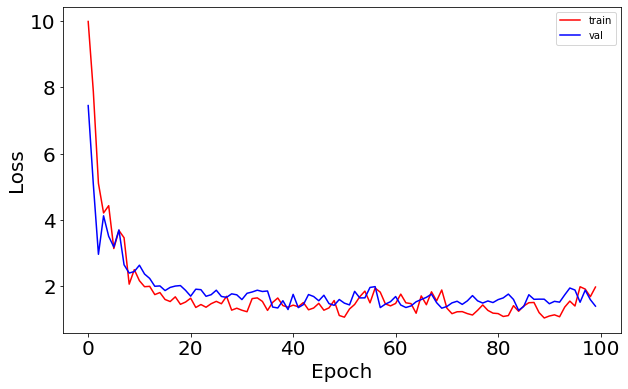

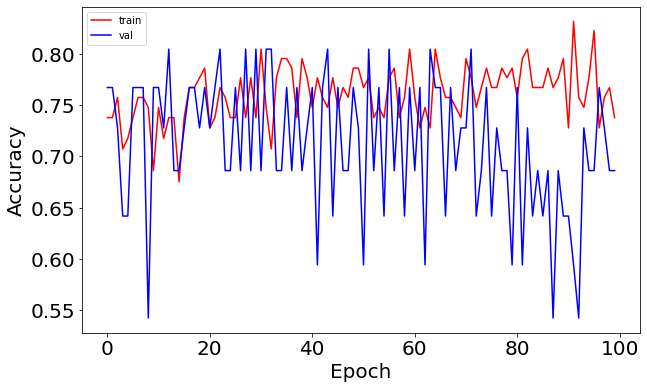

In [68]:
import matplotlib.pyplot as plt
import numpy as np

#feature scaling everything is crucial to deep learning and ANNs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_trainst = sc.fit_transform(X_train)



X_testst = sc.transform(X_test)

lr_model_history = gs.best_estimator_[2].fit(X_train, y_train,
                    validation_data=(X_test, y_test))
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [69]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

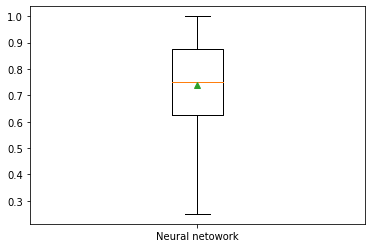

In [70]:
scores4=evaluate_model(gs.best_estimator_,X,y)
results = [scores4]
pyplot.boxplot(results, labels=["Neural netowork"], showmeans=True)
pyplot.show()

### Adding the second hidden layer

### Adding the output layer

## Part 3 - Training the ANN

### Compiling the ANN

### Training the ANN on the Training set

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

### Predicting the Test set results

In [71]:
# y_pred = ann.predict(X_test)
# y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [72]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)